# <font color='red'>Backtest vectorizado para una estrategia 'X' definida.</font>

### Hackeado by J3viton (learning BackTesting 2021).

---

En este notebook vamos a automatizar el backtesting para estrategias. Previamente tenemos que definir **la estrategia** usando el template (import estrategia_XX as rg), donde definimos la clase estrategia que contiene los metodos de analisis, entreda y salida de mercado. Este módulo se programa y adapta para cada estrategia. Luego en el metodo 'analisis' se crea un fichero excel con las metricas y rendimientos para evaluar la estrategia.

Vamos a usar el módulo Pandas, para realizar un backtest vectorizado, es decir calcular el resultado del backtest sin iterar sobre las filas (barras) de la serie temporal.

Posteriormente graficamos y mostramos los parametros generales que nos permiten analizar la estrategia.

#### J3Viton  2021

link a la base:

https://github.com/Python-para-Trading/Webinars-Docs/blob/master/Webinar%202/Webinar%202%20-%20Backtest%20con%20Pandas%20v%202.ipynb.

---

# DEFINICION DEL SISTEMA

Como es usual, importamos los módulos que vamos a necesitar para las distintas tareas, y preparamos Matplotlib para una mejor visualización de los gráficos en el notebook.

Se importa un modulo llamado analisis, en realidad se trata de un archivo .py con algunas funciones de apoyo para el trabajo, debe estar guardado en la misma carpeta que este notebook.
Se importa el módulo 'estrategia_XX', donde se define la estrategia de entreda y salida

Es importante tener clara la lógica del sistema, pues debemos plasmarla de forma sencilla y correcta en el dataframe para realizar el backtest del mismo.


In [1]:
import analisis
import estrategia_XX as rg  #cambiar segun el módulo con la estrategia implementado
import pandas as pd
import datetime as dt
from time import time
import yfinance as yf
import numpy as np

{'username': 'vital_quant_bot', 'is_bot': True, 'id': 1473252352, 'supports_inline_queries': False, 'can_read_all_group_messages': False, 'first_name': 'vital_bot', 'can_join_groups': True}


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 18, 8
plt.style.use('ggplot')

from IPython.display import display, Markdown

***0.- RECOGIDA DE DATOS INICIALES***
Introducimos el instrumento y las fechas


In [3]:
instrumento_ = 'REE.MC'   # ticker del valor en yahooFinance

Fecha_Cominezo_Backtesting = dt.datetime(2008,1,2)
Fecha_Final_Backtesting    = dt.datetime(2021,11,18)




***1.- Rango fechas a analizar***

Definimos el rango global de datos historicos que vamos a evaluar.
Definimos la ventana que vamos a ir desplazando por todo el espectro para ir analilazando como se comporta la estrategia. La funion 'analisis' nos vale para tiempo real y para backtesting, para back le pasamos la ventana como si la fecha de fin de la ventana fuera la fecha de hoy.
Tener en cuenta que la 'ventana' tiene uqe tener una anchura que nos permita hacer los calculos en rolling (ejemplo EMA 200)

In [4]:
# Rango completo para backTesting
#start2 =dt.datetime(2008,1,2)
start2= Fecha_Cominezo_Backtesting 
#end2   =dt.datetime(2021,11,18)
end2= Fecha_Final_Backtesting 
start_G= start2.strftime("%Y-%m-%d")
end_G  =   end2.strftime("%Y-%m-%d")
TOTAL_len= (end2-start2).days
print('Tamaño timeseries global a analizar:  ', TOTAL_len, 'sesiones')

#ventana de analisis 200 sesiones
startWindow2 =dt.datetime(2008,1,5)
endWindow2   =startWindow2 + dt.timedelta(days=1000) #ventana grande para que se puedan hacer los calculos de EMA200
startWindow= startWindow2.strftime("%Y-%m-%d")
endWindow  =   endWindow2.strftime("%Y-%m-%d")
window_len= (endWindow2-startWindow2).days
print('Tamaño de la ventana a analizar paso a paso:  ', window_len, 'sesiones')

Tamaño timeseries global a analizar:   5069 sesiones
Tamaño de la ventana a analizar paso a paso:   1000 sesiones


In [5]:
 #dff = pd.DataFrame(columns=('Close','Volume', 'Senal', 'Dif_Close', 'Retornos','Capital'))

***2.- Descargamos los datos para el marco Global***

In [6]:
instrumento = instrumento_  # 'rovi.mc'  #Vamos título a título. Mejora: Conjunto de títulos

In [7]:
dff = yf.download(instrumento, start_G,end_G)

[*********************100%***********************]  1 of 1 completed


In [8]:
dff.dropna(inplace=True)  
dff.head()

Open    High      Low    Close  Adj Close   Volume
Date                                                            
2008-01-02  10.810  10.900  10.4750  10.5500   5.140057  2381252
2008-01-03  10.495  10.730  10.2000  10.6050   5.166852  6712612
2008-01-04  10.500  10.600  10.2075  10.2500   4.993894  4837656
2008-01-07  10.195  10.375  10.1250  10.1525   4.946392  4937084
2008-01-08  10.140  10.650  10.1400  10.4475   5.090117  5271768

***3.- Creamos la clase strategy que tiene toda la lógica***

In [9]:
regreMedia= rg.StrategyClass()    #Creamos la clase

***4.- Recorremos el dataframe con valores buscando las señales de la estrategia***

In [10]:
dff.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15',
               '2021-11-16', '2021-11-17'],
              dtype='datetime64[ns]', name='Date', length=3548, freq=None)

## Proceso de backTesting ##

En este 'for' vamos recorriendo la muestra del historico de datos (TOTAL), desplazando una sesión hacia el futuro 
en cada iteracion. Vamos pasando la movilola del pasado sesión a sesión por el análisis descrito en Strategy class.

Ouput:
El sistema registra los siguientes parámetros:

.-
.-
.-


In [11]:
startWindow

'2008-01-05'

In [12]:
tiempo_inicial = time()   # Tomamos tiempos para ver cuanto tarda en hacer la estrategia

In [13]:
dfe = pd.DataFrame({'A' : []})   #df empty

***En este 'for' desplazamos la ventana sesión a sesión a lo largo de todo el rango de fechas. Dejamos que las funciones de la clase estrategia hagan el trabajo de comprar//vender y anotar***


In [14]:
#Para pruebas
#TOTAL_len =1000

for i in range(TOTAL_len):
    endWindow3   =endWindow2 + dt.timedelta(days=i) 
    endWindow    =endWindow3.strftime("%Y-%m-%d")
    print ('end date:', endWindow)
    
    if(endWindow in dff.index):
        df_aux= dff.loc[startWindow:endWindow]       #voy pasando los datos desplazando la ventana
        
        recogo = regreMedia.analisis(instrumento, startWindow, endWindow, df_aux) #Llamada a la clase estrategia. LA CLAVE DE TODO!!!
        
        print ('................................................Analizando, muestra', i, 'de', TOTAL_len, 'fecha', endWindow)
        
        """
        Tratamiento de los returns, mejor en las funciones de analisis que hacer aquí.
        if(recogo['senal'] == 1 ):
            dff.loc[[endWindow],['Senal']]= 1
        elif(recogo['senal'] == 0 ):
            dff.loc[[endWindow],['Senal']]= 0
        elif(recogo['senal'] == -1 ):
            dff.loc[[endWindow],['Senal']]= -1            
        elif(recogo['senal'] == 503 ):
            dff.loc[[endWindow],['Senal']]= 0          
        """
            
    else:
        print('..............Día sin sesión, next please')

        

end date: 2010-10-01
fichero no existe
 datos desde archivo
Coefficients: 
 [-0.00216237]
Independent term: 
 9.652745107982444
Coefficients: 
 [-0.00771764]
Independent term: 
 9.558280604988783
Coefficients: 
 [-0.00123712]
Independent term: 
 8.925214464997273
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 0 de 5069 fecha 2010-10-01
end date: 2010-10-02
..............Día sin sesión, next please
end date: 2010-10-03
..............Día sin sesión, next please
end date: 2010-10-04
 datos desde archivo
Coefficients: 
 [-0.00215818]
Independent term: 
 9.651771927480192
Coefficients: 
 [-0.00768828]
Indep

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00130132]
Independent term: 
 8.931444632235369
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 3 de 5069 fecha 2010-10-04
end date: 2010-10-05
 datos desde archivo
Coefficients: 
 [-0.00215168]
Independent term: 
 9.65025900511725
Coefficients: 
 [-0.00760636]
Independent term: 
 9.539370532605187
Coefficients: 
 [-0.00136405]
Independent term: 
 8.937493646169395
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 5 de 5069 fecha 2010-10-06
end date: 2010-10-07
 datos desde archivo
Coefficients: 
 [-0.00213656]
Independent term: 
 9.646733203309179
Coefficients: 
 [-0.00738445]
Independent term: 
 9.50963377888523
Coefficients: 
 [-0.00148449]
Independent term: 
 8.948980127518837
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00211903]
Independent term: 
 9.642634296809222
Coefficients: 
 [-0.00708759]
Independent term: 
 9.472214945536942
Coefficients: 
 [-0.001597]
Independent term: 
 8.95953990009066
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 10 de 5069 fecha 2010-10-11
end date: 2010-10-12
 datos desde archivo
Coefficients: 
 [-0.00211066]
Independent term: 
 9.640673404812627
Coefficients: 
 [-0.00693454]
Independent term: 
 9.452686586237666
Coefficients: 
 [-0.00165011]
Independent term: 
 8.964446832291127
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 12 de 5069 fecha 2010-10-13
end date: 2010-10-14
 datos desde archivo
Coefficients: 
 [-0.00208776]
Independent term: 
 9.63529581995385
Coefficients: 
 [-0.00659411]
Independent term: 
 9.414420000901863
Coefficients: 
 [-0.00174971]
Independent term: 
 8.973546694163163
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 17 de 5069 fecha 2010-10-18
end date: 2010-10-19
 datos desde archivo
Coefficients: 
 [-0.00205677]
Independent term: 
 9.627992116334484
Coefficients: 
 [-0.00616097]
Independent term: 
 9.36509108038091
Coefficients: 
 [-0.00188441]
Independent term: 
 8.985610066734685
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 20 de 5069 fecha 2010-10-21
end date: 2010-10-22
 datos desde archivo
Coefficients: 
 [-0.00202593]
Independent term: 
 9.620691941373343
Coefficients: 
 [-0.00570827]
Independent term: 
 9.313710666628028
Coefficients: 
 [-0.00200179]
Independent term: 
 8.995797713605366
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00213347]
Independent term: 
 9.006734922125348
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 27 de 5069 fecha 2010-10-28
end date: 2010-10-29
 datos desde archivo
Coefficients: 
 [-0.00197653]
Independent term: 
 9.608935454403827
Coefficients: 
 [-0.00503169]
Independent term: 
 9.238116074960622
Coefficients: 
 [-0.00216231]
Independent term: 
 9.00903722215356
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 31 de 5069 fecha 2010-11-01
end date: 2010-11-02
 datos desde archivo
Coefficients: 
 [-0.00195767]
Independent term: 
 9.604425534670737
Coefficients: 
 [-0.004805]
Independent term: 
 9.213390889594804
Coefficients: 
 [-0.00221576]
Independent term: 
 9.013202905361124
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00193862]
Independent term: 
 9.59985687227885
Coefficients: 
 [-0.00456313]
Independent term: 
 9.187050583896353
Coefficients: 
 [-0.00226355]
Independent term: 
 9.01679194639563
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 34 de 5069 fecha 2010-11-04
end date: 2010-11-05
 datos desde archivo
Coefficients: 
 [-0.00193031]
Independent term: 
 9.597860121185342
Coefficients: 
 [-0.00446804]
Independent term: 
 9.176344799924253
Coefficients: 
 [-0.00228549]
Independent term: 
 9.018379536978005
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.M

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00191425]
Independent term: 
 9.593991081387815
Coefficients: 
 [-0.00430552]
Independent term: 
 9.15828080248477
Coefficients: 
 [-0.00232627]
Independent term: 
 9.021235035019439
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 39 de 5069 fecha 2010-11-09
end date: 2010-11-10
 datos desde archivo
Coefficients: 
 [-0.00190589]
Independent term: 
 9.59197439735016
Coefficients: 
 [-0.00420499]
Independent term: 
 9.14704628908812
Coefficients: 
 [-0.00234497]
Independent term: 
 9.022486888293752
  instrumento  long_short_out        date     precio  beneficio  s

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0018684]
Independent term: 
 9.582893286013517
Coefficients: 
 [-0.00377594]
Independent term: 
 9.102712682965976
Coefficients: 
 [-0.00240575]
Independent term: 
 9.02605265633697
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 46 de 5069 fecha 2010-11-16
end date: 2010-11-17
 datos desde archivo
Coefficients: 
 [-0.00185899]
Independent term: 
 9.580608473583128
Coefficients: 
 [-0.0037403]
Independent term: 
 9.10127220822804
Coefficients: 
 [-0.00241903]
Independent term: 
 9.026801109589618
  instrumento  long_short_out        date     precio  beneficio  st

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 48 de 5069 fecha 2010-11-18
end date: 2010-11-19
 datos desde archivo
Coefficients: 
 [-0.00184023]
Independent term: 
 9.576040359659947
Coefficients: 
 [-0.00364549]
Independent term: 
 9.095319587792922
Coefficients: 
 [-0.00244374]
Independent term: 
 9.028187512213362
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 53 de 5069 fecha 2010-11-23
end date: 2010-11-24
 datos desde archivo
Coefficients: 
 [-0.00182204]
Independent term: 
 9.571595165231756
Coefficients: 
 [-0.00357886]
Independent term: 
 9.087746819239944
Coefficients: 
 [-0.00247782]
Independent term: 
 9.030030640352312
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0025001]
Independent term: 
 9.031137529059528
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 56 de 5069 fecha 2010-11-26
end date: 2010-11-27
..............Día sin sesión, next please
end date: 2010-11-28
..............Día sin sesión, next please
end date: 2010-11-29
 datos desde archivo
Coefficients: 
 [-0.00181681]
Independent term: 
 9.570313579357869
Coefficients: 
 [-0.00362753]
Independent term: 
 9.084027227430202
Coefficients: 
 [-0.00251132]
Independent term: 
 9.031663794714957
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC        

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00181014]
Independent term: 
 9.56867206231898
Coefficients: 
 [-0.00359252]
Independent term: 
 9.07561863628786
Coefficients: 
 [-0.0025331]
Independent term: 
 9.032590994588547
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 61 de 5069 fecha 2010-12-01
end date: 2010-12-02
 datos desde archivo
Coefficients: 
 [-0.00180375]
Independent term: 
 9.567094510554039
Coefficients: 
 [-0.003519]
Independent term: 
 9.066827975671682
Coefficients: 
 [-0.00254291]
Independent term: 
 9.032931661066987
  instrumento  long_short_out        date     precio  beneficio  sto

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00179295]
Independent term: 
 9.564424810163848
Coefficients: 
 [-0.00344449]
Independent term: 
 9.057170132238474
Coefficients: 
 [-0.00256093]
Independent term: 
 9.033438518758246
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 66 de 5069 fecha 2010-12-06
end date: 2010-12-07
 datos desde archivo
Coefficients: 
 [-0.0017872]
Independent term: 
 9.563002292360494
Coefficients: 
 [-0.00335808]
Independent term: 
 9.046185623709835
Coefficients: 
 [-0.00256886]
Independent term: 
 9.033565355623436
  instrumento  long_short_out        date     precio  beneficio 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00177263]
Independent term: 
 9.559385542147975
Coefficients: 
 [-0.0031285]
Independent term: 
 9.019685421559348
Coefficients: 
 [-0.00258128]
Independent term: 
 9.03344005272825
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 69 de 5069 fecha 2010-12-09
end date: 2010-12-10
 datos desde archivo
Coefficients: 
 [-0.00176444]
Independent term: 
 9.557348894701683
Coefficients: 
 [-0.00297694]
Independent term: 
 9.00248094010709
Coefficients: 
 [-0.00258521]
Independent term: 
 9.033132001856401
  instrumento  long_short_out        date     precio  beneficio  s

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00174761]
Independent term: 
 9.553156495969242
Coefficients: 
 [-0.00260866]
Independent term: 
 8.96004307554729
Coefficients: 
 [-0.00258748]
Independent term: 
 9.031892477623407
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 74 de 5069 fecha 2010-12-14
end date: 2010-12-15
 datos desde archivo
Coefficients: 
 [-0.00173984]
Independent term: 
 9.551216717508963
Coefficients: 
 [-0.00243528]
Independent term: 
 8.939760799692639
Coefficients: 
 [-0.00258596]
Independent term: 
 9.030975744509668
  instrumento  long_short_out        date     precio  beneficio 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00172436]
Independent term: 
 9.54734251092611
Coefficients: 
 [-0.00205847]
Independent term: 
 8.895373864529738
Coefficients: 
 [-0.00257736]
Independent term: 
 9.028511620178879
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 77 de 5069 fecha 2010-12-17
end date: 2010-12-18
..............Día sin sesión, next please
end date: 2010-12-19
..............Día sin sesión, next please
end date: 2010-12-20
 datos desde archivo
Coefficients: 
 [-0.00171615]
Independent term: 
 9.54528546809505
Coefficients: 
 [-0.00186618]
Independent term: 
 8.873215846659532
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00169854]
Independent term: 
 9.540863263028198
Coefficients: 
 [-0.00146883]
Independent term: 
 8.82856138549634
Coefficients: 
 [-0.00255042]
Independent term: 
 9.023256284958695
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 82 de 5069 fecha 2010-12-22
end date: 2010-12-23
 datos desde archivo
Coefficients: 
 [-0.00168999]
Independent term: 
 9.538710032269837
Coefficients: 
 [-0.00125721]
Independent term: 
 8.804392353029394
Coefficients: 
 [-0.00253755]
Independent term: 
 9.021078534392236
  instrumento  long_short_out        date     precio  beneficio 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.0025228]
Independent term: 
 9.018671491470474
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 87 de 5069 fecha 2010-12-27
end date: 2010-12-28
 datos desde archivo
Coefficients: 
 [-0.00167806]
Independent term: 
 9.535703234447372
Coefficients: 
 [-0.00084548]
Independent term: 
 8.752869221416873
Coefficients: 
 [-0.00250611]
Independent term: 
 9.016026692763473
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00166641]
Independent term: 
 9.532757583125257
Coefficients: 
 [-0.00046387]
Independent term: 
 8.70539868966857
Coefficients: 
 [-0.00246748]
Independent term: 
 9.010102963986856
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 90 de 5069 fecha 2010-12-30
end date: 2010-12-31
..............Día sin sesión, next please
end date: 2011-01-01
..............Día sin sesión, next please
end date: 2011-01-02
..............Día sin sesión, next please
end date: 2011-01-03
 datos desde archivo
Coefficients: 
 [-0.00166245]
Independent term: 
 9.531753322667862
Coefficients: 
 [-0.00030025]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 97 de 5069 fecha 2011-01-06
end date: 2011-01-07
 datos desde archivo
Coefficients: 
 [-0.00164858]
Independent term: 
 9.528230536387042
Coefficients: 
 [0.00040032]
Independent term: 
 8.588974435080344
Coefficients: 
 [-0.00234485]
Independent term: 
 8.991920719213091
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [0.00073321]
Independent term: 
 8.539583017363478
Coefficients: 
 [-0.00228548]
Independent term: 
 8.983198481138688
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 102 de 5069 fecha 2011-01-11
end date: 2011-01-12
 datos desde archivo
Coefficients: 
 [-0.00164302]
Independent term: 
 9.526808644995132
Coefficients: 
 [0.00092898]
Independent term: 
 8.51365988033921
Coefficients: 
 [-0.0022535]
Independent term: 
 8.978526455260088
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00163211]
Independent term: 
 9.524014313179336
Coefficients: 
 [0.00139765]
Independent term: 
 8.455483767523694
Coefficients: 
 [-0.00218345]
Independent term: 
 8.968452497614248
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 105 de 5069 fecha 2011-01-14
end date: 2011-01-15
..............Día sin sesión, next please
end date: 2011-01-16
..............Día sin sesión, next please
end date: 2011-01-17
 datos desde archivo
Coefficients: 
 [-0.00162705]
Independent term: 
 9.52271602137941
Coefficients: 
 [0.00160915]
Independent term: 
 8.429158769934926
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00161342]
Independent term: 
 9.519209835545029
Coefficients: 
 [0.00216923]
Independent term: 
 8.362055240673804
Coefficients: 
 [-0.00206309]
Independent term: 
 8.951519182541908
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 110 de 5069 fecha 2011-01-19
end date: 2011-01-20
 datos desde archivo
Coefficients: 
 [-0.00160487]
Independent term: 
 9.517006577107056
Coefficients: 
 [0.00247432]
Independent term: 
 8.32704909096903
Coefficients: 
 [-0.00201794]
Independent term: 
 8.94530554978994
  instrumento  long_short_out        date     precio  beneficio  s

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 112 de 5069 fecha 2011-01-21
end date: 2011-01-22
..............Día sin sesión, next please
end date: 2011-01-23
..............Día sin sesión, next please
end date: 2011-01-24
 datos desde archivo
Coefficients: 
 [-0.0015851]
Independent term: 
 9.511904002415225
Coefficients: 
 [0.00310371]
Independent term: 
 8.25743716012186
Coefficients: 
 [-0.00191965]
Independent term: 
 8.93203076475044
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00181161]
Independent term: 
 8.917732193808929
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 117 de 5069 fecha 2011-01-26
end date: 2011-01-27
 datos desde archivo
Coefficients: 
 [-0.0015568]
Independent term: 
 9.504572230212903
Coefficients: 
 [0.0040069]
Independent term: 
 8.15778847174858
Coefficients: 
 [-0.00175371]
Independent term: 
 8.9101705647337
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 119 de 5069 fecha 2011-01-28
end date: 2011-01-29
..............Día sin sesión, next please
end date: 2011-01-30
..............Día sin sesión, next please
end date: 2011-01-31
 datos desde archivo
Coefficients: 
 [-0.00153557]
Independent term: 
 9.499058576077864
Coefficients: 
 [0.00455296]
Independent term: 
 8.101618324037807
Coefficients: 
 [-0.00163135]
Independent term: 
 8.894420046888921
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 124 de 5069 fecha 2011-02-02
end date: 2011-02-03
 datos desde archivo
Coefficients: 
 [-0.00149767]
Independent term: 
 9.489178531834245
Coefficients: 
 [0.00531403]
Independent term: 
 8.031797992649363
Coefficients: 
 [-0.00143298]
Independent term: 
 8.869526977188002
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 129 de 5069 fecha 2011-02-07
end date: 2011-02-08
 datos desde archivo
Coefficients: 
 [-0.00145861]
Independent term: 
 9.478957030417497
Coefficients: 
 [0.00590526]
Independent term: 
 7.986176161196694
Coefficients: 
 [-0.00122244]
Independent term: 
 8.843930479971723
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00141977]
Independent term: 
 9.468755752123375
Coefficients: 
 [0.00648957]
Independent term: 
 7.9416569524736556
Coefficients: 
 [-0.00099965]
Independent term: 
 8.817630734496975
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 133 de 5069 fecha 2011-02-11
end date: 2011-02-12
..............Día sin sesión, next please
end date: 2011-02-13
..............Día sin sesión, next please
end date: 2011-02-14
 datos desde archivo
Coefficients: 
 [-0.00140789]
Independent term: 
 9.465625506754959
Coefficients: 
 [0.00661681]
Independent term: 
 7.934752655100468
Coeff

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00138399]
Independent term: 
 9.45932172354022
Coefficients: 
 [0.00691361]
Independent term: 
 7.915514782791706
Coefficients: 
 [-0.0007707]
Independent term: 
 8.7913177269577
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 138 de 5069 fecha 2011-02-16
end date: 2011-02-17
 datos desde archivo
Coefficients: 
 [-0.00137162]
Independent term: 
 9.456052157922654
Coefficients: 
 [0.00709773]
Independent term: 
 7.901650784905278
Coefficients: 
 [-0.00069241]
Independent term: 
 8.782465319574094
  instrumento  long_short_out        date     precio  beneficio  sto

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0013517]
Independent term: 
 9.450775080870402
Coefficients: 
 [0.00740321]
Independent term: 
 7.877305815682483
Coefficients: 
 [-0.00053335]
Independent term: 
 8.764635794654465
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 143 de 5069 fecha 2011-02-21
end date: 2011-02-22
 datos desde archivo
Coefficients: 
 [-0.00134291]
Independent term: 
 9.448442949101455
Coefficients: 
 [0.0074709]
Independent term: 
 7.875227080459026
Coefficients: 
 [-0.00045371]
Independent term: 
 8.755785956702272
  instrumento  long_short_out        date     precio  beneficio  s

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00132464]
Independent term: 
 9.443587681470293
Coefficients: 
 [0.00760845]
Independent term: 
 7.871534354010625
Coefficients: 
 [-0.00029499]
Independent term: 
 8.738319273529417
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 146 de 5069 fecha 2011-02-24
end date: 2011-02-25
 datos desde archivo
Coefficients: 
 [-0.00131291]
Independent term: 
 9.440463013352241
Coefficients: 
 [0.00768293]
Independent term: 
 7.871717556768389
Coefficients: 
 [-0.00021561]
Independent term: 
 8.72969637087508
  instrumento  long_short_out        date     precio  beneficio  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 150 de 5069 fecha 2011-02-28
end date: 2011-03-01
 datos desde archivo
Coefficients: 
 [-0.00128731]
Independent term: 
 9.433630386180313
Coefficients: 
 [0.00780696]
Independent term: 
 7.877688642046344
Coefficients: 
 [-5.72989193e-05]
Independent term: 
 8.7127864873446
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 157 de 5069 fecha 2011-03-07
end date: 2011-03-08
 datos desde archivo
Coefficients: 
 [-0.00122876]
Independent term: 
 9.417937726493268
Coefficients: 
 [0.00792162]
Independent term: 
 7.912511778304825
Coefficients: 
 [0.00032778]
Independent term: 
 8.673295950571264
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [0.00806478]
Independent term: 
 7.916766800097565
Coefficients: 
 [0.00048049]
Independent term: 
 8.658277929475375
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 160 de 5069 fecha 2011-03-10
end date: 2011-03-11
 datos desde archivo
Coefficients: 
 [-0.00119122]
Independent term: 
 9.407828775547934
Coefficients: 
 [0.00812184]
Independent term: 
 7.918507841024825
Coefficients: 
 [0.00055652]
Independent term: 
 8.650917033072883
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 164 de 5069 fecha 2011-03-14
end date: 2011-03-15
 datos desde archivo
Coefficients: 
 [-0.00117056]
Independent term: 
 9.402248141612775
Coefficients: 
 [0.00816477]
Independent term: 
 7.9297552337931165
Coefficients: 
 [0.00070722]
Independent term: 
 8.636556459571041
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [0.00085403]
Independent term: 
 8.622866844888588
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 167 de 5069 fecha 2011-03-17
end date: 2011-03-18
 datos desde archivo
Coefficients: 
 [-0.00114383]
Independent term: 
 9.395004402273095
Coefficients: 
 [0.00810081]
Independent term: 
 7.9589007550566935
Coefficients: 
 [0.00092613]
Independent term: 
 8.616260217129067
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 171 de 5069 fecha 2011-03-21
end date: 2011-03-22
 datos desde archivo
Coefficients: 
 [-0.00112184]
Independent term: 
 9.389026922660198
Coefficients: 
 [0.00821918]
Independent term: 
 7.961535633926961
Coefficients: 
 [0.00106966]
Independent term: 
 8.603312530182553
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 174 de 5069 fecha 2011-03-24
end date: 2011-03-25
 datos desde archivo
Coefficients: 
 [-0.00108052]
Independent term: 
 9.377759687856686
Coefficients: 
 [0.0086829]
Independent term: 
 7.93692050919604
Coefficients: 
 [0.00128981]
Independent term: 
 8.583904945608774
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 180 de 5069 fecha 2011-03-30
end date: 2011-03-31
 datos desde archivo
Coefficients: 
 [-0.00102484]
Independent term: 
 9.362511168528972
Coefficients: 
 [0.00935018]
Independent term: 
 7.8987259069129605
Coefficients: 
 [0.00159633]
Independent term: 
 8.55757165282401
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00099752]
Independent term: 
 9.355004644058832
Coefficients: 
 [0.00957389]
Independent term: 
 7.893804453237732
Coefficients: 
 [0.00175341]
Independent term: 
 8.544420045211616
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 185 de 5069 fecha 2011-04-04
end date: 2011-04-05
 datos desde archivo
Coefficients: 
 [-0.00098447]
Independent term: 
 9.351409735721614
Coefficients: 
 [0.00957207]
Independent term: 
 7.905759864707492
Coefficients: 
 [0.00183121]
Independent term: 
 8.538065217544908
  instrumento  long_short_out        date     precio  beneficio  s

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 187 de 5069 fecha 2011-04-06
end date: 2011-04-07
 datos desde archivo
Coefficients: 
 [-0.00095495]
Independent term: 
 9.343268060636502
Coefficients: 
 [0.00956465]
Independent term: 
 7.9339990443614
Coefficients: 
 [0.0019845]
Independent term: 
 8.525948766022582
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      9

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 192 de 5069 fecha 2011-04-11
end date: 2011-04-12
 datos desde archivo
Coefficients: 
 [-0.00091605]
Independent term: 
 9.332507373296485
Coefficients: 
 [0.00934693]
Independent term: 
 7.997355199144848
Coefficients: 
 [0.00220445]
Independent term: 
 8.509689552433477
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 195 de 5069 fecha 2011-04-14
end date: 2011-04-15
 datos desde archivo
Coefficients: 
 [-0.00087514]
Independent term: 
 9.321146641206742
Coefficients: 
 [0.00927619]
Independent term: 
 8.04321303289328
Coefficients: 
 [0.00241364]
Independent term: 
 8.49552716646575
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [0.00254919]
Independent term: 
 8.486936958660165
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 200 de 5069 fecha 2011-04-19
end date: 2011-04-20
 datos desde archivo
Coefficients: 
 [-0.00083495]
Independent term: 
 9.309945447063722
Coefficients: 
 [0.00927603]
Independent term: 
 8.078710410488185
Coefficients: 
 [0.00261613]
Independent term: 
 8.48287500295696
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 202 de 5069 fecha 2011-04-21
end date: 2011-04-22
..............Día sin sesión, next please
end date: 2011-04-23
..............Día sin sesión, next please
end date: 2011-04-24
..............Día sin sesión, next please
end date: 2011-04-25
..............Día sin sesión, next please
end date: 2011-04-26
 datos desde archivo
Coefficients: 
 [-0.00080311]
Independent term: 
 9.30104640852295
Coefficients: 
 [0.00938391]
Independent term: 
 8.093888948355147
Coefficients: 
 [0.00274952]
Independent term: 
 8.475105505553003
  instrumento  long_short_out        d

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 209 de 5069 fecha 2011-04-28
end date: 2011-04-29
 datos desde archivo
Coefficients: 
 [-0.00074973]
Independent term: 
 9.28608322478928
Coefficients: 
 [0.00964906]
Independent term: 
 8.109555923262638
Coefficients: 
 [0.0029509]
Independent term: 
 8.46413322449233
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      9

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00066448]
Independent term: 
 9.262071906331421
Coefficients: 
 [0.01011071]
Independent term: 
 8.128684271627396
Coefficients: 
 [0.00329158]
Independent term: 
 8.447439315817812
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 217 de 5069 fecha 2011-05-06
end date: 2011-05-07
..............Día sin sesión, next please
end date: 2011-05-08
..............Día sin sesión, next please
end date: 2011-05-09
 datos desde archivo
Coefficients: 
 [-0.00064947]
Independent term: 
 9.257829109978196
Coefficients: 
 [0.01020372]
Independent term: 
 8.130005172046264
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 221 de 5069 fecha 2011-05-10
end date: 2011-05-11
 datos desde archivo
Coefficients: 
 [-0.00061891]
Independent term: 
 9.249176362627026
Coefficients: 
 [0.01039179]
Independent term: 
 8.133067308397436
Coefficients: 
 [0.00349858]
Independent term: 
 8.438107390905332
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 224 de 5069 fecha 2011-05-13
end date: 2011-05-14
..............Día sin sesión, next please
end date: 2011-05-15
..............Día sin sesión, next please
end date: 2011-05-16
 datos desde archivo
Coefficients: 
 [-0.0005746]
Independent term: 
 9.236593049699806
Coefficients: 
 [0.01068383]
Independent term: 
 8.134608552277978
Coefficients: 
 [0.00370807]
Independent term: 
 8.4291304299008
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [0.00384867]
Independent term: 
 8.423329432913041
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 229 de 5069 fecha 2011-05-18
end date: 2011-05-19
 datos desde archivo
Coefficients: 
 [-0.00053227]
Independent term: 
 9.22452683735804
Coefficients: 
 [0.01092773]
Independent term: 
 8.140315828750383
Coefficients: 
 [0.00391911]
Independent term: 
 8.42051337715023
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 231 de 5069 fecha 2011-05-20
end date: 2011-05-21
..............Día sin sesión, next please
end date: 2011-05-22
..............Día sin sesión, next please
end date: 2011-05-23
 datos desde archivo
Coefficients: 
 [-0.00050543]
Independent term: 
 9.216855629212407
Coefficients: 
 [0.01105967]
Independent term: 
 8.146556132017675
Coefficients: 
 [0.00406]
Independent term: 
 8.415042299937395
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi


Independent term: 
 8.410017157576386
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 236 de 5069 fecha 2011-05-25
end date: 2011-05-26
 datos desde archivo
Coefficients: 
 [-0.00046814]
Independent term: 
 9.206166177869104
Coefficients: 
 [0.01108827]
Independent term: 
 8.174773856348066
Coefficients: 
 [0.00426741]
Independent term: 
 8.407676428210934
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00044395]
Independent term: 
 9.19921139459157
Coefficients: 
 [0.01111042]
Independent term: 
 8.192343988987936
Coefficients: 
 [0.00440273]
Independent term: 
 8.40333544468057
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 241 de 5069 fecha 2011-05-30
end date: 2011-05-31
 datos desde archivo
Coefficients: 
 [-0.00043054]
Independent term: 
 9.195351119210516
Coefficients: 
 [0.01115093]
Independent term: 
 8.198857233417568
Coefficients: 
 [0.00446988]
Independent term: 
 8.401300835613277
  instrumento  long_short_out        date     precio  beneficio  sto

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 243 de 5069 fecha 2011-06-01
end date: 2011-06-02
 datos desde archivo
Coefficients: 
 [-0.00040489]
Independent term: 
 9.18794944372283
Coefficients: 
 [0.01115581]
Independent term: 
 8.220559658363683
Coefficients: 
 [0.00460243]
Independent term: 
 8.397594789767462
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 248 de 5069 fecha 2011-06-06
end date: 2011-06-07
 datos desde archivo
Coefficients: 
 [-0.00036915]
Independent term: 
 9.177608951606514
Coefficients: 
 [0.01108127]
Independent term: 
 8.26049493191847
Coefficients: 
 [0.00479487]
Independent term: 
 8.393116037056888
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi


Independent term: 
 8.389261492878406
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 255 de 5069 fecha 2011-06-13
end date: 2011-06-14
 datos desde archivo
Coefficients: 
 [-0.00031005]
Independent term: 
 9.160432103058039
Coefficients: 
 [0.01096914]
Independent term: 
 8.324670483034048
Coefficients: 
 [0.00509749]
Independent term: 
 8.388618796263039
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 257 de 5069 fecha 2011-06-15
end date: 2011-06-16
 datos desde archivo
Coefficients: 
 [-0.00028943]
Independent term: 
 9.154412935904622
Coefficients: 
 [0.01090216]
Independent term: 
 8.349397908822814
Coefficients: 
 [0.00521297]
Independent term: 
 8.387704789044275
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC             1.0  2011-08-10   4.776000        NaN       NaN
1        MSFT             0.0  2014-10-10  44.029999   2.526569      99.0
2      san.mc             1.0  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc             0.0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC             1.0  2011-06-16  10.100000   0.429829      99.0
................................................Analizando, muestra 258 de 5069 fecha 2011-06-16
end date: 2011-06-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 259 de 5069 fecha 2011-06-17
end date: 2011-06-18
..............Día sin sesión, next please
end date: 2011-06-19
..............Día sin sesión, next please
end date: 2011-06-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 262 de 5069 fecha 2011-06-20
end date: 2011-06-2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 264 de 5069 fecha 2011-06-22
end date: 2011-06-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 265 de 5069 fecha 2011-06-23
end date: 2011-06-24
 datos desde archivo
Coefficients: 
 [-0.00023986]
Independent term: 
 9.139886180330013
Coefficients: 
 [0.01056754]
Independent term: 
 8.425410812719544
Coefficients: 
 [0.00553413]
Independent term: 
 8.388047188535039
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2011-06-24   9.761250   0.777670      99.0
................................................Analizando, muestra 266 de 5069 fecha 2011-06-24
end date: 2011-06-25
..............Día sin sesión, next please
end date: 2011-06-26
..............Día sin sesión, next please
end date: 2011-06-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 269 de 5069 fecha 2011-06-27
end date: 2011-06-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 270 de 5069 fecha 2011-06-28
end date: 2011-06-2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 272 de 5069 fecha 2011-06-30
end date: 2011-07-01
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 273 de 5069 fecha 2011-07-01
end date: 2011-07-02
..............Día sin sesión, next please
end date: 2011-07-03
..............Día sin sesión, next please
end date: 2011-07-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 276 de 5069 fecha 2011-07-04
end date: 2011-07-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 277 de 5069 fecha 2011-07-05
end date: 2011-07-06
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 278 de 5069 fecha 2011-07-06
end date: 2011-07-07
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 279 de 5069 fecha 201

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [0.00924364]
Independent term: 
 8.647557478378069
Coefficients: 
 [0.00616538]
Independent term: 
 8.40757853495714
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2011-07-15   9.331250   1.165036      99.0
................................................Analizando, muestra 287 de 5069 fecha 2011-07-15
end date: 2011-07-16
..............Día sin sesión, next please
end date: 2011-07-17
..............Día sin sesión, next please
end date: 2011-07-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 290 de 5069 fecha 2011-07-18
end date: 2011-07-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 291 de 5069 fecha 2011-07-19
end date: 2011-07-2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 293 de 5069 fecha 2011-07-21
end date: 2011-07-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 294 de 5069 fecha 2011-07-22
end date: 2011-07-23
..............Día sin sesión, next please
end date: 2011-07-24
..............Día sin sesión, next please
end date: 2011-07-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 297 de 5069 fecha 2011-07-25
end date: 2011-07-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 298 de 5069 fecha 2011-07-26
end date: 2011-07-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 299 de 5069 fecha 2011-07-27
end date: 2011-07-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 300 de 5069 fecha 201

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 311 de 5069 fecha 2011-08-08
end date: 2011-08-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 312 de 5069 fecha 2011-08-09
end date: 2011-08-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 313 de 5069 fecha 2011-08-10
end date: 2011-08-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 314 de 5069 fecha

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 315 de 5069 fecha 2011-08-12
end date: 2011-08-13
..............Día sin sesión, next please
end date: 2011-08-14
..............Día sin sesión, next please
end date: 2011-08-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 318 de 5069 fecha 2011-08-15
end date: 2011-08-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 319 de 5069 fecha 2011-08-16
end date: 2011-08-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 320 de 5069 fecha 2011-08-17
end date: 2011-08-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 321 de 5069 fecha 2011-08-18
end date: 2011-08-19
 datos desde archivo
Coefficients: 
 [-0.00012945]
Independent term: 
 9.107334234856493
Coefficients: 
 [0.00488192]
Independen

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 325 de 5069 fecha 2011-08-22
end date: 2011-08-23
 datos desde archivo
Coefficients: 
 [-0.00014153]
Independent term: 
 9.111053504885987
Coefficients: 
 [0.00425401]
Independent term: 
 9.146882331335723
Coefficients: 
 [0.00640473]
Independent term: 
 8.519081173635891
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00015275]
Independent term: 
 9.11451447395664
Coefficients: 
 [0.00366167]
Independent term: 
 9.197701165498193
Coefficients: 
 [0.00635332]
Independent term: 
 8.532272774563326
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 328 de 5069 fecha 2011-08-25
end date: 2011-08-26
 datos desde archivo
Coefficients: 
 [-0.00015924]
Independent term: 
 9.116521460751931
Coefficients: 
 [0.00337993]
Independent term: 
 9.219909737715081
Coefficients: 
 [0.00632374]
Independent term: 
 8.539114933

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 329 de 5069 fecha 2011-08-26
end date: 2011-08-27
..............Día sin sesión, next please
end date: 2011-08-28
..............Día sin sesión, next please
end date: 2011-08-29
 datos desde archivo
Coefficients: 
 [-0.0001636]
Independent term: 
 9.117868895909767
Coefficients: 
 [0.00311418]
Independent term: 
 9.243064579323157
Coefficients: 
 [0.0062918]
Independent term: 
 8.546119407489439
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 333 de 5069 fecha 2011-08-30
end date: 2011-08-31
 datos desde archivo
Coefficients: 
 [-0.0001708]
Independent term: 
 9.12009976665389
Coefficients: 
 [0.00264292]
Independent term: 
 9.283536029644866
Coefficients: 
 [0.00622164]
Independent term: 
 8.56054003930593
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      9

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00017638]
Independent term: 
 9.121832970175381
Coefficients: 
 [0.00216759]
Independent term: 
 9.326868492809695
Coefficients: 
 [0.00614399]
Independent term: 
 8.575476295856431
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 336 de 5069 fecha 2011-09-02
end date: 2011-09-03
..............Día sin sesión, next please
end date: 2011-09-04
..............Día sin sesión, next please
end date: 2011-09-05
 datos desde archivo
Coefficients: 
 [-0.00018096]
Independent term: 
 9.123255329976827


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00018674]
Independent term: 
 9.125055766412078
Coefficients: 
 [0.00151924]
Independent term: 
 9.386179493576732
Coefficients: 
 [0.00605587]
Independent term: 
 8.591210280059046
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 340 de 5069 fecha 2011-09-06
end date: 2011-09-07
 datos desde archivo
Coefficients: 
 [-0.00019132]
Independent term: 
 9.126481858600759
Coefficients: 
 [0.00115672]
Independent term: 
 9.421762154707267
Coefficients: 
 [0.00600712]
Independent term: 
 8.599474477816742
  instrumento

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00019463]
Independent term: 
 9.127517387197942
Coefficients: 
 [0.00082895]
Independent term: 
 9.45453211713193
Coefficients: 
 [0.0059556]
Independent term: 
 8.607982514028834
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 342 de 5069 fecha 2011-09-08
end date: 2011-09-09
 datos desde archivo
Coefficients: 
 [-0.0002005]
Independent term: 
 9.129348478984333
Coefficients: 
 [0.00043404]
Independent term: 
 9.492450395555638
Coefficients: 
 [0.00590066]
Independent term: 
 8.61678318946

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00020801]
Independent term: 
 9.131696993780618
Coefficients: 
 [1.2030398e-05]
Independent term: 
 9.531503003817885
Coefficients: 
 [0.00584207]
Independent term: 
 8.625884879161948
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 346 de 5069 fecha 2011-09-12
end date: 2011-09-13
 datos desde archivo
Coefficients: 
 [-0.00021474]
Independent term: 
 9.133804860047885
Coefficients: 
 [-0.00035951]
Independent term: 
 9.56495897250389
Coefficients: 
 [0.00578036]
Independent term: 
 8.63522

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00022063]
Independent term: 
 9.135649782678463
Coefficients: 
 [-0.00068646]
Independent term: 
 9.59371532084337
Coefficients: 
 [0.00571601]
Independent term: 
 8.644766078308157
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 348 de 5069 fecha 2011-09-14
end date: 2011-09-15
 datos desde archivo
Coefficients: 
 [-0.00022402]
Independent term: 
 9.136712810811801
Coefficients: 
 [-0.00096289]
Independent term: 
 9.619438454215206
Coefficients: 
 [0.00564955]
Independent term: 
 8.654464310904247
  instrument

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00022655]
Independent term: 
 9.137508396798319
Coefficients: 
 [-0.00123651]
Independent term: 
 9.646039390279286
Coefficients: 
 [0.00558104]
Independent term: 
 8.664330729604497
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 350 de 5069 fecha 2011-09-16
end date: 2011-09-17
..............Día sin sesión, next please
end date: 2011-09-18
..............Día sin sesión, next please
end date: 2011-09-19
 datos desde archivo
Coefficients: 
 [-0.00023015]
Independent term: 
 9.138639491219163
Coefficients: 
 [-0.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00023313]
Independent term: 
 9.139577096171317
Coefficients: 
 [-0.00178041]
Independent term: 
 9.696500585755306
Coefficients: 
 [0.00543783]
Independent term: 
 8.684532155904089
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 354 de 5069 fecha 2011-09-20
end date: 2011-09-21
 datos desde archivo
Coefficients: 
 [-0.00023703]
Independent term: 
 9.140806635038663
Coefficients: 
 [-0.00203735]
Independent term: 
 9.718804313745071
Coefficients: 
 [0.00536345]
Independent term: 
 8.694823

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00024319]
Independent term: 
 9.142746863512924
Coefficients: 
 [-0.00234237]
Independent term: 
 9.744122224067574
Coefficients: 
 [0.00528677]
Independent term: 
 8.70526420526481
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 356 de 5069 fecha 2011-09-22
end date: 2011-09-23
 datos desde archivo
Coefficients: 
 [-0.00024918]
Independent term: 
 9.144636988078924
Coefficients: 
 [-0.00263724]
Independent term: 
 9.768330255266445
Coefficients: 
 [0.00520793]
Independent term: 
 8.7158419

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00025459]
Independent term: 
 9.146348770929494
Coefficients: 
 [-0.00292202]
Independent term: 
 9.792047056653606
Coefficients: 
 [0.00512703]
Independent term: 
 8.726550485162806
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 360 de 5069 fecha 2011-09-26
end date: 2011-09-27
 datos desde archivo
Coefficients: 
 [-0.00025811]
Independent term: 
 9.147461418420036
Coefficients: 
 [-0.00316984]
Independent term: 
 9.813705453374492
Coefficients: 
 [0.00504448]
Independent term: 
 8.737367

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00026546]
Independent term: 
 9.149792416572247
Coefficients: 
 [-0.00382987]
Independent term: 
 9.872396869232405
Coefficients: 
 [0.0047886]
Independent term: 
 8.770344123264955
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 364 de 5069 fecha 2011-09-30
end date: 2011-10-01
..............Día sin sesión, next please
end date: 2011-10-02
..............Día sin sesión, next please
end date: 2011-10-03
 datos desde archivo
Coefficients: 
 [-0.00026815]
Independent term: 
 9.150646357630432
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00027264]
Independent term: 
 9.152074006007165
Coefficients: 
 [-0.00429065]
Independent term: 
 9.910819632117427
Coefficients: 
 [0.00461129]
Independent term: 
 8.79272422487657
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 368 de 5069 fecha 2011-10-04
end date: 2011-10-05
 datos desde archivo
Coefficients: 
 [-0.00027647]
Independent term: 
 9.153293122776166
Coefficients: 
 [-0.00452806]
Independent term: 
 9.93059837191852
Coefficients: 
 [0.00452036]
Independent term: 
 8.80404635

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0002784]
Independent term: 
 9.15390958333029
Coefficients: 
 [-0.00475665]
Independent term: 
 9.952092597164325
Coefficients: 
 [0.00442805]
Independent term: 
 8.815469701379193
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 370 de 5069 fecha 2011-10-06
end date: 2011-10-07
 datos desde archivo
Coefficients: 
 [-0.0002798]
Independent term: 
 9.154355938106432
Coefficients: 
 [-0.00497593]
Independent term: 
 9.97316144010914
Coefficients: 
 [0.00433448]
Independent term: 
 8.8269890221

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00028137]
Independent term: 
 9.15485650251981
Coefficients: 
 [-0.00519495]
Independent term: 
 9.99392877948818
Coefficients: 
 [0.00423965]
Independent term: 
 8.838600363031487
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 374 de 5069 fecha 2011-10-10
end date: 2011-10-11
 datos desde archivo
Coefficients: 
 [-0.00028357]
Independent term: 
 9.155558758084481
Coefficients: 
 [-0.00543594]
Independent term: 
 10.016638287999736
Coefficients: 
 [0.00414338]
Independent term: 
 8.8503221

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00028542]
Independent term: 
 9.15615056689084
Coefficients: 
 [-0.0056917]
Independent term: 
 10.041830075249742
Coefficients: 
 [0.00404552]
Independent term: 
 8.862177933845308
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 376 de 5069 fecha 2011-10-12
end date: 2011-10-13
 datos desde archivo
Coefficients: 
 [-0.00028618]
Independent term: 
 9.156394516628186
Coefficients: 
 [-0.00591672]
Independent term: 
 10.06460153045939
Coefficients: 
 [0.00394639]
Independent term: 
 8.8741423

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00028643]
Independent term: 
 9.156473738428595
Coefficients: 
 [-0.00614066]
Independent term: 
 10.088008617287251
Coefficients: 
 [0.00384602]
Independent term: 
 8.886220619080724
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 378 de 5069 fecha 2011-10-14
end date: 2011-10-15
..............Día sin sesión, next please
end date: 2011-10-16
..............Día sin sesión, next please
end date: 2011-10-17
 datos desde archivo
Coefficients: 
 [-0.00028747]
Independent term: 
 9.156807638352545
Coefficients: 
 [-0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 de 5069 fecha 2011-10-17
end date: 2011-10-18
 datos desde archivo
Coefficients: 
 [-0.00028824]
Independent term: 
 9.15705666117989
Coefficients: 
 [-0.00663931]
Independent term: 
 10.139467380722957
Coefficients: 
 [0.00364099]
Independent term: 
 8.910763902165005
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 382 de 5069 fecha 2011-10-18
end date: 2011-10-19
 datos desde archivo
Coefficients: 
 [-0.000289]
Independent term: 
 9.157301226633944
Coefficients: 
 [-0.00691659]
Independent term: 
 10.16910078070057
Coefficients

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 383 de 5069 fecha 2011-10-19
end date: 2011-10-20
 datos desde archivo
Coefficients: 
 [-0.00029076]
Independent term: 
 9.157868342222322
Coefficients: 
 [-0.00721479]
Independent term: 
 10.199921668892475
Coefficients: 
 [0.00342896]
Independent term: 
 8.935987522864531
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00029072]
Independent term: 
 9.157853213913539
Coefficients: 
 [-0.00761925]
Independent term: 
 10.241583968347578
Coefficients: 
 [0.00321205]
Independent term: 
 8.961655460577813
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 388 de 5069 fecha 2011-10-24
end date: 2011-10-25
 datos desde archivo
Coefficients: 
 [-0.0002921]
Independent term: 
 9.158299020237889
Coefficients: 
 [-0.00785291]
Independent term: 
 10.264377443185493
Coefficients: 
 [0.00310196]
Independent term: 
 8.97461

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00808847]
Independent term: 
 10.287102437232857
Coefficients: 
 [0.00299061]
Independent term: 
 8.98767741631389
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 390 de 5069 fecha 2011-10-26
end date: 2011-10-27
 datos desde archivo
Coefficients: 
 [-0.00029295]
Independent term: 
 9.158574709108596
Coefficients: 
 [-0.00825067]
Independent term: 
 10.303697589689225
Coefficients: 
 [0.00287875]
Independent term: 
 9.000772144407177
  instrumento  long_short_out        date     precio  beneficio  stoploss
0   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00029196]
Independent term: 
 9.158254414234394
Coefficients: 
 [-0.00839102]
Independent term: 
 10.31781270482647
Coefficients: 
 [0.00276662]
Independent term: 
 9.01387702560538
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 392 de 5069 fecha 2011-10-28
end date: 2011-10-29
..............Día sin sesión, next please
end date: 2011-10-30
..............Día sin sesión, next please
end date: 2011-10-31
 datos desde archivo
Coefficients: 
 [-0.00029278]
Independent term: 
 9.15852053668129
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00029566]
Independent term: 
 9.159453744782052
Coefficients: 
 [-0.00874546]
Independent term: 
 10.346885294985414
Coefficients: 
 [0.00254054]
Independent term: 
 9.040127927741551
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 396 de 5069 fecha 2011-11-01
end date: 2011-11-02
 datos desde archivo
Coefficients: 
 [-0.00029801]
Independent term: 
 9.16021831828596
Coefficients: 
 [-0.00892333]
Independent term: 
 10.360727832922295
Coefficients: 
 [0.00242647]
Independent term: 
 9.05326

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00030004]
Independent term: 
 9.160878994956565
Coefficients: 
 [-0.00909504]
Independent term: 
 10.374275042690448
Coefficients: 
 [0.00231183]
Independent term: 
 9.06641257174718
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 398 de 5069 fecha 2011-11-03
end date: 2011-11-04
 datos desde archivo
Coefficients: 
 [-0.00030185]
Independent term: 
 9.161469500932274
Coefficients: 
 [-0.00927063]
Independent term: 
 10.388696495241195
Coefficients: 
 [0.00219658]
Independent term: 
 9.07956

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00030294]
Independent term: 
 9.161822409815224
Coefficients: 
 [-0.00941458]
Independent term: 
 10.400094066449066
Coefficients: 
 [0.00208105]
Independent term: 
 9.092709172386295
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 402 de 5069 fecha 2011-11-07
end date: 2011-11-08
 datos desde archivo
Coefficients: 
 [-0.00030485]
Independent term: 
 9.16244729655746
Coefficients: 
 [-0.0095548]
Independent term: 
 10.409684174167577
Coefficients: 
 [0.00196527]
Independent term: 
 9.105813

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00030785]
Independent term: 
 9.163428791827167
Coefficients: 
 [-0.00973717]
Independent term: 
 10.423142566965588
Coefficients: 
 [0.00184882]
Independent term: 
 9.118921154152336
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 404 de 5069 fecha 2011-11-09
end date: 2011-11-10
 datos desde archivo
Coefficients: 
 [-0.00031144]
Independent term: 
 9.16460244666198
Coefficients: 
 [-0.0098999]
Independent term: 
 10.433071485989128
Coefficients: 
 [0.00173192]
Independent term: 
 9.131997

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00031367]
Independent term: 
 9.16533132485366
Coefficients: 
 [-0.01001302]
Independent term: 
 10.438633246920002
Coefficients: 
 [0.00161506]
Independent term: 
 9.144998629793129
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 406 de 5069 fecha 2011-11-11
end date: 2011-11-12
..............Día sin sesión, next please
end date: 2011-11-13
..............Día sin sesión, next please
end date: 2011-11-14
 datos desde archivo
Coefficients: 
 [-0.00031751]
Independent term: 
 9.166589778692721

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00032183]
Independent term: 
 9.168005525302563
Coefficients: 
 [-0.01033216]
Independent term: 
 10.456206001167867
Coefficients: 
 [0.00138012]
Independent term: 
 9.170870549618119
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 410 de 5069 fecha 2011-11-15
end date: 2011-11-16
 datos desde archivo
Coefficients: 
 [-0.00032598]
Independent term: 
 9.169370534291518
Coefficients: 
 [-0.01047953]
Independent term: 
 10.463288652291938
Coefficients: 
 [0.00126212]
Independent term: 
 9.1837

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00033016]
Independent term: 
 9.170743127468326
Coefficients: 
 [-0.01062406]
Independent term: 
 10.4699938745641
Coefficients: 
 [0.00114385]
Independent term: 
 9.196529072463901
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 412 de 5069 fecha 2011-11-17
end date: 2011-11-18
 datos desde archivo
Coefficients: 
 [-0.0003338]
Independent term: 
 9.171941797772098
Coefficients: 
 [-0.01074907]
Independent term: 
 10.475007314895516
Coefficients: 
 [0.00102551]
Independent term: 
 9.2092502

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0003397]
Independent term: 
 9.173883999929497
Coefficients: 
 [-0.01094026]
Independent term: 
 10.485168516671479
Coefficients: 
 [0.00090645]
Independent term: 
 9.221945953161391
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 416 de 5069 fecha 2011-11-21
end date: 2011-11-22
 datos desde archivo
Coefficients: 
 [-0.00034505]
Independent term: 
 9.175647227586447
Coefficients: 
 [-0.01111403]
Independent term: 
 10.493940161662316
Coefficients: 
 [0.00078684]
Independent term: 
 9.23460

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00035153]
Independent term: 
 9.177785310015299
Coefficients: 
 [-0.0113251]
Independent term: 
 10.505841465494527
Coefficients: 
 [0.00066632]
Independent term: 
 9.247251754773762
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 418 de 5069 fecha 2011-11-23
end date: 2011-11-24
 datos desde archivo
Coefficients: 
 [-0.00035854]
Independent term: 
 9.180100192156928
Coefficients: 
 [-0.01155855]
Independent term: 
 10.51986964489097
Coefficients: 
 [0.00054468]
Independent term: 
 9.259914

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00036542]
Independent term: 
 9.182377657169011
Coefficients: 
 [-0.01175967]
Independent term: 
 10.529825061968904
Coefficients: 
 [0.00042225]
Independent term: 
 9.272550544154202
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 420 de 5069 fecha 2011-11-25
end date: 2011-11-26
..............Día sin sesión, next please
end date: 2011-11-27
..............Día sin sesión, next please
end date: 2011-11-28
 datos desde archivo
Coefficients: 
 [-0.0003704]
Independent term: 
 9.184024231972428

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00037502]
Independent term: 
 9.185556709260025
Coefficients: 
 [-0.01208806]
Independent term: 
 10.546886627780857
Coefficients: 
 [0.00017621]
Independent term: 
 9.297688269935968
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 424 de 5069 fecha 2011-11-29
end date: 2011-11-30
 datos desde archivo
Coefficients: 
 [-0.00037893]
Independent term: 
 9.186853267286187
Coefficients: 
 [-0.01226485]
Independent term: 
 10.558596703116574
Coefficients: 
 [5.24223147e-05]
Independent term: 
 9.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00038241]
Independent term: 
 9.188007719577719
Coefficients: 
 [-0.01243471]
Independent term: 
 10.570116297522587
Coefficients: 
 [-7.1827771e-05]
Independent term: 
 9.322770758574757
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 426 de 5069 fecha 2011-12-01
end date: 2011-12-02
 datos desde archivo
Coefficients: 
 [-0.0003855]
Independent term: 
 9.189035880342736
Coefficients: 
 [-0.01260078]
Independent term: 
 10.581784210205079
Coefficients: 
 [-0.00019649]
Independent term: 
 9.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00038809]
Independent term: 
 9.189896127482632
Coefficients: 
 [-0.01272614]
Independent term: 
 10.588906779146907
Coefficients: 
 [-0.00032117]
Independent term: 
 9.347771972258057
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 430 de 5069 fecha 2011-12-05
end date: 2011-12-06
 datos desde archivo
Coefficients: 
 [-0.00039092]
Independent term: 
 9.19083846471196
Coefficients: 
 [-0.01282664]
Independent term: 
 10.592350619728887
Coefficients: 
 [-0.0004456]
Independent term: 
 9.3601

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0003942]
Independent term: 
 9.191932044951582
Coefficients: 
 [-0.01292035]
Independent term: 
 10.594174501006284
Coefficients: 
 [-0.00056973]
Independent term: 
 9.372434632049899
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 432 de 5069 fecha 2011-12-07
end date: 2011-12-08
 datos desde archivo
Coefficients: 
 [-0.00039854]
Independent term: 
 9.193379734790138
Coefficients: 
 [-0.01303358]
Independent term: 
 10.596859948741857
Coefficients: 
 [-0.00069374]
Independent term: 
 9.384

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00040177]
Independent term: 
 9.194459459156006
Coefficients: 
 [-0.0131366]
Independent term: 
 10.600078792785531
Coefficients: 
 [-0.00081755]
Independent term: 
 9.396712106089133
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 434 de 5069 fecha 2011-12-09
end date: 2011-12-10
..............Día sin sesión, next please
end date: 2011-12-11
..............Día sin sesión, next please
end date: 2011-12-12
 datos desde archivo
Coefficients: 
 [-0.00040619]
Independent term: 
 9.19593728700038

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

437 de 5069 fecha 2011-12-12
end date: 2011-12-13
 datos desde archivo
Coefficients: 
 [-0.00041065]
Independent term: 
 9.19742927792813
Coefficients: 
 [-0.01340794]
Independent term: 
 10.61122785433015
Coefficients: 
 [-0.0010657]
Independent term: 
 9.420729232110611
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 438 de 5069 fecha 2011-12-13
end date: 2011-12-14
 datos desde archivo
Coefficients: 
 [-0.00041541]
Independent term: 
 9.199021970729104
Coefficients: 
 [-0.01353403]
Independent term: 
 10.615048369649632
Coeffic

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 439 de 5069 fecha 2011-12-14
end date: 2011-12-15
 datos desde archivo
Coefficients: 
 [-0.00041949]
Independent term: 
 9.200390823598134
Coefficients: 
 [-0.01363542]
Independent term: 
 10.616762175915847
Coefficients: 
 [-0.0013136]
Independent term: 
 9.444395583442269
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 441 de 5069 fecha 2011-12-16
end date: 2011-12-17
..............Día sin sesión, next please
end date: 2011-12-18
..............Día sin sesión, next please
end date: 2011-12-19
 datos desde archivo
Coefficients: 
 [-0.00042819]
Independent term: 
 9.203315002057996
Coefficients: 
 [-0.01381291]
Independent term: 
 10.616041278340925
Coefficients: 
 [-0.00156015]
Independent term: 
 9.467584669600047
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.M

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 445 de 5069 fecha 2011-12-20
end date: 2011-12-21
 datos desde archivo
Coefficients: 
 [-0.00043677]
Independent term: 
 9.206202222047773
Coefficients: 
 [-0.01404416]
Independent term: 
 10.622824690875724
Coefficients: 
 [-0.00180625]
Independent term: 
 9.490430310225651
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 447 de 5069 fecha 2011-12-22
end date: 2011-12-23
 datos desde archivo
Coefficients: 
 [-0.00044339]
Independent term: 
 9.208433625187553
Coefficients: 
 [-0.01427796]
Independent term: 
 10.633419644868194
Coefficients: 
 [-0.00205218]
Independent term: 
 9.513015280360133
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 452 de 5069 fecha 2011-12-27
end date: 2011-12-28
 datos desde archivo
Coefficients: 
 [-0.00044921]
Independent term: 
 9.210398075877036
Coefficients: 
 [-0.01449006]
Independent term: 
 10.64259800861131
Coefficients: 
 [-0.00229753]
Independent term: 
 9.535356790483583
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 454 de 5069 fecha 2011-12-29
end date: 2011-12-30
 datos desde archivo
Coefficients: 
 [-0.00045486]
Independent term: 
 9.21231257070137
Coefficients: 
 [-0.01462014]
Independent term: 
 10.641285326445281
Coefficients: 
 [-0.00254108]
Independent term: 
 9.55728609392962
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 458 de 5069 fecha 2012-01-02
end date: 2012-01-03
 datos desde archivo
Coefficients: 
 [-0.00045933]
Independent term: 
 9.213826659269186
Coefficients: 
 [-0.01460785]
Independent term: 
 10.62331274993384
Coefficients: 
 [-0.00278009]
Independent term: 
 9.578486244464667
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 460 de 5069 fecha 2012-01-04
end date: 2012-01-05
 datos desde archivo
Coefficients: 
 [-0.00046544]
Independent term: 
 9.215902411442613
Coefficients: 
 [-0.01463888]
Independent term: 
 10.608462174187846
Coefficients: 
 [-0.00301467]
Independent term: 
 9.598949787166266
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00047192]
Independent term: 
 9.218109316410633
Coefficients: 
 [-0.01463277]
Independent term: 
 10.58826030539043
Coefficients: 
 [-0.00324478]
Independent term: 
 9.618640057353073
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 465 de 5069 fecha 2012-01-09
end date: 2012-01-10
 datos desde archivo
Coefficients: 
 [-0.00047393]
Independent term: 
 9.2187972806643
Coefficients: 
 [-0.01461029]
Independent term: 
 10.57780471275102
Coefficients: 
 [-0.00335787]
Independent term: 
 9.628183

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00047602]
Independent term: 
 9.219510132011239
Coefficients: 
 [-0.01458701]
Independent term: 
 10.56717653295887
Coefficients: 
 [-0.00346961]
Independent term: 
 9.637527193712122
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 467 de 5069 fecha 2012-01-11
end date: 2012-01-12
 datos desde archivo
Coefficients: 
 [-0.00047641]
Independent term: 
 9.21964335445564
Coefficients: 
 [-0.01450252]
Independent term: 
 10.551456940209688
Coefficients: 
 [-0.00357939]
Independent term: 
 9.6466

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 468 de 5069 fecha 2012-01-12
end date: 2012-01-13
 datos desde archivo
Coefficients: 
 [-0.00047701]
Independent term: 
 9.219847751128148
Coefficients: 
 [-0.01443669]
Independent term: 
 10.537913464574672
Coefficients: 
 [-0.00368742]
Independent term: 
 9.655489603553285
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 472 de 5069 fecha 2012-01-16
end date: 2012-01-17
 datos desde archivo
Coefficients: 
 [-0.00047824]
Independent term: 
 9.220269871618395
Coefficients: 
 [-0.01423634]
Independent term: 
 10.50183436358153
Coefficients: 
 [-0.00389737]
Independent term: 
 9.672431911480803
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 474 de 5069 fecha 2012-01-18
end date: 2012-01-19
 datos desde archivo
Coefficients: 
 [-0.00047993]
Independent term: 
 9.220848577216696
Coefficients: 
 [-0.0140824]
Independent term: 
 10.471380442363113
Coefficients: 
 [-0.00409982]
Independent term: 
 9.68840524548626
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 476 de 5069 fecha 2012-01-20
end date: 2012-01-21
..............Día sin sesión, next please
end date: 2012-01-22
..............Día sin sesión, next please
end date: 2012-01-23
 datos desde archivo
Coefficients: 
 [-0.00048173]
Independent term: 
 9.221466104690144
Coefficients: 
 [-0.01392153]
Independent term: 
 10.44005489427652
Coefficients: 
 [-0.00429528]
Independent term: 
 9.70346665960999
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

end date: 2012-01-26
 datos desde archivo
Coefficients: 
 [-0.00048195]
Independent term: 
 9.221541493980416
Coefficients: 
 [-0.01359736]
Independent term: 
 10.386962148040089
Coefficients: 
 [-0.00457358]
Independent term: 
 9.724194285689105
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 482 de 5069 fecha 2012-01-26
end date: 2012-01-27
 datos desde archivo
Coefficients: 
 [-0.00048106]
Independent term: 
 9.221235085583679
Coefficients: 
 [-0.01345437]
Independent term: 
 10.366472593350197
Coefficients: 
 [-0.00466195]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 483 de 5069 fecha 2012-01-27
end date: 2012-01-28
..............Día sin sesión, next please
end date: 2012-01-29
..............Día sin sesión, next please
end date: 2012-01-30
 datos desde archivo
Coefficients: 
 [-0.00048124]
Independent term: 
 9.221298705772512
Coefficients: 
 [-0.01330658]
Independent term: 
 10.343492367445535
Coefficients: 
 [-0.00474796]
Independent term: 
 9.736683694251152
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.M

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 487 de 5069 fecha 2012-01-31
end date: 2012-02-01
 datos desde archivo
Coefficients: 
 [-0.00047964]
Independent term: 
 9.220745158570775
Coefficients: 
 [-0.01290666]
Independent term: 
 10.287456539780347
Coefficients: 
 [-0.00491168]
Independent term: 
 9.74788337321748
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00498905]
Independent term: 
 9.75294146544059
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 489 de 5069 fecha 2012-02-02
end date: 2012-02-03
 datos desde archivo
Coefficients: 
 [-0.00047862]
Independent term: 
 9.220389199035402
Coefficients: 
 [-0.01243902]
Independent term: 
 10.221751124823273
Coefficients: 
 [-0.00506318]
Independent term: 
 9.75760623817077


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 490 de 5069 fecha 2012-02-03
end date: 2012-02-04
..............Día sin sesión, next please
end date: 2012-02-05
..............Día sin sesión, next please
end date: 2012-02-06
 datos desde archivo
Coefficients: 
 [-0.00047787]
Independent term: 
 9.220128820467353
Coefficients: 
 [-0.01218867]
Independent term: 
 10.187279287238619
Coefficients: 
 [-0.00513408]
Independent term: 
 9.761881591892836
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.M

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 494 de 5069 fecha 2012-02-07
end date: 2012-02-08
 datos desde archivo
Coefficients: 
 [-0.00047558]
Independent term: 
 9.219333045032398
Coefficients: 
 [-0.01163463]
Independent term: 
 10.112989737311405
Coefficients: 
 [-0.00526541]
Independent term: 
 9.769185196067959
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 496 de 5069 fecha 2012-02-09
end date: 2012-02-10
 datos desde archivo
Coefficients: 
 [-0.00047445]
Independent term: 
 9.218937786983128
Coefficients: 
 [-0.01115988]
Independent term: 
 10.047513994885914
Coefficients: 
 [-0.00538454]
Independent term: 
 9.775026561482749
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 500 de 5069 fecha 2012-02-13
end date: 2012-02-14
 datos desde archivo
Coefficients: 
 [-0.00047082]
Independent term: 
 9.217671768115366
Coefficients: 
 [-0.01063887]
Independent term: 
 9.980824075456875
Coefficients: 
 [-0.00549136]
Independent term: 
 9.77944123810269
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 502 de 5069 fecha 2012-02-15
end date: 2012-02-16
 datos desde archivo
Coefficients: 
 [-0.0004666]
Independent term: 
 9.216195222891434
Coefficients: 
 [-0.01008668]
Independent term: 
 9.911430795085964
Coefficients: 
 [-0.00558515]
Independent term: 
 9.78240991564681
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 504 de 5069 fecha 2012-02-17
end date: 2012-02-18
..............Día sin sesión, next please
end date: 2012-02-19
..............Día sin sesión, next please
end date: 2012-02-20
 datos desde archivo
Coefficients: 
 [-0.00046388]
Independent term: 
 9.215241110797313
Coefficients: 
 [-0.00957112]
Independent term: 
 9.844501501837772
Coefficients: 
 [-0.0056667]
Independent term: 
 9.783974143235085
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 508 de 5069 fecha 2012-02-21
end date: 2012-02-22
 datos desde archivo
Coefficients: 
 [-0.00046078]
Independent term: 
 9.214153707043668
Coefficients: 
 [-0.00906026]
Independent term: 
 9.779233396942935
Coefficients: 
 [-0.00573637]
Independent term: 
 9.78419514713186
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 510 de 5069 fecha 2012-02-23
end date: 2012-02-24
 datos desde archivo
Coefficients: 
 [-0.00045774]
Independent term: 
 9.213082453243375
Coefficients: 
 [-0.00852448]
Independent term: 
 9.710891618515127
Coefficients: 
 [-0.00579443]
Independent term: 
 9.783105951498616
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 514 de 5069 fecha 2012-02-27
end date: 2012-02-28
 datos desde archivo
Coefficients: 
 [-0.00045174]
Independent term: 
 9.210967774655145
Coefficients: 
 [-0.00792346]
Independent term: 
 9.63974647173241
Coefficients: 
 [-0.00583959]
Independent term: 
 9.78061674626476
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 517 de 5069 fecha 2012-03-01
end date: 2012-03-02
 datos desde archivo
Coefficients: 
 [-0.00043644]
Independent term: 
 9.20556136599955
Coefficients: 
 [-0.00687365]
Independent term: 
 9.525759726424715
Coefficients: 
 [-0.00588091]
Independent term: 
 9.774227268582539
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 521 de 5069 fecha 2012-03-05
end date: 2012-03-06
 datos desde archivo
Coefficients: 
 [-0.00042639]
Independent term: 
 9.2020022803567
Coefficients: 
 [-0.00617491]
Independent term: 
 9.450028937610227
Coefficients: 
 [-0.00589009]
Independent term: 
 9.768175455360495
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 523 de 5069 fecha 2012-03-07
end date: 2012-03-08
 datos desde archivo
Coefficients: 
 [-0.00041888]
Independent term: 
 9.199338441943878
Coefficients: 
 [-0.00548967]
Independent term: 
 9.371622202147298
Coefficients: 
 [-0.00588555]
Independent term: 
 9.760709690519532
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 525 de 5069 fecha 2012-03-09
end date: 2012-03-10
..............Día sin sesión, next please
end date: 2012-03-11
..............Día sin sesión, next please
end date: 2012-03-12
 datos desde archivo
Coefficients: 
 [-0.0004169]
Independent term: 
 9.198634305956665
Coefficients: 
 [-0.00499031]
Independent term: 
 9.307748133246578
Coefficients: 
 [-0.00587014]
Independent term: 
 9.752041955210805
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 529 de 5069 fecha 2012-03-13
end date: 2012-03-14
 datos desde archivo
Coefficients: 
 [-0.00041304]
Independent term: 
 9.19725914232102
Coefficients: 
 [-0.00442842]
Independent term: 
 9.239459523869984
Coefficients: 
 [-0.00584444]
Independent term: 
 9.742238776992659
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 531 de 5069 fecha 2012-03-15
end date: 2012-03-16
 datos desde archivo
Coefficients: 
 [-0.00040945]
Independent term: 
 9.195977739763022
Coefficients: 
 [-0.00386086]
Independent term: 
 9.170212313239254
Coefficients: 
 [-0.00580793]
Independent term: 
 9.731257417544416
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 535 de 5069 fecha 2012-03-19
end date: 2012-03-20
 datos desde archivo
Coefficients: 
 [-0.00040594]
Independent term: 
 9.19472324768819
Coefficients: 
 [-0.00330017]
Independent term: 
 9.102035992892821
Coefficients: 
 [-0.00576106]
Independent term: 
 9.719137440220685
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 537 de 5069 fecha 2012-03-21
end date: 2012-03-22
 datos desde archivo
Coefficients: 
 [-0.00040248]
Independent term: 
 9.193484063923535
Coefficients: 
 [-0.00271405]
Independent term: 
 9.030704463275512
Coefficients: 
 [-0.00570359]
Independent term: 
 9.705849944496224
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 539 de 5069 fecha 2012-03-23
end date: 2012-03-24
..............Día sin sesión, next please
end date: 2012-03-25
..............Día sin sesión, next please
end date: 2012-03-26
 datos desde archivo
Coefficients: 
 [-0.00040016]
Independent term: 
 9.192650278865978
Coefficients: 
 [-0.0022261]
Independent term: 
 8.970502770836674
Coefficients: 
 [-0.00563726]
Independent term: 
 9.691599171262327
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 543 de 5069 fecha 2012-03-27
end date: 2012-03-28
 datos desde archivo
Coefficients: 
 [-0.00039873]
Independent term: 
 9.192137288641113
Coefficients: 
 [-0.00179268]
Independent term: 
 8.91605912720979
Coefficients: 
 [-0.0055632]
Independent term: 
 9.676508774871369
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 545 de 5069 fecha 2012-03-29
end date: 2012-03-30
 datos desde archivo
Coefficients: 
 [-0.00039641]
Independent term: 
 9.191300630018686
Coefficients: 
 [-0.00135451]
Independent term: 
 8.862974229784154
Coefficients: 
 [-0.00548216]
Independent term: 
 9.660661009696444
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi


Independent term: 
 9.652485723607361
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 549 de 5069 fecha 2012-04-02
end date: 2012-04-03
 datos desde archivo
Coefficients: 
 [-0.00039555]
Independent term: 
 9.190991647342383
Coefficients: 
 [-0.00099337]
Independent term: 
 8.817446806039383
Coefficients: 
 [-0.00539481]
Independent term: 
 9.644176878656435


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 550 de 5069 fecha 2012-04-03
end date: 2012-04-04
 datos desde archivo
Coefficients: 
 [-0.00039779]
Independent term: 
 9.191800771264363
Coefficients: 
 [-0.00087194]
Independent term: 
 8.797383196745345
Coefficients: 
 [-0.00534981]
Independent term: 
 9.635751070876225
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 552 de 5069 fecha 2012-04-05
end date: 2012-04-06
..............Día sin sesión, next please
end date: 2012-04-07
..............Día sin sesión, next please
end date: 2012-04-08
..............Día sin sesión, next please
end date: 2012-04-09
..............Día sin sesión, next please
end date: 2012-04-10
 datos desde archivo
Coefficients: 
 [-0.00040376]
Independent term: 
 9.19396190836439
Coefficients: 
 [-0.0005652]
Independent term: 
 8.746012490898817
Coefficients: 
 [-0.00525677]
I

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 558 de 5069 fecha 2012-04-11
end date: 2012-04-12
 datos desde archivo
Coefficients: 
 [-0.00040938]
Independent term: 
 9.19599750024459
Coefficients: 
 [-0.00030616]
Independent term: 
 8.701937481538573
Coefficients: 
 [-0.00516006]
Independent term: 
 9.600490296791833
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 560 de 5069 fecha 2012-04-13
end date: 2012-04-14
..............Día sin sesión, next please
end date: 2012-04-15
..............Día sin sesión, next please
end date: 2012-04-16
 datos desde archivo
Coefficients: 
 [-0.00041815]
Independent term: 
 9.19918331623811
Coefficients: 
 [-0.00015027]
Independent term: 
 8.665539341826937
Coefficients: 
 [-0.00506151]
Independent term: 
 9.582140886905075
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 564 de 5069 fecha 2012-04-17
end date: 2012-04-18
 datos desde archivo
Coefficients: 
 [-0.00042665]
Independent term: 
 9.202276174726752
Coefficients: 
 [1.08465025e-05]
Independent term: 
 8.629189544649266
Coefficients: 
 [-0.00496161]
Independent term: 
 9.563426891295627
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.52656

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 566 de 5069 fecha 2012-04-19
end date: 2012-04-20
 datos desde archivo
Coefficients: 
 [-0.00043422]
Independent term: 
 9.205037140000066
Coefficients: 
 [8.88905511e-05]
Independent term: 
 8.605892910387979
Coefficients: 
 [-0.0048619]
Independent term: 
 9.544565298488003
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 570 de 5069 fecha 2012-04-23
end date: 2012-04-24
 datos desde archivo
Coefficients: 
 [-0.0004422]
Independent term: 
 9.207950902156549
Coefficients: 
 [0.00015481]
Independent term: 
 8.583521457857161
Coefficients: 
 [-0.004763]
Independent term: 
 9.525647919841031
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 572 de 5069 fecha 2012-04-25
end date: 2012-04-26
 datos desde archivo
Coefficients: 
 [-0.0004488]
Independent term: 
 9.21036496754888
Coefficients: 
 [0.00021249]
Independent term: 
 8.565119963332789
Coefficients: 
 [-0.00466473]
Independent term: 
 9.5067157478418
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      9

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 574 de 5069 fecha 2012-04-27
end date: 2012-04-28
..............Día sin sesión, next please
end date: 2012-04-29
..............Día sin sesión, next please
end date: 2012-04-30
 datos desde archivo
Coefficients: 
 [-0.00045411]
Independent term: 
 9.212308538195371
Coefficients: 
 [0.00039165]
Independent term: 
 8.533305976426423
Coefficients: 
 [-0.00456578]
Independent term: 
 9.487631991661695
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 579 de 5069 fecha 2012-05-02
end date: 2012-05-03
 datos desde archivo
Coefficients: 
 [-0.00046092]
Independent term: 
 9.214811200997548
Coefficients: 
 [0.00062691]
Independent term: 
 8.491154118509433
Coefficients: 
 [-0.00446426]
Independent term: 
 9.468128576924691
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 581 de 5069 fecha 2012-05-04
end date: 2012-05-05
..............Día sin sesión, next please
end date: 2012-05-06
..............Día sin sesión, next please
end date: 2012-05-07
 datos desde archivo
Coefficients: 
 [-0.00046726]
Independent term: 
 9.217141111013541
Coefficients: 
 [0.00088027]
Independent term: 
 8.447794239200764
Coefficients: 
 [-0.00435968]
Independent term: 
 9.448128761662273
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 585 de 5069 fecha 2012-05-08
end date: 2012-05-09
 datos desde archivo
Coefficients: 
 [-0.00047399]
Independent term: 
 9.219622961889078
Coefficients: 
 [0.00105008]
Independent term: 
 8.414886030154442
Coefficients: 
 [-0.00425322]
Independent term: 
 9.427818587566454
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 587 de 5069 fecha 2012-05-10
end date: 2012-05-11
 datos desde archivo
Coefficients: 
 [-0.00048127]
Independent term: 
 9.222309593974908
Coefficients: 
 [0.00114724]
Independent term: 
 8.390655437227505
Coefficients: 
 [-0.00414662]
Independent term: 
 9.40738108237616
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 591 de 5069 fecha 2012-05-14
end date: 2012-05-15
 datos desde archivo
Coefficients: 
 [-0.00049166]
Independent term: 
 9.226151351672673
Coefficients: 
 [0.0010774]
Independent term: 
 8.382298340939764
Coefficients: 
 [-0.00404272]
Independent term: 
 9.387115850308291
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 593 de 5069 fecha 2012-05-16
end date: 2012-05-17
 datos desde archivo
Coefficients: 
 [-0.0005048]
Independent term: 
 9.231020809631676
Coefficients: 
 [0.000872]
Independent term: 
 8.386310656462141
Coefficients: 
 [-0.00394437]
Independent term: 
 9.36727273317749
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      9

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00389775]
Independent term: 
 9.357575616768548
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 595 de 5069 fecha 2012-05-18
end date: 2012-05-19
..............Día sin sesión, next please
end date: 2012-05-20
..............Día sin sesión, next please
end date: 2012-05-21
 datos desde archivo
Coefficients: 
 [-0.00051765]
Independent term: 
 9.235789924632115
Coefficients: 
 [0.00057293]
Independent term: 
 8.403355630547253
Coefficients: 
 [-0.00385327]
Independent term: 
 9.34808089053749


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 598 de 5069 fecha 2012-05-21
end date: 2012-05-22
 datos desde archivo
Coefficients: 
 [-0.00052313]
Independent term: 
 9.237828922288378
Coefficients: 
 [0.00039466]
Independent term: 
 8.417613100151518
Coefficients: 
 [-0.003811]
Independent term: 
 9.338822504563502
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 600 de 5069 fecha 2012-05-23
end date: 2012-05-24
 datos desde archivo
Coefficients: 
 [-0.00053522]
Independent term: 
 9.24232839249749
Coefficients: 
 [0.00014278]
Independent term: 
 8.429843693775917
Coefficients: 
 [-0.00373173]
Independent term: 
 9.32079442069448
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 602 de 5069 fecha 2012-05-25
end date: 2012-05-26
..............Día sin sesión, next please
end date: 2012-05-27
..............Día sin sesión, next please
end date: 2012-05-28
 datos desde archivo
Coefficients: 
 [-0.00054712]
Independent term: 
 9.246762320479965
Coefficients: 
 [-0.0001574]
Independent term: 
 8.4488614297269
Coefficients: 
 [-0.00365915]
Independent term: 
 9.30339864089007
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 606 de 5069 fecha 2012-05-29
end date: 2012-05-30
 datos desde archivo
Coefficients: 
 [-0.00055903]
Independent term: 
 9.251210180147782
Coefficients: 
 [-0.00051707]
Independent term: 
 8.475661046967577
Coefficients: 
 [-0.00359495]
Independent term: 
 9.286844521856395
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 608 de 5069 fecha 2012-05-31
end date: 2012-06-01
 datos desde archivo
Coefficients: 
 [-0.00056985]
Independent term: 
 9.255258456459595
Coefficients: 
 [-0.00091829]
Independent term: 
 8.510119821135676
Coefficients: 
 [-0.00354016]
Independent term: 
 9.27132003621195
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 612 de 5069 fecha 2012-06-04
end date: 2012-06-05
 datos desde archivo
Coefficients: 
 [-0.00057907]
Independent term: 
 9.25871653721249
Coefficients: 
 [-0.00123291]
Independent term: 
 8.536299482103603
Coefficients: 
 [-0.00349308]
Independent term: 
 9.25665246346014
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 614 de 5069 fecha 2012-06-06
end date: 2012-06-07
 datos desde archivo
Coefficients: 
 [-0.00058446]
Independent term: 
 9.260741794855472
Coefficients: 
 [-0.00144463]
Independent term: 
 8.556796667682592
Coefficients: 
 [-0.00345142]
Independent term: 
 9.242685068704223
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 616 de 5069 fecha 2012-06-08
end date: 2012-06-09
..............Día sin sesión, next please
end date: 2012-06-10
..............Día sin sesión, next please
end date: 2012-06-11
 datos desde archivo
Coefficients: 
 [-0.00058905]
Independent term: 
 9.262467771739052
Coefficients: 
 [-0.0015598]
Independent term: 
 8.566068481260272
Coefficients: 
 [-0.00341338]
Independent term: 
 9.229239152325768
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 620 de 5069 fecha 2012-06-12
end date: 2012-06-13
 datos desde archivo
Coefficients: 
 [-0.00059309]
Independent term: 
 9.263989728336275
Coefficients: 
 [-0.00156837]
Independent term: 
 8.562296834419023
Coefficients: 
 [-0.00337691]
Independent term: 
 9.216064311069776
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi


Independent term: 
 9.209560942256013
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 622 de 5069 fecha 2012-06-14
end date: 2012-06-15
 datos desde archivo
Coefficients: 
 [-0.00059457]
Independent term: 
 9.26454824804631
Coefficients: 
 [-0.00157512]
Independent term: 
 8.563718093971708
Coefficients: 
 [-0.00334122]
Independent term: 
 9.203134645258158


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 623 de 5069 fecha 2012-06-15
end date: 2012-06-16
..............Día sin sesión, next please
end date: 2012-06-17
..............Día sin sesión, next please
end date: 2012-06-18
 datos desde archivo
Coefficients: 
 [-0.00059574]
Independent term: 
 9.264991108124734
Coefficients: 
 [-0.00163045]
Independent term: 
 8.570367531776428
Coefficients: 
 [-0.0033242]
Independent term: 
 9.196838455074262
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 628 de 5069 fecha 2012-06-20
end date: 2012-06-21
 datos desde archivo
Coefficients: 
 [-0.00059939]
Independent term: 
 9.266373826243246
Coefficients: 
 [-0.00172875]
Independent term: 
 8.58089141340398
Coefficients: 
 [-0.0032758]
Independent term: 
 9.178493132765873
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00060036]
Independent term: 
 9.266741127382538
Coefficients: 
 [-0.00182069]
Independent term: 
 8.59274011505184
Coefficients: 
 [-0.00326132]
Independent term: 
 9.17266474452991
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 630 de 5069 fecha 2012-06-22
end date: 2012-06-23
..............Día sin sesión, next please
end date: 2012-06-24
..............Día sin sesión, next please
end date: 2012-06-25
 datos desde archivo
Coefficients: 
 [-0.00060277]
Independent term: 
 9.267654282179892
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 633 de 5069 fecha 2012-06-25
end date: 2012-06-26
 datos desde archivo
Coefficients: 
 [-0.00060524]
Independent term: 
 9.268595143631737
Coefficients: 
 [-0.00205252]
Independent term: 
 8.616307454963229
Coefficients: 
 [-0.00323632]
Independent term: 
 9.16154265873851
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00060753]
Independent term: 
 9.269464327394463
Coefficients: 
 [-0.00205503]
Independent term: 
 8.614963426376457
Coefficients: 
 [-0.00321305]
Independent term: 
 9.150741147082105
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 636 de 5069 fecha 2012-06-28
end date: 2012-06-29
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0006074]
Independent term: 
 9.269415463129869
Coefficients: 
 [-0.00202984]
Independent term: 
 8.613531714553263
Coefficients: 
 [-0.00320127]
Independent term: 
 9.145395779594255
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 637 de 5069 fecha 2012-06-29
end date: 2012-06-30
..............Día sin sesión, next please
end date: 2012-07-01
..............Día sin sesión, next please
end date: 2012-07-02
 datos desde archivo
Coefficients: 
 [-0.00060702]
Independent term: 
 9.269272195206423
Coefficients: 
 [-0.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00060619]
Independent term: 
 9.268952409523543
Coefficients: 
 [-0.00194375]
Independent term: 
 8.607977992456352
Coefficients: 
 [-0.00317677]
Independent term: 
 9.134772327716862
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 641 de 5069 fecha 2012-07-03
end date: 2012-07-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00060594]
Independent term: 
 9.268858850837896
Coefficients: 
 [-0.00197541]
Independent term: 
 8.61429702495461
Coefficients: 
 [-0.00316481]
Independent term: 
 9.129593468982907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 642 de 5069 fecha 2012-07-04
end date: 2012-07-05
 datos desde archivo
Coefficients: 
 [-0.00060663]
Independent term: 
 9.269122716634694
Coefficients: 
 [-0.00203598]
Independent term: 
 8.62236736155268
Coefficients: 
 [-0.00315358]
Independent term: 
 9.12454644303833


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 643 de 5069 fecha 2012-07-05
end date: 2012-07-06
 datos desde archivo
Coefficients: 
 [-0.00060759]
Independent term: 
 9.269488461299591
Coefficients: 
 [-0.00209406]
Independent term: 
 8.629489756128681
Coefficients: 
 [-0.00314304]
Independent term: 
 9.11962050585515


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 644 de 5069 fecha 2012-07-06
end date: 2012-07-07
..............Día sin sesión, next please
end date: 2012-07-08
..............Día sin sesión, next please
end date: 2012-07-09
 datos desde archivo
Coefficients: 
 [-0.00060933]
Independent term: 
 9.270154858480026
Coefficients: 
 [-0.00213626]
Independent term: 
 8.632751145149346
Coefficients: 
 [-0.00313302]
Independent term: 
 9.114776034604345


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 647 de 5069 fecha 2012-07-09
end date: 2012-07-10
 datos desde archivo
Coefficients: 
 [-0.00061002]
Independent term: 
 9.270419045261068
Coefficients: 
 [-0.00211916]
Independent term: 
 8.63044385959853
Coefficients: 
 [-0.00312293]
Independent term: 
 9.1099568089824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 648 de 5069 fecha 2012-07-10
end date: 2012-07-11
 datos desde archivo
Coefficients: 
 [-0.00061072]
Independent term: 
 9.270689683469966
Coefficients: 
 [-0.00210922]
Independent term: 
 8.629042747127476
Coefficients: 
 [-0.00311285]
Independent term: 
 9.105171594436579


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 649 de 5069 fecha 2012-07-11
end date: 2012-07-12
 datos desde archivo
Coefficients: 
 [-0.00061107]
Independent term: 
 9.270824128055441
Coefficients: 
 [-0.00207836]
Independent term: 
 8.625640871346887
Coefficients: 
 [-0.00310255]
Independent term: 
 9.100400144455588
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00061091]
Independent term: 
 9.27076263782082
Coefficients: 
 [-0.00204079]
Independent term: 
 8.622470908378489
Coefficients: 
 [-0.00309199]
Independent term: 
 9.095644629668751
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 651 de 5069 fecha 2012-07-13
end date: 2012-07-14
..............Día sin sesión, next please
end date: 2012-07-15
..............Día sin sesión, next please
end date: 2012-07-16
 datos desde archivo
Coefficients: 
 [-0.00061003]
Independent term: 
 9.270424260348108

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")



end date: 2012-07-17
 datos desde archivo
Coefficients: 
 [-0.00060872]
Independent term: 
 9.269920342678589
Coefficients: 
 [-0.00197384]
Independent term: 
 8.621321852669787
Coefficients: 
 [-0.00307031]
Independent term: 
 9.08627173842007
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 655 de 5069 fecha 2012-07-17
end date: 2012-07-18


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00060854]
Independent term: 
 9.26985036388769
Coefficients: 
 [-0.00192151]
Independent term: 
 8.616184173769025
Coefficients: 
 [-0.00305888]
Independent term: 
 9.08159425021459
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 656 de 5069 fecha 2012-07-18
end date: 2012-07-19
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0006091]
Independent term: 
 9.27006363090347
Coefficients: 
 [-0.00188177]
Independent term: 
 8.61107392140289
Coefficients: 
 [-0.00304717]
Independent term: 
 9.076912455898054
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 657 de 5069 fecha 2012-07-19
end date: 2012-07-20
 datos desde archivo
Coefficients: 
 [-0.00061043]
Independent term: 
 9.270578025879308
Coefficients: 
 [-0.00187214]
Independent term: 
 8.60821532726288
Coefficients: 
 [-0.00303548]
Independent term: 
 9.072248802876809


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 658 de 5069 fecha 2012-07-20
end date: 2012-07-21
..............Día sin sesión, next please
end date: 2012-07-22
..............Día sin sesión, next please
end date: 2012-07-23
 datos desde archivo
Coefficients: 
 [-0.00061298]
Independent term: 
 9.271565962401809
Coefficients: 
 [-0.00191824]
Independent term: 
 8.610008602569351
Coefficients: 
 [-0.00302436]
Independent term: 
 9.067649397898625
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00300486]
Independent term: 
 9.058675590040538
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 663 de 5069 fecha 2012-07-25
end date: 2012-07-26
 datos desde archivo
Coefficients: 
 [-0.00062534]
Independent term: 
 9.276348630532757
Coefficients: 
 [-0.00212586]
Independent term: 
 8.614047602254953
Coefficients: 
 [-0.00299612]
Independent term: 
 9.054251430958095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 664 de 5069 fecha 2012-07-26
end date: 2012-07-27
 datos desde archivo
Coefficients: 
 [-0.00062824]
Independent term: 
 9.277469685418536
Coefficients: 
 [-0.00215412]
Independent term: 
 8.612734914324177
Coefficients: 
 [-0.00298774]
Independent term: 
 9.049858231787606
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 669 de 5069 fecha 2012-07-31
end date: 2012-08-01
 datos desde archivo
Coefficients: 
 [-0.00063548]
Independent term: 
 9.280282471104027
Coefficients: 
 [-0.00219192]
Independent term: 
 8.60580823506882
Coefficients: 
 [-0.00296361]
Independent term: 
 9.036771780143475
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00063924]
Independent term: 
 9.281744570245877
Coefficients: 
 [-0.00221825]
Independent term: 
 8.60227165983684
Coefficients: 
 [-0.00295619]
Independent term: 
 9.032448395861817
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 671 de 5069 fecha 2012-08-02
end date: 2012-08-03
 datos desde archivo
Coefficients: 
 [-0.00064206]
Independent term: 
 9.28284341776258
Coefficients: 
 [-0.00222137]
Independent term: 
 8.597794985557671
Coefficients: 
 [-0.00294888]
Independent term: 
 9.028123486306553


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 672 de 5069 fecha 2012-08-03
end date: 2012-08-04
..............Día sin sesión, next please
end date: 2012-08-05
..............Día sin sesión, next please
end date: 2012-08-06
 datos desde archivo
Coefficients: 
 [-0.00064391]
Independent term: 
 9.2835638300091
Coefficients: 
 [-0.00221886]
Independent term: 
 8.59479555073069
Coefficients: 
 [-0.00294162]
Independent term: 
 9.023811765554553
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 677 de 5069 fecha 2012-08-08
end date: 2012-08-09
 datos desde archivo
Coefficients: 
 [-0.00064921]
Independent term: 
 9.285633597072708
Coefficients: 
 [-0.00209988]
Independent term: 
 8.571569801871457
Coefficients: 
 [-0.0029181]
Independent term: 
 9.01072647004657
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00065226]
Independent term: 
 9.286827923780516
Coefficients: 
 [-0.00212342]
Independent term: 
 8.56929275612333
Coefficients: 
 [-0.00291019]
Independent term: 
 9.006334094783652
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 679 de 5069 fecha 2012-08-10
end date: 2012-08-11
..............Día sin sesión, next please
end date: 2012-08-12
..............Día sin sesión, next please
end date: 2012-08-13
 datos desde archivo
Coefficients: 
 [-0.00065547]
Independent term: 
 9.288083927624033
Coefficients: 
 [-0.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 683 de 5069 fecha 2012-08-14
end date: 2012-08-15
 datos desde archivo
Coefficients: 
 [-0.00066145]
Independent term: 
 9.290424213758714
Coefficients: 
 [-0.002308]
Independent term: 
 8.577520917493906
Coefficients: 
 [-0.00289094]
Independent term: 
 8.993616532945103
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.000662]
Independent term: 
 9.290639932549666
Coefficients: 
 [-0.00226803]
Independent term: 
 8.572575016092898
Coefficients: 
 [-0.00288474]
Independent term: 
 8.989427065115727
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 685 de 5069 fecha 2012-08-16
end date: 2012-08-17
 datos desde archivo
Coefficients: 
 [-0.00066202]
Independent term: 
 9.290648632797948
Coefficients: 
 [-0.00219233]
Independent term: 
 8.564105796813964
Coefficients: 
 [-0.00287785]
Independent term: 
 8.985195012694815
  instrumen

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00287037]
Independent term: 
 8.980940525481985
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 689 de 5069 fecha 2012-08-20
end date: 2012-08-21
 datos desde archivo
Coefficients: 
 [-0.00066151]
Independent term: 
 9.290447686092566
Coefficients: 
 [-0.00208884]
Independent term: 
 8.554808038597677
Coefficients: 
 [-0.0028626]
Independent term: 
 8.976700401234382


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 690 de 5069 fecha 2012-08-21
end date: 2012-08-22
 datos desde archivo
Coefficients: 
 [-0.00066079]
Independent term: 
 9.290166988917443
Coefficients: 
 [-0.0020496]
Independent term: 
 8.552866054292936
Coefficients: 
 [-0.00285451]
Independent term: 
 8.972483144050885
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 693 de 5069 fecha 2012-08-24
end date: 2012-08-25
..............Día sin sesión, next please
end date: 2012-08-26
..............Día sin sesión, next please
end date: 2012-08-27
 datos desde archivo
Coefficients: 
 [-0.00065891]
Independent term: 
 9.289423064414251
Coefficients: 
 [-0.00193719]
Independent term: 
 8.547075020092636
Coefficients: 
 [-0.00282826]
Independent term: 
 8.95991747195131
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00065828]
Independent term: 
 9.28917593592542
Coefficients: 
 [-0.00191934]
Independent term: 
 8.54769964623807
Coefficients: 
 [-0.00281922]
Independent term: 
 8.955815802043718
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 697 de 5069 fecha 2012-08-28
end date: 2012-08-29
 datos desde archivo
Coefficients: 
 [-0.00065725]
Independent term: 
 9.288767111447491
Coefficients: 
 [-0.00188899]
Independent term: 
 8.547597787486973
Coefficients: 
 [-0.00280996]
Independent term: 
 8.951753931252107


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 698 de 5069 fecha 2012-08-29
end date: 2012-08-30
 datos desde archivo
Coefficients: 
 [-0.00065696]
Independent term: 
 9.28865252403813
Coefficients: 
 [-0.00187319]
Independent term: 
 8.547656929030348
Coefficients: 
 [-0.00280064]
Independent term: 
 8.94773306555836
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 703 de 5069 fecha 2012-09-03
end date: 2012-09-04
 datos desde archivo
Coefficients: 
 [-0.00065559]
Independent term: 
 9.288110513686384
Coefficients: 
 [-0.00198498]
Independent term: 
 8.569961408145392
Coefficients: 
 [-0.00277543]
Independent term: 
 8.936337599685384
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00065498]
Independent term: 
 9.287866609724702
Coefficients: 
 [-0.00204813]
Independent term: 
 8.581126892673437
Coefficients: 
 [-0.00276819]
Independent term: 
 8.932803164789743


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 705 de 5069 fecha 2012-09-05
end date: 2012-09-06
 datos desde archivo
Coefficients: 
 [-0.00065359]
Independent term: 
 9.28731352733097
Coefficients: 
 [-0.00208326]
Independent term: 
 8.590365707198185
Coefficients: 
 [-0.00276137]
Independent term: 
 8.92939582690326
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 710 de 5069 fecha 2012-09-10
end date: 2012-09-11
 datos desde archivo
Coefficients: 
 [-0.00064801]
Independent term: 
 9.285095439137168
Coefficients: 
 [-0.00197434]
Independent term: 
 8.592734182841742
Coefficients: 
 [-0.00273971]
Independent term: 
 8.919473454300828
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00064584]
Independent term: 
 9.284228538344513
Coefficients: 
 [-0.00190463]
Independent term: 
 8.589792398837075
Coefficients: 
 [-0.0027314]
Independent term: 
 8.91619304578875
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 712 de 5069 fecha 2012-09-12
end date: 2012-09-13
 datos desde archivo
Coefficients: 
 [-0.00064391]
Independent term: 
 9.28345776561104
Coefficients: 
 [-0.00183548]
Independent term: 
 8.586323923566448
Coefficients: 
 [-0.00272249]
Independent term: 
 8.912910765965645


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 713 de 5069 fecha 2012-09-13
end date: 2012-09-14
 datos desde archivo
Coefficients: 
 [-0.00064172]
Independent term: 
 9.28258314407967
Coefficients: 
 [-0.00174558]
Independent term: 
 8.580704322430625
Coefficients: 
 [-0.00271277]
Independent term: 
 8.909605229214051
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 718 de 5069 fecha 2012-09-18
end date: 2012-09-19
 datos desde archivo
Coefficients: 
 [-0.00063254]
Independent term: 
 9.278912367117686
Coefficients: 
 [-0.00145832]
Independent term: 
 8.567658800011252
Coefficients: 
 [-0.0026779]
Independent term: 
 8.899560143994497
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

[-0.0026647]
Independent term: 
 8.896204507663972
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 720 de 5069 fecha 2012-09-20
end date: 2012-09-21
 datos desde archivo
Coefficients: 
 [-0.00062456]
Independent term: 
 9.275712530801107
Coefficients: 
 [-0.00122551]
Independent term: 
 8.557863278602486
Coefficients: 
 [-0.00265038]
Independent term: 
 8.892837928270326


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 721 de 5069 fecha 2012-09-21
end date: 2012-09-22
..............Día sin sesión, next please
end date: 2012-09-23
..............Día sin sesión, next please
end date: 2012-09-24
 datos desde archivo
Coefficients: 
 [-0.00061986]
Independent term: 
 9.27382770984707
Coefficients: 
 [-0.00110288]
Independent term: 
 8.553799099210483
Coefficients: 
 [-0.00263498]
Independent term: 
 8.889464407583164
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 726 de 5069 fecha 2012-09-26
end date: 2012-09-27
 datos desde archivo
Coefficients: 
 [-0.00060838]
Independent term: 
 9.269214506421594
Coefficients: 
 [-0.00084617]
Independent term: 
 8.549831189539896
Coefficients: 
 [-0.0025836]
Independent term: 
 8.87939814363404
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00060556]
Independent term: 
 9.26807672030174
Coefficients: 
 [-0.00079209]
Independent term: 
 8.550200974265142
Coefficients: 
 [-0.00256577]
Independent term: 
 8.87612254990898
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 728 de 5069 fecha 2012-09-28
end date: 2012-09-29
..............Día sin sesión, next please
end date: 2012-09-30
..............Día sin sesión, next please
end date: 2012-10-01
 datos desde archivo
Coefficients: 
 [-0.00060258]
Independent term: 
 9.266878789513171
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 731 de 5069 fecha 2012-10-01
end date: 2012-10-02
 datos desde archivo
Coefficients: 
 [-0.00059864]
Independent term: 
 9.265287683661768
Coefficients: 
 [-0.00065281]
Independent term: 
 8.549804159776489
Coefficients: 
 [-0.00252877]
Independent term: 
 8.869676785796415
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 733 de 5069 fecha 2012-10-03
end date: 2012-10-04
 datos desde archivo
Coefficients: 
 [-0.00059059]
Independent term: 
 9.262038082449676
Coefficients: 
 [-0.0004304]
Independent term: 
 8.541011983173997
Coefficients: 
 [-0.00248845]
Independent term: 
 8.863231123030644
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00058671]
Independent term: 
 9.260470040743812
Coefficients: 
 [-0.00030924]
Independent term: 
 8.534907124647454
Coefficients: 
 [-0.00246676]
Independent term: 
 8.859964217574097
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 735 de 5069 fecha 2012-10-05
end date: 2012-10-06
..............Día sin sesión, next please
end date: 2012-10-07
..............Día sin sesión, next please
end date: 2012-10-08
 datos desde archivo
Coefficients: 
 [-0.00058336]
Independent term: 
 9.259112559734204
Coefficients: 
 [-0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 738 de 5069 fecha 2012-10-08
end date: 2012-10-09
 datos desde archivo
Coefficients: 
 [-0.00058074]
Independent term: 
 9.258050673373269
Coefficients: 
 [-0.00015905]
Independent term: 
 8.530488472127203
Coefficients: 
 [-0.00242171]
Independent term: 
 8.853458063314392
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00057802]
Independent term: 
 9.256947143356124
Coefficients: 
 [-9.04833857e-05]
Independent term: 
 8.528459371381732
Coefficients: 
 [-0.00239851]
Independent term: 
 8.850224245484217
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 740 de 5069 fecha 2012-10-10
end date: 2012-10-11
 datos desde archivo
Coefficients: 
 [-0.00057449]
Independent term: 
 9.255517810158517
Coefficients: 
 [2.28932195e-05]
Independent term: 
 8.522440902795365
Coefficients: 
 [-0.00237442]
Independent term: 


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 741 de 5069 fecha 2012-10-11
end date: 2012-10-12
 datos desde archivo
Coefficients: 
 [-0.00057116]
Independent term: 
 9.254164933111577
Coefficients: 
 [0.00012439]
Independent term: 
 8.517510493904796
Coefficients: 
 [-0.00234956]
Independent term: 
 8.843684588086502
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00229761]
Independent term: 
 8.837118511313735
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 746 de 5069 fecha 2012-10-16
end date: 2012-10-17
 datos desde archivo
Coefficients: 
 [-0.00056013]
Independent term: 
 9.249680433232339
Coefficients: 
 [0.00038896]
Independent term: 
 8.510448177679262
Coefficients: 
 [-0.00227088]
Independent term: 
 8.833868060232795
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 748 de 5069 fecha 2012-10-18
end date: 2012-10-19
 datos desde archivo
Coefficients: 
 [-0.00055403]
Independent term: 
 9.247193806466612
Coefficients: 
 [0.0005414]
Independent term: 
 8.505680818700078
Coefficients: 
 [-0.00221601]
Independent term: 
 8.827405816109055
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00055114]
Independent term: 
 9.246013595483738
Coefficients: 
 [0.00062184]
Independent term: 
 8.502314402523325
Coefficients: 
 [-0.00218777]
Independent term: 
 8.82417107567537
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 752 de 5069 fecha 2012-10-22
end date: 2012-10-23
 datos desde archivo
Coefficients: 
 [-0.00054843]
Independent term: 
 9.244908428250621
Coefficients: 
 [0.00073902]
Independent term: 
 8.49359238055215
Coefficients: 
 [-0.00215865]
Independent term: 
 8.820881735425388
  instrumento

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 754 de 5069 fecha 2012-10-24
end date: 2012-10-25
 datos desde archivo
Coefficients: 
 [-0.00054279]
Independent term: 
 9.242601503040113
Coefficients: 
 [0.00096129]
Independent term: 
 8.478320550206883
Coefficients: 
 [-0.00209791]
Independent term: 
 8.814167286582574
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0005405]
Independent term: 
 9.241663574510294
Coefficients: 
 [0.00106192]
Independent term: 
 8.470738652713262
Coefficients: 
 [-0.00206647]
Independent term: 
 8.810750086245566
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 756 de 5069 fecha 2012-10-26
end date: 2012-10-27
..............Día sin sesión, next please
end date: 2012-10-28
..............Día sin sesión, next please
end date: 2012-10-29
 datos desde archivo
Coefficients: 
 [-0.00053825]
Independent term: 
 9.240744781793211
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00053629]
Independent term: 
 9.239940177046918
Coefficients: 
 [0.00122052]
Independent term: 
 8.460276699849029
Coefficients: 
 [-0.00200208]
Independent term: 
 8.8038552714528
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 760 de 5069 fecha 2012-10-30
end date: 2012-10-31
 datos desde archivo
Coefficients: 
 [-0.00053446]
Independent term: 
 9.23918852869604
Coefficients: 
 [0.00128772]
Independent term: 
 8.455959730717673
Coefficients: 
 [-0.00196935]
Independent term: 
 8.800393624281309
  instrumento 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 762 de 5069 fecha 2012-11-01
end date: 2012-11-02
 datos desde archivo
Coefficients: 
 [-0.0005304]
Independent term: 
 9.237522338144311
Coefficients: 
 [0.0014429]
Independent term: 
 8.445538083403859
Coefficients: 
 [-0.00190259]
Independent term: 
 8.793424545134187
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00052898]
Independent term: 
 9.236935130785731
Coefficients: 
 [0.00150915]
Independent term: 
 8.440302072994744
Coefficients: 
 [-0.00186864]
Independent term: 
 8.789910888694989
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 766 de 5069 fecha 2012-11-05
end date: 2012-11-06


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0005274]
Independent term: 
 9.236284924491196
Coefficients: 
 [0.00160358]
Independent term: 
 8.431712525780522
Coefficients: 
 [-0.00183409]
Independent term: 
 8.78634672587992
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 767 de 5069 fecha 2012-11-06
end date: 2012-11-07


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00052562]
Independent term: 
 9.235551881979108
Coefficients: 
 [0.00171408]
Independent term: 
 8.42150487237902
Coefficients: 
 [-0.00179879]
Independent term: 
 8.782716458680907
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 768 de 5069 fecha 2012-11-07
end date: 2012-11-08


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00052443]
Independent term: 
 9.235060478004762
Coefficients: 
 [0.00177313]
Independent term: 
 8.416636020745804
Coefficients: 
 [-0.00176325]
Independent term: 
 8.779073867258667
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 769 de 5069 fecha 2012-11-08
end date: 2012-11-09


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00052355]
Independent term: 
 9.23469892903271
Coefficients: 
 [0.00183539]
Independent term: 
 8.410535266150289
Coefficients: 
 [-0.00172744]
Independent term: 
 8.77540681650137
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 770 de 5069 fecha 2012-11-09
end date: 2012-11-10
..............Día sin sesión, next please
end date: 2012-11-11
..............Día sin sesión, next please

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")



end date: 2012-11-12
 datos desde archivo
Coefficients: 
 [-0.00052263]
Independent term: 
 9.234319906906652
Coefficients: 
 [0.00192172]
Independent term: 
 8.401351506674468
Coefficients: 
 [-0.00169113]
Independent term: 
 8.771684873120009


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 773 de 5069 fecha 2012-11-12
end date: 2012-11-13
 datos desde archivo
Coefficients: 
 [-0.00052166]
Independent term: 
 9.233917472015357
Coefficients: 
 [0.00198748]
Independent term: 
 8.39505224277724
Coefficients: 
 [-0.00165453]
Independent term: 
 8.767937284758391


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 774 de 5069 fecha 2012-11-13
end date: 2012-11-14
 datos desde archivo
Coefficients: 
 [-0.00052089]
Independent term: 
 9.233598079914973
Coefficients: 
 [0.00205362]
Independent term: 
 8.388190109480673
Coefficients: 
 [-0.00161763]
Independent term: 
 8.764158705899906
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00052025]
Independent term: 
 9.233335268530256
Coefficients: 
 [0.00211707]
Independent term: 
 8.381339362059068
Coefficients: 
 [-0.00158047]
Independent term: 
 8.760349558199998
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 776 de 5069 fecha 2012-11-15
end date: 2012-11-16


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00051938]
Independent term: 
 9.232972517486123
Coefficients: 
 [0.00220207]
Independent term: 
 8.372256899734042
Coefficients: 
 [-0.00154283]
Independent term: 
 8.7564879397078
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 777 de 5069 fecha 2012-11-16
end date: 2012-11-17
..............Día sin sesión, next please
end date: 2012-11-18
..............Día sin sesión, next please
end date: 2012-11-19


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00051793]
Independent term: 
 9.232374200239288
Coefficients: 
 [0.00230701]
Independent term: 
 8.362002802108652
Coefficients: 
 [-0.00150453]
Independent term: 
 8.752562714458058
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 780 de 5069 fecha 2012-11-19
end date: 2012-11-20


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00051609]
Independent term: 
 9.231607450829879
Coefficients: 
 [0.00241136]
Independent term: 
 8.352882649435927
Coefficients: 
 [-0.00146556]
Independent term: 
 8.748585798388186
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 781 de 5069 fecha 2012-11-20
end date: 2012-11-21


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00051445]
Independent term: 
 9.23092887481778
Coefficients: 
 [0.00251088]
Independent term: 
 8.343854674225422
Coefficients: 
 [-0.00142599]
Independent term: 
 8.744558623023384
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 782 de 5069 fecha 2012-11-21
end date: 2012-11-22


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00051277]
Independent term: 
 9.230228227448903
Coefficients: 
 [0.00261992]
Independent term: 
 8.333705050055661
Coefficients: 
 [-0.00138574]
Independent term: 
 8.740470527769974
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 783 de 5069 fecha 2012-11-22
end date: 2012-11-23


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00051095]
Independent term: 
 9.229473694714883
Coefficients: 
 [0.00278448]
Independent term: 
 8.316531546080292
Coefficients: 
 [-0.00134424]
Independent term: 
 8.736252229444702
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 784 de 5069 fecha 2012-11-23
end date: 2012-11-24
..............Día sin sesión, next please
end date: 2012-11-25
..............Día sin sesión, next please
end date: 2012-11-26


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00050906]
Independent term: 
 9.22868547335991
Coefficients: 
 [0.00294171]
Independent term: 
 8.300562523941496
Coefficients: 
 [-0.0013016]
Independent term: 
 8.731917008494424
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 787 de 5069 fecha 2012-11-26
end date: 2012-11-27


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00050733]
Independent term: 
 9.227963328800731
Coefficients: 
 [0.00308194]
Independent term: 
 8.28645282069249
Coefficients: 
 [-0.00125798]
Independent term: 
 8.727484529013807


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 788 de 5069 fecha 2012-11-27
end date: 2012-11-28
 datos desde archivo
Coefficients: 
 [-0.00050607]
Independent term: 
 9.227440306889228
Coefficients: 
 [0.00318001]
Independent term: 
 8.276707485825268
Coefficients: 
 [-0.00121382]
Independent term: 
 8.72299918530049
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00050462]
Independent term: 
 9.22683304138204
Coefficients: 
 [0.00330381]
Independent term: 
 8.264083040080854
Coefficients: 
 [-0.00116887]
Independent term: 
 8.71843285549731
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 790 de 5069 fecha 2012-11-29
end date: 2012-11-30
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00050342]
Independent term: 
 9.226334702512112
Coefficients: 
 [0.00341349]
Independent term: 
 8.25266438213747
Coefficients: 
 [-0.00112327]
Independent term: 
 8.713798343324575
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 791 de 5069 fecha 2012-11-30
end date: 2012-12-01
..............Día sin sesión, next please
end date: 2012-12-02
..............Día sin sesión, next please
end date: 2012-12-03
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00050214]
Independent term: 
 9.22579783161622
Coefficients: 
 [0.00352874]
Independent term: 
 8.240759337482167
Coefficients: 
 [-0.00107698]
Independent term: 
 8.70909148754505
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 794 de 5069 fecha 2012-12-03
end date: 2012-12-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00050084]
Independent term: 
 9.225254359486906
Coefficients: 
 [0.00364166]
Independent term: 
 8.229216992677147
Coefficients: 
 [-0.00103003]
Independent term: 
 8.70431661694935
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 795 de 5069 fecha 2012-12-04
end date: 2012-12-05


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00049963]
Independent term: 
 9.224749918841365
Coefficients: 
 [0.00375509]
Independent term: 
 8.217374466639846
Coefficients: 
 [-0.00098242]
Independent term: 
 8.699471421423882
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 796 de 5069 fecha 2012-12-05
end date: 2012-12-06
 datos desde archivo
Coefficients: 
 [-0.00049844]
Independent term: 
 9.224248666747796
Coefficients: 
 [0.00389865]
Independent term: 
 8.201527627546396
Coefficients: 
 [-0.00093385]
Independent term: 
 8.694516

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00049721]
Independent term: 
 9.223734755834352
Coefficients: 
 [0.00406397]
Independent term: 
 8.18289795911134
Coefficients: 
 [-0.00088412]
Independent term: 
 8.689426022502746
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 798 de 5069 fecha 2012-12-07
end date: 2012-12-08
..............Día sin sesión, next please
end date: 2012-12-09
..............Día sin sesión, next please
end date: 2012-12-10


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00049583]
Independent term: 
 9.223152868878872
Coefficients: 
 [0.00425399]
Independent term: 
 8.161447209742532
Coefficients: 
 [-0.000833]
Independent term: 
 8.684172501977768
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 801 de 5069 fecha 2012-12-10
end date: 2012-12-11
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00049351]
Independent term: 
 9.222181198110524
Coefficients: 
 [0.00452467]
Independent term: 
 8.131782476154727
Coefficients: 
 [-0.00077969]
Independent term: 
 8.678676083810375
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 802 de 5069 fecha 2012-12-11
end date: 2012-12-12
 datos desde archivo
Coefficients: 
 [-0.00049127]
Independent term: 
 9.221236284532536
Coefficients: 
 [0.00480789]
Independent term: 
 8.10033397318712
Coefficients: 
 [-0.00072409]
Independent term: 
 8.672921435943477


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 803 de 5069 fecha 2012-12-12
end date: 2012-12-13
 datos desde archivo
Coefficients: 
 [-0.000489]
Independent term: 
 9.220284463067765
Coefficients: 
 [0.00507907]
Independent term: 
 8.070576328804245
Coefficients: 
 [-0.00066635]
Independent term: 
 8.66692795229035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 804 de 5069 fecha 2012-12-13
end date: 2012-12-14
 datos desde archivo
Coefficients: 
 [-0.00048642]
Independent term: 
 9.21919761409609
Coefficients: 
 [0.00534436]
Independent term: 
 8.042498910249169
Coefficients: 
 [-0.00060654]
Independent term: 
 8.660714727991435


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 805 de 5069 fecha 2012-12-14
end date: 2012-12-15
..............Día sin sesión, next please
end date: 2012-12-16
..............Día sin sesión, next please
end date: 2012-12-17
 datos desde archivo
Coefficients: 
 [-0.00048399]
Independent term: 
 9.218175357364503
Coefficients: 
 [0.00557723]
Independent term: 
 8.018353015059855
Coefficients: 
 [-0.00054501]
Independent term: 
 8.654323069156295


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 808 de 5069 fecha 2012-12-17
end date: 2012-12-18
 datos desde archivo
Coefficients: 
 [-0.00048158]
Independent term: 
 9.217158334290403
Coefficients: 
 [0.00581436]
Independent term: 
 7.993640318913247
Coefficients: 
 [-0.00048173]
Independent term: 
 8.647749111442433


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 809 de 5069 fecha 2012-12-18
end date: 2012-12-19
 datos desde archivo
Coefficients: 
 [-0.0004787]
Independent term: 
 9.215941962687566
Coefficients: 
 [0.00600056]
Independent term: 
 7.976975958881094
Coefficients: 
 [-0.00041723]
Independent term: 
 8.641074751715456


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 810 de 5069 fecha 2012-12-19
end date: 2012-12-20
 datos desde archivo
Coefficients: 
 [-0.00047551]
Independent term: 
 9.214595976898568
Coefficients: 
 [0.00617891]
Independent term: 
 7.962179876014368
Coefficients: 
 [-0.0003516]
Independent term: 
 8.634319578822907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 811 de 5069 fecha 2012-12-20
end date: 2012-12-21
 datos desde archivo
Coefficients: 
 [-0.00047238]
Independent term: 
 9.213270246909534
Coefficients: 
 [0.00639106]
Independent term: 
 7.942770367166888
Coefficients: 
 [-0.00028451]
Independent term: 
 8.627438492139765


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 812 de 5069 fecha 2012-12-21
end date: 2012-12-22
..............Día sin sesión, next please
end date: 2012-12-23
..............Día sin sesión, next please
end date: 2012-12-24
 datos desde archivo
Coefficients: 
 [-0.00046939]
Independent term: 
 9.21200589062813
Coefficients: 
 [0.00659956]
Independent term: 
 7.923468688423954
Coefficients: 
 [-0.00021601]
Independent term: 
 8.620433817475925


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 815 de 5069 fecha 2012-12-24
end date: 2012-12-25
..............Día sin sesión, next please
end date: 2012-12-26
..............Día sin sesión, next please
end date: 2012-12-27
 datos desde archivo
Coefficients: 
 [-0.00046608]
Independent term: 
 9.210604584794782
Coefficients: 
 [0.00683067]
Independent term: 
 7.902048532642534
Coefficients: 
 [-0.00014589]
Independent term: 
 8.613285705189027


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 818 de 5069 fecha 2012-12-27
end date: 2012-12-28
 datos desde archivo
Coefficients: 
 [-0.00046307]
Independent term: 
 9.209329518052375
Coefficients: 
 [0.00702147]
Independent term: 
 7.885188827941667
Coefficients: 
 [-7.45737027e-05]
Independent term: 
 8.60604096014179


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 819 de 5069 fecha 2012-12-28
end date: 2012-12-29
..............Día sin sesión, next please
end date: 2012-12-30
..............Día sin sesión, next please
end date: 2012-12-31
 datos desde archivo
Coefficients: 
 [-0.00046046]
Independent term: 
 9.20822512791597
Coefficients: 
 [0.00720972]
Independent term: 
 7.867589201215487
Coefficients: 
 [-2.09317582e-06]
Independent term: 
 8.598693181446006
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.0004573]
Independent term: 
 9.20688177681708
Coefficients: 
 [0.00741963]
Independent term: 
 7.848646473955752
Coefficients: 
 [7.17548513e-05]
Independent term: 
 8.591230030127695
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 824 de 5069 fecha 2013-01-02
end date: 2013-01-03
 datos desde archivo
Coefficients: 
 [-0.0004538]
Independent term: 
 9.205398322335741
Coefficients: 
 [0.00763674]
Independent term: 
 7.829650567396363
Coefficients: 
 [0.00014703]
Independent term: 
 8.5836521

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00044963]
Independent term: 
 9.203623085711701
Coefficients: 
 [0.00789405]
Independent term: 
 7.8071858262304055
Coefficients: 
 [0.00022411]
Independent term: 
 8.575926092202057
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 826 de 5069 fecha 2013-01-04
end date: 2013-01-05
..............Día sin sesión, next please
end date: 2013-01-06
..............Día sin sesión, next please
end date: 2013-01-07


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00044549]
Independent term: 
 9.201861889243157
Coefficients: 
 [0.00812272]
Independent term: 
 7.788438997339846
Coefficients: 
 [0.00030271]
Independent term: 
 8.568090399715866
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 829 de 5069 fecha 2013-01-07
end date: 2013-01-08


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00044118]
Independent term: 
 9.200030820516751
Coefficients: 
 [0.00836633]
Independent term: 
 7.768156531746708
Coefficients: 
 [0.00038294]
Independent term: 
 8.560130858741049
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 830 de 5069 fecha 2013-01-08
end date: 2013-01-09


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00043493]
Independent term: 
 9.19736638015062
Coefficients: 
 [0.00868313]
Independent term: 
 7.743485066356943
Coefficients: 
 [0.00046553]
Independent term: 
 8.552005029961109
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 831 de 5069 fecha 2013-01-09
end date: 2013-01-10
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00043012]
Independent term: 
 9.195315227621135
Coefficients: 
 [0.00891742]
Independent term: 
 7.725835252306355
Coefficients: 
 [0.00054963]
Independent term: 
 8.543784435158573
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 832 de 5069 fecha 2013-01-10
end date: 2013-01-11
 datos desde archivo
Coefficients: 
 [-0.00042449]
Independent term: 
 9.192913419604134
Coefficients: 
 [0.00918114]
Independent term: 
 7.706513796493188
Coefficients: 
 [0.00063551]
Independent term: 
 8.535453384027575
  instrumento

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00041843]
Independent term: 
 9.190325897885725
Coefficients: 
 [0.00951703]
Independent term: 
 7.678792534870888
Coefficients: 
 [0.00072389]
Independent term: 
 8.526929395478753
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 836 de 5069 fecha 2013-01-14
end date: 2013-01-15


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00041143]
Independent term: 
 9.187334036958006
Coefficients: 
 [0.009874]
Independent term: 
 7.650868649482727
Coefficients: 
 [0.00081493]
Independent term: 
 8.518212373130535


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 837 de 5069 fecha 2013-01-15
end date: 2013-01-16
 datos desde archivo
Coefficients: 
 [-0.00040301]
Independent term: 
 9.183733987111372
Coefficients: 
 [0.01022375]
Independent term: 
 7.627793469500186
Coefficients: 
 [0.00090855]
Independent term: 
 8.509352483542171
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00039528]
Independent term: 
 9.180424635300376
Coefficients: 
 [0.01049638]
Independent term: 
 7.613054105488222
Coefficients: 
 [0.00100395]
Independent term: 
 8.500434091720741
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 839 de 5069 fecha 2013-01-17
end date: 2013-01-18
 datos desde archivo
Coefficients: 
 [-0.00038811]
Independent term: 
 9.17735425254374
Coefficients: 
 [0.010725]
Independent term: 
 7.602575195369436
Coefficients: 
 [0.00110068]
Independent term: 
 8.49150017235

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00038162]
Independent term: 
 9.174574024143787
Coefficients: 
 [0.01091421]
Independent term: 
 7.595410637997868
Coefficients: 
 [0.00119833]
Independent term: 
 8.482583858579373
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 843 de 5069 fecha 2013-01-21
end date: 2013-01-22


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00037529]
Independent term: 
 9.171858153521368
Coefficients: 
 [0.01110658]
Independent term: 
 7.587363996363397
Coefficients: 
 [0.00129692]
Independent term: 
 8.473676198258818
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 844 de 5069 fecha 2013-01-22
end date: 2013-01-23
 datos desde archivo
Coefficients: 
 [-0.00036926]
Independent term: 
 9.169266289026742


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [0.0112782]
Independent term: 
 7.581224990318071
Coefficients: 
 [0.00139623]
Independent term: 
 8.464796086737019
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 845 de 5069 fecha 2013-01-23
end date: 2013-01-24
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00036347]
Independent term: 
 9.166778546449647
Coefficients: 
 [0.01139237]
Independent term: 
 7.581990849793847
Coefficients: 
 [0.0014957]
Independent term: 
 8.456011955026142
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 846 de 5069 fecha 2013-01-24
end date: 2013-01-25
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00035699]
Independent term: 
 9.163994838056434
Coefficients: 
 [0.01153199]
Independent term: 
 7.581223126027123
Coefficients: 
 [0.00159556]
Independent term: 
 8.44730758856844
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 847 de 5069 fecha 2013-01-25
end date: 2013-01-26
..............Día sin sesión, next please
end date: 2013-01-27
..............Día sin sesión, next please
end date: 2013-01-28


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00035099]
Independent term: 
 9.161412299434376
Coefficients: 
 [0.01166918]
Independent term: 
 7.579416226629001
Coefficients: 
 [0.0016958]
Independent term: 
 8.43867185362377
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 850 de 5069 fecha 2013-01-28
end date: 2013-01-29
 datos desde archivo
Coefficients: 
 [-0.00034503]
Independent term: 
 9.15884496692337
Coefficients: 
 [0.01176778]
Independent term: 
 7.582574805928701
Coefficients: 
 [0.00179602]
Independent term: 
 8.43015347503

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00033932]
Independent term: 
 9.156383303151731
Coefficients: 
 [0.01187596]
Independent term: 
 7.583711186095849
Coefficients: 
 [0.00189631]
Independent term: 
 8.421731163706966
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 852 de 5069 fecha 2013-01-30
end date: 2013-01-31


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00033384]
Independent term: 
 9.154019131543768
Coefficients: 
 [0.01198574]
Independent term: 
 7.583944217553779
Coefficients: 
 [0.00199671]
Independent term: 
 8.413394975188028
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 853 de 5069 fecha 2013-01-31
end date: 2013-02-01
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00032946]
Independent term: 
 9.152130853786886
Coefficients: 
 [0.01201386]
Independent term: 
 7.591877435926181
Coefficients: 
 [0.00209638]
Independent term: 
 8.405220671314776
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 854 de 5069 fecha 2013-02-01
end date: 2013-02-02
..............Día sin sesión, next please
end date: 2013-02-03
..............Día sin sesión, next please
end date: 2013-02-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00032639]
Independent term: 
 9.150804673222927
Coefficients: 
 [0.01202196]
Independent term: 
 7.598764568371559
Coefficients: 
 [0.00219514]
Independent term: 
 8.397196232479521
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 857 de 5069 fecha 2013-02-04
end date: 2013-02-05
 datos desde archivo
Coefficients: 
 [-0.00032223]
Independent term: 
 9.149003059824087
Coefficients: 
 [0.01207855]
Independent term: 
 7.602253003689778
Coefficients: 
 [0.00229348]
Independent term: 
 8.38928634

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00031779]
Independent term: 
 9.147085078529326
Coefficients: 
 [0.01213812]
Independent term: 
 7.6060505860599115
Coefficients: 
 [0.00239144]
Independent term: 
 8.381492958923943
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 859 de 5069 fecha 2013-02-06
end date: 2013-02-07


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0003137]
Independent term: 
 9.145313923485517
Coefficients: 
 [0.01219623]
Independent term: 
 7.609037334598712
Coefficients: 
 [0.002489]
Independent term: 
 8.373806833308764
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 860 de 5069 fecha 2013-02-07
end date: 2013-02-08


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00030939]
Independent term: 
 9.143443715749669
Coefficients: 
 [0.01227516]
Independent term: 
 7.609858601911744
Coefficients: 
 [0.00258638]
Independent term: 
 8.366205358369491


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 861 de 5069 fecha 2013-02-08
end date: 2013-02-09
..............Día sin sesión, next please
end date: 2013-02-10
..............Día sin sesión, next please
end date: 2013-02-11
 datos desde archivo
Coefficients: 
 [-0.00030513]
Independent term: 
 9.141597429736551
Coefficients: 
 [0.01232211]
Independent term: 
 7.614724653372123
Coefficients: 
 [0.00268325]
Independent term: 
 8.35872793841927
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC   

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00030009]
Independent term: 
 9.139411535347797
Coefficients: 
 [0.01239375]
Independent term: 
 7.618471673068716
Coefficients: 
 [0.00277987]
Independent term: 
 8.351362204435683
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 865 de 5069 fecha 2013-02-12
end date: 2013-02-13


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00029507]
Independent term: 
 9.13723163391656
Coefficients: 
 [0.01245798]
Independent term: 
 7.623106002380598
Coefficients: 
 [0.00287617]
Independent term: 
 8.344115874066976
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 866 de 5069 fecha 2013-02-13
end date: 2013-02-14
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0002896]
Independent term: 
 9.134851441666138
Coefficients: 
 [0.01256637]
Independent term: 
 7.623127260990996
Coefficients: 
 [0.00297259]
Independent term: 
 8.33694185801647
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 867 de 5069 fecha 2013-02-14
end date: 2013-02-15
 datos desde archivo
Coefficients: 
 [-0.00028404]
Independent term: 
 9.132432190550524
Coefficients: 
 [0.01267223]
Independent term: 
 7.623688256135628
Coefficients: 
 [0.0030691]
Independent term: 
 8.329844807251487
  instrumento  l

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00027827]
Independent term: 
 9.129922581349293
Coefficients: 
 [0.01275054]
Independent term: 
 7.6284401212521455
Coefficients: 
 [0.00316544]
Independent term: 
 8.322865656147016
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 871 de 5069 fecha 2013-02-18
end date: 2013-02-19
 datos desde archivo
Coefficients: 
 [-0.00027232]
Independent term: 
 9.127328752591968
Coefficients: 
 [0.01284082]
Independent term: 
 7.632088074897653
Coefficients: 
 [0.00326171]
Independent term: 
 8.315992247378365


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 872 de 5069 fecha 2013-02-19
end date: 2013-02-20
 datos desde archivo
Coefficients: 
 [-0.00026616]
Independent term: 
 9.124641577759808
Coefficients: 
 [0.01293871]
Independent term: 
 7.6352731550273605
Coefficients: 
 [0.003358]
Independent term: 
 8.309218923076365


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 873 de 5069 fecha 2013-02-20
end date: 2013-02-21
 datos desde archivo
Coefficients: 
 [-0.00026049]
Independent term: 
 9.122169711413896
Coefficients: 
 [0.01297432]
Independent term: 
 7.6452489060074535
Coefficients: 
 [0.00345368]
Independent term: 
 8.30261225623986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 874 de 5069 fecha 2013-02-21
end date: 2013-02-22
 datos desde archivo
Coefficients: 
 [-0.00025441]
Independent term: 
 9.11951674278794
Coefficients: 
 [0.01300022]
Independent term: 
 7.657621860717659
Coefficients: 
 [0.00354867]
Independent term: 
 8.296194441359042


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 875 de 5069 fecha 2013-02-22
end date: 2013-02-23
..............Día sin sesión, next please
end date: 2013-02-24
..............Día sin sesión, next please
end date: 2013-02-25
 datos desde archivo
Coefficients: 
 [-0.00024837]
Independent term: 
 9.116873476373586
Coefficients: 
 [0.01298395]
Independent term: 
 7.675441084050421
Coefficients: 
 [0.00364256]
Independent term: 
 8.290017791037563


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 878 de 5069 fecha 2013-02-25
end date: 2013-02-26
 datos desde archivo
Coefficients: 
 [-0.00024244]
Independent term: 
 9.114281637332171
Coefficients: 
 [0.01296851]
Independent term: 
 7.692714775925252
Coefficients: 
 [0.00373535]
Independent term: 
 8.284074477454357


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 879 de 5069 fecha 2013-02-26
end date: 2013-02-27
 datos desde archivo
Coefficients: 
 [-0.00023524]
Independent term: 
 9.111128334025484
Coefficients: 
 [0.01300676]
Independent term: 
 7.706451910147027
Coefficients: 
 [0.0038276]
Independent term: 
 8.278326989222442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 880 de 5069 fecha 2013-02-27
end date: 2013-02-28
 datos desde archivo
Coefficients: 
 [-0.00022903]
Independent term: 
 9.108409304709658
Coefficients: 
 [0.01298836]
Independent term: 
 7.724758620262145
Coefficients: 
 [0.00391876]
Independent term: 
 8.272818846247715


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 881 de 5069 fecha 2013-02-28
end date: 2013-03-01
 datos desde archivo
Coefficients: 
 [-0.00022357]
Independent term: 
 9.10601841787671
Coefficients: 
 [0.01296626]
Independent term: 
 7.741300779670032
Coefficients: 
 [0.00400878]
Independent term: 
 8.267530109266843


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 882 de 5069 fecha 2013-03-01
end date: 2013-03-02
..............Día sin sesión, next please
end date: 2013-03-03
..............Día sin sesión, next please
end date: 2013-03-04
 datos desde archivo
Coefficients: 
 [-0.00021785]
Independent term: 
 9.103507560309524
Coefficients: 
 [0.01292824]
Independent term: 
 7.760658799214149
Coefficients: 
 [0.00409753]
Independent term: 
 8.262486613644429


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 885 de 5069 fecha 2013-03-04
end date: 2013-03-05
 datos desde archivo
Coefficients: 
 [-0.00021137]
Independent term: 
 9.100661703976456
Coefficients: 
 [0.01292987]
Independent term: 
 7.776865701675414
Coefficients: 
 [0.00418542]
Independent term: 
 8.257654564769114


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 886 de 5069 fecha 2013-03-05
end date: 2013-03-06
 datos desde archivo
Coefficients: 
 [-0.00020543]
Independent term: 
 9.098053050643358
Coefficients: 
 [0.01291041]
Independent term: 
 7.794213836584518
Coefficients: 
 [0.00427223]
Independent term: 
 8.253043214239915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 887 de 5069 fecha 2013-03-06
end date: 2013-03-07
 datos desde archivo
Coefficients: 
 [-0.00019976]
Independent term: 
 9.095561575306279
Coefficients: 
 [0.01285478]
Independent term: 
 7.815498912868215
Coefficients: 
 [0.00435763]
Independent term: 
 8.248689539599402


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 888 de 5069 fecha 2013-03-07
end date: 2013-03-08
 datos desde archivo
Coefficients: 
 [-0.00019408]
Independent term: 
 9.093062226929124
Coefficients: 
 [0.01279969]
Independent term: 
 7.836668316001322
Coefficients: 
 [0.00444163]
Independent term: 
 8.244589825931758


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 889 de 5069 fecha 2013-03-08
end date: 2013-03-09
..............Día sin sesión, next please
end date: 2013-03-10
..............Día sin sesión, next please
end date: 2013-03-11
 datos desde archivo
Coefficients: 
 [-0.00018868]
Independent term: 
 9.090685140236893
Coefficients: 
 [0.01273755]
Independent term: 
 7.8578698037987325
Coefficients: 
 [0.00452418]
Independent term: 
 8.240741865512526


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 892 de 5069 fecha 2013-03-11
end date: 2013-03-12
 datos desde archivo
Coefficients: 
 [-0.00018362]
Independent term: 
 9.088452377965158
Coefficients: 
 [0.01266841]
Independent term: 
 7.878956186166449
Coefficients: 
 [0.00460521]
Independent term: 
 8.237142008006595


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 893 de 5069 fecha 2013-03-12
end date: 2013-03-13
 datos desde archivo
Coefficients: 
 [-0.00017798]
Independent term: 
 9.085966082566179
Coefficients: 
 [0.01262055]
Independent term: 
 7.898805060956015
Coefficients: 
 [0.00468497]
Independent term: 
 8.233775471220023


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 894 de 5069 fecha 2013-03-13
end date: 2013-03-14
 datos desde archivo
Coefficients: 
 [-0.00017171]
Independent term: 
 9.083201072611523
Coefficients: 
 [0.01261405]
Independent term: 
 7.914920359725382
Coefficients: 
 [0.00476387]
Independent term: 
 8.230602783543459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 895 de 5069 fecha 2013-03-14
end date: 2013-03-15
 datos desde archivo
Coefficients: 
 [-0.00016568]
Independent term: 
 9.080536434482898
Coefficients: 
 [0.01260659]
Independent term: 
 7.930413465713388
Coefficients: 
 [0.0048419]
Independent term: 
 8.227615825157091


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 896 de 5069 fecha 2013-03-15
end date: 2013-03-16
..............Día sin sesión, next please
end date: 2013-03-17
..............Día sin sesión, next please
end date: 2013-03-18
 datos desde archivo
Coefficients: 
 [-0.00016014]
Independent term: 
 9.078088176915417
Coefficients: 
 [0.01262486]
Independent term: 
 7.9409763398099305
Coefficients: 
 [0.00491934]
Independent term: 
 8.224763690974532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 899 de 5069 fecha 2013-03-18
end date: 2013-03-19
 datos desde archivo
Coefficients: 
 [-0.00015459]
Independent term: 
 9.075633862024292
Coefficients: 
 [0.01264638]
Independent term: 
 7.951085291407002
Coefficients: 
 [0.00499623]
Independent term: 
 8.222040522819631


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 900 de 5069 fecha 2013-03-19
end date: 2013-03-20
 datos desde archivo
Coefficients: 
 [-0.00014997]
Independent term: 
 9.073588002456487
Coefficients: 
 [0.01263409]
Independent term: 
 7.962907667088864
Coefficients: 
 [0.00507223]
Independent term: 
 8.219462086444201


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 901 de 5069 fecha 2013-03-20
end date: 2013-03-21
 datos desde archivo
Coefficients: 
 [-0.00014547]
Independent term: 
 9.071594571471136
Coefficients: 
 [0.01261321]
Independent term: 
 7.975466997445519
Coefficients: 
 [0.00514726]
Independent term: 
 8.217034274613368


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 902 de 5069 fecha 2013-03-21
end date: 2013-03-22
 datos desde archivo
Coefficients: 
 [-0.00014101]
Independent term: 
 9.069617757704021
Coefficients: 
 [0.01259465]
Independent term: 
 7.987550771556683
Coefficients: 
 [0.00522137]
Independent term: 
 8.214750856672506


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2011-08-08   8.698750   1.642635      99.0
................................................Analizando, muestra 903 de 5069 fecha 2013-03-22
end date: 2013-03-23
..............Día sin sesión, next please
end date: 2013-03-24
..............Día sin sesión, next please
end date: 2013-03-25
 datos desde archivo
Coefficients: 
 [-0.00013724]
Independent term: 
 9.067943795769578
Coefficients: 
 [0.01254751]
Independent term: 
 8.001360650631918
Coefficients: 
 [0.00529426]
Independent term: 
 8.212627571040262
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2013-03-25  10.000000   0.510862      99.0
................................................Analizando, muestra 906 de 5069 fecha 2013-03-25
end date: 2013-03-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 907 de 5069 fecha 2013-03-26
end date: 2013-03-27


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 908 de 5069 fecha 2013-03-27
end date: 2013-03-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 909 de 5069 fecha 2013-03-28
end date: 2013-03-29
..............Día sin sesión, next please
end date: 2013-03-30
..............Día sin sesión, next please
end date: 2013-03-31
..............Día sin sesión, next please
end date: 2013-04-01
..............Día sin sesión, next please
end date: 2013-04-02
 datos desde archivo
Coefficients: 
 [-0.0001249]
Independent term: 
 9.062458924228654
Coefficients: 
 [0.01233933]
Independent term: 
 8.050693109071076
Coefficients: 
 [0.00557535]
Independent term: 
 8.205420077612793
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 914 de 5069 fecha 2013-04-02
end date: 2013-04-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 915 de 5069 fecha 2013-04-03
end date: 2013-04-04
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 916 de 5069 fecha 2013-04-04
end date: 2013-04-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 917 de 5069 fecha 2013-04-05
end date: 2013-04-06
..............Día sin sesión, next please
end date: 2013-04-07
..............Día sin sesión, next please
end date: 2013-04-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 920 de 5069 fecha 2013-04-08
end date: 2013-04-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 921 de 5069 fecha 2013-04-09
end date: 2013-04-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 922 de 5069 fecha 2013-04-10
end date: 2013-04-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 923 de 5069 fecha 201

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [0.00768568]
Independent term: 
 8.92668713341898
Coefficients: 
 [0.00712726]
Independent term: 
 8.319211465094053
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 980 de 5069 fecha 2013-06-07
end date: 2013-06-08
..............Día sin sesión, next please
end date: 2013-06-09
..............Día sin sesión, next please
end date: 2013-06-10
 datos desde archivo
Coefficients: 
 [3.9034388e-05]
Independent term: 
 8.987945786400616
Coefficients: 
 [0.00768063]
Independent term: 
 8.93677072610428
Coefficients: 
 [0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [4.32572492e-05]
Independent term: 
 8.98599763978996
Coefficients: 
 [0.00763633]
Independent term: 
 8.949554112135475
Coefficients: 
 [0.00713778]
Independent term: 
 8.33156725653468
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 984 de 5069 fecha 2013-06-11
end date: 2013-06-12


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [4.78045625e-05]
Independent term: 
 8.983898296797163
Coefficients: 
 [0.00759613]
Independent term: 
 8.962803930168722
Coefficients: 
 [0.00714234]
Independent term: 
 8.337848218461387
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 985 de 5069 fecha 2013-06-12
end date: 2013-06-13
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [5.18963973e-05]
Independent term: 
 8.98200786911307
Coefficients: 
 [0.00754677]
Independent term: 
 8.975783964840335
Coefficients: 
 [0.00714637]
Independent term: 
 8.344195837828345
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 986 de 5069 fecha 2013-06-13
end date: 2013-06-14


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [5.61491114e-05]
Independent term: 
 8.980041697654208
Coefficients: 
 [0.00747719]
Independent term: 
 8.991938444678462
Coefficients: 
 [0.00714966]
Independent term: 
 8.350641037896505
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 987 de 5069 fecha 2013-06-14
end date: 2013-06-15
..............Día sin sesión, next please
end date: 2013-06-16
..............Día sin sesión, next please
end date: 2013-06-17


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [6.06703684e-05]
Independent term: 
 8.97794986275295
Coefficients: 
 [0.00742298]
Independent term: 
 9.006882294042786
Coefficients: 
 [0.00715238]
Independent term: 
 8.357170801639253


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 990 de 5069 fecha 2013-06-17
end date: 2013-06-18
 datos desde archivo
Coefficients: 
 [6.57181142e-05]
Independent term: 
 8.975612756404457
Coefficients: 
 [0.00737996]
Independent term: 
 9.022000013749992
Coefficients: 
 [0.00715464]
Independent term: 
 8.363786017680155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 991 de 5069 fecha 2013-06-18
end date: 2013-06-19
 datos desde archivo
Coefficients: 
 [7.0724593e-05]
Independent term: 
 8.973293087931605
Coefficients: 
 [0.00736178]
Independent term: 
 9.033652800090278
Coefficients: 
 [0.0071567]
Independent term: 
 8.370451358798665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 992 de 5069 fecha 2013-06-19
end date: 2013-06-20
 datos desde archivo
Coefficients: 
 [7.49059583e-05]
Independent term: 
 8.971354328206637
Coefficients: 
 [0.00729223]
Independent term: 
 9.049435631339229
Coefficients: 
 [0.00715805]
Independent term: 
 8.377207421212006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 993 de 5069 fecha 2013-06-20
end date: 2013-06-21
 datos desde archivo
Coefficients: 
 [7.83749004e-05]
Independent term: 
 8.969744739069617
Coefficients: 
 [0.00721433]
Independent term: 
 9.063999447182043
Coefficients: 
 [0.00715861]
Independent term: 
 8.384041172714195


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-04-02   9.437500   1.081059      99.0
................................................Analizando, muestra 994 de 5069 fecha 2013-06-21
end date: 2013-06-22
..............Día sin sesión, next please
end date: 2013-06-23
..............Día sin sesión, next please
end date: 2013-06-24
 datos desde archivo
Coefficients: 
 [8.09891298e-05]
Independent term: 
 8.96853086524035
Coefficients: 
 [0.00708994]
Independent term: 
 9.081950942366872
Coefficients: 
 [0.00715793]
Independent term: 
 8.390985548531635
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2013-06-24   9.927500   0.572439      99.0
................................................Analizando, muestra 997 de 5069 fecha 2013-06-24
end date: 2013-06-25
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 998 de 5069 fecha 2013-06-25
end date: 2013-06-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 999 de 5069 fecha 2013-06-26
end date: 2013-06-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1000 de 5069 fecha 2013-06-27
end date: 2013-06-28
 datos desde archivo
Coefficients: 
 [9.60632556e-05]
Independent term: 
 8.96151779795136
Coefficients: 
 [0.00692613]
Independent term: 
 9.124312138059246
Coefficients: 
 [0.00714982]
Independent term: 
 8.419206531635146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-06-24   9.927500   0.572439      99.0
................................................Analizando, muestra 1001 de 5069 fecha 2013-06-28
end date: 2013-06-29
..............Día sin sesión, next please
end date: 2013-06-30
..............Día sin sesión, next please
end date: 2013-07-01
 datos desde archivo
Coefficients: 
 [9.95860153e-05]
Independent term: 
 8.959876191958116
Coefficients: 
 [0.00687394]
Independent term: 
 9.13555578345683
Coefficients: 
 [0.00714708]
Independent term: 
 8.426334384887102
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.M

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00010345]
Independent term: 
 8.958074981157672
Coefficients: 
 [0.0068776]
Independent term: 
 9.140484877771407
Coefficients: 
 [0.00714439]
Independent term: 
 8.433440359940679


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-06-24   9.927500   0.572439      99.0
................................................Analizando, muestra 1005 de 5069 fecha 2013-07-02
end date: 2013-07-03
 datos desde archivo
Coefficients: 
 [0.00010658]
Independent term: 
 8.956611293045174
Coefficients: 
 [0.00684064]
Independent term: 
 9.148437302148166
Coefficients: 
 [0.00714137]
Independent term: 
 8.44055475737558


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-06-24   9.927500   0.572439      99.0
................................................Analizando, muestra 1006 de 5069 fecha 2013-07-03
end date: 2013-07-04
 datos desde archivo
Coefficients: 
 [0.00011043]
Independent term: 
 8.954816907527169
Coefficients: 
 [0.00682221]
Independent term: 
 9.156240099721881
Coefficients: 
 [0.0071382]
Independent term: 
 8.447676004563105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-06-24   9.927500   0.572439      99.0
................................................Analizando, muestra 1007 de 5069 fecha 2013-07-04
end date: 2013-07-05
 datos desde archivo
Coefficients: 
 [0.0001139]
Independent term: 
 8.953194305806377
Coefficients: 
 [0.00680593]
Independent term: 
 9.162541225490285
Coefficients: 
 [0.00713489]
Independent term: 
 8.4547890913385


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-06-24   9.927500   0.572439      99.0
................................................Analizando, muestra 1008 de 5069 fecha 2013-07-05
end date: 2013-07-06
..............Día sin sesión, next please
end date: 2013-07-07
..............Día sin sesión, next please
end date: 2013-07-08
 datos desde archivo
Coefficients: 
 [0.00011801]
Independent term: 
 8.951274011790495
Coefficients: 
 [0.0068714]
Independent term: 
 9.160076491227791
Coefficients: 
 [0.00713227]
Independent term: 
 8.461806876412025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-06-24   9.927500   0.572439      99.0
................................................Analizando, muestra 1011 de 5069 fecha 2013-07-08
end date: 2013-07-09
 datos desde archivo
Coefficients: 
 [0.00012221]
Independent term: 
 8.94930747719939
Coefficients: 
 [0.00694239]
Independent term: 
 9.15721324223191
Coefficients: 
 [0.00713038]
Independent term: 
 8.468726342738591


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-06-24   9.927500   0.572439      99.0
................................................Analizando, muestra 1012 de 5069 fecha 2013-07-09
end date: 2013-07-10
 datos desde archivo
Coefficients: 
 [0.00012607]
Independent term: 
 8.947497030483389
Coefficients: 
 [0.0070249]
Independent term: 
 9.151734703832597
Coefficients: 
 [0.00712933]
Independent term: 
 8.475522445834056


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-06-24   9.927500   0.572439      99.0
................................................Analizando, muestra 1013 de 5069 fecha 2013-07-10
end date: 2013-07-11
 datos desde archivo
Coefficients: 
 [0.00012982]
Independent term: 
 8.945739250255905
Coefficients: 
 [0.00702825]
Independent term: 
 9.15640783196065
Coefficients: 
 [0.00712832]
Independent term: 
 8.482297424800489


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-06-24   9.927500   0.572439      99.0
................................................Analizando, muestra 1014 de 5069 fecha 2013-07-11
end date: 2013-07-12
 datos desde archivo
Coefficients: 
 [0.0001312]
Independent term: 
 8.945094466698682
Coefficients: 
 [0.00688372]
Independent term: 
 9.172876300384749
Coefficients: 
 [0.00712589]
Independent term: 
 8.489168856398342
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1015 de 5069 fecha 2013-07-12
end date: 2013-07-13
..............Día sin sesión, next please
end date: 2013-07-14
..............Día sin sesión, next please
end date: 2013-07-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1018 de 5069 fecha 2013-07-15
end date: 2013-07-16
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1019 de 5069 fecha 2013-07-16
end date: 2013-07-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1020 de 5069 fecha 2013-07-17
end date: 2013-07-18
 datos desde archivo
Coefficients: 
 [0.00014669]
Independent term: 
 8.937812956918282
Coefficients: 
 [0.00692625]
Independent term: 
 9.189425941723496
Coefficients: 
 [0.00711498]
Independent term: 
 8.516603760745836
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizand

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00015179]
Independent term: 
 8.935413658243748
Coefficients: 
 [0.00701568]
Independent term: 
 9.187177798427753
Coefficients: 
 [0.007114]
Independent term: 
 8.523276139230234
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1022 de 5069 fecha 2013-07-19
end date: 2013-07-20
..............Día sin sesión, next please
end date: 2013-07-21
..............Día sin sesión, next please
end date: 2013-07-22


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00015696]
Independent term: 
 8.932977202867201
Coefficients: 
 [0.0071057]
Independent term: 
 9.185108026960004
Coefficients: 
 [0.00711391]
Independent term: 
 8.529861531147944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1025 de 5069 fecha 2013-07-22
end date: 2013-07-23
 datos desde archivo
Coefficients: 
 [0.00016158]
Independent term: 
 8.930799736207076
Coefficients: 
 [0.00714832]
Independent term: 
 9.187492357652578
Coefficients: 
 [0.00711426]
Independent term: 
 8.536405121461422
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.0001654]
Independent term: 
 8.928999887682997
Coefficients: 
 [0.00712301]
Independent term: 
 9.196210263949721
Coefficients: 
 [0.00711434]
Independent term: 
 8.542970346759816
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1027 de 5069 fecha 2013-07-24
end date: 2013-07-25


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00016924]
Independent term: 
 8.927185498022688
Coefficients: 
 [0.00710223]
Independent term: 
 9.204415477211796
Coefficients: 
 [0.00711422]
Independent term: 
 8.549551890346402
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1028 de 5069 fecha 2013-07-25
end date: 2013-07-26


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00017323]
Independent term: 
 8.925302133915245
Coefficients: 
 [0.00711797]
Independent term: 
 9.208249419909805
Coefficients: 
 [0.00711426]
Independent term: 
 8.556106094620665
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1029 de 5069 fecha 2013-07-26
end date: 2013-07-27
..............Día sin sesión, next please
end date: 2013-07-28
..............Día sin sesión, next please
end date: 2013-07-29


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00017743]
Independent term: 
 8.923320225923224
Coefficients: 
 [0.00713669]
Independent term: 
 9.212380767793798
Coefficients: 
 [0.00711448]
Independent term: 
 8.562636190871146
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1032 de 5069 fecha 2013-07-29
end date: 2013-07-30


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00018172]
Independent term: 
 8.921291108366828
Coefficients: 
 [0.00717711]
Independent term: 
 9.213959314147038
Coefficients: 
 [0.00711511]
Independent term: 
 8.569117017968416
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1033 de 5069 fecha 2013-07-30
end date: 2013-07-31


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.0001856]
Independent term: 
 8.919453580731549
Coefficients: 
 [0.00719343]
Independent term: 
 9.21737293328812
Coefficients: 
 [0.00711589]
Independent term: 
 8.57556732558354
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1034 de 5069 fecha 2013-07-31
end date: 2013-08-01
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [0.00018948]
Independent term: 
 8.917613996815922
Coefficients: 
 [0.0072037]
Independent term: 
 9.221600366421601
Coefficients: 
 [0.00711676]
Independent term: 
 8.581995515044616
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1035 de 5069 fecha 2013-08-01
end date: 2013-08-02


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00019336]
Independent term: 
 8.915774121670804
Coefficients: 
 [0.0072026]
Independent term: 
 9.227335255039273
Coefficients: 
 [0.00711761]
Independent term: 
 8.588416805989835
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1036 de 5069 fecha 2013-08-02
end date: 2013-08-03
..............Día sin sesión, next please
end date: 2013-08-04
..............Día sin sesión, next please
end date: 2013-08-05


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00019723]
Independent term: 
 8.913940964894003
Coefficients: 
 [0.00718586]
Independent term: 
 9.235088048764128
Coefficients: 
 [0.00711829]
Independent term: 
 8.594851345718933
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 1039 de 5069 fecha 2013-08-05
end date: 2013-08-06
 datos desde archivo
Coefficients: 
 [0.000201]
Independent term: 
 8.912151242372062
Coefficients: 
 [0.00716508]
Independent term: 
 9.24305614898454
Coefficients: 
 [0.00711876]
Independent term: 
 8.601301144756404


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1040 de 5069 fecha 2013-08-06
end date: 2013-08-07
 datos desde archivo
Coefficients: 
 [0.0002044]
Independent term: 
 8.910535895500738
Coefficients: 
 [0.00711802]
Independent term: 
 9.253257453263696
Coefficients: 
 [0.00711875]
Independent term: 
 8.607788272204235


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1041 de 5069 fecha 2013-08-07
end date: 2013-08-08
 datos desde archivo
Coefficients: 
 [0.00020821]
Independent term: 
 8.908722081557807
Coefficients: 
 [0.00709735]
Independent term: 
 9.261357822418214
Coefficients: 
 [0.00711854]
Independent term: 
 8.614291451808356


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1042 de 5069 fecha 2013-08-08
end date: 2013-08-09
 datos desde archivo
Coefficients: 
 [0.00021201]
Independent term: 
 8.906914896872319
Coefficients: 
 [0.00707241]
Independent term: 
 9.269963614193362
Coefficients: 
 [0.00711808]
Independent term: 
 8.620815552926615


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1043 de 5069 fecha 2013-08-09
end date: 2013-08-10
..............Día sin sesión, next please
end date: 2013-08-11
..............Día sin sesión, next please
end date: 2013-08-12
 datos desde archivo
Coefficients: 
 [0.00021566]
Independent term: 
 8.905177124192779
Coefficients: 
 [0.00702065]
Independent term: 
 9.281620510158254
Coefficients: 
 [0.00711711]
Independent term: 
 8.627390726630413


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1046 de 5069 fecha 2013-08-12
end date: 2013-08-13
 datos desde archivo
Coefficients: 
 [0.00021931]
Independent term: 
 8.90343874290936
Coefficients: 
 [0.00696617]
Independent term: 
 9.293622372186006
Coefficients: 
 [0.00711561]
Independent term: 
 8.634019897232957


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1047 de 5069 fecha 2013-08-13
end date: 2013-08-14
 datos desde archivo
Coefficients: 
 [0.00022315]
Independent term: 
 8.901609169166582
Coefficients: 
 [0.0069098]
Independent term: 
 9.306506147811662
Coefficients: 
 [0.00711356]
Independent term: 
 8.64071130271135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1048 de 5069 fecha 2013-08-14
end date: 2013-08-15
 datos desde archivo
Coefficients: 
 [0.00022666]
Independent term: 
 8.899936003042697
Coefficients: 
 [0.00683049]
Independent term: 
 9.321291043580468
Coefficients: 
 [0.00711074]
Independent term: 
 8.647483240431443


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1049 de 5069 fecha 2013-08-15
end date: 2013-08-16
 datos desde archivo
Coefficients: 
 [0.00023024]
Independent term: 
 8.898227224487666
Coefficients: 
 [0.0067617]
Independent term: 
 9.33491119299362
Coefficients: 
 [0.00710727]
Independent term: 
 8.654323319561417


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-07-12   9.583750   0.965870      99.0
................................................Analizando, muestra 1050 de 5069 fecha 2013-08-16
end date: 2013-08-17
..............Día sin sesión, next please
end date: 2013-08-18
..............Día sin sesión, next please
end date: 2013-08-19
 datos desde archivo
Coefficients: 
 [0.00023337]
Independent term: 
 8.896733335898723
Coefficients: 
 [0.0066681]
Independent term: 
 9.350261190471365
Coefficients: 
 [0.0071029]
Independent term: 
 8.661248074495843
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2013-08-19  10.302500   0.381382      99.0
................................................Analizando, muestra 1053 de 5069 fecha 2013-08-19
end date: 2013-08-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1054 de 5069 fecha 2013-08-20
end date: 2013-08-21


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00023858]
Independent term: 
 8.894240874170142
Coefficients: 
 [0.00638515]
Independent term: 
 9.390052609372495
Coefficients: 
 [0.00709012]
Independent term: 
 8.67548277421566
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1055 de 5069 fecha 2013-08-21
end date: 2013-08-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1056 de 5069 fecha 2013-08-22
end date: 2013-08-23
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1057 de 5069 fecha 2013-08-23
end date: 2013-08-24
..............Día sin sesión, next please
end date: 2013-08-25
..............Día sin sesión, next please
end date: 2013-08-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1060 de 5069 fecha 2013-08-26
end date: 2013-08-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1061 de 5069 fecha 2013-08-27
end date: 2013-08-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1062 de 5069 fecha 2013-08-28
end date: 2013-08-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1063 de 5069 fecha 2013-08-29
end date: 2013-08-30
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1064 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

de 5069 fecha 2013-09-02
end date: 2013-09-03
 datos desde archivo
Coefficients: 
 [0.00025953]
Independent term: 
 8.884189423176933
Coefficients: 
 [0.00476937]
Independent term: 
 9.604766600167574
Coefficients: 
 [0.00695784]
Independent term: 
 8.746846578782765
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1068 de 5069 fecha 2013-09-03
end date: 2013-09-04
 datos desde archivo
Coefficients: 
 [0.00026132]
Independent term: 
 8.883326619378197
Coefficients: 
 [0.00458764]
Independent term: 
 9.626942161019167
Coefficients: 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1069 de 5069 fecha 2013-09-04
end date: 2013-09-05
 datos desde archivo
Coefficients: 
 [0.00026291]
Independent term: 
 8.882558467225259
Coefficients: 
 [0.0043867]
Independent term: 
 9.65096753462037
Coefficients: 
 [0.0069089]
Independent term: 
 8.764512841151934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1070 de 5069 fecha 2013-09-05
end date: 2013-09-06
 datos desde archivo
Coefficients: 
 [0.00026502]
Independent term: 
 8.8815436701383
Coefficients: 
 [0.00421385]
Independent term: 
 9.673027793257983
Coefficients: 
 [0.00688209]
Independent term: 
 8.773552790924136


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1071 de 5069 fecha 2013-09-06
end date: 2013-09-07
..............Día sin sesión, next please
end date: 2013-09-08
..............Día sin sesión, next please
end date: 2013-09-09
 datos desde archivo
Coefficients: 
 [0.00026678]
Independent term: 
 8.880694467095855
Coefficients: 
 [0.00402729]
Independent term: 
 9.695690669871087
Coefficients: 
 [0.00685368]
Independent term: 
 8.782728292207189


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1074 de 5069 fecha 2013-09-09
end date: 2013-09-10
 datos desde archivo
Coefficients: 
 [0.00026875]
Independent term: 
 8.879740231245085
Coefficients: 
 [0.00385465]
Independent term: 
 9.71725018145433
Coefficients: 
 [0.00682384]
Independent term: 
 8.79202701747333


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1075 de 5069 fecha 2013-09-10
end date: 2013-09-11
 datos desde archivo
Coefficients: 
 [0.00027076]
Independent term: 
 8.878770746281262
Coefficients: 
 [0.00367671]
Independent term: 
 9.739605027383833
Coefficients: 
 [0.00679253]
Independent term: 
 8.801455654387862


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1076 de 5069 fecha 2013-09-11
end date: 2013-09-12
 datos desde archivo
Coefficients: 
 [0.0002729]
Independent term: 
 8.877736285178786
Coefficients: 
 [0.00348618]
Independent term: 
 9.764081144190545
Coefficients: 
 [0.00675963]
Independent term: 
 8.811034017470476


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1077 de 5069 fecha 2013-09-12
end date: 2013-09-13
 datos desde archivo
Coefficients: 
 [0.00027552]
Independent term: 
 8.876465532358061
Coefficients: 
 [0.00332822]
Independent term: 
 9.785923116456216
Coefficients: 
 [0.00672548]
Independent term: 
 8.82073440651511


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1078 de 5069 fecha 2013-09-13
end date: 2013-09-14
..............Día sin sesión, next please
end date: 2013-09-15
..............Día sin sesión, next please
end date: 2013-09-16
 datos desde archivo
Coefficients: 
 [0.00027833]
Independent term: 
 8.875105211403536
Coefficients: 
 [0.00316851]
Independent term: 
 9.808620684182467
Coefficients: 
 [0.00669009]
Independent term: 
 8.830564120720755


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1081 de 5069 fecha 2013-09-16
end date: 2013-09-17
 datos desde archivo
Coefficients: 
 [0.00028144]
Independent term: 
 8.873595722602571
Coefficients: 
 [0.00302732]
Independent term: 
 9.82991322033441
Coefficients: 
 [0.00665364]
Independent term: 
 8.840507892856216


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1082 de 5069 fecha 2013-09-17
end date: 2013-09-18
 datos desde archivo
Coefficients: 
 [0.00028456]
Independent term: 
 8.872083232236008
Coefficients: 
 [0.00288564]
Independent term: 
 9.851260424087297
Coefficients: 
 [0.00661615]
Independent term: 
 8.850565131972944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1083 de 5069 fecha 2013-09-18
end date: 2013-09-19
 datos desde archivo
Coefficients: 
 [0.00028785]
Independent term: 
 8.870487331250716
Coefficients: 
 [0.0027479]
Independent term: 
 9.872658748057352
Coefficients: 
 [0.00657766]
Independent term: 
 8.860735217705127


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1084 de 5069 fecha 2013-09-19
end date: 2013-09-20
 datos desde archivo
Coefficients: 
 [0.00029133]
Independent term: 
 8.868798108523391
Coefficients: 
 [0.00261849]
Independent term: 
 9.89359755060566
Coefficients: 
 [0.00653827]
Independent term: 
 8.871012454848415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1085 de 5069 fecha 2013-09-20
end date: 2013-09-21
..............Día sin sesión, next please
end date: 2013-09-22
..............Día sin sesión, next please
end date: 2013-09-23
 datos desde archivo
Coefficients: 
 [0.00029445]
Independent term: 
 8.867282524853563
Coefficients: 
 [0.0024697]
Independent term: 
 9.915808736601873
Coefficients: 
 [0.00649778]
Independent term: 
 8.881408437751436


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1088 de 5069 fecha 2013-09-23
end date: 2013-09-24
 datos desde archivo
Coefficients: 
 [0.00029765]
Independent term: 
 8.865726417995571
Coefficients: 
 [0.00233032]
Independent term: 
 9.937033549920836
Coefficients: 
 [0.00645632]
Independent term: 
 8.891912170210833


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1089 de 5069 fecha 2013-09-24
end date: 2013-09-25
 datos desde archivo
Coefficients: 
 [0.00030159]
Independent term: 
 8.863805725658333
Coefficients: 
 [0.00226652]
Independent term: 
 9.950855941345443
Coefficients: 
 [0.00641463]
Independent term: 
 8.902448924152472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1090 de 5069 fecha 2013-09-25
end date: 2013-09-26
 datos desde archivo
Coefficients: 
 [0.0003055]
Independent term: 
 8.861905643765065
Coefficients: 
 [0.00219673]
Independent term: 
 9.965299964733978
Coefficients: 
 [0.00637266]
Independent term: 
 8.913024556397064


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1091 de 5069 fecha 2013-09-26
end date: 2013-09-27
 datos desde archivo
Coefficients: 
 [0.00030895]
Independent term: 
 8.860223775693541
Coefficients: 
 [0.0021025]
Independent term: 
 9.981369752599232
Coefficients: 
 [0.00633017]
Independent term: 
 8.923654856856787


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1092 de 5069 fecha 2013-09-27
end date: 2013-09-28
..............Día sin sesión, next please
end date: 2013-09-29
..............Día sin sesión, next please
end date: 2013-09-30
 datos desde archivo
Coefficients: 
 [0.00031231]
Independent term: 
 8.85858212097614
Coefficients: 
 [0.00201572]
Independent term: 
 9.996135607335106
Coefficients: 
 [0.00628724]
Independent term: 
 8.934326307110302


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1095 de 5069 fecha 2013-09-30
end date: 2013-10-01
 datos desde archivo
Coefficients: 
 [0.00031619]
Independent term: 
 8.856691208702347
Coefficients: 
 [0.00194925]
Independent term: 
 10.010012482458086
Coefficients: 
 [0.00624408]
Independent term: 
 8.945029652138638


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1096 de 5069 fecha 2013-10-01
end date: 2013-10-02
 datos desde archivo
Coefficients: 
 [0.00032037]
Independent term: 
 8.854650701702184
Coefficients: 
 [0.00189757]
Independent term: 
 10.022998301377937
Coefficients: 
 [0.00620083]
Independent term: 
 8.955755708349976


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1097 de 5069 fecha 2013-10-02
end date: 2013-10-03
 datos desde archivo
Coefficients: 
 [0.00032433]
Independent term: 
 8.852712744388873
Coefficients: 
 [0.0018525]
Independent term: 
 10.034332814287783
Coefficients: 
 [0.00615756]
Independent term: 
 8.96648781885682


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1098 de 5069 fecha 2013-10-03
end date: 2013-10-04
 datos desde archivo
Coefficients: 
 [0.00032865]
Independent term: 
 8.850601789586017
Coefficients: 
 [0.00183796]
Independent term: 
 10.042866583155162
Coefficients: 
 [0.00611458]
Independent term: 
 8.977198055317501


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1099 de 5069 fecha 2013-10-04
end date: 2013-10-05
..............Día sin sesión, next please
end date: 2013-10-06
..............Día sin sesión, next please
end date: 2013-10-07
 datos desde archivo
Coefficients: 
 [0.00033358]
Independent term: 
 8.848189559839533
Coefficients: 
 [0.00185375]
Independent term: 
 10.04957087929569
Coefficients: 
 [0.00607218]
Independent term: 
 8.98786843167549


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1102 de 5069 fecha 2013-10-07
end date: 2013-10-08
 datos desde archivo
Coefficients: 
 [0.00033839]
Independent term: 
 8.845833461452989
Coefficients: 
 [0.00185636]
Independent term: 
 10.057591967226855
Coefficients: 
 [0.00603023]
Independent term: 
 8.99851244695461


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1103 de 5069 fecha 2013-10-08
end date: 2013-10-09
 datos desde archivo
Coefficients: 
 [0.0003438]
Independent term: 
 8.843180730752861
Coefficients: 
 [0.00190364]
Independent term: 
 10.061843831930586
Coefficients: 
 [0.00598917]
Independent term: 
 9.009092858745417


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1104 de 5069 fecha 2013-10-09
end date: 2013-10-10
 datos desde archivo
Coefficients: 
 [0.0003493]
Independent term: 
 8.840484953215347
Coefficients: 
 [0.00194234]
Independent term: 
 10.067531340869504
Coefficients: 
 [0.00594891]
Independent term: 
 9.019624584935706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1105 de 5069 fecha 2013-10-10
end date: 2013-10-11
 datos desde archivo
Coefficients: 
 [0.00035486]
Independent term: 
 8.837758159523844
Coefficients: 
 [0.00196663]
Independent term: 
 10.075333027768492
Coefficients: 
 [0.00590928]
Independent term: 
 9.030129146555934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1106 de 5069 fecha 2013-10-11
end date: 2013-10-12
..............Día sin sesión, next please
end date: 2013-10-13
..............Día sin sesión, next please
end date: 2013-10-14
 datos desde archivo
Coefficients: 
 [0.00036049]
Independent term: 
 8.834993715863163
Coefficients: 
 [0.00201645]
Independent term: 
 10.079994973282316
Coefficients: 
 [0.00587055]
Independent term: 
 9.040575572692514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1109 de 5069 fecha 2013-10-14
end date: 2013-10-15
 datos desde archivo
Coefficients: 
 [0.00036597]
Independent term: 
 8.832301655463072
Coefficients: 
 [0.00207042]
Independent term: 
 10.083549632456764
Coefficients: 
 [0.00583273]
Independent term: 
 9.050953424033452


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1110 de 5069 fecha 2013-10-15
end date: 2013-10-16
 datos desde archivo
Coefficients: 
 [0.00037177]
Independent term: 
 8.829448583786707
Coefficients: 
 [0.0021692]
Independent term: 
 10.08232705856437
Coefficients: 
 [0.00579628]
Independent term: 
 9.061215848257643


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1111 de 5069 fecha 2013-10-16
end date: 2013-10-17
 datos desde archivo
Coefficients: 
 [0.00037779]
Independent term: 
 8.826489180056763
Coefficients: 
 [0.00227752]
Independent term: 
 10.080611769548103
Coefficients: 
 [0.00576127]
Independent term: 
 9.071359091255557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1112 de 5069 fecha 2013-10-17
end date: 2013-10-18
 datos desde archivo
Coefficients: 
 [0.00038351]
Independent term: 
 8.823670169852003
Coefficients: 
 [0.0023761]
Independent term: 
 10.079140134640593
Coefficients: 
 [0.00572759]
Independent term: 
 9.08138676332904


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1113 de 5069 fecha 2013-10-18
end date: 2013-10-19
..............Día sin sesión, next please
end date: 2013-10-20
..............Día sin sesión, next please
end date: 2013-10-21
 datos desde archivo
Coefficients: 
 [0.00038952]
Independent term: 
 8.820711155763727
Coefficients: 
 [0.00257001]
Independent term: 
 10.06604647266331
Coefficients: 
 [0.00569617]
Independent term: 
 9.091184372377143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1116 de 5069 fecha 2013-10-21
end date: 2013-10-22
 datos desde archivo
Coefficients: 
 [0.00039536]
Independent term: 
 8.817830029935013
Coefficients: 
 [0.00269618]
Independent term: 
 10.061380420656347
Coefficients: 
 [0.00566632]
Independent term: 
 9.100838064399822


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1117 de 5069 fecha 2013-10-22
end date: 2013-10-23
 datos desde archivo
Coefficients: 
 [0.00040101]
Independent term: 
 8.815041636176776
Coefficients: 
 [0.00284551]
Independent term: 
 10.052953181053274
Coefficients: 
 [0.00563825]
Independent term: 
 9.11031184665508


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1118 de 5069 fecha 2013-10-23
end date: 2013-10-24
 datos desde archivo
Coefficients: 
 [0.00040673]
Independent term: 
 8.812219430102227
Coefficients: 
 [0.00301661]
Independent term: 
 10.041897767195062
Coefficients: 
 [0.00561216]
Independent term: 
 9.119581358302243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1119 de 5069 fecha 2013-10-24
end date: 2013-10-25
 datos desde archivo
Coefficients: 
 [0.0004122]
Independent term: 
 8.809516548720286
Coefficients: 
 [0.00321392]
Independent term: 
 10.026495906915237
Coefficients: 
 [0.0055883]
Independent term: 
 9.12860538366158


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1120 de 5069 fecha 2013-10-25
end date: 2013-10-26
..............Día sin sesión, next please
end date: 2013-10-27
..............Día sin sesión, next please
end date: 2013-10-28
 datos desde archivo
Coefficients: 
 [0.00041784]
Independent term: 
 8.806727545142893
Coefficients: 
 [0.00348072]
Independent term: 
 10.002543481285892
Coefficients: 
 [0.00556733]
Independent term: 
 9.137301285130475


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1123 de 5069 fecha 2013-10-28
end date: 2013-10-29
 datos desde archivo
Coefficients: 
 [0.00042368]
Independent term: 
 8.803839342105293
Coefficients: 
 [0.00373192]
Independent term: 
 9.98144310680788
Coefficients: 
 [0.00554907]
Independent term: 
 9.145700706241694


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1124 de 5069 fecha 2013-10-29
end date: 2013-10-30
 datos desde archivo
Coefficients: 
 [0.00042942]
Independent term: 
 8.801001676799993
Coefficients: 
 [0.00395542]
Independent term: 
 9.963679488310174
Coefficients: 
 [0.00553321]
Independent term: 
 9.153839798600586


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1125 de 5069 fecha 2013-10-30
end date: 2013-10-31
 datos desde archivo
Coefficients: 
 [0.00043494]
Independent term: 
 8.798268007193231
Coefficients: 
 [0.00414]
Independent term: 
 9.950339007164116
Coefficients: 
 [0.00551935]
Independent term: 
 9.161765163859926


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1126 de 5069 fecha 2013-10-31
end date: 2013-11-01
 datos desde archivo
Coefficients: 
 [0.00044042]
Independent term: 
 8.795547439702123
Coefficients: 
 [0.00431742]
Independent term: 
 9.937873145715514
Coefficients: 
 [0.00550739]
Independent term: 
 9.169487631341076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1127 de 5069 fecha 2013-11-01
end date: 2013-11-02
..............Día sin sesión, next please
end date: 2013-11-03
..............Día sin sesión, next please
end date: 2013-11-04
 datos desde archivo
Coefficients: 
 [0.00044646]
Independent term: 
 8.792555268509822
Coefficients: 
 [0.00451351]
Independent term: 
 9.92496846882265
Coefficients: 
 [0.0054975]
Independent term: 
 9.177004853604572


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1130 de 5069 fecha 2013-11-04
end date: 2013-11-05
 datos desde archivo
Coefficients: 
 [0.00045214]
Independent term: 
 8.789736032681878
Coefficients: 
 [0.00468029]
Independent term: 
 9.914680411637718
Coefficients: 
 [0.00548937]
Independent term: 
 9.184344908908386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1131 de 5069 fecha 2013-11-05
end date: 2013-11-06
 datos desde archivo
Coefficients: 
 [0.00045786]
Independent term: 
 8.786893393952367
Coefficients: 
 [0.00487868]
Independent term: 
 9.90038433131887
Coefficients: 
 [0.00548329]
Independent term: 
 9.19146967928063


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1132 de 5069 fecha 2013-11-06
end date: 2013-11-07
 datos desde archivo
Coefficients: 
 [0.00046308]
Independent term: 
 8.784299845748816
Coefficients: 
 [0.0050301]
Independent term: 
 9.890486566913662
Coefficients: 
 [0.00547878]
Independent term: 
 9.198425071197377


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1133 de 5069 fecha 2013-11-07
end date: 2013-11-08
 datos desde archivo
Coefficients: 
 [0.00046848]
Independent term: 
 8.781613715412636
Coefficients: 
 [0.00519078]
Independent term: 
 9.880066970284306
Coefficients: 
 [0.00547591]
Independent term: 
 9.205207577655953


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1134 de 5069 fecha 2013-11-08
end date: 2013-11-09
..............Día sin sesión, next please
end date: 2013-11-10
..............Día sin sesión, next please
end date: 2013-11-11
 datos desde archivo
Coefficients: 
 [0.00047392]
Independent term: 
 8.778903806214041
Coefficients: 
 [0.00534411]
Independent term: 
 9.870817340025262
Coefficients: 
 [0.0054746]
Independent term: 
 9.211830560366097


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1137 de 5069 fecha 2013-11-11
end date: 2013-11-12
 datos desde archivo
Coefficients: 
 [0.00047931]
Independent term: 
 8.776223588101972
Coefficients: 
 [0.00548473]
Independent term: 
 9.86304477264632
Coefficients: 
 [0.0054747]
Independent term: 
 9.21831030377187


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1138 de 5069 fecha 2013-11-12
end date: 2013-11-13
 datos desde archivo
Coefficients: 
 [0.00048467]
Independent term: 
 8.77355128325316
Coefficients: 
 [0.00557787]
Independent term: 
 9.861520524380813
Coefficients: 
 [0.00547573]
Independent term: 
 9.224710405469471


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1139 de 5069 fecha 2013-11-13
end date: 2013-11-14
 datos desde archivo
Coefficients: 
 [0.00049017]
Independent term: 
 8.770808587285668
Coefficients: 
 [0.00562319]
Independent term: 
 9.866861391921542
Coefficients: 
 [0.0054772]
Independent term: 
 9.23109996752372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1140 de 5069 fecha 2013-11-14
end date: 2013-11-15
 datos desde archivo
Coefficients: 
 [0.00049559]
Independent term: 
 8.768105641470024
Coefficients: 
 [0.0057093]
Independent term: 
 9.866467931519693
Coefficients: 
 [0.00547951]
Independent term: 
 9.237422036817213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1141 de 5069 fecha 2013-11-15
end date: 2013-11-16
..............Día sin sesión, next please
end date: 2013-11-17
..............Día sin sesión, next please
end date: 2013-11-18
 datos desde archivo
Coefficients: 
 [0.00050098]
Independent term: 
 8.765410690438925
Coefficients: 
 [0.00580521]
Independent term: 
 9.864706186465362
Coefficients: 
 [0.00548275]
Independent term: 
 9.243663670147047


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1144 de 5069 fecha 2013-11-18
end date: 2013-11-19
 datos desde archivo
Coefficients: 
 [0.00050598]
Independent term: 
 8.762914866109067
Coefficients: 
 [0.00586376]
Independent term: 
 9.866405437526417
Coefficients: 
 [0.00548654]
Independent term: 
 9.249860105643357


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1145 de 5069 fecha 2013-11-19
end date: 2013-11-20
 datos desde archivo
Coefficients: 
 [0.00051074]
Independent term: 
 8.760535985948476
Coefficients: 
 [0.00591829]
Independent term: 
 9.86775468285404
Coefficients: 
 [0.00549083]
Independent term: 
 9.256008310391724


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1146 de 5069 fecha 2013-11-20
end date: 2013-11-21
 datos desde archivo
Coefficients: 
 [0.00051574]
Independent term: 
 8.758031226966594
Coefficients: 
 [0.00598421]
Independent term: 
 9.86853379178403
Coefficients: 
 [0.00549574]
Independent term: 
 9.2621030913011


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1147 de 5069 fecha 2013-11-21
end date: 2013-11-22
 datos desde archivo
Coefficients: 
 [0.00052076]
Independent term: 
 8.755520538533123
Coefficients: 
 [0.00608371]
Independent term: 
 9.864896110847816
Coefficients: 
 [0.00550159]
Independent term: 
 9.268101031794103


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1148 de 5069 fecha 2013-11-22
end date: 2013-11-23
..............Día sin sesión, next please
end date: 2013-11-24
..............Día sin sesión, next please
end date: 2013-11-25
 datos desde archivo
Coefficients: 
 [0.00052593]
Independent term: 
 8.75292769257354
Coefficients: 
 [0.00619178]
Independent term: 
 9.860743131779913
Coefficients: 
 [0.00550846]
Independent term: 
 9.27399796811237


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1151 de 5069 fecha 2013-11-25
end date: 2013-11-26
 datos desde archivo
Coefficients: 
 [0.0005311]
Independent term: 
 8.7503375147373
Coefficients: 
 [0.00631915]
Independent term: 
 9.854012902814949
Coefficients: 
 [0.00551653]
Independent term: 
 9.279769260994982


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1152 de 5069 fecha 2013-11-26
end date: 2013-11-27
 datos desde archivo
Coefficients: 
 [0.00053662]
Independent term: 
 8.747567882782313
Coefficients: 
 [0.00647073]
Independent term: 
 9.845431368528907
Coefficients: 
 [0.00552602]
Independent term: 
 9.285397739676913


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1153 de 5069 fecha 2013-11-27
end date: 2013-11-28
 datos desde archivo
Coefficients: 
 [0.00054227]
Independent term: 
 8.74473037021737
Coefficients: 
 [0.00663892]
Independent term: 
 9.835165139525685
Coefficients: 
 [0.0055371]
Independent term: 
 9.290868062063467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1154 de 5069 fecha 2013-11-28
end date: 2013-11-29
 datos desde archivo
Coefficients: 
 [0.00054815]
Independent term: 
 8.7417773042992
Coefficients: 
 [0.00682858]
Independent term: 
 9.822931189323539
Coefficients: 
 [0.00554995]
Independent term: 
 9.296162222533717


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1155 de 5069 fecha 2013-11-29
end date: 2013-11-30
..............Día sin sesión, next please
end date: 2013-12-01
..............Día sin sesión, next please
end date: 2013-12-02
 datos desde archivo
Coefficients: 
 [0.00055293]
Independent term: 
 8.739376697652052
Coefficients: 
 [0.00696523]
Independent term: 
 9.813584175679221
Coefficients: 
 [0.00556403]
Independent term: 
 9.301310699679442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1158 de 5069 fecha 2013-12-02
end date: 2013-12-03
 datos desde archivo
Coefficients: 
 [0.00055748]
Independent term: 
 8.737083830516905
Coefficients: 
 [0.00706907]
Independent term: 
 9.807802836432385
Coefficients: 
 [0.00557901]
Independent term: 
 9.306350422433207


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1159 de 5069 fecha 2013-12-03
end date: 2013-12-04
 datos desde archivo
Coefficients: 
 [0.00056203]
Independent term: 
 8.734797623291094
Coefficients: 
 [0.00719057]
Independent term: 
 9.799645011531773
Coefficients: 
 [0.00559504]
Independent term: 
 9.311258826304833


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1160 de 5069 fecha 2013-12-04
end date: 2013-12-05
 datos desde archivo
Coefficients: 
 [0.0005664]
Independent term: 
 8.732593911499015
Coefficients: 
 [0.00730249]
Independent term: 
 9.79215863811436
Coefficients: 
 [0.00561203]
Independent term: 
 9.316043899059157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1161 de 5069 fecha 2013-12-05
end date: 2013-12-06
 datos desde archivo
Coefficients: 
 [0.00057079]
Independent term: 
 8.730380087640842
Coefficients: 
 [0.00741122]
Independent term: 
 9.785195755460368
Coefficients: 
 [0.00562993]
Independent term: 
 9.320712076734791


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1162 de 5069 fecha 2013-12-06
end date: 2013-12-07
..............Día sin sesión, next please
end date: 2013-12-08
..............Día sin sesión, next please
end date: 2013-12-09
 datos desde archivo
Coefficients: 
 [0.00057518]
Independent term: 
 8.728169372992625
Coefficients: 
 [0.00757608]
Independent term: 
 9.770786059650023
Coefficients: 
 [0.0056493]
Independent term: 
 9.3251904248235


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1165 de 5069 fecha 2013-12-09
end date: 2013-12-10
 datos desde archivo
Coefficients: 
 [0.0005797]
Independent term: 
 8.725886053678419
Coefficients: 
 [0.00770746]
Independent term: 
 9.761407512550923
Coefficients: 
 [0.00566978]
Independent term: 
 9.329530893358102


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1166 de 5069 fecha 2013-12-10
end date: 2013-12-11
 datos desde archivo
Coefficients: 
 [0.00058414]
Independent term: 
 8.72364555321028
Coefficients: 
 [0.00780216]
Independent term: 
 9.756597808297
Coefficients: 
 [0.00569099]
Independent term: 
 9.333780315397295


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1167 de 5069 fecha 2013-12-11
end date: 2013-12-12
 datos desde archivo
Coefficients: 
 [0.00058844]
Independent term: 
 8.721472363415568
Coefficients: 
 [0.00790157]
Independent term: 
 9.750669074129702
Coefficients: 
 [0.00571299]
Independent term: 
 9.337928462250353


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1168 de 5069 fecha 2013-12-12
end date: 2013-12-13
 datos desde archivo
Coefficients: 
 [0.00059289]
Independent term: 
 8.71922332026318
Coefficients: 
 [0.0080436]
Independent term: 
 9.73968063653405
Coefficients: 
 [0.00573618]
Independent term: 
 9.341925996322828


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1169 de 5069 fecha 2013-12-13
end date: 2013-12-14
..............Día sin sesión, next please
end date: 2013-12-15
..............Día sin sesión, next please
end date: 2013-12-16
 datos desde archivo
Coefficients: 
 [0.00059719]
Independent term: 
 8.717044821375072
Coefficients: 
 [0.00815499]
Independent term: 
 9.732253960709073
Coefficients: 
 [0.00576025]
Independent term: 
 9.34580985666498


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1172 de 5069 fecha 2013-12-16
end date: 2013-12-17
 datos desde archivo
Coefficients: 
 [0.00060198]
Independent term: 
 8.714618354688165
Coefficients: 
 [0.00828364]
Independent term: 
 9.724440533509895
Coefficients: 
 [0.00578536]
Independent term: 
 9.349577326086322


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1173 de 5069 fecha 2013-12-17
end date: 2013-12-18
 datos desde archivo
Coefficients: 
 [0.00060682]
Independent term: 
 8.71216621338595
Coefficients: 
 [0.00841641]
Independent term: 
 9.716292396089923
Coefficients: 
 [0.00581154]
Independent term: 
 9.353226232255514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1174 de 5069 fecha 2013-12-18
end date: 2013-12-19
 datos desde archivo
Coefficients: 
 [0.00061205]
Independent term: 
 8.709516486418188
Coefficients: 
 [0.00855986]
Independent term: 
 9.708243879062026
Coefficients: 
 [0.00583888]
Independent term: 
 9.356758746154087


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1175 de 5069 fecha 2013-12-19
end date: 2013-12-20
 datos desde archivo
Coefficients: 
 [0.00061697]
Independent term: 
 8.707018680387035
Coefficients: 
 [0.00867165]
Independent term: 
 9.703252458003028
Coefficients: 
 [0.00586707]
Independent term: 
 9.360206444779449


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1176 de 5069 fecha 2013-12-20
end date: 2013-12-21
..............Día sin sesión, next please
end date: 2013-12-22
..............Día sin sesión, next please
end date: 2013-12-23
 datos desde archivo
Coefficients: 
 [0.00062204]
Independent term: 
 8.704444782766139
Coefficients: 
 [0.00881749]
Independent term: 
 9.694328757044094
Coefficients: 
 [0.00589643]
Independent term: 
 9.363531044901487


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1179 de 5069 fecha 2013-12-23
end date: 2013-12-24
 datos desde archivo
Coefficients: 
 [0.00062816]
Independent term: 
 8.701335651180031
Coefficients: 
 [0.00905261]
Independent term: 
 9.67764648423266
Coefficients: 
 [0.00592783]
Independent term: 
 9.366656571661002


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1180 de 5069 fecha 2013-12-24
end date: 2013-12-25
..............Día sin sesión, next please
end date: 2013-12-26
..............Día sin sesión, next please
end date: 2013-12-27
 datos desde archivo
Coefficients: 
 [0.00063399]
Independent term: 
 8.698374763202619
Coefficients: 
 [0.009261]
Independent term: 
 9.663398916756929
Coefficients: 
 [0.005961]
Independent term: 
 9.36960923181121


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1183 de 5069 fecha 2013-12-27
end date: 2013-12-28
..............Día sin sesión, next please
end date: 2013-12-29
..............Día sin sesión, next please
end date: 2013-12-30
 datos desde archivo
Coefficients: 
 [0.00064017]
Independent term: 
 8.695230064696311
Coefficients: 
 [0.00946892]
Independent term: 
 9.650629710154746
Coefficients: 
 [0.0059959]
Independent term: 
 9.37240545547632


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1186 de 5069 fecha 2013-12-30
end date: 2013-12-31
 datos desde archivo
Coefficients: 
 [0.00064646]
Independent term: 
 8.692029566905413
Coefficients: 
 [0.00968362]
Independent term: 
 9.637392024282198
Coefficients: 
 [0.0060326]
Independent term: 
 9.375042137752995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1187 de 5069 fecha 2013-12-31
end date: 2014-01-01
..............Día sin sesión, next please
end date: 2014-01-02
 datos desde archivo
Coefficients: 
 [0.00065202]
Independent term: 
 8.689199131579812
Coefficients: 
 [0.0098147]
Independent term: 
 9.63243082032275
Coefficients: 
 [0.00607023]
Independent term: 
 9.377603219171599


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1189 de 5069 fecha 2014-01-02
end date: 2014-01-03
 datos desde archivo
Coefficients: 
 [0.00065771]
Independent term: 
 8.686297293123252
Coefficients: 
 [0.00994816]
Independent term: 
 9.627695189803394
Coefficients: 
 [0.00610881]
Independent term: 
 9.380091696491322


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1190 de 5069 fecha 2014-01-03
end date: 2014-01-04
..............Día sin sesión, next please
end date: 2014-01-05
..............Día sin sesión, next please
end date: 2014-01-06
 datos desde archivo
Coefficients: 
 [0.00066371]
Independent term: 
 8.683238019432224
Coefficients: 
 [0.01009734]
Independent term: 
 9.622071303182572
Coefficients: 
 [0.0061485]
Independent term: 
 9.38249945377183


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1193 de 5069 fecha 2014-01-06
end date: 2014-01-07
 datos desde archivo
Coefficients: 
 [0.0006702]
Independent term: 
 8.67992427794127
Coefficients: 
 [0.01024438]
Independent term: 
 9.6186655215363
Coefficients: 
 [0.00618926]
Independent term: 
 9.384849364893865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1194 de 5069 fecha 2014-01-07
end date: 2014-01-08
 datos desde archivo
Coefficients: 
 [0.00067662]
Independent term: 
 8.676648220868243
Coefficients: 
 [0.010396]
Independent term: 
 9.614341819962458
Coefficients: 
 [0.00623111]
Independent term: 
 9.387132871909474


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1195 de 5069 fecha 2014-01-08
end date: 2014-01-09
 datos desde archivo
Coefficients: 
 [0.00068415]
Independent term: 
 8.672798528534388
Coefficients: 
 [0.01058649]
Independent term: 
 9.60923155770373
Coefficients: 
 [0.00627445]
Independent term: 
 9.389342809081556


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1196 de 5069 fecha 2014-01-09
end date: 2014-01-10
 datos desde archivo
Coefficients: 
 [0.00069286]
Independent term: 
 8.668344960519908
Coefficients: 
 [0.01082959]
Independent term: 
 9.601730442901156
Coefficients: 
 [0.00631978]
Independent term: 
 9.391456118870806


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1197 de 5069 fecha 2014-01-10
end date: 2014-01-11
..............Día sin sesión, next please
end date: 2014-01-12
..............Día sin sesión, next please
end date: 2014-01-13
 datos desde archivo
Coefficients: 
 [0.00070159]
Independent term: 
 8.663880788671351
Coefficients: 
 [0.01101414]
Independent term: 
 9.602030442935316
Coefficients: 
 [0.00636649]
Independent term: 
 9.39355138577692


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1200 de 5069 fecha 2014-01-13
end date: 2014-01-14
 datos desde archivo
Coefficients: 
 [0.0007106]
Independent term: 
 8.659266547318465
Coefficients: 
 [0.01121645]
Independent term: 
 9.601056558125055
Coefficients: 
 [0.00641475]
Independent term: 
 9.395616113859989


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1201 de 5069 fecha 2014-01-14
end date: 2014-01-15
 datos desde archivo
Coefficients: 
 [0.00072009]
Independent term: 
 8.654405555441176
Coefficients: 
 [0.01142252]
Independent term: 
 9.60140973731653
Coefficients: 
 [0.00646457]
Independent term: 
 9.397663811605824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1202 de 5069 fecha 2014-01-15
end date: 2014-01-16
 datos desde archivo
Coefficients: 
 [0.0007293]
Independent term: 
 8.649681156582202
Coefficients: 
 [0.01159626]
Independent term: 
 9.604921667326742
Coefficients: 
 [0.00651564]
Independent term: 
 9.39972607882693


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1203 de 5069 fecha 2014-01-16
end date: 2014-01-17
 datos desde archivo
Coefficients: 
 [0.00073875]
Independent term: 
 8.64483376506899
Coefficients: 
 [0.01179471]
Independent term: 
 9.606020553645802
Coefficients: 
 [0.00656816]
Independent term: 
 9.40177876016841


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1204 de 5069 fecha 2014-01-17
end date: 2014-01-18
..............Día sin sesión, next please
end date: 2014-01-19
..............Día sin sesión, next please
end date: 2014-01-20
 datos desde archivo
Coefficients: 
 [0.00074812]
Independent term: 
 8.640022447270827
Coefficients: 
 [0.01199163]
Independent term: 
 9.606964399280832
Coefficients: 
 [0.00662213]
Independent term: 
 9.403820408318785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1207 de 5069 fecha 2014-01-20
end date: 2014-01-21
 datos desde archivo
Coefficients: 
 [0.00075702]
Independent term: 
 8.63545406026397
Coefficients: 
 [0.0122209]
Independent term: 
 9.601670186341698
Coefficients: 
 [0.00667784]
Independent term: 
 9.405789062826473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1208 de 5069 fecha 2014-01-21
end date: 2014-01-22
 datos desde archivo
Coefficients: 
 [0.000766]
Independent term: 
 8.630836787382849
Coefficients: 
 [0.01243373]
Independent term: 
 9.598881376608094
Coefficients: 
 [0.00673511]
Independent term: 
 9.407710379381516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1209 de 5069 fecha 2014-01-22
end date: 2014-01-23
 datos desde archivo
Coefficients: 
 [0.00077511]
Independent term: 
 8.626151450820622
Coefficients: 
 [0.01262926]
Independent term: 
 9.59885115153754
Coefficients: 
 [0.00679376]
Independent term: 
 9.409612277611926


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1210 de 5069 fecha 2014-01-23
end date: 2014-01-24
 datos desde archivo
Coefficients: 
 [0.00078372]
Independent term: 
 8.621721112998898
Coefficients: 
 [0.01278739]
Independent term: 
 9.601748157615091
Coefficients: 
 [0.0068534]
Independent term: 
 9.411524077412952


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1211 de 5069 fecha 2014-01-24
end date: 2014-01-25
..............Día sin sesión, next please
end date: 2014-01-26
..............Día sin sesión, next please
end date: 2014-01-27
 datos desde archivo
Coefficients: 
 [0.00079191]
Independent term: 
 8.617499637539725
Coefficients: 
 [0.01290662]
Independent term: 
 9.608128942518093
Coefficients: 
 [0.00691363]
Independent term: 
 9.41348034472743


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1214 de 5069 fecha 2014-01-27
end date: 2014-01-28
 datos desde archivo
Coefficients: 
 [0.00080049]
Independent term: 
 8.613080036050288
Coefficients: 
 [0.01302163]
Independent term: 
 9.616528929383007
Coefficients: 
 [0.0069744]
Independent term: 
 9.415500728654354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1215 de 5069 fecha 2014-01-28
end date: 2014-01-29
 datos desde archivo
Coefficients: 
 [0.00080851]
Independent term: 
 8.608943112362885
Coefficients: 
 [0.01311084]
Independent term: 
 9.626090310509525
Coefficients: 
 [0.00703546]
Independent term: 
 9.417596147379282


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1216 de 5069 fecha 2014-01-29
end date: 2014-01-30
 datos desde archivo
Coefficients: 
 [0.00081648]
Independent term: 
 8.604830217635765
Coefficients: 
 [0.01319716]
Independent term: 
 9.63577594999057
Coefficients: 
 [0.00709677]
Independent term: 
 9.419767090688847


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1217 de 5069 fecha 2014-01-30
end date: 2014-01-31
 datos desde archivo
Coefficients: 
 [0.00082423]
Independent term: 
 8.600831359985191
Coefficients: 
 [0.01327134]
Independent term: 
 9.646120542839391
Coefficients: 
 [0.00715821]
Independent term: 
 9.422019363844575


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1218 de 5069 fecha 2014-01-31
end date: 2014-02-01
..............Día sin sesión, next please
end date: 2014-02-02
..............Día sin sesión, next please
end date: 2014-02-03
 datos desde archivo
Coefficients: 
 [0.00083198]
Independent term: 
 8.59682713742047
Coefficients: 
 [0.01334884]
Independent term: 
 9.655996465682982
Coefficients: 
 [0.00721981]
Independent term: 
 9.424347494211126


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1221 de 5069 fecha 2014-02-03
end date: 2014-02-04
 datos desde archivo
Coefficients: 
 [0.00083993]
Independent term: 
 8.592717967233627
Coefficients: 
 [0.01349574]
Independent term: 
 9.657411207796923
Coefficients: 
 [0.00728226]
Independent term: 
 9.426666536137354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1222 de 5069 fecha 2014-02-04
end date: 2014-02-05
 datos desde archivo
Coefficients: 
 [0.00084791]
Independent term: 
 8.588587757461791
Coefficients: 
 [0.01364966]
Independent term: 
 9.658008588534683
Coefficients: 
 [0.00734561]
Independent term: 
 9.428968447106481


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1223 de 5069 fecha 2014-02-05
end date: 2014-02-06
 datos desde archivo
Coefficients: 
 [0.0008562]
Independent term: 
 8.58429539353992
Coefficients: 
 [0.01382159]
Independent term: 
 9.657426505729333
Coefficients: 
 [0.00741005]
Independent term: 
 9.43124166162014


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1224 de 5069 fecha 2014-02-06
end date: 2014-02-07
 datos desde archivo
Coefficients: 
 [0.00086446]
Independent term: 
 8.580017905011836
Coefficients: 
 [0.01401457]
Independent term: 
 9.653887694344592
Coefficients: 
 [0.00747577]
Independent term: 
 9.433457045030337


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1225 de 5069 fecha 2014-02-07
end date: 2014-02-08
..............Día sin sesión, next please
end date: 2014-02-09
..............Día sin sesión, next please
end date: 2014-02-10
 datos desde archivo
Coefficients: 
 [0.00087262]
Independent term: 
 8.575790501726479
Coefficients: 
 [0.01419573]
Independent term: 
 9.6514873264085
Coefficients: 
 [0.00754263]
Independent term: 
 9.435626500566437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1228 de 5069 fecha 2014-02-10
end date: 2014-02-11
 datos desde archivo
Coefficients: 
 [0.00088078]
Independent term: 
 8.571555346186658
Coefficients: 
 [0.0143735]
Independent term: 
 9.649555988311768
Coefficients: 
 [0.0076106]
Independent term: 
 9.437755152185794


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1229 de 5069 fecha 2014-02-11
end date: 2014-02-12
 datos desde archivo
Coefficients: 
 [0.00088891]
Independent term: 
 8.567334885655342
Coefficients: 
 [0.01457084]
Independent term: 
 9.644869983730032
Coefficients: 
 [0.00767986]
Independent term: 
 9.439815996280762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1230 de 5069 fecha 2014-02-12
end date: 2014-02-13
 datos desde archivo
Coefficients: 
 [0.00089741]
Independent term: 
 8.562924340299222
Coefficients: 
 [0.01477816]
Independent term: 
 9.64030412987097
Coefficients: 
 [0.00775049]
Independent term: 
 9.441810903082656


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1231 de 5069 fecha 2014-02-13
end date: 2014-02-14
 datos desde archivo
Coefficients: 
 [0.0009061]
Independent term: 
 8.558404372520629
Coefficients: 
 [0.01498579]
Independent term: 
 9.63650729791442
Coefficients: 
 [0.00782248]
Independent term: 
 9.443748180643173


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1232 de 5069 fecha 2014-02-14
end date: 2014-02-15
..............Día sin sesión, next please
end date: 2014-02-16
..............Día sin sesión, next please
end date: 2014-02-17
 datos desde archivo
Coefficients: 
 [0.00091461]
Independent term: 
 8.553979886571291
Coefficients: 
 [0.01519506]
Independent term: 
 9.631704499685942
Coefficients: 
 [0.00789584]
Independent term: 
 9.445618392772948


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1235 de 5069 fecha 2014-02-17
end date: 2014-02-18
 datos desde archivo
Coefficients: 
 [0.00092328]
Independent term: 
 8.549471728975915
Coefficients: 
 [0.01539883]
Independent term: 
 9.628241450181648
Coefficients: 
 [0.0079705]
Independent term: 
 9.44743553762279


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1236 de 5069 fecha 2014-02-18
end date: 2014-02-19
 datos desde archivo
Coefficients: 
 [0.00093206]
Independent term: 
 8.544896183918786
Coefficients: 
 [0.01560802]
Independent term: 
 9.624539960320316
Coefficients: 
 [0.00804649]
Independent term: 
 9.449197770684457


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1237 de 5069 fecha 2014-02-19
end date: 2014-02-20
 datos desde archivo
Coefficients: 
 [0.00094087]
Independent term: 
 8.540307730309737
Coefficients: 
 [0.01582127]
Independent term: 
 9.620352636308812
Coefficients: 
 [0.00812385]
Independent term: 
 9.450900804173255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1238 de 5069 fecha 2014-02-20
end date: 2014-02-21
 datos desde archivo
Coefficients: 
 [0.0009498]
Independent term: 
 8.53565225484521
Coefficients: 
 [0.01604797]
Independent term: 
 9.6148584294675
Coefficients: 
 [0.0082027]
Independent term: 
 9.452532223330412


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1239 de 5069 fecha 2014-02-21
end date: 2014-02-22
..............Día sin sesión, next please
end date: 2014-02-23
..............Día sin sesión, next please
end date: 2014-02-24
 datos desde archivo
Coefficients: 
 [0.00095924]
Independent term: 
 8.530729388398253
Coefficients: 
 [0.0163201]
Independent term: 
 9.605381747003811
Coefficients: 
 [0.00828347]
Independent term: 
 9.454053114113233


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1242 de 5069 fecha 2014-02-24
end date: 2014-02-25
 datos desde archivo
Coefficients: 
 [0.00096879]
Independent term: 
 8.525743856075406
Coefficients: 
 [0.01659269]
Independent term: 
 9.596289772062159
Coefficients: 
 [0.00836615]
Independent term: 
 9.45546840424208


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1243 de 5069 fecha 2014-02-25
end date: 2014-02-26
 datos desde archivo
Coefficients: 
 [0.00097788]
Independent term: 
 8.520994890378116
Coefficients: 
 [0.01685335]
Independent term: 
 9.586885302102386
Coefficients: 
 [0.0084506]
Independent term: 
 9.45677603506656


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1244 de 5069 fecha 2014-02-26
end date: 2014-02-27
 datos desde archivo
Coefficients: 
 [0.00098762]
Independent term: 
 8.515903089041133
Coefficients: 
 [0.01714538]
Independent term: 
 9.57596645782243
Coefficients: 
 [0.00853711]
Independent term: 
 9.457962009422337


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1245 de 5069 fecha 2014-02-27
end date: 2014-02-28
 datos desde archivo
Coefficients: 
 [0.00099742]
Independent term: 
 8.510777903921744
Coefficients: 
 [0.01741852]
Independent term: 
 9.5677699990059
Coefficients: 
 [0.00862549]
Independent term: 
 9.459054626234115


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1246 de 5069 fecha 2014-02-28
end date: 2014-03-01
..............Día sin sesión, next please
end date: 2014-03-02
..............Día sin sesión, next please
end date: 2014-03-03
 datos desde archivo
Coefficients: 
 [0.00100677]
Independent term: 
 8.50588614078098
Coefficients: 
 [0.01764495]
Independent term: 
 9.563889776913088
Coefficients: 
 [0.00871523]
Independent term: 
 9.46009776206177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1249 de 5069 fecha 2014-03-03
end date: 2014-03-04
 datos desde archivo
Coefficients: 
 [0.00101638]
Independent term: 
 8.500855730834525
Coefficients: 
 [0.01787729]
Independent term: 
 9.560259561681036
Coefficients: 
 [0.0088064]
Independent term: 
 9.461094396883851


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1250 de 5069 fecha 2014-03-04
end date: 2014-03-05
 datos desde archivo
Coefficients: 
 [0.00102648]
Independent term: 
 8.495560390841487
Coefficients: 
 [0.01814114]
Independent term: 
 9.554469270279158
Coefficients: 
 [0.00889928]
Independent term: 
 9.462023500101715


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1251 de 5069 fecha 2014-03-05
end date: 2014-03-06
 datos desde archivo
Coefficients: 
 [0.00103664]
Independent term: 
 8.49023561435245
Coefficients: 
 [0.0184263]
Independent term: 
 9.546020383834838
Coefficients: 
 [0.00899408]
Independent term: 
 9.462859289989607


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1252 de 5069 fecha 2014-03-06
end date: 2014-03-07
 datos desde archivo
Coefficients: 
 [0.00104688]
Independent term: 
 8.484859360370287
Coefficients: 
 [0.01872501]
Independent term: 
 9.536124483222391
Coefficients: 
 [0.0090909]
Independent term: 
 9.463588296887448


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1253 de 5069 fecha 2014-03-07
end date: 2014-03-08
..............Día sin sesión, next please
end date: 2014-03-09
..............Día sin sesión, next please
end date: 2014-03-10
 datos desde archivo
Coefficients: 
 [0.0010571]
Independent term: 
 8.479495128693483
Coefficients: 
 [0.01902812]
Independent term: 
 9.525496113478248
Coefficients: 
 [0.00918978]
Independent term: 
 9.46420429506248


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1256 de 5069 fecha 2014-03-10
end date: 2014-03-11
 datos desde archivo
Coefficients: 
 [0.0010675]
Independent term: 
 8.474032197897028
Coefficients: 
 [0.01933578]
Independent term: 
 9.514989575485684
Coefficients: 
 [0.00929073]
Independent term: 
 9.464709621235846


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1257 de 5069 fecha 2014-03-11
end date: 2014-03-12
 datos desde archivo
Coefficients: 
 [0.0010783]
Independent term: 
 8.468354015725877
Coefficients: 
 [0.01963582]
Independent term: 
 9.507135848856684
Coefficients: 
 [0.00939367]
Independent term: 
 9.46513177275446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1258 de 5069 fecha 2014-03-12
end date: 2014-03-13
 datos desde archivo
Coefficients: 
 [0.00108896]
Independent term: 
 8.462745681161898
Coefficients: 
 [0.019928]
Independent term: 
 9.499707868063627
Coefficients: 
 [0.00949849]
Independent term: 
 9.465475813503806


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1259 de 5069 fecha 2014-03-13
end date: 2014-03-14
 datos desde archivo
Coefficients: 
 [0.00109904]
Independent term: 
 8.457443684774082
Coefficients: 
 [0.02021346]
Independent term: 
 9.490692011420407
Coefficients: 
 [0.00960511]
Independent term: 
 9.465726720945764


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1260 de 5069 fecha 2014-03-14
end date: 2014-03-15
..............Día sin sesión, next please
end date: 2014-03-16
..............Día sin sesión, next please
end date: 2014-03-17
 datos desde archivo
Coefficients: 
 [0.00110997]
Independent term: 
 8.451686628398056
Coefficients: 
 [0.02055586]
Independent term: 
 9.477660854681215
Coefficients: 
 [0.00971407]
Independent term: 
 9.46584546854512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1263 de 5069 fecha 2014-03-17
end date: 2014-03-18
 datos desde archivo
Coefficients: 
 [0.00112087]
Independent term: 
 8.445939676518686
Coefficients: 
 [0.02088572]
Independent term: 
 9.466158794431545
Coefficients: 
 [0.00982523]
Independent term: 
 9.465848586215632


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1264 de 5069 fecha 2014-03-18
end date: 2014-03-19
 datos desde archivo
Coefficients: 
 [0.00113173]
Independent term: 
 8.44021540849853
Coefficients: 
 [0.02120993]
Independent term: 
 9.455167753020328
Coefficients: 
 [0.00993851]
Independent term: 
 9.465742309268418


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1265 de 5069 fecha 2014-03-19
end date: 2014-03-20
 datos desde archivo
Coefficients: 
 [0.00114249]
Independent term: 
 8.434535791191617
Coefficients: 
 [0.0215442]
Independent term: 
 9.442433612738082
Coefficients: 
 [0.01005399]
Independent term: 
 9.465510381939756


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1266 de 5069 fecha 2014-03-20
end date: 2014-03-21
 datos desde archivo
Coefficients: 
 [0.00115351]
Independent term: 
 8.428718165771016
Coefficients: 
 [0.0218544]
Independent term: 
 9.433930802843463
Coefficients: 
 [0.01017141]
Independent term: 
 9.465196157272132


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1267 de 5069 fecha 2014-03-21
end date: 2014-03-22
..............Día sin sesión, next please
end date: 2014-03-23
..............Día sin sesión, next please
end date: 2014-03-24
 datos desde archivo
Coefficients: 
 [0.0011642]
Independent term: 
 8.423071242422992
Coefficients: 
 [0.02215657]
Independent term: 
 9.42507762553087
Coefficients: 
 [0.01029066]
Independent term: 
 9.464796967901572


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1270 de 5069 fecha 2014-03-24
end date: 2014-03-25
 datos desde archivo
Coefficients: 
 [0.00117468]
Independent term: 
 8.417531537973892
Coefficients: 
 [0.02242082]
Independent term: 
 9.420347222712502
Coefficients: 
 [0.01041136]
Independent term: 
 9.464354681879792


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1271 de 5069 fecha 2014-03-25
end date: 2014-03-26
 datos desde archivo
Coefficients: 
 [0.00118535]
Independent term: 
 8.411888233975548
Coefficients: 
 [0.02270182]
Independent term: 
 9.414150032641283
Coefficients: 
 [0.01053365]
Independent term: 
 9.46385513313115


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1272 de 5069 fecha 2014-03-26
end date: 2014-03-27
 datos desde archivo
Coefficients: 
 [0.00119586]
Independent term: 
 8.406320641464344
Coefficients: 
 [0.02298352]
Independent term: 
 9.407195740030772
Coefficients: 
 [0.01065753]
Independent term: 
 9.463291358075425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1273 de 5069 fecha 2014-03-27
end date: 2014-03-28
 datos desde archivo
Coefficients: 
 [0.00120633]
Independent term: 
 8.400778299228035
Coefficients: 
 [0.02328473]
Independent term: 
 9.39739480716079
Coefficients: 
 [0.01078318]
Independent term: 
 9.462635671001648


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1274 de 5069 fecha 2014-03-28
end date: 2014-03-29
..............Día sin sesión, next please
end date: 2014-03-30
..............Día sin sesión, next please
end date: 2014-03-31
 datos desde archivo
Coefficients: 
 [0.00121681]
Independent term: 
 8.395223509399052
Coefficients: 
 [0.02358267]
Independent term: 
 9.388074650266276
Coefficients: 
 [0.01091053]
Independent term: 
 9.461893770297813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1277 de 5069 fecha 2014-03-31
end date: 2014-04-01
 datos desde archivo
Coefficients: 
 [0.00122731]
Independent term: 
 8.389653198433706
Coefficients: 
 [0.02383942]
Independent term: 
 9.38429031727919
Coefficients: 
 [0.01103918]
Independent term: 
 9.461121596635936


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1278 de 5069 fecha 2014-04-01
end date: 2014-04-02
 datos desde archivo
Coefficients: 
 [0.00123768]
Independent term: 
 8.384151971271864
Coefficients: 
 [0.02404975]
Independent term: 
 9.386049648256446
Coefficients: 
 [0.01116864]
Independent term: 
 9.460374612074947


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1279 de 5069 fecha 2014-04-02
end date: 2014-04-03
 datos desde archivo
Coefficients: 
 [0.00124827]
Independent term: 
 8.378525589629971
Coefficients: 
 [0.02422936]
Independent term: 
 9.392803385293305
Coefficients: 
 [0.0112986]
Independent term: 
 9.459702261559709


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1280 de 5069 fecha 2014-04-03
end date: 2014-04-04
 datos desde archivo
Coefficients: 
 [0.00125877]
Independent term: 
 8.372949644936844
Coefficients: 
 [0.02439597]
Independent term: 
 9.400788458069758
Coefficients: 
 [0.01142892]
Independent term: 
 9.459116054559807


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1281 de 5069 fecha 2014-04-04
end date: 2014-04-05
..............Día sin sesión, next please
end date: 2014-04-06
..............Día sin sesión, next please
end date: 2014-04-07
 datos desde archivo
Coefficients: 
 [0.00126965]
Independent term: 
 8.367164587275045
Coefficients: 
 [0.02463653]
Independent term: 
 9.400533972925214
Coefficients: 
 [0.01156034]
Independent term: 
 9.45853314827489


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1284 de 5069 fecha 2014-04-07
end date: 2014-04-08
 datos desde archivo
Coefficients: 
 [0.00127996]
Independent term: 
 8.361677146671578
Coefficients: 
 [0.02487164]
Independent term: 
 9.398553184110725
Coefficients: 
 [0.01169279]
Independent term: 
 9.457936332711064


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1285 de 5069 fecha 2014-04-08
end date: 2014-04-09
 datos desde archivo
Coefficients: 
 [0.00129093]
Independent term: 
 8.355840154824367
Coefficients: 
 [0.02515302]
Independent term: 
 9.393155605828584
Coefficients: 
 [0.01182672]
Independent term: 
 9.457291748363977


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1286 de 5069 fecha 2014-04-09
end date: 2014-04-10
 datos desde archivo
Coefficients: 
 [0.00130073]
Independent term: 
 8.350621870027194
Coefficients: 
 [0.0253085]
Independent term: 
 9.399461009182147
Coefficients: 
 [0.01196087]
Independent term: 
 9.456716318123364


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1287 de 5069 fecha 2014-04-10
end date: 2014-04-11
 datos desde archivo
Coefficients: 
 [0.00131027]
Independent term: 
 8.345536821776737
Coefficients: 
 [0.02546116]
Independent term: 
 9.405002603103865
Coefficients: 
 [0.0120952]
Independent term: 
 9.45620175379481


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1288 de 5069 fecha 2014-04-11
end date: 2014-04-12
..............Día sin sesión, next please
end date: 2014-04-13
..............Día sin sesión, next please
end date: 2014-04-14
 datos desde archivo
Coefficients: 
 [0.00131945]
Independent term: 
 8.340640598293652
Coefficients: 
 [0.02555202]
Independent term: 
 9.417167517533944
Coefficients: 
 [0.0122291]
Independent term: 
 9.455813353434005


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1291 de 5069 fecha 2014-04-14
end date: 2014-04-15
 datos desde archivo
Coefficients: 
 [0.00132864]
Independent term: 
 8.335736366952824
Coefficients: 
 [0.02567513]
Independent term: 
 9.42504344584337
Coefficients: 
 [0.01236289]
Independent term: 
 9.455507185199274


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1292 de 5069 fecha 2014-04-15
end date: 2014-04-16
 datos desde archivo
Coefficients: 
 [0.00133796]
Independent term: 
 8.330758829210394
Coefficients: 
 [0.02578549]
Independent term: 
 9.435130939768321
Coefficients: 
 [0.01249645]
Independent term: 
 9.455304436488518


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1293 de 5069 fecha 2014-04-16
end date: 2014-04-17
 datos desde archivo
Coefficients: 
 [0.00134776]
Independent term: 
 8.325521704098591
Coefficients: 
 [0.02595497]
Independent term: 
 9.439380564333787
Coefficients: 
 [0.01263036]
Independent term: 
 9.455145989999414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1294 de 5069 fecha 2014-04-17
end date: 2014-04-18
..............Día sin sesión, next please
end date: 2014-04-19
..............Día sin sesión, next please
end date: 2014-04-20
..............Día sin sesión, next please
end date: 2014-04-21
..............Día sin sesión, next please
end date: 2014-04-22
 datos desde archivo
Coefficients: 
 [0.00135766]
Independent term: 
 8.320224853042332
Coefficients: 
 [0.02613309]
Independent term: 
 9.442894752559376
Coefficients: 
 [0.01276472]
I

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1299 de 5069 fecha 2014-04-22
end date: 2014-04-23
 datos desde archivo
Coefficients: 
 [0.00136753]
Independent term: 
 8.31494615063114
Coefficients: 
 [0.02628902]
Independent term: 
 9.449142886916203
Coefficients: 
 [0.01289929]
Independent term: 
 9.454965567734112


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1300 de 5069 fecha 2014-04-23
end date: 2014-04-24
 datos desde archivo
Coefficients: 
 [0.00137739]
Independent term: 
 8.30966691911495
Coefficients: 
 [0.02643575]
Independent term: 
 9.456542888897568
Coefficients: 
 [0.01303398]
Independent term: 
 9.454981262472058


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1301 de 5069 fecha 2014-04-24
end date: 2014-04-25
 datos desde archivo
Coefficients: 
 [0.00138702]
Independent term: 
 8.304508141147577
Coefficients: 
 [0.02644579]
Independent term: 
 9.481037298458725
Coefficients: 
 [0.01316743]
Independent term: 
 9.455240526511727


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1302 de 5069 fecha 2014-04-25
end date: 2014-04-26
..............Día sin sesión, next please
end date: 2014-04-27
..............Día sin sesión, next please
end date: 2014-04-28
 datos desde archivo
Coefficients: 
 [0.00139655]
Independent term: 
 8.299404283482504
Coefficients: 
 [0.0265042]
Independent term: 
 9.498563237546094
Coefficients: 
 [0.01330013]
Independent term: 
 9.455671598263313


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1305 de 5069 fecha 2014-04-28
end date: 2014-04-29
 datos desde archivo
Coefficients: 
 [0.0014059]
Independent term: 
 8.294389230558775
Coefficients: 
 [0.02660789]
Independent term: 
 9.50927722688931
Coefficients: 
 [0.01343255]
Independent term: 
 9.456204987602874


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1306 de 5069 fecha 2014-04-29
end date: 2014-04-30
 datos desde archivo
Coefficients: 
 [0.00141573]
Independent term: 
 8.289112820276376
Coefficients: 
 [0.02678088]
Independent term: 
 9.512827613175805
Coefficients: 
 [0.01356537]
Independent term: 
 9.456768396812556


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1307 de 5069 fecha 2014-04-30
end date: 2014-05-01
..............Día sin sesión, next please
end date: 2014-05-02
 datos desde archivo
Coefficients: 
 [0.00142575]
Independent term: 
 8.283733831928874
Coefficients: 
 [0.02695936]
Independent term: 
 9.516412314087596
Coefficients: 
 [0.01369864]
Independent term: 
 9.45736186862624


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1309 de 5069 fecha 2014-05-02
end date: 2014-05-03
..............Día sin sesión, next please
end date: 2014-05-04
..............Día sin sesión, next please
end date: 2014-05-05
 datos desde archivo
Coefficients: 
 [0.00143603]
Independent term: 
 8.278209367822228
Coefficients: 
 [0.0271808]
Independent term: 
 9.515403912245336
Coefficients: 
 [0.01383279]
Independent term: 
 9.45793940139857


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1312 de 5069 fecha 2014-05-05
end date: 2014-05-06
 datos desde archivo
Coefficients: 
 [0.00144674]
Independent term: 
 8.272447275037443
Coefficients: 
 [0.02743181]
Independent term: 
 9.512329111099243
Coefficients: 
 [0.01396811]
Independent term: 
 9.458480592539868


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1313 de 5069 fecha 2014-05-06
end date: 2014-05-07
 datos desde archivo
Coefficients: 
 [0.00145749]
Independent term: 
 8.266664629388616
Coefficients: 
 [0.02765433]
Independent term: 
 9.51313788485171
Coefficients: 
 [0.01410429]
Independent term: 
 9.459024446194714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1314 de 5069 fecha 2014-05-07
end date: 2014-05-08
 datos desde archivo
Coefficients: 
 [0.00146823]
Independent term: 
 8.260883125100355
Coefficients: 
 [0.02783264]
Independent term: 
 9.519733964863107
Coefficients: 
 [0.01424089]
Independent term: 
 9.459628521007334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1315 de 5069 fecha 2014-05-08
end date: 2014-05-09
 datos desde archivo
Coefficients: 
 [0.00147904]
Independent term: 
 8.25506267342233
Coefficients: 
 [0.02801299]
Independent term: 
 9.526288623525135
Coefficients: 
 [0.01437793]
Independent term: 
 9.460291805609504


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1316 de 5069 fecha 2014-05-09
end date: 2014-05-10
..............Día sin sesión, next please
end date: 2014-05-11
..............Día sin sesión, next please
end date: 2014-05-12
 datos desde archivo
Coefficients: 
 [0.00149008]
Independent term: 
 8.249107870589707
Coefficients: 
 [0.02821276]
Independent term: 
 9.531268281367288
Coefficients: 
 [0.01451559]
Independent term: 
 9.460998039199135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1319 de 5069 fecha 2014-05-12
end date: 2014-05-13
 datos desde archivo
Coefficients: 
 [0.00150021]
Independent term: 
 8.243644610475487
Coefficients: 
 [0.02835928]
Independent term: 
 9.539257828015
Coefficients: 
 [0.01465333]
Independent term: 
 9.461776743565459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1320 de 5069 fecha 2014-05-13
end date: 2014-05-14
 datos desde archivo
Coefficients: 
 [0.00151045]
Independent term: 
 8.238123060454585
Coefficients: 
 [0.0285142]
Independent term: 
 9.546530403165674
Coefficients: 
 [0.01479125]
Independent term: 
 9.46262006356148


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1321 de 5069 fecha 2014-05-14
end date: 2014-05-15
 datos desde archivo
Coefficients: 
 [0.00151996]
Independent term: 
 8.232986525132752
Coefficients: 
 [0.02859813]
Independent term: 
 9.560035808762507
Coefficients: 
 [0.01492863]
Independent term: 
 9.463589374459005


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1322 de 5069 fecha 2014-05-15
end date: 2014-05-16
 datos desde archivo
Coefficients: 
 [0.00152937]
Independent term: 
 8.227898415802352
Coefficients: 
 [0.02867271]
Independent term: 
 9.574314915955956
Coefficients: 
 [0.01506539]
Independent term: 
 9.464691121140568


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1323 de 5069 fecha 2014-05-16
end date: 2014-05-17
..............Día sin sesión, next please
end date: 2014-05-18
..............Día sin sesión, next please
end date: 2014-05-19
 datos desde archivo
Coefficients: 
 [0.00153896]
Independent term: 
 8.22271720146636
Coefficients: 
 [0.02875497]
Independent term: 
 9.588255213410106
Coefficients: 
 [0.01520161]
Independent term: 
 9.465920614595987


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1326 de 5069 fecha 2014-05-19
end date: 2014-05-20
 datos desde archivo
Coefficients: 
 [0.0015486]
Independent term: 
 8.217498519763195
Coefficients: 
 [0.02883731]
Independent term: 
 9.602412674320277
Coefficients: 
 [0.01533728]
Independent term: 
 9.467278744543492


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1327 de 5069 fecha 2014-05-20
end date: 2014-05-21
 datos desde archivo
Coefficients: 
 [0.00155839]
Independent term: 
 8.212199549751695
Coefficients: 
 [0.02892093]
Independent term: 
 9.61697423821065
Coefficients: 
 [0.01547245]
Independent term: 
 9.468768251943166


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1328 de 5069 fecha 2014-05-21
end date: 2014-05-22
 datos desde archivo
Coefficients: 
 [0.00156789]
Independent term: 
 8.207053728117709
Coefficients: 
 [0.02896317]
Independent term: 
 9.63570241031362
Coefficients: 
 [0.01560668]
Independent term: 
 9.470429288344864


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1329 de 5069 fecha 2014-05-22
end date: 2014-05-23
 datos desde archivo
Coefficients: 
 [0.00157755]
Independent term: 
 8.201821385407076
Coefficients: 
 [0.02903326]
Independent term: 
 9.651352788014199
Coefficients: 
 [0.01574028]
Independent term: 
 9.47222952217242


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1330 de 5069 fecha 2014-05-23
end date: 2014-05-24
..............Día sin sesión, next please
end date: 2014-05-25
..............Día sin sesión, next please
end date: 2014-05-26
 datos desde archivo
Coefficients: 
 [0.00158814]
Independent term: 
 8.19607699386752
Coefficients: 
 [0.02916113]
Independent term: 
 9.663418082763899
Coefficients: 
 [0.01587382]
Independent term: 
 9.474131895909649


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1333 de 5069 fecha 2014-05-26
end date: 2014-05-27
 datos desde archivo
Coefficients: 
 [0.00159867]
Independent term: 
 8.190361335087228
Coefficients: 
 [0.02927365]
Independent term: 
 9.677197191466146
Coefficients: 
 [0.01600715]
Independent term: 
 9.476152446114192


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1334 de 5069 fecha 2014-05-27
end date: 2014-05-28
 datos desde archivo
Coefficients: 
 [0.00160935]
Independent term: 
 8.184564156155144
Coefficients: 
 [0.02939174]
Independent term: 
 9.690809129174076
Coefficients: 
 [0.01614033]
Independent term: 
 9.478288333507823


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1335 de 5069 fecha 2014-05-28
end date: 2014-05-29
 datos desde archivo
Coefficients: 
 [0.00162023]
Independent term: 
 8.178652131374106
Coefficients: 
 [0.0295292]
Independent term: 
 9.702694583864355
Coefficients: 
 [0.01627355]
Independent term: 
 9.480521231521319


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1336 de 5069 fecha 2014-05-29
end date: 2014-05-30
 datos desde archivo
Coefficients: 
 [0.00163127]
Independent term: 
 8.172647088991912
Coefficients: 
 [0.02965659]
Independent term: 
 9.716581908411055
Coefficients: 
 [0.01640672]
Independent term: 
 9.482870093977935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1337 de 5069 fecha 2014-05-30
end date: 2014-05-31
..............Día sin sesión, next please
end date: 2014-06-01
..............Día sin sesión, next please
end date: 2014-06-02
 datos desde archivo
Coefficients: 
 [0.00164242]
Independent term: 
 8.166582980626124
Coefficients: 
 [0.02979023]
Independent term: 
 9.730021825904277
Coefficients: 
 [0.01653989]
Independent term: 
 9.48532931519113


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1340 de 5069 fecha 2014-06-02
end date: 2014-06-03
 datos desde archivo
Coefficients: 
 [0.00165315]
Independent term: 
 8.160743919774813
Coefficients: 
 [0.02986824]
Independent term: 
 9.748909894032263
Coefficients: 
 [0.01667251]
Independent term: 
 9.48795200751791


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1341 de 5069 fecha 2014-06-03
end date: 2014-06-04
 datos desde archivo
Coefficients: 
 [0.00166369]
Independent term: 
 8.155004018067386
Coefficients: 
 [0.02990839]
Independent term: 
 9.77190877814791
Coefficients: 
 [0.01680421]
Independent term: 
 9.490777448021692


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1342 de 5069 fecha 2014-06-04
end date: 2014-06-05
 datos desde archivo
Coefficients: 
 [0.00167505]
Independent term: 
 8.148811098060031
Coefficients: 
 [0.0299866]
Independent term: 
 9.793446271383939
Coefficients: 
 [0.01693538]
Independent term: 
 9.493789078104898


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1343 de 5069 fecha 2014-06-05
end date: 2014-06-06
 datos desde archivo
Coefficients: 
 [0.0016869]
Independent term: 
 8.14234964662141
Coefficients: 
 [0.03011463]
Independent term: 
 9.810444417070986
Coefficients: 
 [0.01706651]
Independent term: 
 9.496939877497596


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1344 de 5069 fecha 2014-06-06
end date: 2014-06-07
..............Día sin sesión, next please
end date: 2014-06-08
..............Día sin sesión, next please
end date: 2014-06-09
 datos desde archivo
Coefficients: 
 [0.00169875]
Independent term: 
 8.135882533046646
Coefficients: 
 [0.03023974]
Independent term: 
 9.827758599181672
Coefficients: 
 [0.01719759]
Independent term: 
 9.50023160607157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1347 de 5069 fecha 2014-06-09
end date: 2014-06-10
 datos desde archivo
Coefficients: 
 [0.00171058]
Independent term: 
 8.129425009406724
Coefficients: 
 [0.03034441]
Independent term: 
 9.84758769149211
Coefficients: 
 [0.0173284]
Independent term: 
 9.50368788552849


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1348 de 5069 fecha 2014-06-10
end date: 2014-06-11
 datos desde archivo
Coefficients: 
 [0.00172213]
Independent term: 
 8.123110875455707
Coefficients: 
 [0.03040642]
Independent term: 
 9.871779674416157
Coefficients: 
 [0.01745853]
Independent term: 
 9.507350490393044


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1349 de 5069 fecha 2014-06-11
end date: 2014-06-12
 datos desde archivo
Coefficients: 
 [0.00173365]
Independent term: 
 8.116815001020036
Coefficients: 
 [0.03046912]
Independent term: 
 9.895603368531411
Coefficients: 
 [0.01758799]
Independent term: 
 9.511213703110839


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1350 de 5069 fecha 2014-06-12
end date: 2014-06-13
 datos desde archivo
Coefficients: 
 [0.00174525]
Independent term: 
 8.11046746859526
Coefficients: 
 [0.03052046]
Independent term: 
 9.92123340749029
Coefficients: 
 [0.01771667]
Independent term: 
 9.515293501164367


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1351 de 5069 fecha 2014-06-13
end date: 2014-06-14
..............Día sin sesión, next please
end date: 2014-06-15
..............Día sin sesión, next please
end date: 2014-06-16
 datos desde archivo
Coefficients: 
 [0.00175676]
Independent term: 
 8.104171697199066
Coefficients: 
 [0.03052435]
Independent term: 
 9.952602253244883
Coefficients: 
 [0.01784411]
Independent term: 
 9.51964483203084


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1354 de 5069 fecha 2014-06-16
end date: 2014-06-17
 datos desde archivo
Coefficients: 
 [0.00176861]
Independent term: 
 8.097678726453912
Coefficients: 
 [0.03056122]
Independent term: 
 9.981070904945259
Coefficients: 
 [0.01797065]
Independent term: 
 9.524236136238944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1355 de 5069 fecha 2014-06-17
end date: 2014-06-18
 datos desde archivo
Coefficients: 
 [0.0017806]
Independent term: 
 8.09110754404205
Coefficients: 
 [0.03059474]
Independent term: 
 10.010486212061412
Coefficients: 
 [0.01809626]
Independent term: 
 9.529074445451108


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1356 de 5069 fecha 2014-06-18
end date: 2014-06-19
 datos desde archivo
Coefficients: 
 [0.0017926]
Independent term: 
 8.08452814227675
Coefficients: 
 [0.03062367]
Independent term: 
 10.040432842738593
Coefficients: 
 [0.01822092]
Independent term: 
 9.534162588707702


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1357 de 5069 fecha 2014-06-19
end date: 2014-06-20
 datos desde archivo
Coefficients: 
 [0.00180426]
Independent term: 
 8.078131362399539
Coefficients: 
 [0.03061298]
Independent term: 
 10.073989560853189
Coefficients: 
 [0.01834422]
Independent term: 
 9.539534001365867


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1358 de 5069 fecha 2014-06-20
end date: 2014-06-21
..............Día sin sesión, next please
end date: 2014-06-22
..............Día sin sesión, next please
end date: 2014-06-23
 datos desde archivo
Coefficients: 
 [0.00181614]
Independent term: 
 8.071610862485457
Coefficients: 
 [0.03063779]
Independent term: 
 10.103709151282239
Coefficients: 
 [0.01846654]
Independent term: 
 9.545147684449613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1361 de 5069 fecha 2014-06-23
end date: 2014-06-24
 datos desde archivo
Coefficients: 
 [0.0018282]
Independent term: 
 8.06498525659171
Coefficients: 
 [0.03065089]
Independent term: 
 10.13570524486143
Coefficients: 
 [0.01858778]
Independent term: 
 9.551023879080573


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1362 de 5069 fecha 2014-06-24
end date: 2014-06-25
 datos desde archivo
Coefficients: 
 [0.0018398]
Independent term: 
 8.05861164880813
Coefficients: 
 [0.03063752]
Independent term: 
 10.168991984324668
Coefficients: 
 [0.01870768]
Independent term: 
 9.55717281545116


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1363 de 5069 fecha 2014-06-25
end date: 2014-06-26
 datos desde archivo
Coefficients: 
 [0.00185193]
Independent term: 
 8.051939293661441
Coefficients: 
 [0.03065618]
Independent term: 
 10.200347198514795
Coefficients: 
 [0.01882657]
Independent term: 
 9.563572560556274


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1364 de 5069 fecha 2014-06-26
end date: 2014-06-27
 datos desde archivo
Coefficients: 
 [0.00186419]
Independent term: 
 8.045189697719923
Coefficients: 
 [0.03068474]
Independent term: 
 10.230881154786294
Coefficients: 
 [0.01894456]
Independent term: 
 9.570212447066028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1365 de 5069 fecha 2014-06-27
end date: 2014-06-28
..............Día sin sesión, next please
end date: 2014-06-29
..............Día sin sesión, next please
end date: 2014-06-30
 datos desde archivo
Coefficients: 
 [0.00187641]
Independent term: 
 8.038462733519708
Coefficients: 
 [0.03072966]
Independent term: 
 10.258911376070621
Coefficients: 
 [0.01906183]
Independent term: 
 9.577065172727764


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1368 de 5069 fecha 2014-06-30
end date: 2014-07-01
 datos desde archivo
Coefficients: 
 [0.00188713]
Independent term: 
 8.032554471838823
Coefficients: 
 [0.03067669]
Independent term: 
 10.293038230155831
Coefficients: 
 [0.0191774]
Independent term: 
 9.584189282751927


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1369 de 5069 fecha 2014-07-01
end date: 2014-07-02
 datos desde archivo
Coefficients: 
 [0.00189836]
Independent term: 
 8.026364919032359
Coefficients: 
 [0.03066933]
Independent term: 
 10.323313774564372
Coefficients: 
 [0.01929174]
Independent term: 
 9.591543755307274


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1370 de 5069 fecha 2014-07-02
end date: 2014-07-03
 datos desde archivo
Coefficients: 
 [0.00190892]
Independent term: 
 8.020539684964742
Coefficients: 
 [0.03061152]
Independent term: 
 10.357153713454062
Coefficients: 
 [0.01940438]
Independent term: 
 9.599161764841075


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2013-08-21  10.091250   0.575832      99.0
................................................Analizando, muestra 1371 de 5069 fecha 2014-07-03
end date: 2014-07-04
 datos desde archivo
Coefficients: 
 [0.00191904]
Independent term: 
 8.014954042772425
Coefficients: 
 [0.03052784]
Independent term: 
 10.392329825073924
Coefficients: 
 [0.01951506]
Independent term: 
 9.607053984345878
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2014-07-04  15.822500   0.675398      99.0
................................................Analizando, muestra 1372 de 5069 fecha 2014-07-04
end date: 2014-07-05
..............Día sin sesión, next please
end date: 2014-07-06
..............Día sin sesión, next please
end date: 2014-07-07
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1375 de 5069 fecha 2014-07-07
end date: 2014-07-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1376 de 5069 fecha 2014-07-08
end date: 2014-07-09
 datos desde archivo
Coefficients: 
 [0.00194792]
Independent term: 
 7.998992921534488
Coefficients: 
 [0.03014541]
Independent term: 
 10.508062669412414
Coefficients: 
 [0.01983355]
Independent term: 
 9.632499176577381
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-04  15.822500   0.675398      99.0
................................................Analizan

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00195685]
Independent term: 
 7.994049365682962
Coefficients: 
 [0.02999829]
Independent term: 
 10.54591359081553
Coefficients: 
 [0.01993469]
Independent term: 
 9.641587877216566
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1378 de 5069 fecha 2014-07-10
end date: 2014-07-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1379 de 5069 fecha 2014-07-11
end date: 2014-07-12
..............Día sin sesión, next please
end date: 2014-07-13
..............Día sin sesión, next please
end date: 2014-07-14


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1382 de 5069 fecha 2014-07-14
end date: 2014-07-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1383 de 5069 fecha 2014-07-15
end date: 2014-07-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1384 de 5069 fecha 2014-07-16
end date: 2014-07-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1385 de 5069 fecha 2014-07-17
end date: 2014-07-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1386 de 5069 fecha 2014-07-18
end date: 2014-07-19
..............Día sin sesión, next please
end date: 2014-07-20
..............Día sin sesión, next please
end date: 2014-07-21
aqui estoy en out
 datos desde archivo
.............................................

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00234734]
Independent term: 
 7.7751303277537955
Coefficients: 
 [0.02424498]
Independent term: 
 12.078099340467311
Coefficients: 
 [0.02243961]
Independent term: 
 10.242242094273859
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1439 de 5069 fecha 2014-09-09
end date: 2014-09-10


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00235706]
Independent term: 
 7.76960937874029
Coefficients: 
 [0.02409315]
Independent term: 
 12.118187770985845
Coefficients: 
 [0.02245607]
Independent term: 
 10.260908220410297
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1440 de 5069 fecha 2014-09-10
end date: 2014-09-11


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00236715]
Independent term: 
 7.763873424658566
Coefficients: 
 [0.02398516]
Independent term: 
 12.154201774170149
Coefficients: 
 [0.02247128]
Independent term: 
 10.279746962238754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1441 de 5069 fecha 2014-09-11
end date: 2014-09-12
 datos desde archivo
Coefficients: 
 [0.00237695]
Independent term: 
 7.758300201496054
Coefficients: 
 [0.02386016]
Independent term: 
 12.19100177651021
Coefficients: 
 [0.0224851]
Independent term: 
 10.298764423077278


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1442 de 5069 fecha 2014-09-12
end date: 2014-09-13
..............Día sin sesión, next please
end date: 2014-09-14
..............Día sin sesión, next please
end date: 2014-09-15
 datos desde archivo
Coefficients: 
 [0.00238635]
Independent term: 
 7.75295048365424
Coefficients: 
 [0.02371605]
Independent term: 
 12.228352904248593
Coefficients: 
 [0.02249735]
Independent term: 
 10.317964308462068


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1445 de 5069 fecha 2014-09-15
end date: 2014-09-16
 datos desde archivo
Coefficients: 
 [0.00239526]
Independent term: 
 7.747878955423701
Coefficients: 
 [0.02347002]
Independent term: 
 12.276782758627364
Coefficients: 
 [0.02250703]
Independent term: 
 10.337455039309482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1446 de 5069 fecha 2014-09-16
end date: 2014-09-17
 datos desde archivo
Coefficients: 
 [0.00240471]
Independent term: 
 7.742498305652011
Coefficients: 
 [0.02324729]
Independent term: 
 12.324669318697344
Coefficients: 
 [0.02251439]
Independent term: 
 10.357228315721304


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1447 de 5069 fecha 2014-09-17
end date: 2014-09-18
 datos desde archivo
Coefficients: 
 [0.00241443]
Independent term: 
 7.736955399749099
Coefficients: 
 [0.02304017]
Independent term: 
 12.371771930438367
Coefficients: 
 [0.02251963]
Independent term: 
 10.37727352581799


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1448 de 5069 fecha 2014-09-18
end date: 2014-09-19
 datos desde archivo
Coefficients: 
 [0.00242406]
Independent term: 
 7.731463521207827
Coefficients: 
 [0.02281251]
Independent term: 
 12.421061289915396
Coefficients: 
 [0.02252254]
Independent term: 
 10.397609722475678


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1449 de 5069 fecha 2014-09-19
end date: 2014-09-20
..............Día sin sesión, next please
end date: 2014-09-21
..............Día sin sesión, next please
end date: 2014-09-22
 datos desde archivo
Coefficients: 
 [0.00243344]
Independent term: 
 7.726112775658793
Coefficients: 
 [0.02256327]
Independent term: 
 12.471905121020416
Coefficients: 
 [0.02252295]
Independent term: 
 10.418249477685077


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1452 de 5069 fecha 2014-09-22
end date: 2014-09-23
 datos desde archivo
Coefficients: 
 [0.00244248]
Independent term: 
 7.720946338815487
Coefficients: 
 [0.0222855]
Independent term: 
 12.524855130039043
Coefficients: 
 [0.02252058]
Independent term: 
 10.439210727957258


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1453 de 5069 fecha 2014-09-23
end date: 2014-09-24
 datos desde archivo
Coefficients: 
 [0.0024518]
Independent term: 
 7.7156232601647
Coefficients: 
 [0.02203177]
Independent term: 
 12.57585811429949
Coefficients: 
 [0.02251572]
Independent term: 
 10.460470900955688


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1454 de 5069 fecha 2014-09-24
end date: 2014-09-25
 datos desde archivo
Coefficients: 
 [0.00246126]
Independent term: 
 7.710216773764778
Coefficients: 
 [0.0217794]
Independent term: 
 12.627293003139211
Coefficients: 
 [0.02250839]
Independent term: 
 10.48203131988289


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1455 de 5069 fecha 2014-09-25
end date: 2014-09-26
 datos desde archivo
Coefficients: 
 [0.00247128]
Independent term: 
 7.704483136739798
Coefficients: 
 [0.02155677]
Independent term: 
 12.677483111424232
Coefficients: 
 [0.02249892]
Independent term: 
 10.503876611341012


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1456 de 5069 fecha 2014-09-26
end date: 2014-09-27
..............Día sin sesión, next please
end date: 2014-09-28
..............Día sin sesión, next please
end date: 2014-09-29
 datos desde archivo
Coefficients: 
 [0.00248101]
Independent term: 
 7.698914209475873
Coefficients: 
 [0.02131667]
Independent term: 
 12.728466498104494
Coefficients: 
 [0.02248716]
Independent term: 
 10.526011834094879


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1459 de 5069 fecha 2014-09-29
end date: 2014-09-30
 datos desde archivo
Coefficients: 
 [0.0024915]
Independent term: 
 7.692905833890849
Coefficients: 
 [0.02112024]
Independent term: 
 12.777317616192263
Coefficients: 
 [0.02247356]
Independent term: 
 10.548412886653061


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1460 de 5069 fecha 2014-09-30
end date: 2014-10-01
 datos desde archivo
Coefficients: 
 [0.00250136]
Independent term: 
 7.687260013261716
Coefficients: 
 [0.02090038]
Independent term: 
 12.826049524563462
Coefficients: 
 [0.02245791]
Independent term: 
 10.571075937776547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1461 de 5069 fecha 2014-10-01
end date: 2014-10-02
 datos desde archivo
Coefficients: 
 [0.00250988]
Independent term: 
 7.682372596445276
Coefficients: 
 [0.02058128]
Independent term: 
 12.881337953681376
Coefficients: 
 [0.02243923]
Independent term: 
 10.594063619526846


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1462 de 5069 fecha 2014-10-02
end date: 2014-10-03
 datos desde archivo
Coefficients: 
 [0.00251915]
Independent term: 
 7.677056138449171
Coefficients: 
 [0.02033632]
Independent term: 
 12.930386449899245
Coefficients: 
 [0.02241831]
Independent term: 
 10.617310612863886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1463 de 5069 fecha 2014-10-03
end date: 2014-10-04
..............Día sin sesión, next please
end date: 2014-10-05
..............Día sin sesión, next please
end date: 2014-10-06
 datos desde archivo
Coefficients: 
 [0.00252826]
Independent term: 
 7.6718245909883365
Coefficients: 
 [0.02005898]
Independent term: 
 12.982912946387904
Coefficients: 
 [0.02239483]
Independent term: 
 10.640848944540737


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1466 de 5069 fecha 2014-10-06
end date: 2014-10-07
 datos desde archivo
Coefficients: 
 [0.0025368]
Independent term: 
 7.666920723612808
Coefficients: 
 [0.01974403]
Independent term: 
 13.037518722477243
Coefficients: 
 [0.02236846]
Independent term: 
 10.664696405017722


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1467 de 5069 fecha 2014-10-07
end date: 2014-10-08
 datos desde archivo
Coefficients: 
 [0.00254579]
Independent term: 
 7.661756365416423
Coefficients: 
 [0.01952068]
Independent term: 
 13.082129925685143
Coefficients: 
 [0.02234012]
Independent term: 
 10.688750469899986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1468 de 5069 fecha 2014-10-08
end date: 2014-10-09
 datos desde archivo
Coefficients: 
 [0.0025548]
Independent term: 
 7.656575203760631
Coefficients: 
 [0.01927926]
Independent term: 
 13.129213874162133
Coefficients: 
 [0.02230966]
Independent term: 
 10.713033687852842


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1469 de 5069 fecha 2014-10-09
end date: 2014-10-10
 datos desde archivo
Coefficients: 
 [0.00256408]
Independent term: 
 7.6512328846342585
Coefficients: 
 [0.01907648]
Independent term: 
 13.172484414826577
Coefficients: 
 [0.02227749]
Independent term: 
 10.737505834389896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1470 de 5069 fecha 2014-10-10
end date: 2014-10-11
..............Día sin sesión, next please
end date: 2014-10-12
..............Día sin sesión, next please
end date: 2014-10-13
 datos desde archivo
Coefficients: 
 [0.00257354]
Independent term: 
 7.6457877108791354
Coefficients: 
 [0.01889016]
Independent term: 
 13.214384969312754
Coefficients: 
 [0.02224379]
Independent term: 
 10.762151397921468


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1473 de 5069 fecha 2014-10-13
end date: 2014-10-14
 datos desde archivo
Coefficients: 
 [0.00258307]
Independent term: 
 7.640300640104634
Coefficients: 
 [0.01866322]
Independent term: 
 13.261965742395883
Coefficients: 
 [0.02220816]
Independent term: 
 10.787025172493351


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1474 de 5069 fecha 2014-10-14
end date: 2014-10-15
 datos desde archivo
Coefficients: 
 [0.00259133]
Independent term: 
 7.6355417224728335
Coefficients: 
 [0.01834641]
Independent term: 
 13.3151009908363
Coefficients: 
 [0.02216973]
Independent term: 
 10.812180155760448


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-07-10  15.350000   1.195572      99.0
................................................Analizando, muestra 1475 de 5069 fecha 2014-10-15
end date: 2014-10-16
 datos desde archivo
Coefficients: 
 [0.00259849]
Independent term: 
 7.631410466479561
Coefficients: 
 [0.01796342]
Independent term: 
 13.371527293902725
Coefficients: 
 [0.02212788]
Independent term: 
 10.837646296438479
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1476 de 5069 fecha 2014-10-16
end date: 2014-10-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1477 de 5069 fecha 2014-10-17
end date: 2014-10-18
..............Día sin sesión, next please
end date: 2014-10-19
..............Día sin sesión, next please
end date: 2014-10-20
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1480 de 5069 fecha 2014-10-20
end date: 2014-10-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1481 de 5069 fecha 2014-10-21
end date: 2014-10-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1482 de 5069 fecha 2014-10-22
end date: 2014-10-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1483 de 5069 fecha 2014-10-23
end date: 2014-10-24
 datos desde archivo
Coefficients: 
 [0.00265151]
Independent term: 
 7.600774274691741
Coefficients: 
 [0.01702888]
Independent term: 
 13.578751568723082
Coefficients: 
 [0.02184343]
Independent term: 
 10.993345122396143
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [0.00266058]
Independent term: 
 7.59552066006507
Coefficients: 
 [0.01698723]
Independent term: 
 13.599320973922957
Coefficients: 
 [0.02179511]
Independent term: 
 11.019275230371536


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1487 de 5069 fecha 2014-10-27
end date: 2014-10-28
 datos desde archivo
Coefficients: 
 [0.00267062]
Independent term: 
 7.589702851478572
Coefficients: 
 [0.01700245]
Independent term: 
 13.61723142154181
Coefficients: 
 [0.02174742]
Independent term: 
 11.04512554073144


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1488 de 5069 fecha 2014-10-28
end date: 2014-10-29
 datos desde archivo
Coefficients: 
 [0.00267991]
Independent term: 
 7.584320505811844
Coefficients: 
 [0.01697394]
Independent term: 
 13.637142606279744
Coefficients: 
 [0.02169992]
Independent term: 
 11.07091675531401


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1489 de 5069 fecha 2014-10-29
end date: 2014-10-30
 datos desde archivo
Coefficients: 
 [0.00268956]
Independent term: 
 7.578724573933296
Coefficients: 
 [0.01696828]
Independent term: 
 13.655868729263988
Coefficients: 
 [0.02165284]
Independent term: 
 11.096637670477692


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1490 de 5069 fecha 2014-10-30
end date: 2014-10-31
 datos desde archivo
Coefficients: 
 [0.00269971]
Independent term: 
 7.572829889924378
Coefficients: 
 [0.0169722]
Independent term: 
 13.67590343660383
Coefficients: 
 [0.02160627]
Independent term: 
 11.122302006459044


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1491 de 5069 fecha 2014-10-31
end date: 2014-11-01
..............Día sin sesión, next please
end date: 2014-11-02
..............Día sin sesión, next please
end date: 2014-11-03
 datos desde archivo
Coefficients: 
 [0.00270878]
Independent term: 
 7.567567656210729
Coefficients: 
 [0.01689768]
Independent term: 
 13.700817989377834
Coefficients: 
 [0.02155942]
Independent term: 
 11.147958881910977


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1494 de 5069 fecha 2014-11-03
end date: 2014-11-04
 datos desde archivo
Coefficients: 
 [0.00271783]
Independent term: 
 7.562309281361362
Coefficients: 
 [0.01682958]
Independent term: 
 13.72483179675999
Coefficients: 
 [0.02151236]
Independent term: 
 11.173599408426888


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1495 de 5069 fecha 2014-11-04
end date: 2014-11-05
 datos desde archivo
Coefficients: 
 [0.00272721]
Independent term: 
 7.556851792188767
Coefficients: 
 [0.01675677]
Independent term: 
 13.751188517613198
Coefficients: 
 [0.02146504]
Independent term: 
 11.199247061254612


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1496 de 5069 fecha 2014-11-05
end date: 2014-11-06
 datos desde archivo
Coefficients: 
 [0.00273624]
Independent term: 
 7.551601593268927
Coefficients: 
 [0.01663099]
Independent term: 
 13.782741135554527
Coefficients: 
 [0.02141694]
Independent term: 
 11.224953469954116


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1497 de 5069 fecha 2014-11-06
end date: 2014-11-07
 datos desde archivo
Coefficients: 
 [0.00274497]
Independent term: 
 7.546520863409002
Coefficients: 
 [0.0165046]
Independent term: 
 13.812867239767046
Coefficients: 
 [0.02136806]
Independent term: 
 11.250703855723398


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1498 de 5069 fecha 2014-11-07
end date: 2014-11-08
..............Día sin sesión, next please
end date: 2014-11-09
..............Día sin sesión, next please
end date: 2014-11-10
 datos desde archivo
Coefficients: 
 [0.00275444]
Independent term: 
 7.541006866098004
Coefficients: 
 [0.01640062]
Independent term: 
 13.843776203269389
Coefficients: 
 [0.02131863]
Independent term: 
 11.276505570624353


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1501 de 5069 fecha 2014-11-10
end date: 2014-11-11
 datos desde archivo
Coefficients: 
 [0.00276427]
Independent term: 
 7.5352807158633315
Coefficients: 
 [0.01631956]
Independent term: 
 13.873454177628702
Coefficients: 
 [0.02126889]
Independent term: 
 11.302345855271165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1502 de 5069 fecha 2014-11-11
end date: 2014-11-12
 datos desde archivo
Coefficients: 
 [0.00277341]
Independent term: 
 7.529947484769604
Coefficients: 
 [0.01617145]
Independent term: 
 13.908553440321736
Coefficients: 
 [0.02121817]
Independent term: 
 11.328278269052761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1503 de 5069 fecha 2014-11-12
end date: 2014-11-13
 datos desde archivo
Coefficients: 
 [0.00278266]
Independent term: 
 7.524555694891504
Coefficients: 
 [0.01602957]
Independent term: 
 13.943295595966168
Coefficients: 
 [0.02116654]
Independent term: 
 11.354298341957373


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1504 de 5069 fecha 2014-11-13
end date: 2014-11-14
 datos desde archivo
Coefficients: 
 [0.00279221]
Independent term: 
 7.518977425951785
Coefficients: 
 [0.01592231]
Independent term: 
 13.975030291258399
Coefficients: 
 [0.02111436]
Independent term: 
 11.38037527677629


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1505 de 5069 fecha 2014-11-14
end date: 2014-11-15
..............Día sin sesión, next please
end date: 2014-11-16
..............Día sin sesión, next please
end date: 2014-11-17
 datos desde archivo
Coefficients: 
 [0.00280195]
Independent term: 
 7.513290162576247
Coefficients: 
 [0.01582967]
Independent term: 
 14.005735513487858
Coefficients: 
 [0.02106177]
Independent term: 
 11.406498264206254


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1508 de 5069 fecha 2014-11-17
end date: 2014-11-18
 datos desde archivo
Coefficients: 
 [0.00281225]
Independent term: 
 7.507275288392604
Coefficients: 
 [0.01579683]
Independent term: 
 14.03132767677307
Coefficients: 
 [0.02100939]
Independent term: 
 11.432615969803937


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1509 de 5069 fecha 2014-11-18
end date: 2014-11-19
 datos desde archivo
Coefficients: 
 [0.00282288]
Independent term: 
 7.501056161610933
Coefficients: 
 [0.01578678]
Independent term: 
 14.055640733348788
Coefficients: 
 [0.02095742]
Independent term: 
 11.458715718694929


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1510 de 5069 fecha 2014-11-19
end date: 2014-11-20
 datos desde archivo
Coefficients: 
 [0.00283294]
Independent term: 
 7.495173263135212
Coefficients: 
 [0.01572416]
Independent term: 
 14.083933272148247
Coefficients: 
 [0.02090535]
Independent term: 
 11.484837286390984


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1511 de 5069 fecha 2014-11-20
end date: 2014-11-21
 datos desde archivo
Coefficients: 
 [0.0028438]
Independent term: 
 7.488816260832603
Coefficients: 
 [0.01572249]
Independent term: 
 14.10824932525407
Coefficients: 
 [0.02085378]
Independent term: 
 11.510940888767733


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1512 de 5069 fecha 2014-11-21
end date: 2014-11-22
..............Día sin sesión, next please
end date: 2014-11-23
..............Día sin sesión, next please
end date: 2014-11-24
 datos desde archivo
Coefficients: 
 [0.00285463]
Independent term: 
 7.482474861328495
Coefficients: 
 [0.01571433]
Independent term: 
 14.133237009617819
Coefficients: 
 [0.02080264]
Independent term: 
 11.537033387482658


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1515 de 5069 fecha 2014-11-24
end date: 2014-11-25
 datos desde archivo
Coefficients: 
 [0.00286552]
Independent term: 
 7.476089468734523
Coefficients: 
 [0.01573161]
Independent term: 
 14.155179931583689
Coefficients: 
 [0.02075218]
Independent term: 
 11.563084596876699


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1516 de 5069 fecha 2014-11-25
end date: 2014-11-26
 datos desde archivo
Coefficients: 
 [0.00287635]
Independent term: 
 7.469739607536548
Coefficients: 
 [0.01575463]
Independent term: 
 14.176002303877873
Coefficients: 
 [0.02070245]
Independent term: 
 11.58908377804089


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1517 de 5069 fecha 2014-11-26
end date: 2014-11-27
 datos desde archivo
Coefficients: 
 [0.00288728]
Independent term: 
 7.463331686548152
Coefficients: 
 [0.01577173]
Independent term: 
 14.198075052375223
Coefficients: 
 [0.02065339]
Independent term: 
 11.615043890223324


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1518 de 5069 fecha 2014-11-27
end date: 2014-11-28
 datos desde archivo
Coefficients: 
 [0.0028986]
Independent term: 
 7.456687547428253
Coefficients: 
 [0.01582735]
Independent term: 
 14.217066479583284
Coefficients: 
 [0.02060537]
Independent term: 
 11.640934662256754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1519 de 5069 fecha 2014-11-28
end date: 2014-11-29
..............Día sin sesión, next please
end date: 2014-11-30
..............Día sin sesión, next please
end date: 2014-12-01
 datos desde archivo
Coefficients: 
 [0.00290966]
Independent term: 
 7.450187177507315
Coefficients: 
 [0.01586936]
Independent term: 
 14.23654894159801
Coefficients: 
 [0.02055825]
Independent term: 
 11.666761670011397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1522 de 5069 fecha 2014-12-01
end date: 2014-12-02
 datos desde archivo
Coefficients: 
 [0.00292048]
Independent term: 
 7.443830101117798
Coefficients: 
 [0.01589162]
Independent term: 
 14.257346701977857
Coefficients: 
 [0.02051181]
Independent term: 
 11.6925386355036


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1523 de 5069 fecha 2014-12-02
end date: 2014-12-03
 datos desde archivo
Coefficients: 
 [0.00293185]
Independent term: 
 7.43714382537223
Coefficients: 
 [0.01596304]
Independent term: 
 14.27447766602929
Coefficients: 
 [0.02046655]
Independent term: 
 11.71822957113072


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1524 de 5069 fecha 2014-12-03
end date: 2014-12-04
 datos desde archivo
Coefficients: 
 [0.00294253]
Independent term: 
 7.430863943262672
Coefficients: 
 [0.01600999]
Independent term: 
 14.291231395949177
Coefficients: 
 [0.02042221]
Independent term: 
 11.743831579337872


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1525 de 5069 fecha 2014-12-04
end date: 2014-12-05
 datos desde archivo
Coefficients: 
 [0.00295388]
Independent term: 
 7.424178815484978
Coefficients: 
 [0.01611627]
Independent term: 
 14.303656035038962
Coefficients: 
 [0.02037936]
Independent term: 
 11.76930246944435


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1526 de 5069 fecha 2014-12-05
end date: 2014-12-06
..............Día sin sesión, next please
end date: 2014-12-07
..............Día sin sesión, next please
end date: 2014-12-08
 datos desde archivo
Coefficients: 
 [0.00296473]
Independent term: 
 7.417789597354173
Coefficients: 
 [0.01615346]
Independent term: 
 14.322606024528618
Coefficients: 
 [0.02033731]
Independent term: 
 11.794708474967576


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1529 de 5069 fecha 2014-12-08
end date: 2014-12-09
 datos desde archivo
Coefficients: 
 [0.00297468]
Independent term: 
 7.411923728722265
Coefficients: 
 [0.01616002]
Independent term: 
 14.340965726055316
Coefficients: 
 [0.02029575]
Independent term: 
 11.820044368013228


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1530 de 5069 fecha 2014-12-09
end date: 2014-12-10
 datos desde archivo
Coefficients: 
 [0.0029848]
Independent term: 
 7.405956562906717
Coefficients: 
 [0.01618295]
Independent term: 
 14.358034009506452
Coefficients: 
 [0.02025483]
Independent term: 
 11.845297996286792


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1531 de 5069 fecha 2014-12-10
end date: 2014-12-11
 datos desde archivo
Coefficients: 
 [0.00299489]
Independent term: 
 7.40000676302662
Coefficients: 
 [0.01617482]
Independent term: 
 14.379055274137809
Coefficients: 
 [0.02021423]
Independent term: 
 11.870509511489288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1532 de 5069 fecha 2014-12-11
end date: 2014-12-12
 datos desde archivo
Coefficients: 
 [0.00300424]
Independent term: 
 7.3944881326356935
Coefficients: 
 [0.01612462]
Independent term: 
 14.401825427724354
Coefficients: 
 [0.02017354]
Independent term: 
 11.895696734536406


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1533 de 5069 fecha 2014-12-12
end date: 2014-12-13
..............Día sin sesión, next please
end date: 2014-12-14
..............Día sin sesión, next please
end date: 2014-12-15
 datos desde archivo
Coefficients: 
 [0.00301282]
Independent term: 
 7.389416107263625
Coefficients: 
 [0.01604591]
Independent term: 
 14.424419456738145
Coefficients: 
 [0.02013246]
Independent term: 
 11.920858154657818


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1536 de 5069 fecha 2014-12-15
end date: 2014-12-16
 datos desde archivo
Coefficients: 
 [0.00302216]
Independent term: 
 7.38389774190186
Coefficients: 
 [0.01602999]
Independent term: 
 14.442640732153139
Coefficients: 
 [0.02009164]
Independent term: 
 11.945950518612994


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1537 de 5069 fecha 2014-12-16
end date: 2014-12-17
 datos desde archivo
Coefficients: 
 [0.00303157]
Independent term: 
 7.3783308392878375
Coefficients: 
 [0.01602633]
Independent term: 
 14.459667584860501
Coefficients: 
 [0.02005119]
Independent term: 
 11.97096262872491


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1538 de 5069 fecha 2014-12-17
end date: 2014-12-18
 datos desde archivo
Coefficients: 
 [0.00304227]
Independent term: 
 7.372004903372117
Coefficients: 
 [0.01612178]
Independent term: 
 14.470270189883102
Coefficients: 
 [0.02001209]
Independent term: 
 11.995831360676735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1539 de 5069 fecha 2014-12-18
end date: 2014-12-19
 datos desde archivo
Coefficients: 
 [0.00305293]
Independent term: 
 7.365691733402304
Coefficients: 
 [0.01622627]
Independent term: 
 14.479548922581458
Coefficients: 
 [0.01997442]
Independent term: 
 12.020544968257877


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1540 de 5069 fecha 2014-12-19
end date: 2014-12-20
..............Día sin sesión, next please
end date: 2014-12-21
..............Día sin sesión, next please
end date: 2014-12-22
 datos desde archivo
Coefficients: 
 [0.00306359]
Independent term: 
 7.359380074753107
Coefficients: 
 [0.01635535]
Independent term: 
 14.485542592005944
Coefficients: 
 [0.01993841]
Independent term: 
 12.045072307797657


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1543 de 5069 fecha 2014-12-22
end date: 2014-12-23
 datos desde archivo
Coefficients: 
 [0.00307449]
Independent term: 
 7.352915699281358
Coefficients: 
 [0.01649589]
Independent term: 
 14.491371701653323
Coefficients: 
 [0.01990416]
Independent term: 
 12.06941359529871


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1544 de 5069 fecha 2014-12-23
end date: 2014-12-24
 datos desde archivo
Coefficients: 
 [0.00308567]
Independent term: 
 7.346287924257936
Coefficients: 
 [0.01662081]
Independent term: 
 14.50071686516947
Coefficients: 
 [0.01987149]
Independent term: 
 12.093605667635734


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1545 de 5069 fecha 2014-12-24
end date: 2014-12-25
..............Día sin sesión, next please
end date: 2014-12-26
..............Día sin sesión, next please
end date: 2014-12-27
..............Día sin sesión, next please
end date: 2014-12-28
..............Día sin sesión, next please
end date: 2014-12-29
 datos desde archivo
Coefficients: 
 [0.00309629]
Independent term: 
 7.339987504764059
Coefficients: 
 [0.01675506]
Independent term: 
 14.505896347956872
Coefficients: 
 [0.01984048]


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1550 de 5069 fecha 2014-12-29
end date: 2014-12-30
 datos desde archivo
Coefficients: 
 [0.00310698]
Independent term: 
 7.333638214085267
Coefficients: 
 [0.01689421]
Independent term: 
 14.51086350440979
Coefficients: 
 [0.01981116]
Independent term: 
 12.141422042011394


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1551 de 5069 fecha 2014-12-30
end date: 2014-12-31
 datos desde archivo
Coefficients: 
 [0.00311721]
Independent term: 
 7.327561996512934
Coefficients: 
 [0.01699376]
Independent term: 
 14.518658660347782
Coefficients: 
 [0.01978313]
Independent term: 
 12.165076137716234


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1552 de 5069 fecha 2014-12-31
end date: 2015-01-01
..............Día sin sesión, next please
end date: 2015-01-02
 datos desde archivo
Coefficients: 
 [0.0031273]
Independent term: 
 7.321564993278194
Coefficients: 
 [0.01707714]
Independent term: 
 14.52789932649527
Coefficients: 
 [0.01975621]
Independent term: 
 12.188586816211547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1554 de 5069 fecha 2015-01-02
end date: 2015-01-03
..............Día sin sesión, next please
end date: 2015-01-04
..............Día sin sesión, next please
end date: 2015-01-05
 datos desde archivo
Coefficients: 
 [0.00313662]
Independent term: 
 7.316027049906209
Coefficients: 
 [0.01711553]
Independent term: 
 14.539029917218791
Coefficients: 
 [0.01972993]
Independent term: 
 12.21197430975391


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1557 de 5069 fecha 2015-01-05
end date: 2015-01-06
 datos desde archivo
Coefficients: 
 [0.00314576]
Independent term: 
 7.310583508526907
Coefficients: 
 [0.01712126]
Independent term: 
 14.553671691382108
Coefficients: 
 [0.01970397]
Independent term: 
 12.2352747812129


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1558 de 5069 fecha 2015-01-06
end date: 2015-01-07
 datos desde archivo
Coefficients: 
 [0.00315454]
Independent term: 
 7.30535969210292
Coefficients: 
 [0.01708502]
Independent term: 
 14.571940720401592
Coefficients: 
 [0.01967791]
Independent term: 
 12.25852518856801


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1559 de 5069 fecha 2015-01-07
end date: 2015-01-08
 datos desde archivo
Coefficients: 
 [0.00316403]
Independent term: 
 7.2997075541947245
Coefficients: 
 [0.01711877]
Independent term: 
 14.584757144415555
Coefficients: 
 [0.01965245]
Independent term: 
 12.28167177519336


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1560 de 5069 fecha 2015-01-08
end date: 2015-01-09
 datos desde archivo
Coefficients: 
 [0.00317353]
Independent term: 
 7.294046832072046
Coefficients: 
 [0.01714462]
Independent term: 
 14.598710140968437
Coefficients: 
 [0.0196275]
Independent term: 
 12.304726883310524


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1561 de 5069 fecha 2015-01-09
end date: 2015-01-10
..............Día sin sesión, next please
end date: 2015-01-11
..............Día sin sesión, next please
end date: 2015-01-12
 datos desde archivo
Coefficients: 
 [0.00318285]
Independent term: 
 7.288489047980192
Coefficients: 
 [0.01715357]
Independent term: 
 14.613995217849958
Coefficients: 
 [0.01960288]
Independent term: 
 12.327704677684052


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1564 de 5069 fecha 2015-01-12
end date: 2015-01-13
 datos desde archivo
Coefficients: 
 [0.00319231]
Independent term: 
 7.282844451125277
Coefficients: 
 [0.01717561]
Independent term: 
 14.628327305067831
Coefficients: 
 [0.01957873]
Independent term: 
 12.350596445120706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1565 de 5069 fecha 2015-01-13
end date: 2015-01-14
 datos desde archivo
Coefficients: 
 [0.0032017]
Independent term: 
 7.277235837101173
Coefficients: 
 [0.01719459]
Independent term: 
 14.642750428043193
Coefficients: 
 [0.01955501]
Independent term: 
 12.373403947438344


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1566 de 5069 fecha 2015-01-14
end date: 2015-01-15
 datos desde archivo
Coefficients: 
 [0.0032113]
Independent term: 
 7.271501717984261
Coefficients: 
 [0.01722206]
Independent term: 
 14.657179901920149
Coefficients: 
 [0.01953179]
Independent term: 
 12.39612808628891


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1567 de 5069 fecha 2015-01-15
end date: 2015-01-16
 datos desde archivo
Coefficients: 
 [0.00322106]
Independent term: 
 7.2656703316952616
Coefficients: 
 [0.01727739]
Independent term: 
 14.668787369941597
Coefficients: 
 [0.01950936]
Independent term: 
 12.418741611499385


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1568 de 5069 fecha 2015-01-16
end date: 2015-01-17
..............Día sin sesión, next please
end date: 2015-01-18
..............Día sin sesión, next please
end date: 2015-01-19
 datos desde archivo
Coefficients: 
 [0.0032309]
Independent term: 
 7.259786481623731
Coefficients: 
 [0.01733351]
Independent term: 
 14.680765347409602
Coefficients: 
 [0.01948771]
Independent term: 
 12.441249310364165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1571 de 5069 fecha 2015-01-19
end date: 2015-01-20
 datos desde archivo
Coefficients: 
 [0.003241]
Independent term: 
 7.253742020709785
Coefficients: 
 [0.01743614]
Independent term: 
 14.688016830842887
Coefficients: 
 [0.0194673]
Independent term: 
 12.463605206090321


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1572 de 5069 fecha 2015-01-20
end date: 2015-01-21
 datos desde archivo
Coefficients: 
 [0.00325139]
Independent term: 
 7.247523615654169
Coefficients: 
 [0.0175261]
Independent term: 
 14.698515706845185
Coefficients: 
 [0.01944798]
Independent term: 
 12.48584312152072


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1573 de 5069 fecha 2015-01-21
end date: 2015-01-22
 datos desde archivo
Coefficients: 
 [0.00326333]
Independent term: 
 7.240368815701784
Coefficients: 
 [0.01778343]
Independent term: 
 14.695198898315429
Coefficients: 
 [0.01943142]
Independent term: 
 12.507826761090815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1574 de 5069 fecha 2015-01-22
end date: 2015-01-23
 datos desde archivo
Coefficients: 
 [0.00327469]
Independent term: 
 7.233559176711358
Coefficients: 
 [0.01791843]
Independent term: 
 14.705004123716211
Coefficients: 
 [0.01941636]
Independent term: 
 12.529689222410473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1575 de 5069 fecha 2015-01-23
end date: 2015-01-24
..............Día sin sesión, next please
end date: 2015-01-25
..............Día sin sesión, next please
end date: 2015-01-26
 datos desde archivo
Coefficients: 
 [0.003286]
Independent term: 
 7.226780368971928
Coefficients: 
 [0.01803139]
Independent term: 
 14.717426878089334
Coefficients: 
 [0.01940258]
Independent term: 
 12.551457756297825


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1578 de 5069 fecha 2015-01-26
end date: 2015-01-27
 datos desde archivo
Coefficients: 
 [0.003297]
Independent term: 
 7.220176347697966
Coefficients: 
 [0.018096]
Independent term: 
 14.734660457070193
Coefficients: 
 [0.01938958]
Independent term: 
 12.573181166255761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1579 de 5069 fecha 2015-01-27
end date: 2015-01-28
 datos desde archivo
Coefficients: 
 [0.00330799]
Independent term: 
 7.213583198859862
Coefficients: 
 [0.01815802]
Independent term: 
 14.75210187940455
Coefficients: 
 [0.01937733]
Independent term: 
 12.594861969371667


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1580 de 5069 fecha 2015-01-28
end date: 2015-01-29
 datos desde archivo
Coefficients: 
 [0.00331888]
Independent term: 
 7.2070396364852165
Coefficients: 
 [0.01822016]
Independent term: 
 14.769044412783721
Coefficients: 
 [0.01936581]
Independent term: 
 12.616495625525022


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1581 de 5069 fecha 2015-01-29
end date: 2015-01-30
 datos desde archivo
Coefficients: 
 [0.00332936]
Independent term: 
 7.200739092950635
Coefficients: 
 [0.01827905]
Independent term: 
 14.784197404491366
Coefficients: 
 [0.019355]
Independent term: 
 12.638064797455037


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1582 de 5069 fecha 2015-01-30
end date: 2015-01-31
..............Día sin sesión, next please
end date: 2015-02-01
..............Día sin sesión, next please
end date: 2015-02-02
 datos desde archivo
Coefficients: 
 [0.00333905]
Independent term: 
 7.194912944393956
Coefficients: 
 [0.01827986]
Independent term: 
 14.80276643938093
Coefficients: 
 [0.0193443]
Independent term: 
 12.659604117275196


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1585 de 5069 fecha 2015-02-02
end date: 2015-02-03
 datos desde archivo
Coefficients: 
 [0.00334945]
Independent term: 
 7.188653552719774
Coefficients: 
 [0.01833627]
Independent term: 
 14.817853386153036
Coefficients: 
 [0.01933427]
Independent term: 
 12.681079234378458


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1586 de 5069 fecha 2015-02-03
end date: 2015-02-04
 datos desde archivo
Coefficients: 
 [0.00335952]
Independent term: 
 7.182594609938667
Coefficients: 
 [0.01836448]
Independent term: 
 14.83485896765296
Coefficients: 
 [0.01932462]
Independent term: 
 12.702509878490643


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1587 de 5069 fecha 2015-02-04
end date: 2015-02-05
 datos desde archivo
Coefficients: 
 [0.00336956]
Independent term: 
 7.176547827445008
Coefficients: 
 [0.01837543]
Independent term: 
 14.854032098713207
Coefficients: 
 [0.01931518]
Independent term: 
 12.72391805978639


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1588 de 5069 fecha 2015-02-05
end date: 2015-02-06
 datos desde archivo
Coefficients: 
 [0.0033793]
Independent term: 
 7.1706786469115515
Coefficients: 
 [0.01835451]
Independent term: 
 14.875813805879051
Coefficients: 
 [0.01930562]
Independent term: 
 12.745329957757464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1589 de 5069 fecha 2015-02-06
end date: 2015-02-07
..............Día sin sesión, next please
end date: 2015-02-08
..............Día sin sesión, next please
end date: 2015-02-09
 datos desde archivo
Coefficients: 
 [0.00338798]
Independent term: 
 7.165441286928265
Coefficients: 
 [0.01823617]
Independent term: 
 14.904800737722594
Coefficients: 
 [0.01929498]
Independent term: 
 12.766817229199903


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1592 de 5069 fecha 2015-02-09
end date: 2015-02-10
 datos desde archivo
Coefficients: 
 [0.00339753]
Independent term: 
 7.1596821541150675
Coefficients: 
 [0.01821973]
Independent term: 
 14.924974623580475
Coefficients: 
 [0.01928428]
Independent term: 
 12.788291432129064


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1593 de 5069 fecha 2015-02-10
end date: 2015-02-11
 datos desde archivo
Coefficients: 
 [0.00340697]
Independent term: 
 7.153981176204265
Coefficients: 
 [0.01820719]
Independent term: 
 14.944096645383691
Coefficients: 
 [0.01927356]
Independent term: 
 12.8097422302709


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1594 de 5069 fecha 2015-02-11
end date: 2015-02-12
 datos desde archivo
Coefficients: 
 [0.00341637]
Independent term: 
 7.148305151383412
Coefficients: 
 [0.01820853]
Independent term: 
 14.961151500673434
Coefficients: 
 [0.01926296]
Independent term: 
 12.831149287687843


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1595 de 5069 fecha 2015-02-12
end date: 2015-02-13
 datos desde archivo
Coefficients: 
 [0.00342565]
Independent term: 
 7.1426980108154705
Coefficients: 
 [0.01822927]
Independent term: 
 14.975012709774187
Coefficients: 
 [0.01925268]
Independent term: 
 12.852481262036962


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1596 de 5069 fecha 2015-02-13
end date: 2015-02-14
..............Día sin sesión, next please
end date: 2015-02-15
..............Día sin sesión, next please
end date: 2015-02-16
 datos desde archivo
Coefficients: 
 [0.00343397]
Independent term: 
 7.137665307831737
Coefficients: 
 [0.01817476]
Independent term: 
 14.99367390518758
Coefficients: 
 [0.01924195]
Independent term: 
 12.873786661471296


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1599 de 5069 fecha 2015-02-16
end date: 2015-02-17
 datos desde archivo
Coefficients: 
 [0.00344274]
Independent term: 
 7.132361751805565
Coefficients: 
 [0.01815772]
Independent term: 
 15.009844414582892
Coefficients: 
 [0.01923116]
Independent term: 
 12.895040967472408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1600 de 5069 fecha 2015-02-17
end date: 2015-02-18
 datos desde archivo
Coefficients: 
 [0.00345132]
Independent term: 
 7.127164412293997
Coefficients: 
 [0.01813156]
Independent term: 
 15.026285079415164
Coefficients: 
 [0.01922022]
Independent term: 
 12.916247376546465


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1601 de 5069 fecha 2015-02-18
end date: 2015-02-19
 datos desde archivo
Coefficients: 
 [0.00346001]
Independent term: 
 7.121902807692698
Coefficients: 
 [0.01813128]
Independent term: 
 15.039900009383018
Coefficients: 
 [0.01920939]
Independent term: 
 12.937378248514989


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1602 de 5069 fecha 2015-02-19
end date: 2015-02-20
 datos desde archivo
Coefficients: 
 [0.00346876]
Independent term: 
 7.1165990993814585
Coefficients: 
 [0.01807748]
Independent term: 
 15.061028736171439
Coefficients: 
 [0.01919812]
Independent term: 
 12.958509099138436


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1603 de 5069 fecha 2015-02-20
end date: 2015-02-21
..............Día sin sesión, next please
end date: 2015-02-22
..............Día sin sesión, next please
end date: 2015-02-23
 datos desde archivo
Coefficients: 
 [0.00347811]
Independent term: 
 7.110929971115425
Coefficients: 
 [0.0180806]
Independent term: 
 15.077930593490601
Coefficients: 
 [0.019187]
Independent term: 
 12.979597870226522


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1606 de 5069 fecha 2015-02-23
end date: 2015-02-24
 datos desde archivo
Coefficients: 
 [0.00348795]
Independent term: 
 7.104959649678468
Coefficients: 
 [0.01807736]
Independent term: 
 15.098414930229755
Coefficients: 
 [0.01917596]
Independent term: 
 13.00068062704247


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1607 de 5069 fecha 2015-02-24
end date: 2015-02-25
 datos desde archivo
Coefficients: 
 [0.00349785]
Independent term: 
 7.0989520050025785
Coefficients: 
 [0.01807215]
Independent term: 
 15.119483963126566
Coefficients: 
 [0.01916498]
Independent term: 
 13.021763247302017


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1608 de 5069 fecha 2015-02-25
end date: 2015-02-26
 datos desde archivo
Coefficients: 
 [0.00350797]
Independent term: 
 7.092805911091996
Coefficients: 
 [0.01809597]
Independent term: 
 15.13793806303793
Coefficients: 
 [0.01915434]
Independent term: 
 13.042819713130234


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1609 de 5069 fecha 2015-02-26
end date: 2015-02-27
 datos desde archivo
Coefficients: 
 [0.00351795]
Independent term: 
 7.086740652511127
Coefficients: 
 [0.01811213]
Independent term: 
 15.15665559725975
Coefficients: 
 [0.01914397]
Independent term: 
 13.063852906007146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1610 de 5069 fecha 2015-02-27
end date: 2015-02-28
..............Día sin sesión, next please
end date: 2015-03-01
..............Día sin sesión, next please
end date: 2015-03-02
 datos desde archivo
Coefficients: 
 [0.00352798]
Independent term: 
 7.080641158711957
Coefficients: 
 [0.01814171]
Independent term: 
 15.17388731956482
Coefficients: 
 [0.019134]
Independent term: 
 13.084848273306227


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1613 de 5069 fecha 2015-03-02
end date: 2015-03-03
 datos desde archivo
Coefficients: 
 [0.00353721]
Independent term: 
 7.0750294088623855
Coefficients: 
 [0.01808485]
Independent term: 
 15.19813248449297
Coefficients: 
 [0.01912356]
Independent term: 
 13.105875976900126


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1614 de 5069 fecha 2015-03-03
end date: 2015-03-04
 datos desde archivo
Coefficients: 
 [0.00354639]
Independent term: 
 7.069439586258378
Coefficients: 
 [0.01803485]
Independent term: 
 15.221257112702325
Coefficients: 
 [0.01911273]
Independent term: 
 13.12692454541557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1615 de 5069 fecha 2015-03-04
end date: 2015-03-05
 datos desde archivo
Coefficients: 
 [0.0035557]
Independent term: 
 7.063770648047937
Coefficients: 
 [0.01805805]
Independent term: 
 15.23538694666393
Coefficients: 
 [0.01910223]
Independent term: 
 13.147904270801128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1616 de 5069 fecha 2015-03-05
end date: 2015-03-06
 datos desde archivo
Coefficients: 
 [0.00356405]
Independent term: 
 7.058682983915687
Coefficients: 
 [0.01799831]
Independent term: 
 15.255230612398973
Coefficients: 
 [0.01909125]
Independent term: 
 13.168872692110561


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1617 de 5069 fecha 2015-03-06
end date: 2015-03-07
..............Día sin sesión, next please
end date: 2015-03-08
..............Día sin sesión, next please
end date: 2015-03-09
 datos desde archivo
Coefficients: 
 [0.00357232]
Independent term: 
 7.053640348245968
Coefficients: 
 [0.01794311]
Independent term: 
 15.274085459210978
Coefficients: 
 [0.01907983]
Independent term: 
 13.189820082827975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1620 de 5069 fecha 2015-03-09
end date: 2015-03-10
 datos desde archivo
Coefficients: 
 [0.00358049]
Independent term: 
 7.048656227521875
Coefficients: 
 [0.01789489]
Independent term: 
 15.291508600178052
Coefficients: 
 [0.01906803]
Independent term: 
 13.210732406383702


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1621 de 5069 fecha 2015-03-10
end date: 2015-03-11
 datos desde archivo
Coefficients: 
 [0.00358861]
Independent term: 
 7.043703204580617
Coefficients: 
 [0.01785496]
Independent term: 
 15.307581735155475
Coefficients: 
 [0.01905596]
Independent term: 
 13.231596578809292


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1622 de 5069 fecha 2015-03-11
end date: 2015-03-12
 datos desde archivo
Coefficients: 
 [0.00359652]
Independent term: 
 7.038868286994484
Coefficients: 
 [0.01780739]
Independent term: 
 15.323627254429148
Coefficients: 
 [0.01904354]
Independent term: 
 13.252412804437348


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1623 de 5069 fecha 2015-03-12
end date: 2015-03-13
 datos desde archivo
Coefficients: 
 [0.00360485]
Independent term: 
 7.033783849605211
Coefficients: 
 [0.01776774]
Independent term: 
 15.340947029056835
Coefficients: 
 [0.01903085]
Independent term: 
 13.27319423950819


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1624 de 5069 fecha 2015-03-13
end date: 2015-03-14
..............Día sin sesión, next please
end date: 2015-03-15
..............Día sin sesión, next please
end date: 2015-03-16
 datos desde archivo
Coefficients: 
 [0.00361322]
Independent term: 
 7.028665508582529
Coefficients: 
 [0.01772138]
Independent term: 
 15.359498151522963
Coefficients: 
 [0.01901782]
Independent term: 
 13.293953482413812


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1627 de 5069 fecha 2015-03-16
end date: 2015-03-17
 datos desde archivo
Coefficients: 
 [0.00362129]
Independent term: 
 7.023728055344441
Coefficients: 
 [0.01770686]
Independent term: 
 15.372192930677045
Coefficients: 
 [0.01900477]
Independent term: 
 13.314632481899018


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1628 de 5069 fecha 2015-03-17
end date: 2015-03-18
 datos desde archivo
Coefficients: 
 [0.00362934]
Independent term: 
 7.018799807192395
Coefficients: 
 [0.01772588]
Independent term: 
 15.380399668394631
Coefficients: 
 [0.01899205]
Independent term: 
 13.335187379277086


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1629 de 5069 fecha 2015-03-18
end date: 2015-03-19
 datos desde archivo
Coefficients: 
 [0.00363755]
Independent term: 
 7.013772165010108
Coefficients: 
 [0.01776132]
Independent term: 
 15.387398922905993
Coefficients: 
 [0.0189798]
Independent term: 
 13.355607394636579


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1630 de 5069 fecha 2015-03-19
end date: 2015-03-20
 datos desde archivo
Coefficients: 
 [0.00364659]
Independent term: 
 7.008238516984404
Coefficients: 
 [0.01786712]
Independent term: 
 15.389759366049695
Coefficients: 
 [0.01896873]
Independent term: 
 13.375847712760091


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1631 de 5069 fecha 2015-03-20
end date: 2015-03-21
..............Día sin sesión, next please
end date: 2015-03-22
..............Día sin sesión, next please
end date: 2015-03-23
 datos desde archivo
Coefficients: 
 [0.00365573]
Independent term: 
 7.002634358536373
Coefficients: 
 [0.01796629]
Independent term: 
 15.393691827147755
Coefficients: 
 [0.01895876]
Independent term: 
 13.39592576364952


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1634 de 5069 fecha 2015-03-23
end date: 2015-03-24
 datos desde archivo
Coefficients: 
 [0.00366453]
Independent term: 
 6.997236352430763
Coefficients: 
 [0.01803595]
Independent term: 
 15.399685477641093
Coefficients: 
 [0.01894957]
Independent term: 
 13.415863671251428


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1635 de 5069 fecha 2015-03-24
end date: 2015-03-25
 datos desde archivo
Coefficients: 
 [0.00367338]
Independent term: 
 6.991802774553266
Coefficients: 
 [0.01811824]
Independent term: 
 15.404372410987738
Coefficients: 
 [0.0189413]
Independent term: 
 13.43564982786572


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1636 de 5069 fecha 2015-03-25
end date: 2015-03-26
 datos desde archivo
Coefficients: 
 [0.00368211]
Independent term: 
 6.986447449361846
Coefficients: 
 [0.01818469]
Independent term: 
 15.410485459228061
Coefficients: 
 [0.01893377]
Independent term: 
 13.455299933650423


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1637 de 5069 fecha 2015-03-26
end date: 2015-03-27
 datos desde archivo
Coefficients: 
 [0.00369088]
Independent term: 
 6.981056496418184
Coefficients: 
 [0.01828193]
Independent term: 
 15.41288582232461
Coefficients: 
 [0.01892729]
Independent term: 
 13.474778400204393


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1638 de 5069 fecha 2015-03-27
end date: 2015-03-28
..............Día sin sesión, next please
end date: 2015-03-29
..............Día sin sesión, next please
end date: 2015-03-30
 datos desde archivo
Coefficients: 
 [0.0037002]
Independent term: 
 6.9753298789967975
Coefficients: 
 [0.01843685]
Independent term: 
 15.410770548635455
Coefficients: 
 [0.01892241]
Independent term: 
 13.49404200367137


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1641 de 5069 fecha 2015-03-30
end date: 2015-03-31
 datos desde archivo
Coefficients: 
 [0.00370921]
Independent term: 
 6.969784910630464
Coefficients: 
 [0.01856917]
Independent term: 
 15.410029867513856
Coefficients: 
 [0.01891889]
Independent term: 
 13.513106559530499


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1642 de 5069 fecha 2015-03-31
end date: 2015-04-01
 datos desde archivo
Coefficients: 
 [0.00371823]
Independent term: 
 6.964240029484271
Coefficients: 
 [0.0186804]
Independent term: 
 15.412137726456372
Coefficients: 
 [0.01891652]
Independent term: 
 13.532002392037224


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1643 de 5069 fecha 2015-04-01
end date: 2015-04-02
 datos desde archivo
Coefficients: 
 [0.00372738]
Independent term: 
 6.958603451434841
Coefficients: 
 [0.01882106]
Independent term: 
 15.411229141719303
Coefficients: 
 [0.01891557]
Independent term: 
 13.550701165665904


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1644 de 5069 fecha 2015-04-02
end date: 2015-04-03
..............Día sin sesión, next please
end date: 2015-04-04
..............Día sin sesión, next please
end date: 2015-04-05
..............Día sin sesión, next please
end date: 2015-04-06
..............Día sin sesión, next please
end date: 2015-04-07
 datos desde archivo
Coefficients: 
 [0.00373705]
Independent term: 
 6.952646126447817
Coefficients: 
 [0.01902065]
Independent term: 
 15.405508247489358
Coefficients: 
 [0.01891661]


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1649 de 5069 fecha 2015-04-07
end date: 2015-04-08
 datos desde archivo
Coefficients: 
 [0.00374633]
Independent term: 
 6.946930052336461
Coefficients: 
 [0.01915675]
Independent term: 
 15.40602874314607
Coefficients: 
 [0.018919]
Independent term: 
 13.587434288725055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1650 de 5069 fecha 2015-04-08
end date: 2015-04-09
 datos desde archivo
Coefficients: 
 [0.003756]
Independent term: 
 6.940966589239004
Coefficients: 
 [0.01936552]
Independent term: 
 15.39923097268859
Coefficients: 
 [0.01892345]
Independent term: 
 13.605462116426189


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1651 de 5069 fecha 2015-04-09
end date: 2015-04-10
 datos desde archivo
Coefficients: 
 [0.00376551]
Independent term: 
 6.935095987387952
Coefficients: 
 [0.01957246]
Independent term: 
 15.391865293161194
Coefficients: 
 [0.0189299]
Independent term: 
 13.6232372724136


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1652 de 5069 fecha 2015-04-10
end date: 2015-04-11
..............Día sin sesión, next please
end date: 2015-04-12
..............Día sin sesión, next please
end date: 2015-04-13
 datos desde archivo
Coefficients: 
 [0.00377534]
Independent term: 
 6.929027163188106
Coefficients: 
 [0.01980566]
Independent term: 
 15.38289960064105
Coefficients: 
 [0.01893862]
Independent term: 
 13.640746350306411


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1655 de 5069 fecha 2015-04-13
end date: 2015-04-14
 datos desde archivo
Coefficients: 
 [0.00378513]
Independent term: 
 6.92298412828189
Coefficients: 
 [0.01993434]
Independent term: 
 15.387608169299451
Coefficients: 
 [0.01894853]
Independent term: 
 13.658128059948135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1656 de 5069 fecha 2015-04-14
end date: 2015-04-15
 datos desde archivo
Coefficients: 
 [0.0037947]
Independent term: 
 6.917066324290763
Coefficients: 
 [0.02008091]
Independent term: 
 15.388799945205005
Coefficients: 
 [0.01895979]
Independent term: 
 13.675348675721834


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1657 de 5069 fecha 2015-04-15
end date: 2015-04-16
 datos desde archivo
Coefficients: 
 [0.00380413]
Independent term: 
 6.911233034397173
Coefficients: 
 [0.02017082]
Independent term: 
 15.396753691061221
Coefficients: 
 [0.01897184]
Independent term: 
 13.692477083834666


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1658 de 5069 fecha 2015-04-16
end date: 2015-04-17
 datos desde archivo
Coefficients: 
 [0.00381373]
Independent term: 
 6.905295926325216
Coefficients: 
 [0.02024531]
Independent term: 
 15.40772905976025
Coefficients: 
 [0.01898452]
Independent term: 
 13.70954426767472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1659 de 5069 fecha 2015-04-17
end date: 2015-04-18
..............Día sin sesión, next please
end date: 2015-04-19
..............Día sin sesión, next please
end date: 2015-04-20
 datos desde archivo
Coefficients: 
 [0.00382329]
Independent term: 
 6.899378867727641
Coefficients: 
 [0.02030901]
Independent term: 
 15.419953305970377
Coefficients: 
 [0.01899769]
Independent term: 
 13.726563263080651


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1662 de 5069 fecha 2015-04-20
end date: 2015-04-21
 datos desde archivo
Coefficients: 
 [0.00383296]
Independent term: 
 6.893393237089098
Coefficients: 
 [0.02033913]
Independent term: 
 15.437268963998823
Coefficients: 
 [0.01901104]
Independent term: 
 13.743585210353467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1663 de 5069 fecha 2015-04-21
end date: 2015-04-22
 datos desde archivo
Coefficients: 
 [0.00384231]
Independent term: 
 6.887594094730417
Coefficients: 
 [0.02035095]
Independent term: 
 15.455267852242313
Coefficients: 
 [0.01902437]
Independent term: 
 13.760616878431964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1664 de 5069 fecha 2015-04-22
end date: 2015-04-23
 datos desde archivo
Coefficients: 
 [0.00385151]
Independent term: 
 6.881892378210546
Coefficients: 
 [0.02030964]
Independent term: 
 15.479403296940362
Coefficients: 
 [0.01903716]
Independent term: 
 13.777719230854933


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1665 de 5069 fecha 2015-04-23
end date: 2015-04-24
 datos desde archivo
Coefficients: 
 [0.00386118]
Independent term: 
 6.875896573721146
Coefficients: 
 [0.02032068]
Independent term: 
 15.499305166984671
Coefficients: 
 [0.01904993]
Independent term: 
 13.794849439174634


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1666 de 5069 fecha 2015-04-24
end date: 2015-04-25
..............Día sin sesión, next please
end date: 2015-04-26
..............Día sin sesión, next please
end date: 2015-04-27
 datos desde archivo
Coefficients: 
 [0.00387095]
Independent term: 
 6.8698272383688055
Coefficients: 
 [0.02035845]
Independent term: 
 15.516321953303777
Coefficients: 
 [0.01906295]
Independent term: 
 13.811978518917211


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1669 de 5069 fecha 2015-04-27
end date: 2015-04-28
 datos desde archivo
Coefficients: 
 [0.00388048]
Independent term: 
 6.86390946104131
Coefficients: 
 [0.02034871]
Independent term: 
 15.538215621976711
Coefficients: 
 [0.01907575]
Independent term: 
 13.829155007504868


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1670 de 5069 fecha 2015-04-28
end date: 2015-04-29
 datos desde archivo
Coefficients: 
 [0.00388886]
Independent term: 
 6.858701883669472
Coefficients: 
 [0.02028693]
Independent term: 
 15.560387633736454
Coefficients: 
 [0.0190878]
Independent term: 
 13.846381202790756


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2014-10-16  15.705000   1.259211      99.0
................................................Analizando, muestra 1671 de 5069 fecha 2015-04-29
end date: 2015-04-30
 datos desde archivo
Coefficients: 
 [0.00389684]
Independent term: 
 6.853742344734701
Coefficients: 
 [0.02016602]
Independent term: 
 15.588105916549909
Coefficients: 
 [0.01909853]
Independent term: 
 13.863711796957515
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2015-04-30  18.752501   0.868810      99.0
................................................Analizando, muestra 1672 de 5069 fecha 2015-04-30
end date: 2015-05-01
..............Día sin sesión, next please
end date: 2015-05-02
..............Día sin sesión, next please
end date: 2015-05-03
..............Día sin sesión, next please
end date: 2015-05-04
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1676 de 5069 fecha 2015-05-04
end date: 2015-05-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1677 de 5069 fecha 2015-05-05
end date: 2015-05-06
 datos desde archivo
Coefficients: 
 [0.00391878]
Independent term: 
 6.8400884854696
Coefficients: 
 [0.01966566]
Independent term: 
 15.678154051908807
Coefficients: 
 [0.01912054]
Independent term: 
 13.916467620351904
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1678 de 5069 fecha 2015-05-06
end date: 2015-05-07
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1679 de 5069 fecha 2015-05-07
end date: 2015-05-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1680 de 5069 fecha 2015-05-08
end date: 2015-05-09
..............Día sin sesión, next please
end date: 2015-05-10
..............Día sin sesión, next please
end date: 2015-05-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1683 de 5069 fecha 2015-05-11
end date: 2015-05-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1684 de 5069 fecha 2015-05-12
end date: 2015-05-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1685 de 5069 fecha 2015-05-13
end date: 2015-05-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1686 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1693 de 5069 fecha 2015-05-21
end date: 2015-05-22
 datos desde archivo
Coefficients: 
 [0.0040183]
Independent term: 
 6.777901977222246
Coefficients: 
 [0.0187159]
Independent term: 
 15.971430594031489
Coefficients: 
 [0.01912475]
Independent term: 
 14.132469762324703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1694 de 5069 fecha 2015-05-22
end date: 2015-05-23
..............Día sin sesión, next please
end date: 2015-05-24
..............Día sin sesión, next please
end date: 2015-05-25
 datos desde archivo
Coefficients: 
 [0.00402605]
Independent term: 
 6.773040199667217
Coefficients: 
 [0.01845386]
Independent term: 
 16.017053355885974
Coefficients: 
 [0.01911807]
Independent term: 
 14.151221837882527


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1697 de 5069 fecha 2015-05-25
end date: 2015-05-26
 datos desde archivo
Coefficients: 
 [0.00403381]
Independent term: 
 6.76817173134671
Coefficients: 
 [0.0182059]
Independent term: 
 16.06083805497013
Coefficients: 
 [0.019109]
Independent term: 
 14.170222994271459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1698 de 5069 fecha 2015-05-26
end date: 2015-05-27
 datos desde archivo
Coefficients: 
 [0.00404182]
Independent term: 
 6.763145650717841
Coefficients: 
 [0.01801113]
Independent term: 
 16.099017913875297
Coefficients: 
 [0.01909807]
Independent term: 
 14.18941498352125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1699 de 5069 fecha 2015-05-27
end date: 2015-05-28
 datos desde archivo
Coefficients: 
 [0.00405001]
Independent term: 
 6.75799952154075
Coefficients: 
 [0.01782974]
Independent term: 
 16.136528350773144
Coefficients: 
 [0.01908545]
Independent term: 
 14.208789245881965


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1700 de 5069 fecha 2015-05-28
end date: 2015-05-29
 datos desde archivo
Coefficients: 
 [0.00405801]
Independent term: 
 6.752974475094376
Coefficients: 
 [0.01765698]
Independent term: 
 16.171730220851614
Coefficients: 
 [0.01907124]
Independent term: 
 14.22832099687669


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1701 de 5069 fecha 2015-05-29
end date: 2015-05-30
..............Día sin sesión, next please
end date: 2015-05-31
..............Día sin sesión, next please
end date: 2015-06-01
 datos desde archivo
Coefficients: 
 [0.00406603]
Independent term: 
 6.747929998508354
Coefficients: 
 [0.01746294]
Independent term: 
 16.209924990810563
Coefficients: 
 [0.01905524]
Independent term: 
 14.248038449552647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1704 de 5069 fecha 2015-06-01
end date: 2015-06-02
 datos desde archivo
Coefficients: 
 [0.00407403]
Independent term: 
 6.742900516306753
Coefficients: 
 [0.01727642]
Independent term: 
 16.24695893387296
Coefficients: 
 [0.01903754]
Independent term: 
 14.267928205615535


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1705 de 5069 fecha 2015-06-02
end date: 2015-06-03
 datos desde archivo
Coefficients: 
 [0.00408183]
Independent term: 
 6.737991644026587
Coefficients: 
 [0.01707206]
Independent term: 
 16.285204846823394
Coefficients: 
 [0.01901798]
Independent term: 
 14.288000610005668


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1706 de 5069 fecha 2015-06-03
end date: 2015-06-04
 datos desde archivo
Coefficients: 
 [0.00408878]
Independent term: 
 6.733617471565845
Coefficients: 
 [0.0168152]
Independent term: 
 16.325362312402298
Coefficients: 
 [0.01899606]
Independent term: 
 14.308272865750906


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-05-06  18.232500   1.378787      99.0
................................................Analizando, muestra 1707 de 5069 fecha 2015-06-04
end date: 2015-06-05
 datos desde archivo
Coefficients: 
 [0.00409547]
Independent term: 
 6.729401643304581
Coefficients: 
 [0.01654851]
Independent term: 
 16.365335454798455
Coefficients: 
 [0.01897171]
Independent term: 
 14.328741150219043
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2015-06-05  18.459999   1.215039      99.0
................................................Analizando, muestra 1708 de 5069 fecha 2015-06-05
end date: 2015-06-06
..............Día sin sesión, next please
end date: 2015-06-07
..............Día sin sesión, next please
end date: 2015-06-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1711 de 5069 fecha 2015-06-08
end date: 2015-06-09


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1712 de 5069 fecha 2015-06-09
end date: 2015-06-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1713 de 5069 fecha 2015-06-10
end date: 2015-06-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1714 de 5069 fecha 2015-06-11
end date: 2015-06-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1715 de 5069 fecha 2015-06-12
end date: 2015-06-13
..............Día sin sesión, next please
end date: 2015-06-14
..............Día sin sesión, next please
end date: 2015-06-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1718 de 5069 fecha 2015-06-15
end date: 2015-06-16
aqui estoy en out
 datos desde archivo
.............................................

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


end date: 2015-06-19
 datos desde archivo
Coefficients: 
 [0.00415782]
Independent term: 
 6.690006387487712
Coefficients: 
 [0.01383188]
Independent term: 
 16.746753414780347
Coefficients: 
 [0.01859894]
Independent term: 
 14.542899601961786


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-06-05  18.459999   1.215039      99.0
................................................Analizando, muestra 1722 de 5069 fecha 2015-06-19
end date: 2015-06-20
..............Día sin sesión, next please
end date: 2015-06-21
..............Día sin sesión, next please
end date: 2015-06-22
 datos desde archivo
Coefficients: 
 [0.00416467]
Independent term: 
 6.6856681854355955
Coefficients: 
 [0.01372528]
Independent term: 
 16.76696013066306
Coefficients: 
 [0.01855045]
Independent term: 
 14.565029557471254


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-06-05  18.459999   1.215039      99.0
................................................Analizando, muestra 1725 de 5069 fecha 2015-06-22
end date: 2015-06-23
 datos desde archivo
Coefficients: 
 [0.00417138]
Independent term: 
 6.681413903067906
Coefficients: 
 [0.01358536]
Independent term: 
 16.79084373274846
Coefficients: 
 [0.01850105]
Independent term: 
 14.58717696220038


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-06-05  18.459999   1.215039      99.0
................................................Analizando, muestra 1726 de 5069 fecha 2015-06-23
end date: 2015-06-24
 datos desde archivo
Coefficients: 
 [0.00417807]
Independent term: 
 6.677169906557862
Coefficients: 
 [0.01341381]
Independent term: 
 16.818875452582514
Coefficients: 
 [0.01845043]
Independent term: 
 14.609382917328562


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-06-05  18.459999   1.215039      99.0
................................................Analizando, muestra 1727 de 5069 fecha 2015-06-24
end date: 2015-06-25
 datos desde archivo
Coefficients: 
 [0.00418475]
Independent term: 
 6.6729283153796715
Coefficients: 
 [0.0132431]
Independent term: 
 16.84681126238695
Coefficients: 
 [0.01839861]
Independent term: 
 14.63164588593611


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-06-05  18.459999   1.215039      99.0
................................................Analizando, muestra 1728 de 5069 fecha 2015-06-25
end date: 2015-06-26
 datos desde archivo
Coefficients: 
 [0.0041914]
Independent term: 
 6.668707451467778
Coefficients: 
 [0.01309851]
Independent term: 
 16.871123206010505
Coefficients: 
 [0.01834587]
Independent term: 
 14.65392924235476


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-06-05  18.459999   1.215039      99.0
................................................Analizando, muestra 1729 de 5069 fecha 2015-06-26
end date: 2015-06-27
..............Día sin sesión, next please
end date: 2015-06-28
..............Día sin sesión, next please
end date: 2015-06-29
 datos desde archivo
Coefficients: 
 [0.00419715]
Independent term: 
 6.665056707904616
Coefficients: 
 [0.01285337]
Independent term: 
 16.903402309987083
Coefficients: 
 [0.01829122]
Independent term: 
 14.676312058948115


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-06-05  18.459999   1.215039      99.0
................................................Analizando, muestra 1732 de 5069 fecha 2015-06-29
end date: 2015-06-30
 datos desde archivo
Coefficients: 
 [0.00420257]
Independent term: 
 6.661608192098682
Coefficients: 
 [0.01255261]
Independent term: 
 16.941190021856507
Coefficients: 
 [0.01823412]
Independent term: 
 14.698848158081535


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-06-05  18.459999   1.215039      99.0
................................................Analizando, muestra 1733 de 5069 fecha 2015-06-30
end date: 2015-07-01
 datos desde archivo
Coefficients: 
 [0.00420717]
Independent term: 
 6.658685372297018
Coefficients: 
 [0.01214282]
Independent term: 
 16.988489295617857
Coefficients: 
 [0.01817351]
Independent term: 
 14.721630656962493
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1734 de 5069 fecha 2015-07-01
end date: 2015-07-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1735 de 5069 fecha 2015-07-02
end date: 2015-07-03


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1736 de 5069 fecha 2015-07-03
end date: 2015-07-04
..............Día sin sesión, next please
end date: 2015-07-05
..............Día sin sesión, next please
end date: 2015-07-06
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1739 de 5069 fecha 2015-07-06
end date: 2015-07-07
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1740 de 5069 fecha 2015-07-07
end date: 2015-07-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1741 de 5069 fecha 2015-07-08
end date: 2015-07-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1742 de 5069 fecha 2015-07-09
end date: 2015-07-10
aqui estoy en out
 datos desde archivo
.............................................

................................................Analizando, muestra 1799 de 5069 fecha 2015-09-04
end date: 2015-09-05
..............Día sin sesión, next please
end date: 2015-09-06
..............Día sin sesión, next please
end date: 2015-09-07
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1802 de 5069 fecha 2015-09-07
end date: 2015-09-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1803 de 5069 fecha 2015-09-08
end date: 2015-09-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1804 de 5069 fecha 2015-09-09
end date: 2015-09-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1805 de 5069 fecha 2015-09-10
end date: 2015-09-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1806 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1837 de 5069 fecha 2015-10-12
end date: 2015-10-13
 datos desde archivo
Coefficients: 
 [0.00456799]
Independent term: 
 6.424760712429542
Coefficients: 
 [-0.00256643]
Independent term: 
 18.767797466676626
Coefficients: 
 [0.00943351]
Independent term: 
 16.58161583881437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1838 de 5069 fecha 2015-10-13
end date: 2015-10-14
 datos desde archivo
Coefficients: 
 [0.00457376]
Independent term: 
 6.420947996813291
Coefficients: 
 [-0.00249181]
Independent term: 
 18.765509777069095
Coefficients: 
 [0.00931485]
Independent term: 
 16.603346126757202


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1839 de 5069 fecha 2015-10-14
end date: 2015-10-15
 datos desde archivo
Coefficients: 
 [0.0045795]
Independent term: 
 6.417149470530358
Coefficients: 
 [-0.00247789]
Independent term: 
 18.771225444167406
Coefficients: 
 [0.00919751]
Independent term: 
 16.624917065238897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1840 de 5069 fecha 2015-10-15
end date: 2015-10-16
 datos desde archivo
Coefficients: 
 [0.00458518]
Independent term: 
 6.4133952479451
Coefficients: 
 [-0.00248077]
Independent term: 
 18.77879856394298
Coefficients: 
 [0.00908131]
Independent term: 
 16.64634872194242


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1841 de 5069 fecha 2015-10-16
end date: 2015-10-17
..............Día sin sesión, next please
end date: 2015-10-18
..............Día sin sesión, next please
end date: 2015-10-19
 datos desde archivo
Coefficients: 
 [0.00459094]
Independent term: 
 6.409577213409791
Coefficients: 
 [-0.00250139]
Independent term: 
 18.789425781306935
Coefficients: 
 [0.00896606]
Independent term: 
 16.667672871786845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1844 de 5069 fecha 2015-10-19
end date: 2015-10-20
 datos desde archivo
Coefficients: 
 [0.00459692]
Independent term: 
 6.405620265071532
Coefficients: 
 [-0.00244153]
Independent term: 
 18.790806736163237
Coefficients: 
 [0.00885255]
Independent term: 
 16.688798581880143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1845 de 5069 fecha 2015-10-20
end date: 2015-10-21
 datos desde archivo
Coefficients: 
 [0.00460292]
Independent term: 
 6.401642740159508
Coefficients: 
 [-0.00237487]
Independent term: 
 18.79156195398587
Coefficients: 
 [0.00874084]
Independent term: 
 16.709721600508058


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1846 de 5069 fecha 2015-10-21
end date: 2015-10-22
 datos desde archivo
Coefficients: 
 [0.00460926]
Independent term: 
 6.397439090174593
Coefficients: 
 [-0.00228592]
Independent term: 
 18.791673532742173
Coefficients: 
 [0.00863112]
Independent term: 
 16.730437540132282


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1847 de 5069 fecha 2015-10-22
end date: 2015-10-23
 datos desde archivo
Coefficients: 
 [0.00461562]
Independent term: 
 6.39322303376301
Coefficients: 
 [-0.00218122]
Independent term: 
 18.78988172758871
Coefficients: 
 [0.00852353]
Independent term: 
 16.75092952209702


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1848 de 5069 fecha 2015-10-23
end date: 2015-10-24
..............Día sin sesión, next please
end date: 2015-10-25
..............Día sin sesión, next please
end date: 2015-10-26
 datos desde archivo
Coefficients: 
 [0.00462212]
Independent term: 
 6.388906939766595
Coefficients: 
 [-0.00206422]
Independent term: 
 18.787514539405482
Coefficients: 
 [0.00841818]
Independent term: 
 16.77119404963243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1851 de 5069 fecha 2015-10-26
end date: 2015-10-27
 datos desde archivo
Coefficients: 
 [0.00462839]
Independent term: 
 6.384741490594992
Coefficients: 
 [-0.00195054]
Independent term: 
 18.784154086611167
Coefficients: 
 [0.00831501]
Independent term: 
 16.7912235027367


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1852 de 5069 fecha 2015-10-27
end date: 2015-10-28
 datos desde archivo
Coefficients: 
 [0.00463497]
Independent term: 
 6.380373386673784
Coefficients: 
 [-0.00179096]
Independent term: 
 18.776788412350328
Coefficients: 
 [0.00821445]
Independent term: 
 16.81098036750897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1853 de 5069 fecha 2015-10-28
end date: 2015-10-29
 datos desde archivo
Coefficients: 
 [0.00464144]
Independent term: 
 6.37607087839666
Coefficients: 
 [-0.0016316]
Independent term: 
 18.76886938066625
Coefficients: 
 [0.00811648]
Independent term: 
 16.830461850226957


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1854 de 5069 fecha 2015-10-29
end date: 2015-10-30
 datos desde archivo
Coefficients: 
 [0.00464807]
Independent term: 
 6.371661274997319
Coefficients: 
 [-0.00143184]
Independent term: 
 18.756730570437306
Coefficients: 
 [0.00802147]
Independent term: 
 16.84962870316437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1855 de 5069 fecha 2015-10-30
end date: 2015-10-31
..............Día sin sesión, next please
end date: 2015-11-01
..............Día sin sesión, next please
end date: 2015-11-02
 datos desde archivo
Coefficients: 
 [0.00465459]
Independent term: 
 6.367327311839303
Coefficients: 
 [-0.00121697]
Independent term: 
 18.74191378493807
Coefficients: 
 [0.00792955]
Independent term: 
 16.868457410445707


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1858 de 5069 fecha 2015-11-02
end date: 2015-11-03
 datos desde archivo
Coefficients: 
 [0.00466105]
Independent term: 
 6.363023813565889
Coefficients: 
 [-0.00087629]
Independent term: 
 18.710190627254658
Coefficients: 
 [0.00784193]
Independent term: 
 16.886783114095547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1859 de 5069 fecha 2015-11-03
end date: 2015-11-04
 datos desde archivo
Coefficients: 
 [0.00466733]
Independent term: 
 6.358843057330761
Coefficients: 
 [-0.00059602]
Independent term: 
 18.685391369150647
Coefficients: 
 [0.00775797]
Independent term: 
 16.904679713648335


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1860 de 5069 fecha 2015-11-04
end date: 2015-11-05
 datos desde archivo
Coefficients: 
 [0.00467397]
Independent term: 
 6.354420411038155
Coefficients: 
 [-0.00027937]
Independent term: 
 18.658297705009804
Coefficients: 
 [0.007678]
Independent term: 
 16.922128648885764


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1861 de 5069 fecha 2015-11-05
end date: 2015-11-06
 datos desde archivo
Coefficients: 
 [0.00468059]
Independent term: 
 6.350003487417755
Coefficients: 
 [1.67105012e-05]
Independent term: 
 18.633987262782764
Coefficients: 
 [0.00760176]
Independent term: 
 16.939162067929512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1862 de 5069 fecha 2015-11-06
end date: 2015-11-07
..............Día sin sesión, next please
end date: 2015-11-08
..............Día sin sesión, next please
end date: 2015-11-09
 datos desde archivo
Coefficients: 
 [0.00468696]
Independent term: 
 6.345754290042901
Coefficients: 
 [0.00029]
Independent term: 
 18.611132787732934
Coefficients: 
 [0.00752901]
Independent term: 
 16.95579859250467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1865 de 5069 fecha 2015-11-09
end date: 2015-11-10
 datos desde archivo
Coefficients: 
 [0.00469336]
Independent term: 
 6.341482986016491
Coefficients: 
 [0.00056381]
Independent term: 
 18.588538375968366
Coefficients: 
 [0.0074597]
Independent term: 
 16.972044759504314


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1866 de 5069 fecha 2015-11-10
end date: 2015-11-11
 datos desde archivo
Coefficients: 
 [0.00469974]
Independent term: 
 6.337226998720848
Coefficients: 
 [0.00080608]
Independent term: 
 18.570082785478277
Coefficients: 
 [0.0073935]
Independent term: 
 16.98794563538465


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1867 de 5069 fecha 2015-11-11
end date: 2015-11-12
 datos desde archivo
Coefficients: 
 [0.00470594]
Independent term: 
 6.333083351650522
Coefficients: 
 [0.00097029]
Independent term: 
 18.560956295070365
Coefficients: 
 [0.00732959]
Independent term: 
 17.003597482744706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1868 de 5069 fecha 2015-11-12
end date: 2015-11-13
 datos desde archivo
Coefficients: 
 [0.00471223]
Independent term: 
 6.3288825614109925
Coefficients: 
 [0.00120497]
Independent term: 
 18.543130925021952
Coefficients: 
 [0.00726865]
Independent term: 
 17.018916223463886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1869 de 5069 fecha 2015-11-13
end date: 2015-11-14
..............Día sin sesión, next please
end date: 2015-11-15
..............Día sin sesión, next please
end date: 2015-11-16
 datos desde archivo
Coefficients: 
 [0.00471879]
Independent term: 
 6.324495516942711
Coefficients: 
 [0.00144371]
Independent term: 
 18.526725679938473
Coefficients: 
 [0.00721069]
Independent term: 
 17.03391930263279


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1872 de 5069 fecha 2015-11-16
end date: 2015-11-17
 datos desde archivo
Coefficients: 
 [0.00472569]
Independent term: 
 6.319880534467131
Coefficients: 
 [0.00171795]
Independent term: 
 18.507976421527008
Coefficients: 
 [0.00715603]
Independent term: 
 17.04858653764666


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1873 de 5069 fecha 2015-11-17
end date: 2015-11-18
 datos desde archivo
Coefficients: 
 [0.00473223]
Independent term: 
 6.315502779541913
Coefficients: 
 [0.00193494]
Independent term: 
 18.494523801661252
Coefficients: 
 [0.00710408]
Independent term: 
 17.062973973109493


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1874 de 5069 fecha 2015-11-18
end date: 2015-11-19
 datos desde archivo
Coefficients: 
 [0.00473884]
Independent term: 
 6.311071083830936
Coefficients: 
 [0.00207626]
Independent term: 
 18.491724530120397
Coefficients: 
 [0.00705405]
Independent term: 
 17.077190396562337


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1875 de 5069 fecha 2015-11-19
end date: 2015-11-20
 datos desde archivo
Coefficients: 
 [0.00474556]
Independent term: 
 6.306568246864383
Coefficients: 
 [0.00230114]
Independent term: 
 18.47859952072599
Coefficients: 
 [0.00700676]
Independent term: 
 17.091134765957


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1876 de 5069 fecha 2015-11-20
end date: 2015-11-21
..............Día sin sesión, next please
end date: 2015-11-22
..............Día sin sesión, next please
end date: 2015-11-23
 datos desde archivo
Coefficients: 
 [0.00475218]
Independent term: 
 6.302135855903843
Coefficients: 
 [0.00250975]
Independent term: 
 18.466992421790735
Coefficients: 
 [0.00696201]
Independent term: 
 17.1048248918857


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1879 de 5069 fecha 2015-11-23
end date: 2015-11-24
 datos desde archivo
Coefficients: 
 [0.00475822]
Independent term: 
 6.298081094066618
Coefficients: 
 [0.00266039]
Independent term: 
 18.45935399866816
Coefficients: 
 [0.00691921]
Independent term: 
 17.11830279344572


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1880 de 5069 fecha 2015-11-24
end date: 2015-11-25
 datos desde archivo
Coefficients: 
 [0.00476458]
Independent term: 
 6.293813152789619
Coefficients: 
 [0.00283636]
Independent term: 
 18.45056931310625
Coefficients: 
 [0.00687859]
Independent term: 
 17.131559176725926


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1881 de 5069 fecha 2015-11-25
end date: 2015-11-26
 datos desde archivo
Coefficients: 
 [0.00477106]
Independent term: 
 6.289466401802418
Coefficients: 
 [0.00294777]
Independent term: 
 18.45120924451458
Coefficients: 
 [0.00683947]
Independent term: 
 17.144690023171584


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1882 de 5069 fecha 2015-11-26
end date: 2015-11-27
 datos desde archivo
Coefficients: 
 [0.00477754]
Independent term: 
 6.285110386354509
Coefficients: 
 [0.00309897]
Independent term: 
 18.44670287687387
Coefficients: 
 [0.00680225]
Independent term: 
 17.15764537494972


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1883 de 5069 fecha 2015-11-27
end date: 2015-11-28
..............Día sin sesión, next please
end date: 2015-11-29
..............Día sin sesión, next please
end date: 2015-11-30
 datos desde archivo
Coefficients: 
 [0.00478399]
Independent term: 
 6.280777305722952
Coefficients: 
 [0.00323382]
Independent term: 
 18.44418495633709
Coefficients: 
 [0.00676675]
Independent term: 
 17.170446763819246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1886 de 5069 fecha 2015-11-30
end date: 2015-12-01
 datos desde archivo
Coefficients: 
 [0.00479041]
Independent term: 
 6.2764596782215305
Coefficients: 
 [0.00337671]
Independent term: 
 18.440492431583692
Coefficients: 
 [0.00673302]
Independent term: 
 17.183084034145264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1887 de 5069 fecha 2015-12-01
end date: 2015-12-02
 datos desde archivo
Coefficients: 
 [0.00479676]
Independent term: 
 6.272189594114173
Coefficients: 
 [0.00351988]
Independent term: 
 18.43633422225269
Coefficients: 
 [0.00670104]
Independent term: 
 17.19555418527071


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1888 de 5069 fecha 2015-12-02
end date: 2015-12-03
 datos desde archivo
Coefficients: 
 [0.00480261]
Independent term: 
 6.268255951290532
Coefficients: 
 [0.00366428]
Independent term: 
 18.428678624736726
Coefficients: 
 [0.00667083]
Independent term: 
 17.207824080190772


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1889 de 5069 fecha 2015-12-03
end date: 2015-12-04
 datos desde archivo
Coefficients: 
 [0.00480845]
Independent term: 
 6.264319486378505
Coefficients: 
 [0.00385338]
Independent term: 
 18.415201022020028
Coefficients: 
 [0.00664279]
Independent term: 
 17.21983778110449


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1890 de 5069 fecha 2015-12-04
end date: 2015-12-05
..............Día sin sesión, next please
end date: 2015-12-06
..............Día sin sesión, next please
end date: 2015-12-07
 datos desde archivo
Coefficients: 
 [0.00481445]
Independent term: 
 6.260281496593141
Coefficients: 
 [0.00406633]
Independent term: 
 18.399675286421136
Coefficients: 
 [0.00661716]
Independent term: 
 17.231577457774314


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1893 de 5069 fecha 2015-12-07
end date: 2015-12-08
 datos desde archivo
Coefficients: 
 [0.00482001]
Independent term: 
 6.256532026922489
Coefficients: 
 [0.00425802]
Independent term: 
 18.384152155064825
Coefficients: 
 [0.00659368]
Independent term: 
 17.243045862722475


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1894 de 5069 fecha 2015-12-08
end date: 2015-12-09
 datos desde archivo
Coefficients: 
 [0.00482543]
Independent term: 
 6.252875455703116
Coefficients: 
 [0.00442841]
Independent term: 
 18.370623058774576
Coefficients: 
 [0.00657214]
Independent term: 
 17.25426553631504


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1895 de 5069 fecha 2015-12-09
end date: 2015-12-10
 datos desde archivo
Coefficients: 
 [0.00483074]
Independent term: 
 6.249294263653624
Coefficients: 
 [0.00459599]
Independent term: 
 18.35681188811117
Coefficients: 
 [0.00655247]
Independent term: 
 17.26523614678067


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1896 de 5069 fecha 2015-12-10
end date: 2015-12-11
 datos desde archivo
Coefficients: 
 [0.00483563]
Independent term: 
 6.245990203169198
Coefficients: 
 [0.00465833]
Independent term: 
 18.354271234540796
Coefficients: 
 [0.00653363]
Independent term: 
 17.276072316808136


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1897 de 5069 fecha 2015-12-11
end date: 2015-12-12
..............Día sin sesión, next please
end date: 2015-12-13
..............Día sin sesión, next please
end date: 2015-12-14
 datos desde archivo
Coefficients: 
 [0.00484043]
Independent term: 
 6.2427532041168545
Coefficients: 
 [0.00471099]
Independent term: 
 18.35243167592518
Coefficients: 
 [0.00651549]
Independent term: 
 17.286782360182432


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1900 de 5069 fecha 2015-12-14
end date: 2015-12-15
 datos desde archivo
Coefficients: 
 [0.00484576]
Independent term: 
 6.2391500023375945
Coefficients: 
 [0.00483366]
Independent term: 
 18.345101066987905
Coefficients: 
 [0.00649876]
Independent term: 
 17.29731289457851


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1901 de 5069 fecha 2015-12-15
end date: 2015-12-16
 datos desde archivo
Coefficients: 
 [0.00485089]
Independent term: 
 6.2356858635355366
Coefficients: 
 [0.0048582]
Independent term: 
 18.349471962772196
Coefficients: 
 [0.00648243]
Independent term: 
 17.30778213903815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1902 de 5069 fecha 2015-12-16
end date: 2015-12-17
 datos desde archivo
Coefficients: 
 [0.00485639]
Independent term: 
 6.231964612752889
Coefficients: 
 [0.00491797]
Independent term: 
 18.351837257840742
Coefficients: 
 [0.00646687]
Independent term: 
 17.31817074718544


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1903 de 5069 fecha 2015-12-17
end date: 2015-12-18
 datos desde archivo
Coefficients: 
 [0.00486147]
Independent term: 
 6.228522639669156
Coefficients: 
 [0.00492929]
Independent term: 
 18.357860400925823
Coefficients: 
 [0.00645157]
Independent term: 
 17.328515917869428


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1904 de 5069 fecha 2015-12-18
end date: 2015-12-19
..............Día sin sesión, next please
end date: 2015-12-20
..............Día sin sesión, next please
end date: 2015-12-21
 datos desde archivo
Coefficients: 
 [0.0048654]
Independent term: 
 6.22586501843182
Coefficients: 
 [0.00481942]
Independent term: 
 18.37207978832188
Coefficients: 
 [0.00643533]
Independent term: 
 17.338899637973434


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1907 de 5069 fecha 2015-12-21
end date: 2015-12-22
 datos desde archivo
Coefficients: 
 [0.00486935]
Independent term: 
 6.223186792475112
Coefficients: 
 [0.00469947]
Independent term: 
 18.38792718118696
Coefficients: 
 [0.00641805]
Independent term: 
 17.34933772298053


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1908 de 5069 fecha 2015-12-22
end date: 2015-12-23
 datos desde archivo
Coefficients: 
 [0.00487383]
Independent term: 
 6.220151912344611
Coefficients: 
 [0.00467126]
Independent term: 
 18.39529731835892
Coefficients: 
 [0.00640067]
Independent term: 
 17.359745281143503


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1909 de 5069 fecha 2015-12-23
end date: 2015-12-24
 datos desde archivo
Coefficients: 
 [0.00487832]
Independent term: 
 6.217107188694006
Coefficients: 
 [0.00465219]
Independent term: 
 18.401632023711702
Coefficients: 
 [0.00638328]
Independent term: 
 17.370112313407862


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1910 de 5069 fecha 2015-12-24
end date: 2015-12-25
..............Día sin sesión, next please
end date: 2015-12-26
..............Día sin sesión, next please
end date: 2015-12-27
..............Día sin sesión, next please
end date: 2015-12-28
 datos desde archivo
Coefficients: 
 [0.00488267]
Independent term: 
 6.214160498469312
Coefficients: 
 [0.00459612]
Independent term: 
 18.411961120776276
Coefficients: 
 [0.00636549]
Independent term: 
 17.38047896820755


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1914 de 5069 fecha 2015-12-28
end date: 2015-12-29
 datos desde archivo
Coefficients: 
 [0.00488752]
Independent term: 
 6.210868148736938
Coefficients: 
 [0.00459423]
Independent term: 
 18.41868649496961
Coefficients: 
 [0.00634787]
Independent term: 
 17.39080939135941


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1915 de 5069 fecha 2015-12-29
end date: 2015-12-30
 datos desde archivo
Coefficients: 
 [0.00489217]
Independent term: 
 6.2077110811219836
Coefficients: 
 [0.00458793]
Independent term: 
 18.424688360299637
Coefficients: 
 [0.00633036]
Independent term: 
 17.40109674428419


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1916 de 5069 fecha 2015-12-30
end date: 2015-12-31
 datos desde archivo
Coefficients: 
 [0.00489663]
Independent term: 
 6.2046815608406725
Coefficients: 
 [0.00463522]
Independent term: 
 18.42235813767163
Coefficients: 
 [0.00631349]
Independent term: 
 17.411258549193516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1917 de 5069 fecha 2015-12-31
end date: 2016-01-01
..............Día sin sesión, next please
end date: 2016-01-02
..............Día sin sesión, next please
end date: 2016-01-03
..............Día sin sesión, next please
end date: 2016-01-04
 datos desde archivo
Coefficients: 
 [0.00490042]
Independent term: 
 6.202107004948232
Coefficients: 
 [0.0046267]
Independent term: 
 18.42290625814182
Coefficients: 
 [0.00629671]
Independent term: 
 17.421324695551213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1921 de 5069 fecha 2016-01-04
end date: 2016-01-05
 datos desde archivo
Coefficients: 
 [0.00490434]
Independent term: 
 6.199438405684564
Coefficients: 
 [0.0046083]
Independent term: 
 18.42583647969943
Coefficients: 
 [0.00627991]
Independent term: 
 17.431319837682043


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1922 de 5069 fecha 2016-01-05
end date: 2016-01-06
 datos desde archivo
Coefficients: 
 [0.00490819]
Independent term: 
 6.196817783029964
Coefficients: 
 [0.00459152]
Independent term: 
 18.428168921114796
Coefficients: 
 [0.00626311]
Independent term: 
 17.441238734034606


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1923 de 5069 fecha 2016-01-06
end date: 2016-01-07
 datos desde archivo
Coefficients: 
 [0.00491186]
Independent term: 
 6.19431827866031
Coefficients: 
 [0.00454945]
Independent term: 
 18.43272936493603
Coefficients: 
 [0.00624605]
Independent term: 
 17.451104312451537


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1924 de 5069 fecha 2016-01-07
end date: 2016-01-08
 datos desde archivo
Coefficients: 
 [0.0049154]
Independent term: 
 6.191910241781831
Coefficients: 
 [0.0045025]
Independent term: 
 18.437113690162775
Coefficients: 
 [0.00622871]
Independent term: 
 17.460915351035734


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1925 de 5069 fecha 2016-01-08
end date: 2016-01-09
..............Día sin sesión, next please
end date: 2016-01-10
..............Día sin sesión, next please
end date: 2016-01-11
 datos desde archivo
Coefficients: 
 [0.00491883]
Independent term: 
 6.189573887598239
Coefficients: 
 [0.00449568]
Independent term: 
 18.4355551173082
Coefficients: 
 [0.00621146]
Independent term: 
 17.470613259157847


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1928 de 5069 fecha 2016-01-11
end date: 2016-01-12
 datos desde archivo
Coefficients: 
 [0.00492237]
Independent term: 
 6.187157791443205
Coefficients: 
 [0.00448072]
Independent term: 
 18.436018564024966
Coefficients: 
 [0.00619424]
Independent term: 
 17.480219282091852


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1929 de 5069 fecha 2016-01-12
end date: 2016-01-13
 datos desde archivo
Coefficients: 
 [0.00492584]
Independent term: 
 6.184796269790787
Coefficients: 
 [0.00446199]
Independent term: 
 18.436544699597714
Coefficients: 
 [0.006177]
Independent term: 
 17.48973495788793


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1930 de 5069 fecha 2016-01-13
end date: 2016-01-14
 datos desde archivo
Coefficients: 
 [0.00492898]
Independent term: 
 6.182647546714767
Coefficients: 
 [0.00442814]
Independent term: 
 18.437024907069418
Coefficients: 
 [0.0061596]
Independent term: 
 17.49916072852655


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1931 de 5069 fecha 2016-01-14
end date: 2016-01-15
 datos desde archivo
Coefficients: 
 [0.00493179]
Independent term: 
 6.1807304890223165
Coefficients: 
 [0.00440869]
Independent term: 
 18.43335996371597
Coefficients: 
 [0.00614218]
Independent term: 
 17.508456243304558


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1932 de 5069 fecha 2016-01-15
end date: 2016-01-16
..............Día sin sesión, next please
end date: 2016-01-17
..............Día sin sesión, next please
end date: 2016-01-18
 datos desde archivo
Coefficients: 
 [0.00493461]
Independent term: 
 6.178803428214933
Coefficients: 
 [0.00436301]
Independent term: 
 18.43343083509758
Coefficients: 
 [0.00612448]
Independent term: 
 17.517659970586077


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1935 de 5069 fecha 2016-01-18
end date: 2016-01-19
 datos desde archivo
Coefficients: 
 [0.00493785]
Independent term: 
 6.176591458144693
Coefficients: 
 [0.00440112]
Independent term: 
 18.425438286510865
Coefficients: 
 [0.00610733]
Independent term: 
 17.526692590645034


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1936 de 5069 fecha 2016-01-19
end date: 2016-01-20
 datos desde archivo
Coefficients: 
 [0.00494061]
Independent term: 
 6.174703389599014
Coefficients: 
 [0.00438219]
Independent term: 
 18.42184725405565
Coefficients: 
 [0.00609016]
Independent term: 
 17.535599602221257


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1937 de 5069 fecha 2016-01-20
end date: 2016-01-21
 datos desde archivo
Coefficients: 
 [0.0049433]
Independent term: 
 6.17286360923013
Coefficients: 
 [0.00438945]
Independent term: 
 18.41443680179653
Coefficients: 
 [0.00607324]
Independent term: 
 17.544344250973253


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1938 de 5069 fecha 2016-01-21
end date: 2016-01-22
 datos desde archivo
Coefficients: 
 [0.00494609]
Independent term: 
 6.170957788279898
Coefficients: 
 [0.00440954]
Independent term: 
 18.40616329819409
Coefficients: 
 [0.00605669]
Independent term: 
 17.552919564875946


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1939 de 5069 fecha 2016-01-22
end date: 2016-01-23
..............Día sin sesión, next please
end date: 2016-01-24
..............Día sin sesión, next please
end date: 2016-01-25
 datos desde archivo
Coefficients: 
 [0.00494889]
Independent term: 
 6.16903711917714
Coefficients: 
 [0.00442054]
Independent term: 
 18.399406213333357
Coefficients: 
 [0.00604041]
Independent term: 
 17.561342317596917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1942 de 5069 fecha 2016-01-25
end date: 2016-01-26
 datos desde archivo
Coefficients: 
 [0.0049517]
Independent term: 
 6.167111356858424
Coefficients: 
 [0.00442643]
Independent term: 
 18.393532332804668
Coefficients: 
 [0.00602435]
Independent term: 
 17.56962281526068


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1943 de 5069 fecha 2016-01-26
end date: 2016-01-27
 datos desde archivo
Coefficients: 
 [0.00495481]
Independent term: 
 6.164981584832963
Coefficients: 
 [0.00448409]
Independent term: 
 18.383033444703518
Coefficients: 
 [0.00600902]
Independent term: 
 17.57771645336459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1944 de 5069 fecha 2016-01-27
end date: 2016-01-28
 datos desde archivo
Coefficients: 
 [0.00495768]
Independent term: 
 6.163016974742355
Coefficients: 
 [0.00451929]
Independent term: 
 18.373968510414237
Coefficients: 
 [0.0059942]
Independent term: 
 17.585639359404883


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1945 de 5069 fecha 2016-01-28
end date: 2016-01-29
 datos desde archivo
Coefficients: 
 [0.00496082]
Independent term: 
 6.16085834939707
Coefficients: 
 [0.00459994]
Independent term: 
 18.36101887460965
Coefficients: 
 [0.00598032]
Independent term: 
 17.59335457846165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1946 de 5069 fecha 2016-01-29
end date: 2016-01-30
..............Día sin sesión, next please
end date: 2016-01-31
..............Día sin sesión, next please
end date: 2016-02-01
 datos desde archivo
Coefficients: 
 [0.00496454]
Independent term: 
 6.1583100542057005
Coefficients: 
 [0.00472026]
Independent term: 
 18.346958800927915
Coefficients: 
 [0.00596779]
Independent term: 
 17.60085312793893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1949 de 5069 fecha 2016-02-01
end date: 2016-02-02
 datos desde archivo
Coefficients: 
 [0.00496809]
Independent term: 
 6.15586717177942
Coefficients: 
 [0.00481573]
Independent term: 
 18.335246864717398
Coefficients: 
 [0.00595632]
Independent term: 
 17.608160528304882


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1950 de 5069 fecha 2016-02-02
end date: 2016-02-03
 datos desde archivo
Coefficients: 
 [0.00497131]
Independent term: 
 6.153660086632464
Coefficients: 
 [0.00492126]
Independent term: 
 18.319909192270305
Coefficients: 
 [0.00594602]
Independent term: 
 17.615242604563246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1951 de 5069 fecha 2016-02-03
end date: 2016-02-04
 datos desde archivo
Coefficients: 
 [0.00497439]
Independent term: 
 6.151540560292921
Coefficients: 
 [0.0050295]
Independent term: 
 18.303465145452698
Coefficients: 
 [0.00593691]
Independent term: 
 17.62209059004474


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1952 de 5069 fecha 2016-02-04
end date: 2016-02-05
 datos desde archivo
Coefficients: 
 [0.00497728]
Independent term: 
 6.149556698517958
Coefficients: 
 [0.00510156]
Independent term: 
 18.29058233061833
Coefficients: 
 [0.00592859]
Independent term: 
 17.62874224915492


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1953 de 5069 fecha 2016-02-05
end date: 2016-02-06
..............Día sin sesión, next please
end date: 2016-02-07
..............Día sin sesión, next please
end date: 2016-02-08
 datos desde archivo
Coefficients: 
 [0.00497947]
Independent term: 
 6.1480440190891334
Coefficients: 
 [0.00500683]
Independent term: 
 18.295132685988698
Coefficients: 
 [0.00591942]
Independent term: 
 17.635372999770183


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1956 de 5069 fecha 2016-02-08
end date: 2016-02-09
 datos desde archivo
Coefficients: 
 [0.00498159]
Independent term: 
 6.146585700918296
Coefficients: 
 [0.00487407]
Independent term: 
 18.304305438426006
Coefficients: 
 [0.00590902]
Independent term: 
 17.642029043935914


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1957 de 5069 fecha 2016-02-09
end date: 2016-02-10
 datos desde archivo
Coefficients: 
 [0.00498364]
Independent term: 
 6.145174344066722
Coefficients: 
 [0.00474483]
Independent term: 
 18.31265168232704
Coefficients: 
 [0.00589744]
Independent term: 
 17.64870190600946


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2015-07-01  17.480000   1.937054      99.0
................................................Analizando, muestra 1958 de 5069 fecha 2016-02-10
end date: 2016-02-11
 datos desde archivo
Coefficients: 
 [0.00498513]
Independent term: 
 6.144152479469491
Coefficients: 
 [0.00446151]
Independent term: 
 18.337554299938144
Coefficients: 
 [0.00588315]
Independent term: 
 17.655556158685368
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 1959 de 5069 fecha 2016-02-11
end date: 2016-02-12
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1960 de 5069 fecha 2016-02-12
end date: 2016-02-13
..............Día sin sesión, next please
end date: 2016-02-14
..............Día sin sesión, next please
end date: 2016-02-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1963 de 5069 fecha 2016-02-15
end date: 2016-02-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1964 de 5069 fecha 2016-02-16
end date: 2016-02-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1965 de 5069 fecha 2016-02-17
end date: 2016-02-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1966 de 5069 fecha 2016-02-18
end date: 2016-02-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1967 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 1999 de 5069 fecha 2016-03-22
end date: 2016-03-23
 datos desde archivo
Coefficients: 
 [0.00505801]
Independent term: 
 6.093520985415481
Coefficients: 
 [0.00376726]
Independent term: 
 18.335470374662485
Coefficients: 
 [0.00530093]
Independent term: 
 17.83305514214313


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2000 de 5069 fecha 2016-03-23
end date: 2016-03-24
 datos desde archivo
Coefficients: 
 [0.00506135]
Independent term: 
 6.091192478258339
Coefficients: 
 [0.00374879]
Independent term: 
 18.342320753638425
Coefficients: 
 [0.00528548]
Independent term: 
 17.838122461660497


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2001 de 5069 fecha 2016-03-24
end date: 2016-03-25
..............Día sin sesión, next please
end date: 2016-03-26
..............Día sin sesión, next please
end date: 2016-03-27
..............Día sin sesión, next please
end date: 2016-03-28
..............Día sin sesión, next please
end date: 2016-03-29
 datos desde archivo
Coefficients: 
 [0.00506497]
Independent term: 
 6.088655589455093
Coefficients: 
 [0.00373713]
Independent term: 
 18.350505066487326
Coefficients: 
 [0.00527008]


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2006 de 5069 fecha 2016-03-29
end date: 2016-03-30
 datos desde archivo
Coefficients: 
 [0.00506848]
Independent term: 
 6.086203215946697
Coefficients: 
 [0.00375327]
Independent term: 
 18.354162515099368
Coefficients: 
 [0.00525498]
Independent term: 
 17.848304793241486


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2007 de 5069 fecha 2016-03-30
end date: 2016-03-31
 datos desde archivo
Coefficients: 
 [0.00507165]
Independent term: 
 6.083980013108649
Coefficients: 
 [0.00372708]
Independent term: 
 18.361092749353666
Coefficients: 
 [0.00523978]
Independent term: 
 17.853407160963997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2008 de 5069 fecha 2016-03-31
end date: 2016-04-01
 datos desde archivo
Coefficients: 
 [0.00507471]
Independent term: 
 6.081842881150868
Coefficients: 
 [0.00376643]
Independent term: 
 18.358490127449606
Coefficients: 
 [0.00522512]
Independent term: 
 17.85843286212306


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2009 de 5069 fecha 2016-04-01
end date: 2016-04-02
..............Día sin sesión, next please
end date: 2016-04-03
..............Día sin sesión, next please
end date: 2016-04-04
 datos desde archivo
Coefficients: 
 [0.00507787]
Independent term: 
 6.079625465744949
Coefficients: 
 [0.00380977]
Independent term: 
 18.356290881313495
Coefficients: 
 [0.00521104]
Independent term: 
 17.863386673259285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2012 de 5069 fecha 2016-04-04
end date: 2016-04-05
 datos desde archivo
Coefficients: 
 [0.00508088]
Independent term: 
 6.0775153798788715
Coefficients: 
 [0.00383792]
Independent term: 
 18.355064384118833
Coefficients: 
 [0.00519737]
Independent term: 
 17.868278988790227


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2013 de 5069 fecha 2016-04-05
end date: 2016-04-06
 datos desde archivo
Coefficients: 
 [0.00508417]
Independent term: 
 6.07520648715368
Coefficients: 
 [0.00390032]
Independent term: 
 18.35146774832882
Coefficients: 
 [0.00518447]
Independent term: 
 17.873086837143845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2014 de 5069 fecha 2016-04-06
end date: 2016-04-07
 datos desde archivo
Coefficients: 
 [0.00508717]
Independent term: 
 6.07310694076874
Coefficients: 
 [0.00392985]
Independent term: 
 18.350117747463397
Coefficients: 
 [0.00517199]
Independent term: 
 17.87783341336593


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2015 de 5069 fecha 2016-04-07
end date: 2016-04-08
 datos desde archivo
Coefficients: 
 [0.00509033]
Independent term: 
 6.070884550139451
Coefficients: 
 [0.00389989]
Independent term: 
 18.358036031011324
Coefficients: 
 [0.00515933]
Independent term: 
 17.88261154886489


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2016 de 5069 fecha 2016-04-08
end date: 2016-04-09
..............Día sin sesión, next please
end date: 2016-04-10
..............Día sin sesión, next please
end date: 2016-04-11
 datos desde archivo
Coefficients: 
 [0.00509371]
Independent term: 
 6.068511259520162
Coefficients: 
 [0.00386669]
Independent term: 
 18.368027081276054
Coefficients: 
 [0.00514647]
Independent term: 
 17.887441554162514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2019 de 5069 fecha 2016-04-11
end date: 2016-04-12
 datos desde archivo
Coefficients: 
 [0.00509733]
Independent term: 
 6.065970936768438
Coefficients: 
 [0.0037856]
Independent term: 
 18.386170739131188
Coefficients: 
 [0.00513292]
Independent term: 
 17.892404033614937


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2020 de 5069 fecha 2016-04-12
end date: 2016-04-13
 datos desde archivo
Coefficients: 
 [0.00510092]
Independent term: 
 6.063441448198886
Coefficients: 
 [0.00374445]
Independent term: 
 18.39891514650032
Coefficients: 
 [0.00511911]
Independent term: 
 17.89744394518594


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2021 de 5069 fecha 2016-04-13
end date: 2016-04-14
 datos desde archivo
Coefficients: 
 [0.00510459]
Independent term: 
 6.0608636648872
Coefficients: 
 [0.00369043]
Independent term: 
 18.413902074614565
Coefficients: 
 [0.00510489]
Independent term: 
 17.90258283204593


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2022 de 5069 fecha 2016-04-14
end date: 2016-04-15
 datos desde archivo
Coefficients: 
 [0.00510836]
Independent term: 
 6.058211736557114
Coefficients: 
 [0.00357385]
Independent term: 
 18.437989405446977
Coefficients: 
 [0.00508966]
Independent term: 
 17.907910260636985


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2023 de 5069 fecha 2016-04-15
end date: 2016-04-16
..............Día sin sesión, next please
end date: 2016-04-17
..............Día sin sesión, next please
end date: 2016-04-18
 datos desde archivo
Coefficients: 
 [0.00511216]
Independent term: 
 6.055537833944284
Coefficients: 
 [0.00343425]
Independent term: 
 18.465354711617994
Coefficients: 
 [0.00507319]
Independent term: 
 17.91345697159202


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2026 de 5069 fecha 2016-04-18
end date: 2016-04-19
 datos desde archivo
Coefficients: 
 [0.00511578]
Independent term: 
 6.052988389661083
Coefficients: 
 [0.00329644]
Independent term: 
 18.491154330239365
Coefficients: 
 [0.00505551]
Independent term: 
 17.91920520401637


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2027 de 5069 fecha 2016-04-19
end date: 2016-04-20
 datos desde archivo
Coefficients: 
 [0.00511935]
Independent term: 
 6.050466310067676
Coefficients: 
 [0.00319422]
Independent term: 
 18.511937153944327
Coefficients: 
 [0.00503699]
Independent term: 
 17.925103034363914


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2028 de 5069 fecha 2016-04-20
end date: 2016-04-21
 datos desde archivo
Coefficients: 
 [0.00512251]
Independent term: 
 6.048240388476015
Coefficients: 
 [0.0031183]
Independent term: 
 18.526116638468274
Coefficients: 
 [0.0050179]
Independent term: 
 17.931083269230623


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2029 de 5069 fecha 2016-04-21
end date: 2016-04-22
 datos desde archivo
Coefficients: 
 [0.00512583]
Independent term: 
 6.045897248976659
Coefficients: 
 [0.00307825]
Independent term: 
 18.536814025195678
Coefficients: 
 [0.0049986]
Independent term: 
 17.93711044093177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2030 de 5069 fecha 2016-04-22
end date: 2016-04-23
..............Día sin sesión, next please
end date: 2016-04-24
..............Día sin sesión, next please
end date: 2016-04-25
 datos desde archivo
Coefficients: 
 [0.00512925]
Independent term: 
 6.043486709428377
Coefficients: 
 [0.00305378]
Independent term: 
 18.54619911592398
Coefficients: 
 [0.00497924]
Independent term: 
 17.94317102476254


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2033 de 5069 fecha 2016-04-25
end date: 2016-04-26
 datos desde archivo
Coefficients: 
 [0.00513274]
Independent term: 
 6.041025447836551
Coefficients: 
 [0.0030569]
Independent term: 
 18.55250137158294
Coefficients: 
 [0.00496012]
Independent term: 
 17.94923401328812


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2034 de 5069 fecha 2016-04-26
end date: 2016-04-27
 datos desde archivo
Coefficients: 
 [0.00513611]
Independent term: 
 6.038645436823884
Coefficients: 
 [0.00306983]
Independent term: 
 18.556689806980874
Coefficients: 
 [0.00494131]
Independent term: 
 17.955278349543768


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2035 de 5069 fecha 2016-04-27
end date: 2016-04-28
 datos desde archivo
Coefficients: 
 [0.00513939]
Independent term: 
 6.036327627898865
Coefficients: 
 [0.00307291]
Independent term: 
 18.561583469447804
Coefficients: 
 [0.00492272]
Independent term: 
 17.961311236308983


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2036 de 5069 fecha 2016-04-28
end date: 2016-04-29
 datos desde archivo
Coefficients: 
 [0.00514278]
Independent term: 
 6.0339283866632805
Coefficients: 
 [0.00311724]
Independent term: 
 18.56192190967389
Coefficients: 
 [0.00490475]
Independent term: 
 17.967287461914605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2037 de 5069 fecha 2016-04-29
end date: 2016-04-30
..............Día sin sesión, next please
end date: 2016-05-01
..............Día sin sesión, next please
end date: 2016-05-02
 datos desde archivo
Coefficients: 
 [0.00514633]
Independent term: 
 6.031415036109882
Coefficients: 
 [0.00318106]
Independent term: 
 18.560946926287752
Coefficients: 
 [0.0048876]
Independent term: 
 17.9731945212616


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2040 de 5069 fecha 2016-05-02
end date: 2016-05-03
 datos desde archivo
Coefficients: 
 [0.00514966]
Independent term: 
 6.029060456561395
Coefficients: 
 [0.00320016]
Independent term: 
 18.56428385976535
Coefficients: 
 [0.00487081]
Independent term: 
 17.979076007216864


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2041 de 5069 fecha 2016-05-03
end date: 2016-05-04
 datos desde archivo
Coefficients: 
 [0.00515296]
Independent term: 
 6.026725641817976
Coefficients: 
 [0.00319924]
Independent term: 
 18.570125631076184
Coefficients: 
 [0.00485418]
Independent term: 
 17.984957098001534


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2042 de 5069 fecha 2016-05-04
end date: 2016-05-05
 datos desde archivo
Coefficients: 
 [0.0051564]
Independent term: 
 6.024288474495154
Coefficients: 
 [0.00320056]
Independent term: 
 18.576806978823534
Coefficients: 
 [0.00483772]
Independent term: 
 17.990846151542055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2043 de 5069 fecha 2016-05-05
end date: 2016-05-06
 datos desde archivo
Coefficients: 
 [0.00515973]
Independent term: 
 6.021929911464506
Coefficients: 
 [0.00316338]
Independent term: 
 18.58780586755098
Coefficients: 
 [0.00482106]
Independent term: 
 17.99678604921379


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2044 de 5069 fecha 2016-05-06
end date: 2016-05-07
..............Día sin sesión, next please
end date: 2016-05-08
..............Día sin sesión, next please
end date: 2016-05-09
 datos desde archivo
Coefficients: 
 [0.00516312]
Independent term: 
 6.019520747118299
Coefficients: 
 [0.00314503]
Independent term: 
 18.59688234756242
Coefficients: 
 [0.00480439]
Independent term: 
 18.00275715666004


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2047 de 5069 fecha 2016-05-09
end date: 2016-05-10
 datos desde archivo
Coefficients: 
 [0.00516662]
Independent term: 
 6.017037686272266
Coefficients: 
 [0.00314509]
Independent term: 
 18.60433870258616
Coefficients: 
 [0.00478788]
Independent term: 
 18.00874304268916


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2048 de 5069 fecha 2016-05-10
end date: 2016-05-11
 datos desde archivo
Coefficients: 
 [0.00516975]
Independent term: 
 6.014818334762552
Coefficients: 
 [0.00311204]
Independent term: 
 18.61342752485133
Coefficients: 
 [0.0047712]
Independent term: 
 18.014759803705697


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2049 de 5069 fecha 2016-05-11
end date: 2016-05-12
 datos desde archivo
Coefficients: 
 [0.00517288]
Independent term: 
 6.012597316270164
Coefficients: 
 [0.00307345]
Independent term: 
 18.623316347207595
Coefficients: 
 [0.00475431]
Independent term: 
 18.02081509269577


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2050 de 5069 fecha 2016-05-12
end date: 2016-05-13
 datos desde archivo
Coefficients: 
 [0.00517615]
Independent term: 
 6.010271643502974
Coefficients: 
 [0.00308715]
Independent term: 
 18.627429032681594
Coefficients: 
 [0.00473772]
Independent term: 
 18.02685105229762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2051 de 5069 fecha 2016-05-13
end date: 2016-05-14
..............Día sin sesión, next please
end date: 2016-05-15
..............Día sin sesión, next please
end date: 2016-05-16
 datos desde archivo
Coefficients: 
 [0.00517902]
Independent term: 
 6.008237025893649
Coefficients: 
 [0.00305442]
Independent term: 
 18.634660367254003
Coefficients: 
 [0.00472097]
Independent term: 
 18.03289890617778


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2054 de 5069 fecha 2016-05-16
end date: 2016-05-17
 datos desde archivo
Coefficients: 
 [0.00518191]
Independent term: 
 6.006176934081516
Coefficients: 
 [0.00306039]
Independent term: 
 18.637090971647805
Coefficients: 
 [0.00470445]
Independent term: 
 18.038910767525742


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2055 de 5069 fecha 2016-05-17
end date: 2016-05-18
 datos desde archivo
Coefficients: 
 [0.00518462]
Independent term: 
 6.00425273294552
Coefficients: 
 [0.00302948]
Independent term: 
 18.643041718611077
Coefficients: 
 [0.00468778]
Independent term: 
 18.044922020770375


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2056 de 5069 fecha 2016-05-18
end date: 2016-05-19
 datos desde archivo
Coefficients: 
 [0.0051872]
Independent term: 
 6.002417315635148
Coefficients: 
 [0.0029967]
Independent term: 
 18.64836562199379
Coefficients: 
 [0.00467095]
Independent term: 
 18.050926434712895


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2057 de 5069 fecha 2016-05-19
end date: 2016-05-20
 datos desde archivo
Coefficients: 
 [0.00519003]
Independent term: 
 6.0003995336842175
Coefficients: 
 [0.00299051]
Independent term: 
 18.65218167205355
Coefficients: 
 [0.00465423]
Independent term: 
 18.056909073890417


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2058 de 5069 fecha 2016-05-20
end date: 2016-05-21
..............Día sin sesión, next please
end date: 2016-05-22
..............Día sin sesión, next please
end date: 2016-05-23
 datos desde archivo
Coefficients: 
 [0.00519307]
Independent term: 
 5.998237248098899
Coefficients: 
 [0.00295975]
Independent term: 
 18.6608678561538
Coefficients: 
 [0.00463737]
Independent term: 
 18.062918614012442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2061 de 5069 fecha 2016-05-23
end date: 2016-05-24
 datos desde archivo
Coefficients: 
 [0.00519643]
Independent term: 
 5.995844540156838
Coefficients: 
 [0.00293369]
Independent term: 
 18.67143537891445
Coefficients: 
 [0.00462042]
Independent term: 
 18.068973507195548


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2062 de 5069 fecha 2016-05-24
end date: 2016-05-25
 datos desde archivo
Coefficients: 
 [0.00519976]
Independent term: 
 5.993469258727547
Coefficients: 
 [0.002929]
Independent term: 
 18.679014858701336
Coefficients: 
 [0.00460359]
Independent term: 
 18.07504357039461


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2063 de 5069 fecha 2016-05-25
end date: 2016-05-26
 datos desde archivo
Coefficients: 
 [0.00520316]
Independent term: 
 5.991043758954902
Coefficients: 
 [0.00292207]
Independent term: 
 18.68746635892498
Coefficients: 
 [0.00458686]
Independent term: 
 18.081137329484466


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2064 de 5069 fecha 2016-05-26
end date: 2016-05-27
 datos desde archivo
Coefficients: 
 [0.00520679]
Independent term: 
 5.988449360189911
Coefficients: 
 [0.00295135]
Independent term: 
 18.692953304746258
Coefficients: 
 [0.00457059]
Independent term: 
 18.087225050631346


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2065 de 5069 fecha 2016-05-27
end date: 2016-05-28
..............Día sin sesión, next please
end date: 2016-05-29
..............Día sin sesión, next please
end date: 2016-05-30
 datos desde archivo
Coefficients: 
 [0.00521048]
Independent term: 
 5.98581462250959
Coefficients: 
 [0.00299724]
Independent term: 
 18.696699198253118
Coefficients: 
 [0.00455493]
Independent term: 
 18.09328947001067


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2068 de 5069 fecha 2016-05-30
end date: 2016-05-31
 datos desde archivo
Coefficients: 
 [0.0052142]
Independent term: 
 5.983158284455036
Coefficients: 
 [0.00306132]
Independent term: 
 18.69829843321843
Coefficients: 
 [0.00454007]
Independent term: 
 18.099309459694336


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2069 de 5069 fecha 2016-05-31
end date: 2016-06-01
 datos desde archivo
Coefficients: 
 [0.00521763]
Independent term: 
 5.980710748717536
Coefficients: 
 [0.00307848]
Independent term: 
 18.7039290274435
Coefficients: 
 [0.00452553]
Independent term: 
 18.105325574796314


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2070 de 5069 fecha 2016-06-01
end date: 2016-06-02
 datos desde archivo
Coefficients: 
 [0.00522097]
Independent term: 
 5.9783225986326265
Coefficients: 
 [0.00300419]
Independent term: 
 18.72109579370983
Coefficients: 
 [0.00451039]
Independent term: 
 18.111452641651177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2071 de 5069 fecha 2016-06-02
end date: 2016-06-03
 datos desde archivo
Coefficients: 
 [0.00522424]
Independent term: 
 5.9759797251613636
Coefficients: 
 [0.00281923]
Independent term: 
 18.752473791321712
Coefficients: 
 [0.00449356]
Independent term: 
 18.1178309615484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2072 de 5069 fecha 2016-06-03
end date: 2016-06-04
..............Día sin sesión, next please
end date: 2016-06-05
..............Día sin sesión, next please
end date: 2016-06-06
 datos desde archivo
Coefficients: 
 [0.00522764]
Independent term: 
 5.9735495703503165
Coefficients: 
 [0.00274556]
Independent term: 
 18.77000478175149
Coefficients: 
 [0.00447617]
Independent term: 
 18.12432025329171


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2075 de 5069 fecha 2016-06-06
end date: 2016-06-07
 datos desde archivo
Coefficients: 
 [0.00523124]
Independent term: 
 5.970971999420028
Coefficients: 
 [0.00265123]
Independent term: 
 18.791865619260875
Coefficients: 
 [0.00445801]
Independent term: 
 18.13096249573917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2076 de 5069 fecha 2016-06-07
end date: 2016-06-08
 datos desde archivo
Coefficients: 
 [0.005235]
Independent term: 
 5.968272960530949
Coefficients: 
 [0.00264075]
Independent term: 
 18.803895103682336
Coefficients: 
 [0.00443993]
Independent term: 
 18.137658342584373


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2077 de 5069 fecha 2016-06-08
end date: 2016-06-09
 datos desde archivo
Coefficients: 
 [0.00523839]
Independent term: 
 5.9658449069565895
Coefficients: 
 [0.00260781]
Independent term: 
 18.81601079656117
Coefficients: 
 [0.0044217]
Independent term: 
 18.144408118245835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2078 de 5069 fecha 2016-06-09
end date: 2016-06-10
 datos desde archivo
Coefficients: 
 [0.00524152]
Independent term: 
 5.963603597611672
Coefficients: 
 [0.00250352]
Independent term: 
 18.835611922135993
Coefficients: 
 [0.00440261]
Independent term: 
 18.151285768035788


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2079 de 5069 fecha 2016-06-10
end date: 2016-06-11
..............Día sin sesión, next please
end date: 2016-06-12
..............Día sin sesión, next please
end date: 2016-06-13
 datos desde archivo
Coefficients: 
 [0.00524431]
Independent term: 
 5.961599514437444
Coefficients: 
 [0.00233164]
Independent term: 
 18.861651862130238
Coefficients: 
 [0.004382]
Independent term: 
 18.158354087380015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2082 de 5069 fecha 2016-06-13
end date: 2016-06-14
 datos desde archivo
Coefficients: 
 [0.0052467]
Independent term: 
 5.959885289168828
Coefficients: 
 [0.00212587]
Independent term: 
 18.889088427984895
Coefficients: 
 [0.00435955]
Independent term: 
 18.165625075843742


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2083 de 5069 fecha 2016-06-14
end date: 2016-06-15
 datos desde archivo
Coefficients: 
 [0.00524922]
Independent term: 
 5.958073365907365
Coefficients: 
 [0.00193781]
Independent term: 
 18.915249997608697
Coefficients: 
 [0.00433546]
Independent term: 
 18.173084030289168


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2084 de 5069 fecha 2016-06-15
end date: 2016-06-16
 datos desde archivo
Coefficients: 
 [0.00525184]
Independent term: 
 5.956196425721863
Coefficients: 
 [0.00170708]
Independent term: 
 18.947795893256345
Coefficients: 
 [0.0043093]
Independent term: 
 18.180792606040086


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2085 de 5069 fecha 2016-06-16
end date: 2016-06-17
 datos desde archivo
Coefficients: 
 [0.00525472]
Independent term: 
 5.954125082719967
Coefficients: 
 [0.00150781]
Independent term: 
 18.978260820872748
Coefficients: 
 [0.00428143]
Independent term: 
 18.18872761315285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2086 de 5069 fecha 2016-06-17
end date: 2016-06-18
..............Día sin sesión, next please
end date: 2016-06-19
..............Día sin sesión, next please
end date: 2016-06-20
 datos desde archivo
Coefficients: 
 [0.00525782]
Independent term: 
 5.951899192534575
Coefficients: 
 [0.00134201]
Independent term: 
 19.005944778385444
Coefficients: 
 [0.00425218]
Independent term: 
 18.19685912723477


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2089 de 5069 fecha 2016-06-20
end date: 2016-06-21
 datos desde archivo
Coefficients: 
 [0.00526092]
Independent term: 
 5.949667131031854
Coefficients: 
 [0.00127045]
Independent term: 
 19.021190282622378
Coefficients: 
 [0.00422251]
Independent term: 
 18.205061427288378


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2090 de 5069 fecha 2016-06-21
end date: 2016-06-22
 datos desde archivo
Coefficients: 
 [0.00526374]
Independent term: 
 5.947636866526542
Coefficients: 
 [0.00114249]
Independent term: 
 19.041772361584563
Coefficients: 
 [0.00419187]
Independent term: 
 18.213386909221672


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2091 de 5069 fecha 2016-06-22
end date: 2016-06-23
 datos desde archivo
Coefficients: 
 [0.00526658]
Independent term: 
 5.945590751758114
Coefficients: 
 [0.00100949]
Independent term: 
 19.063217873359793
Coefficients: 
 [0.0041602]
Independent term: 
 18.221842938715586


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-02-11  17.510000   1.719857      99.0
................................................Analizando, muestra 2092 de 5069 fecha 2016-06-23
end date: 2016-06-24
 datos desde archivo
Coefficients: 
 [0.00526771]
Independent term: 
 5.944777678319422
Coefficients: 
 [0.00071622]
Independent term: 
 19.092660792905892
Coefficients: 
 [0.00412593]
Independent term: 
 18.23050779298614
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2093 de 5069 fecha 2016-06-24
end date: 2016-06-25
..............Día sin sesión, next please
end date: 2016-06-26
..............Día sin sesión, next please
end date: 2016-06-27
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2096 de 5069 fecha 2016-06-27
end date: 2016-06-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2097 de 5069 fecha 2016-06-28
end date: 2016-06-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2098 de 5069 fecha 2016-06-29
end date: 2016-06-30
 datos desde archivo
Coefficients: 
 [0.00527805]
Independent term: 
 5.937320045574509
Coefficients: 
 [0.00036951]
Independent term: 
 19.14675861244771
Coefficients: 
 [0.00397966]
Independent term: 
 18.265981422136218


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2099 de 5069 fecha 2016-06-30
end date: 2016-07-01
 datos desde archivo
Coefficients: 
 [0.00528161]
Independent term: 
 5.934749669984588
Coefficients: 
 [0.00039788]
Independent term: 
 19.15276085213049
Coefficients: 
 [0.00394402]
Independent term: 
 18.27480509805656


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2100 de 5069 fecha 2016-07-01
end date: 2016-07-02
..............Día sin sesión, next please
end date: 2016-07-03
..............Día sin sesión, next please
end date: 2016-07-04
 datos desde archivo
Coefficients: 
 [0.0052853]
Independent term: 
 5.932081884491013
Coefficients: 
 [0.00036426]
Independent term: 
 19.168069082516343
Coefficients: 
 [0.0039084]
Independent term: 
 18.283693296906907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2103 de 5069 fecha 2016-07-04
end date: 2016-07-05
 datos desde archivo
Coefficients: 
 [0.00528874]
Independent term: 
 5.929599977348381
Coefficients: 
 [0.00030471]
Independent term: 
 19.1848060123956
Coefficients: 
 [0.00387255]
Independent term: 
 18.292659592583416


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2104 de 5069 fecha 2016-07-05
end date: 2016-07-06
 datos desde archivo
Coefficients: 
 [0.00529188]
Independent term: 
 5.927328739326051
Coefficients: 
 [0.00018459]
Independent term: 
 19.207308265913777
Coefficients: 
 [0.00383585]
Independent term: 
 18.301760574407595


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2105 de 5069 fecha 2016-07-06
end date: 2016-07-07
 datos desde archivo
Coefficients: 
 [0.00529502]
Independent term: 
 5.925056096571107
Coefficients: 
 [0.0001084]
Independent term: 
 19.224002280164118
Coefficients: 
 [0.00379876]
Independent term: 
 18.310937108793233


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2106 de 5069 fecha 2016-07-07
end date: 2016-07-08
 datos desde archivo
Coefficients: 
 [0.00529829]
Independent term: 
 5.9226901455996135
Coefficients: 
 [2.10045806e-05]
Independent term: 
 19.243210136925995
Coefficients: 
 [0.00376117]
Independent term: 
 18.320213457331867


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2107 de 5069 fecha 2016-07-08
end date: 2016-07-09
..............Día sin sesión, next please
end date: 2016-07-10
..............Día sin sesión, next please
end date: 2016-07-11
 datos desde archivo
Coefficients: 
 [0.00530182]
Independent term: 
 5.920132386991413
Coefficients: 
 [-3.70806828e-05]
Independent term: 
 19.260614614913713
Coefficients: 
 [0.00372338]
Independent term: 
 18.329570682780446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2110 de 5069 fecha 2016-07-11
end date: 2016-07-12
 datos desde archivo
Coefficients: 
 [0.00530521]
Independent term: 
 5.917677197789646
Coefficients: 
 [-1.7096357e-05]
Independent term: 
 19.266551179458844
Coefficients: 
 [0.00368616]
Independent term: 
 18.33889387180212


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2111 de 5069 fecha 2016-07-12
end date: 2016-07-13
 datos desde archivo
Coefficients: 
 [0.00530871]
Independent term: 
 5.915140731132194
Coefficients: 
 [1.12898016e-05]
Independent term: 
 19.27228925477213
Coefficients: 
 [0.00364959]
Independent term: 
 18.34818138805058


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2112 de 5069 fecha 2016-07-13
end date: 2016-07-14
 datos desde archivo
Coefficients: 
 [0.00531221]
Independent term: 
 5.91260578112372
Coefficients: 
 [7.02581589e-05]
Independent term: 
 19.273984397489635
Coefficients: 
 [0.00361398]
Independent term: 
 18.35739335829376


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2113 de 5069 fecha 2016-07-14
end date: 2016-07-15
 datos desde archivo
Coefficients: 
 [0.00531565]
Independent term: 
 5.910109026260745
Coefficients: 
 [0.00018316]
Independent term: 
 19.26815079361645
Coefficients: 
 [0.00357984]
Independent term: 
 18.3664556213318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2114 de 5069 fecha 2016-07-15
end date: 2016-07-16
..............Día sin sesión, next please
end date: 2016-07-17
..............Día sin sesión, next please
end date: 2016-07-18
 datos desde archivo
Coefficients: 
 [0.00531905]
Independent term: 
 5.907641200268109
Coefficients: 
 [0.0002956]
Independent term: 
 19.262125438291637
Coefficients: 
 [0.00354716]
Independent term: 
 18.375367758813983


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2117 de 5069 fecha 2016-07-18
end date: 2016-07-19
 datos desde archivo
Coefficients: 
 [0.00532237]
Independent term: 
 5.905229712418959
Coefficients: 
 [0.00040506]
Independent term: 
 19.255946717902795
Coefficients: 
 [0.0035159]
Independent term: 
 18.38412973850641


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2118 de 5069 fecha 2016-07-19
end date: 2016-07-20
 datos desde archivo
Coefficients: 
 [0.00532583]
Independent term: 
 5.902718731631784
Coefficients: 
 [0.00054044]
Independent term: 
 19.247476571211173
Coefficients: 
 [0.00348629]
Independent term: 
 18.39272025425472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2119 de 5069 fecha 2016-07-20
end date: 2016-07-21
 datos desde archivo
Coefficients: 
 [0.00532933]
Independent term: 
 5.900177184899075
Coefficients: 
 [0.00071269]
Independent term: 
 19.234512412227804
Coefficients: 
 [0.00345869]
Independent term: 
 18.401096295627582


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2120 de 5069 fecha 2016-07-21
end date: 2016-07-22
 datos desde archivo
Coefficients: 
 [0.00533285]
Independent term: 
 5.89761430868194
Coefficients: 
 [0.00086856]
Independent term: 
 19.2240280720725
Coefficients: 
 [0.00343292]
Independent term: 
 18.409284671512612


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2121 de 5069 fecha 2016-07-22
end date: 2016-07-23
..............Día sin sesión, next please
end date: 2016-07-24
..............Día sin sesión, next please
end date: 2016-07-25
 datos desde archivo
Coefficients: 
 [0.0053365]
Independent term: 
 5.894961577029517
Coefficients: 
 [0.00101673]
Independent term: 
 19.215610174207548
Coefficients: 
 [0.00340888]
Independent term: 
 18.417307810842907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2124 de 5069 fecha 2016-07-25
end date: 2016-07-26
 datos desde archivo
Coefficients: 
 [0.00534027]
Independent term: 
 5.892219241534406
Coefficients: 
 [0.00119488]
Independent term: 
 19.204247494882612
Coefficients: 
 [0.00338685]
Independent term: 
 18.425138056455246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2125 de 5069 fecha 2016-07-26
end date: 2016-07-27
 datos desde archivo
Coefficients: 
 [0.00534402]
Independent term: 
 5.889488052554006
Coefficients: 
 [0.00137111]
Independent term: 
 19.193074740794167
Coefficients: 
 [0.00336679]
Independent term: 
 18.432779217493444


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2126 de 5069 fecha 2016-07-27
end date: 2016-07-28
 datos desde archivo
Coefficients: 
 [0.00534759]
Independent term: 
 5.8868912689443595
Coefficients: 
 [0.00152076]
Independent term: 
 19.18402175988724
Coefficients: 
 [0.00334842]
Independent term: 
 18.440254267666518


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2127 de 5069 fecha 2016-07-28
end date: 2016-07-29
 datos desde archivo
Coefficients: 
 [0.00535123]
Independent term: 
 5.884236835250997
Coefficients: 
 [0.00169154]
Independent term: 
 19.172854212291202
Coefficients: 
 [0.00333194]
Independent term: 
 18.447543819354326


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2128 de 5069 fecha 2016-07-29
end date: 2016-07-30
..............Día sin sesión, next please
end date: 2016-07-31
..............Día sin sesión, next please
end date: 2016-08-01
 datos desde archivo
Coefficients: 
 [0.00535486]
Independent term: 
 5.8815933421965765
Coefficients: 
 [0.00188356]
Independent term: 
 19.158810542092393
Coefficients: 
 [0.00331752]
Independent term: 
 18.45462110017759


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2131 de 5069 fecha 2016-08-01
end date: 2016-08-02
 datos desde archivo
Coefficients: 
 [0.0053582]
Independent term: 
 5.879152280533061
Coefficients: 
 [0.002048]
Independent term: 
 19.14628664187531
Coefficients: 
 [0.00330489]
Independent term: 
 18.46150334437359


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2132 de 5069 fecha 2016-08-02
end date: 2016-08-03
 datos desde archivo
Coefficients: 
 [0.00536146]
Independent term: 
 5.876776365165477
Coefficients: 
 [0.00223851]
Independent term: 
 19.129668356767343
Coefficients: 
 [0.00329428]
Independent term: 
 18.46815175245711


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2133 de 5069 fecha 2016-08-03
end date: 2016-08-04
 datos desde archivo
Coefficients: 
 [0.00536476]
Independent term: 
 5.87436974771867
Coefficients: 
 [0.00243918]
Independent term: 
 19.11212656021118
Coefficients: 
 [0.00328577]
Independent term: 
 18.474559461987003


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2134 de 5069 fecha 2016-08-04
end date: 2016-08-05
 datos desde archivo
Coefficients: 
 [0.00536799]
Independent term: 
 5.872009927666099
Coefficients: 
 [0.00265049]
Independent term: 
 19.092751176179345
Coefficients: 
 [0.00327945]
Independent term: 
 18.48071062332225


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2135 de 5069 fecha 2016-08-05
end date: 2016-08-06
..............Día sin sesión, next please
end date: 2016-08-07
..............Día sin sesión, next please
end date: 2016-08-08
 datos desde archivo
Coefficients: 
 [0.00537095]
Independent term: 
 5.86984243466552
Coefficients: 
 [0.0028111]
Independent term: 
 19.078095207214353
Coefficients: 
 [0.00327479]
Independent term: 
 18.48665474853511


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2138 de 5069 fecha 2016-08-08
end date: 2016-08-09
 datos desde archivo
Coefficients: 
 [0.00537401]
Independent term: 
 5.867607418236087
Coefficients: 
 [0.0030168]
Independent term: 
 19.05829145346115
Coefficients: 
 [0.00327222]
Independent term: 
 18.49234267594731


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2139 de 5069 fecha 2016-08-09
end date: 2016-08-10
 datos desde archivo
Coefficients: 
 [0.00537695]
Independent term: 
 5.865459682825891
Coefficients: 
 [0.00320206]
Independent term: 
 19.040344821873
Coefficients: 
 [0.00327153]
Independent term: 
 18.497795433618215


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2140 de 5069 fecha 2016-08-10
end date: 2016-08-11
 datos desde archivo
Coefficients: 
 [0.00538008]
Independent term: 
 5.863167174091389
Coefficients: 
 [0.00343102]
Independent term: 
 19.018288125564805
Coefficients: 
 [0.00327311]
Independent term: 
 18.502974465378877


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2141 de 5069 fecha 2016-08-11
end date: 2016-08-12
 datos desde archivo
Coefficients: 
 [0.0053832]
Independent term: 
 5.860884764830674
Coefficients: 
 [0.00365072]
Independent term: 
 18.997453060434825
Coefficients: 
 [0.00327687]
Independent term: 
 18.50789465040431


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2142 de 5069 fecha 2016-08-12
end date: 2016-08-13
..............Día sin sesión, next please
end date: 2016-08-14
..............Día sin sesión, next please
end date: 2016-08-15
 datos desde archivo
Coefficients: 
 [0.00538626]
Independent term: 
 5.8586396771568605
Coefficients: 
 [0.00386338]
Independent term: 
 18.977244090464577
Coefficients: 
 [0.00328271]
Independent term: 
 18.5125647940865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2145 de 5069 fecha 2016-08-15
end date: 2016-08-16
 datos desde archivo
Coefficients: 
 [0.00538898]
Independent term: 
 5.856649698114694
Coefficients: 
 [0.00401924]
Independent term: 
 18.961873186310726
Coefficients: 
 [0.00329003]
Independent term: 
 18.51703552435739


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2146 de 5069 fecha 2016-08-16
end date: 2016-08-17
 datos desde archivo
Coefficients: 
 [0.00539133]
Independent term: 
 5.854927746409205
Coefficients: 
 [0.00417134]
Independent term: 
 18.944163853944236
Coefficients: 
 [0.0032988]
Independent term: 
 18.52128555748761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2147 de 5069 fecha 2016-08-17
end date: 2016-08-18
 datos desde archivo
Coefficients: 
 [0.0053937]
Independent term: 
 5.853191916207357
Coefficients: 
 [0.00432946]
Independent term: 
 18.925931386520613
Coefficients: 
 [0.00330906]
Independent term: 
 18.525311884144653


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2148 de 5069 fecha 2016-08-18
end date: 2016-08-19
 datos desde archivo
Coefficients: 
 [0.00539575]
Independent term: 
 5.851682500421661
Coefficients: 
 [0.00442951]
Independent term: 
 18.913038472132897
Coefficients: 
 [0.00332021]
Independent term: 
 18.529169860144542


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2149 de 5069 fecha 2016-08-19
end date: 2016-08-20
..............Día sin sesión, next please
end date: 2016-08-21
..............Día sin sesión, next please
end date: 2016-08-22
 datos desde archivo
Coefficients: 
 [0.00539792]
Independent term: 
 5.850095306786303
Coefficients: 
 [0.00455028]
Independent term: 
 18.898372049474006
Coefficients: 
 [0.00333245]
Independent term: 
 18.532843513769706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2152 de 5069 fecha 2016-08-22
end date: 2016-08-23
 datos desde archivo
Coefficients: 
 [0.00540001]
Independent term: 
 5.848557359592531
Coefficients: 
 [0.00466513]
Independent term: 
 18.884069806568657
Coefficients: 
 [0.00334571]
Independent term: 
 18.53633830275278


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2153 de 5069 fecha 2016-08-23
end date: 2016-08-24
 datos desde archivo
Coefficients: 
 [0.00540203]
Independent term: 
 5.847073053083734
Coefficients: 
 [0.00475868]
Independent term: 
 18.872124269400068
Coefficients: 
 [0.00335977]
Independent term: 
 18.539679456649772


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2154 de 5069 fecha 2016-08-24
end date: 2016-08-25
 datos desde archivo
Coefficients: 
 [0.00540402]
Independent term: 
 5.84561509520766
Coefficients: 
 [0.00486096]
Independent term: 
 18.858847015722475
Coefficients: 
 [0.0033747]
Independent term: 
 18.54285525325746


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2155 de 5069 fecha 2016-08-25
end date: 2016-08-26
 datos desde archivo
Coefficients: 
 [0.00540614]
Independent term: 
 5.8440522536003945
Coefficients: 
 [0.00501336]
Independent term: 
 18.840195893529636
Coefficients: 
 [0.00339101]
Independent term: 
 18.5458138665935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2156 de 5069 fecha 2016-08-26
end date: 2016-08-27
..............Día sin sesión, next please
end date: 2016-08-28
..............Día sin sesión, next please
end date: 2016-08-29
 datos desde archivo
Coefficients: 
 [0.00540816]
Independent term: 
 5.8425701671313
Coefficients: 
 [0.0051918]
Independent term: 
 18.817328747137267
Coefficients: 
 [0.00340893]
Independent term: 
 18.54851550719593


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2159 de 5069 fecha 2016-08-29
end date: 2016-08-30
 datos desde archivo
Coefficients: 
 [0.0054101]
Independent term: 
 5.841141505469657
Coefficients: 
 [0.00533076]
Independent term: 
 18.799251515687402
Coefficients: 
 [0.00342805]
Independent term: 
 18.55101039285256


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2160 de 5069 fecha 2016-08-30
end date: 2016-08-31
 datos desde archivo
Coefficients: 
 [0.00541195]
Independent term: 
 5.839779676810625
Coefficients: 
 [0.00547186]
Independent term: 
 18.780287690518506
Coefficients: 
 [0.00344839]
Independent term: 
 18.553291758998494


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2161 de 5069 fecha 2016-08-31
end date: 2016-09-01
 datos desde archivo
Coefficients: 
 [0.00541377]
Independent term: 
 5.838434840090007
Coefficients: 
 [0.00562613]
Independent term: 
 18.75952536767988
Coefficients: 
 [0.00347006]
Independent term: 
 18.555343834706765


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2162 de 5069 fecha 2016-09-01
end date: 2016-09-02
 datos desde archivo
Coefficients: 
 [0.00541612]
Independent term: 
 5.8367008135515315
Coefficients: 
 [0.0058394]
Independent term: 
 18.735367150093193
Coefficients: 
 [0.00349363]
Independent term: 
 18.557135111476782


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2163 de 5069 fecha 2016-09-02
end date: 2016-09-03
..............Día sin sesión, next please
end date: 2016-09-04
..............Día sin sesión, next please
end date: 2016-09-05
 datos desde archivo
Coefficients: 
 [0.00541875]
Independent term: 
 5.834763589101231
Coefficients: 
 [0.00603361]
Independent term: 
 18.716106328821894
Coefficients: 
 [0.00351891]
Independent term: 
 18.55871691463444


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2166 de 5069 fecha 2016-09-05
end date: 2016-09-06
 datos desde archivo
Coefficients: 
 [0.00542146]
Independent term: 
 5.832763483316604
Coefficients: 
 [0.0062744]
Independent term: 
 18.691459323256762
Coefficients: 
 [0.00354632]
Independent term: 
 18.56003773462074


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2167 de 5069 fecha 2016-09-06
end date: 2016-09-07
 datos desde archivo
Coefficients: 
 [0.00542408]
Independent term: 
 5.8308313567767085
Coefficients: 
 [0.00652003]
Independent term: 
 18.665532093902133
Coefficients: 
 [0.00357591]
Independent term: 
 18.561087429737967


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2168 de 5069 fecha 2016-09-07
end date: 2016-09-08
 datos desde archivo
Coefficients: 
 [0.00542658]
Independent term: 
 5.828985048155449
Coefficients: 
 [0.00675718]
Independent term: 
 18.639897754441446
Coefficients: 
 [0.00360757]
Independent term: 
 18.561871612073322


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2169 de 5069 fecha 2016-09-08
end date: 2016-09-09
 datos desde archivo
Coefficients: 
 [0.00542868]
Independent term: 
 5.827435942726478
Coefficients: 
 [0.00694606]
Independent term: 
 18.617504861746262
Coefficients: 
 [0.00364079]
Independent term: 
 18.562425176746686


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2170 de 5069 fecha 2016-09-09
end date: 2016-09-10
..............Día sin sesión, next please
end date: 2016-09-11
..............Día sin sesión, next please
end date: 2016-09-12
 datos desde archivo
Coefficients: 
 [0.00543053]
Independent term: 
 5.8260662286834455
Coefficients: 
 [0.00710765]
Independent term: 
 18.596876153518906
Coefficients: 
 [0.00367528]
Independent term: 
 18.562767972535468


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2173 de 5069 fecha 2016-09-12
end date: 2016-09-13
 datos desde archivo
Coefficients: 
 [0.00543231]
Independent term: 
 5.824749466359098
Coefficients: 
 [0.00725825]
Independent term: 
 18.5772541404838
Coefficients: 
 [0.00371093]
Independent term: 
 18.562912113510077


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2174 de 5069 fecha 2016-09-13
end date: 2016-09-14
 datos desde archivo
Coefficients: 
 [0.00543406]
Independent term: 
 5.823454039790128
Coefficients: 
 [0.00735901]
Independent term: 
 18.564141465087435
Coefficients: 
 [0.00374723]
Independent term: 
 18.562924345864083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2175 de 5069 fecha 2016-09-14
end date: 2016-09-15
 datos desde archivo
Coefficients: 
 [0.00543574]
Independent term: 
 5.822215848825065
Coefficients: 
 [0.00745512]
Independent term: 
 18.551128421327963
Coefficients: 
 [0.00378413]
Independent term: 
 18.562806973480637


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2176 de 5069 fecha 2016-09-15
end date: 2016-09-16
 datos desde archivo
Coefficients: 
 [0.00543707]
Independent term: 
 5.821232403737878
Coefficients: 
 [0.00752893]
Independent term: 
 18.538371338061435
Coefficients: 
 [0.00382139]
Independent term: 
 18.562563832829703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2177 de 5069 fecha 2016-09-16
end date: 2016-09-17
..............Día sin sesión, next please
end date: 2016-09-18
..............Día sin sesión, next please
end date: 2016-09-19
 datos desde archivo
Coefficients: 
 [0.00543865]
Independent term: 
 5.820058476343062
Coefficients: 
 [0.00759537]
Independent term: 
 18.528835533483704
Coefficients: 
 [0.00385894]
Independent term: 
 18.562228227861084


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2180 de 5069 fecha 2016-09-19
end date: 2016-09-20
 datos desde archivo
Coefficients: 
 [0.00544027]
Independent term: 
 5.818856161231869
Coefficients: 
 [0.0076566]
Independent term: 
 18.520418394003343
Coefficients: 
 [0.00389673]
Independent term: 
 18.561812209613745


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2181 de 5069 fecha 2016-09-20
end date: 2016-09-21
 datos desde archivo
Coefficients: 
 [0.00544165]
Independent term: 
 5.817836391775086
Coefficients: 
 [0.00768]
Independent term: 
 18.51510274403131
Coefficients: 
 [0.00393437]
Independent term: 
 18.561347438811932


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2182 de 5069 fecha 2016-09-21
end date: 2016-09-22
 datos desde archivo
Coefficients: 
 [0.00544343]
Independent term: 
 5.816514372663302
Coefficients: 
 [0.00771546]
Independent term: 
 18.51164939396417
Coefficients: 
 [0.003972]
Independent term: 
 18.560852930903


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2183 de 5069 fecha 2016-09-22
end date: 2016-09-23
 datos desde archivo
Coefficients: 
 [0.00544494]
Independent term: 
 5.815397419625517
Coefficients: 
 [0.00770977]
Independent term: 
 18.51146546520404
Coefficients: 
 [0.00400919]
Independent term: 
 18.560361513333856


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2184 de 5069 fecha 2016-09-23
end date: 2016-09-24
..............Día sin sesión, next please
end date: 2016-09-25
..............Día sin sesión, next please
end date: 2016-09-26
 datos desde archivo
Coefficients: 
 [0.00544634]
Independent term: 
 5.814355052232381
Coefficients: 
 [0.00775115]
Independent term: 
 18.504297938560374
Coefficients: 
 [0.00404642]
Independent term: 
 18.559803666818695


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2187 de 5069 fecha 2016-09-26
end date: 2016-09-27
 datos desde archivo
Coefficients: 
 [0.00544766]
Independent term: 
 5.813373638672189
Coefficients: 
 [0.00776527]
Independent term: 
 18.500180398172407
Coefficients: 
 [0.00408342]
Independent term: 
 18.559210400464007


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2188 de 5069 fecha 2016-09-27
end date: 2016-09-28
 datos desde archivo
Coefficients: 
 [0.00544913]
Independent term: 
 5.812282915887734
Coefficients: 
 [0.00784107]
Independent term: 
 18.48920128751157
Coefficients: 
 [0.00412081]
Independent term: 
 18.558513792374928


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2189 de 5069 fecha 2016-09-28
end date: 2016-09-29
 datos desde archivo
Coefficients: 
 [0.00545058]
Independent term: 
 5.811208459422749
Coefficients: 
 [0.0078757]
Independent term: 
 18.48361808378305
Coefficients: 
 [0.00415818]
Independent term: 
 18.557768561443666


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2190 de 5069 fecha 2016-09-29
end date: 2016-09-30
 datos desde archivo
Coefficients: 
 [0.00545205]
Independent term: 
 5.810109976434544
Coefficients: 
 [0.00779785]
Independent term: 
 18.493326296450487
Coefficients: 
 [0.00419439]
Independent term: 
 18.557127344876573


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2191 de 5069 fecha 2016-09-30
end date: 2016-10-01
..............Día sin sesión, next please
end date: 2016-10-02
..............Día sin sesión, next please
end date: 2016-10-03
 datos desde archivo
Coefficients: 
 [0.00545345]
Independent term: 
 5.809072467180088
Coefficients: 
 [0.00771536]
Independent term: 
 18.50303414444425
Coefficients: 
 [0.00422943]
Independent term: 
 18.556589104076252


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2194 de 5069 fecha 2016-10-03
end date: 2016-10-04
 datos desde archivo
Coefficients: 
 [0.00545469]
Independent term: 
 5.808144920604974
Coefficients: 
 [0.00767179]
Independent term: 
 18.506419602294468
Coefficients: 
 [0.00426368]
Independent term: 
 18.556089905053547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-06-24  18.212500   1.023406      99.0
................................................Analizando, muestra 2195 de 5069 fecha 2016-10-04
end date: 2016-10-05
 datos desde archivo
Coefficients: 
 [0.00545553]
Independent term: 
 5.807519092944097
Coefficients: 
 [0.00758264]
Independent term: 
 18.512577427821373
Coefficients: 
 [0.0042967]
Independent term: 
 18.55565694508109
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2016-10-05  18.700001   1.329105      99.0
................................................Analizando, muestra 2196 de 5069 fecha 2016-10-05
end date: 2016-10-06
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2197 de 5069 fecha 2016-10-06
end date: 2016-10-07
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2198 de 5069 fecha 2016-10-07
end date: 2016-10-08
..............Día sin sesión, next please
end date: 2016-10-09
..............Día sin sesión, next please
end date: 2016-10-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2201 de 5069 fecha 2016-10-10
end date: 2016-10-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2202 de 5069 fecha 2016-10-11
end date: 2016-10-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2203 de 5069 fecha 2016-10-12
end date: 2016-10-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2204 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2016-11-04  18.025000   1.683038      99.0
................................................Analizando, muestra 2226 de 5069 fecha 2016-11-04
end date: 2016-11-05
..............Día sin sesión, next please
end date: 2016-11-06
..............Día sin sesión, next please
end date: 2016-11-07
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2229 de 5069 fecha 2016-11-07
end date: 2016-11-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2230 de 5069 fecha 2016-11-08
end date: 2016-11-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2231 de 5069 fecha 2016-11-09
end date: 2016-11-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2232 de 5069 fecha 2016-11-10
end date: 2016-11-11
 datos desde archivo
Coefficients: 
 [0.00547185]
Independent term: 
 5.795329464241375
Coefficients: 
 [0.0025531]
Independent term: 
 19.00110390193427
Coefficients: 
 [0.00459219]
Independent term: 
 18.5934520135245
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2233 de 5069 fecha 2016-11-11
end date: 2016-11-12
..............Día sin sesión, next please
end date: 2016-11-13
..............Día sin sesión, next please
end date: 2016-11-14
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2236 de 5069 fecha 2016-11-14
end date: 2016-11-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2237 de 5069 fecha 2016-11-15
end date: 2016-11-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2238 de 5069 fecha 2016-11-16
end date: 2016-11-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2239 de 5069 fecha 2016-11-17
end date: 2016-11-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2240 de 5069 fecha 2016-11-18
end date: 2016-11-19
..............Día sin sesión, next please
end date: 2016-11-20
..............Día sin sesión, next please
end date: 2016-11-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2243 de 5069 fec

................................................Analizando, muestra 2300 de 5069 fecha 2017-01-17
end date: 2017-01-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2301 de 5069 fecha 2017-01-18
end date: 2017-01-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2302 de 5069 fecha 2017-01-19
end date: 2017-01-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2303 de 5069 fecha 2017-01-20
end date: 2017-01-21
..............Día sin sesión, next please
end date: 2017-01-22
..............Día sin sesión, next please
end date: 2017-01-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2306 de 5069 fecha 2017-01-23
end date: 2017-01-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2307 de 5069 fec

................................................Analizando, muestra 2363 de 5069 fecha 2017-03-21
end date: 2017-03-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2364 de 5069 fecha 2017-03-22
end date: 2017-03-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2365 de 5069 fecha 2017-03-23
end date: 2017-03-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2366 de 5069 fecha 2017-03-24
end date: 2017-03-25
..............Día sin sesión, next please
end date: 2017-03-26
..............Día sin sesión, next please
end date: 2017-03-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2369 de 5069 fecha 2017-03-27
end date: 2017-03-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2370 de 5069 fec

................................................Analizando, muestra 2428 de 5069 fecha 2017-05-25
end date: 2017-05-26
 datos desde archivo
Coefficients: 
 [0.00534451]
Independent term: 
 5.893232399437414
Coefficients: 
 [-0.00545984]
Independent term: 
 18.59662910176747
Coefficients: 
 [-0.00940165]
Independent term: 
 19.583688373887533


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2429 de 5069 fecha 2017-05-26
end date: 2017-05-27
..............Día sin sesión, next please
end date: 2017-05-28
..............Día sin sesión, next please
end date: 2017-05-29
 datos desde archivo
Coefficients: 
 [0.00534556]
Independent term: 
 5.892395704287752
Coefficients: 
 [-0.00493346]
Independent term: 
 18.543379100116333
Coefficients: 
 [-0.00935719]
Independent term: 
 19.573337037830107


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2432 de 5069 fecha 2017-05-29
end date: 2017-05-30
 datos desde archivo
Coefficients: 
 [0.00534683]
Independent term: 
 5.891373848673596
Coefficients: 
 [-0.00441545]
Independent term: 
 18.493537289918358
Coefficients: 
 [-0.00930802]
Independent term: 
 19.562592761731487


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2433 de 5069 fecha 2017-05-30
end date: 2017-05-31
 datos desde archivo
Coefficients: 
 [0.00534813]
Independent term: 
 5.890337775303947
Coefficients: 
 [-0.00389045]
Independent term: 
 18.442999968742257
Coefficients: 
 [-0.00925411]
Independent term: 
 19.55145253493557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2434 de 5069 fecha 2017-05-31
end date: 2017-06-01
 datos desde archivo
Coefficients: 
 [0.00534971]
Independent term: 
 5.889071394408792
Coefficients: 
 [-0.00335961]
Independent term: 
 18.39450592809649
Coefficients: 
 [-0.00919546]
Independent term: 
 19.53994062839986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2435 de 5069 fecha 2017-06-01
end date: 2017-06-02
 datos desde archivo
Coefficients: 
 [0.0053512]
Independent term: 
 5.887882718656542
Coefficients: 
 [-0.00282843]
Independent term: 
 18.34507832883009
Coefficients: 
 [-0.00913211]
Independent term: 
 19.52805145128972


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2436 de 5069 fecha 2017-06-02
end date: 2017-06-03
..............Día sin sesión, next please
end date: 2017-06-04
..............Día sin sesión, next please
end date: 2017-06-05
 datos desde archivo
Coefficients: 
 [0.00535265]
Independent term: 
 5.886717566899177
Coefficients: 
 [-0.00230804]
Independent term: 
 18.296849970461714
Coefficients: 
 [-0.00906421]
Independent term: 
 19.515800690286454


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2439 de 5069 fecha 2017-06-05
end date: 2017-06-06
 datos desde archivo
Coefficients: 
 [0.00535433]
Independent term: 
 5.885372480508251
Coefficients: 
 [-0.00176267]
Independent term: 
 18.247511164252437
Coefficients: 
 [-0.00899155]
Independent term: 
 19.503180894007507


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2440 de 5069 fecha 2017-06-06
end date: 2017-06-07
 datos desde archivo
Coefficients: 
 [0.00535597]
Independent term: 
 5.884059524790904
Coefficients: 
 [-0.00122628]
Independent term: 
 18.199014892293448
Coefficients: 
 [-0.00891429]
Independent term: 
 19.490204117871052


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2441 de 5069 fecha 2017-06-07
end date: 2017-06-08
 datos desde archivo
Coefficients: 
 [0.00535784]
Independent term: 
 5.882558797629268
Coefficients: 
 [-0.00063743]
Independent term: 
 18.145849230182705
Coefficients: 
 [-0.00883193]
Independent term: 
 19.476827452321913


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2442 de 5069 fecha 2017-06-08
end date: 2017-06-09
 datos desde archivo
Coefficients: 
 [0.00535948]
Independent term: 
 5.881243899273274
Coefficients: 
 [-9.43556127e-05]
Independent term: 
 18.096563399870004
Coefficients: 
 [-0.00874499]
Independent term: 
 19.463093481650752


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2443 de 5069 fecha 2017-06-09
end date: 2017-06-10
..............Día sin sesión, next please
end date: 2017-06-11
..............Día sin sesión, next please
end date: 2017-06-12
 datos desde archivo
Coefficients: 
 [0.0053609]
Independent term: 
 5.880097794744379
Coefficients: 
 [0.00041065]
Independent term: 
 18.050340256762148
Coefficients: 
 [-0.00865389]
Independent term: 
 19.44903623563196


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2446 de 5069 fecha 2017-06-12
end date: 2017-06-13
 datos desde archivo
Coefficients: 
 [0.00536232]
Independent term: 
 5.878962648575097
Coefficients: 
 [0.0009039]
Independent term: 
 18.005586518814315
Coefficients: 
 [-0.00855879]
Independent term: 
 19.434673551882533


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2447 de 5069 fecha 2017-06-13
end date: 2017-06-14
 datos desde archivo
Coefficients: 
 [0.00536383]
Independent term: 
 5.877747338558186
Coefficients: 
 [0.00141002]
Independent term: 
 17.960127566038672
Coefficients: 
 [-0.00845959]
Independent term: 
 19.420001452520903


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2448 de 5069 fecha 2017-06-14
end date: 2017-06-15
 datos desde archivo
Coefficients: 
 [0.00536536]
Independent term: 
 5.87651829014443
Coefficients: 
 [0.00198474]
Independent term: 
 17.905768606271316
Coefficients: 
 [-0.00835567]
Independent term: 
 19.40493445902588


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2449 de 5069 fecha 2017-06-15
end date: 2017-06-16
 datos desde archivo
Coefficients: 
 [0.00536693]
Independent term: 
 5.875254850674128
Coefficients: 
 [0.00260149]
Independent term: 
 17.846301452010426
Coefficients: 
 [-0.00824664]
Independent term: 
 19.389425672886425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2450 de 5069 fecha 2017-06-16
end date: 2017-06-17
..............Día sin sesión, next please
end date: 2017-06-18
..............Día sin sesión, next please
end date: 2017-06-19
 datos desde archivo
Coefficients: 
 [0.00536835]
Independent term: 
 5.87411426335045
Coefficients: 
 [0.00320884]
Independent term: 
 17.786670133106742
Coefficients: 
 [-0.00813266]
Independent term: 
 19.37347785657021


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2453 de 5069 fecha 2017-06-19
end date: 2017-06-20
 datos desde archivo
Coefficients: 
 [0.00536984]
Independent term: 
 5.8729184635762115
Coefficients: 
 [0.00381735]
Independent term: 
 17.72762385382581
Coefficients: 
 [-0.00801375]
Independent term: 
 19.357101199826484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2454 de 5069 fecha 2017-06-20
end date: 2017-06-21
 datos desde archivo
Coefficients: 
 [0.00537137]
Independent term: 
 5.871684118812948
Coefficients: 
 [0.0044208]
Independent term: 
 17.66978057633585
Coefficients: 
 [-0.00789003]
Independent term: 
 19.340311939891258


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2455 de 5069 fecha 2017-06-21
end date: 2017-06-22
 datos desde archivo
Coefficients: 
 [0.00537259]
Independent term: 
 5.870704592458846
Coefficients: 
 [0.00493057]
Independent term: 
 17.62135818082895
Coefficients: 
 [-0.00776246]
Independent term: 
 19.323207922388146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2456 de 5069 fecha 2017-06-22
end date: 2017-06-23
 datos desde archivo
Coefficients: 
 [0.00537382]
Independent term: 
 5.869710881972686
Coefficients: 
 [0.00541474]
Independent term: 
 17.576558187968693
Coefficients: 
 [-0.00763134]
Independent term: 
 19.30582832304069


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2457 de 5069 fecha 2017-06-23
end date: 2017-06-24
..............Día sin sesión, next please
end date: 2017-06-25
..............Día sin sesión, next please
end date: 2017-06-26
 datos desde archivo
Coefficients: 
 [0.00537528]
Independent term: 
 5.868533812025605
Coefficients: 
 [0.00592469]
Independent term: 
 17.53059325915664
Coefficients: 
 [-0.00749646]
Independent term: 
 19.28816429255428


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2460 de 5069 fecha 2017-06-26
end date: 2017-06-27
 datos desde archivo
Coefficients: 
 [0.00537593]
Independent term: 
 5.8680112952545995
Coefficients: 
 [0.00631378]
Independent term: 
 17.49280368975739
Coefficients: 
 [-0.00735904]
Independent term: 
 19.270300007949338


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2461 de 5069 fecha 2017-06-27
end date: 2017-06-28
 datos desde archivo
Coefficients: 
 [0.00537641]
Independent term: 
 5.8676221256078245
Coefficients: 
 [0.00667117]
Independent term: 
 17.457668610757857
Coefficients: 
 [-0.00721944]
Independent term: 
 19.252263874643955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2462 de 5069 fecha 2017-06-28
end date: 2017-06-29
 datos desde archivo
Coefficients: 
 [0.00537574]
Independent term: 
 5.868161519520144
Coefficients: 
 [0.00681981]
Independent term: 
 17.439079035858608
Coefficients: 
 [-0.00707974]
Independent term: 
 19.234222234457032


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2463 de 5069 fecha 2017-06-29
end date: 2017-06-30
 datos desde archivo
Coefficients: 
 [0.00537513]
Independent term: 
 5.868654788322837
Coefficients: 
 [0.00701171]
Independent term: 
 17.415385002307037
Coefficients: 
 [-0.00693953]
Independent term: 
 19.21612435155007


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2464 de 5069 fecha 2017-06-30
end date: 2017-07-01
..............Día sin sesión, next please
end date: 2017-07-02
..............Día sin sesión, next please
end date: 2017-07-03
 datos desde archivo
Coefficients: 
 [0.0053744]
Independent term: 
 5.86924619633232
Coefficients: 
 [0.00719385]
Independent term: 
 17.391886508713906
Coefficients: 
 [-0.0067989]
Independent term: 
 19.19797273122334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2467 de 5069 fecha 2017-07-03
end date: 2017-07-04
 datos desde archivo
Coefficients: 
 [0.0053736]
Independent term: 
 5.8698943318921
Coefficients: 
 [0.00733851]
Independent term: 
 17.372767865195204
Coefficients: 
 [-0.00665823]
Independent term: 
 19.179811488775304


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2468 de 5069 fecha 2017-07-04
end date: 2017-07-05
 datos desde archivo
Coefficients: 
 [0.00537269]
Independent term: 
 5.870623744544796
Coefficients: 
 [0.00752242]
Independent term: 
 17.347543966663416
Coefficients: 
 [-0.00651713]
Independent term: 
 19.161579971142345


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2469 de 5069 fecha 2017-07-05
end date: 2017-07-06
 datos desde archivo
Coefficients: 
 [0.00537169]
Independent term: 
 5.871434234433393
Coefficients: 
 [0.00766106]
Independent term: 
 17.32744920901398
Coefficients: 
 [-0.00637605]
Independent term: 
 19.143329913807737


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2470 de 5069 fecha 2017-07-06
end date: 2017-07-07
 datos desde archivo
Coefficients: 
 [0.00537081]
Independent term: 
 5.872148789900907
Coefficients: 
 [0.0078082]
Independent term: 
 17.307484270921393
Coefficients: 
 [-0.00623491]
Independent term: 
 19.125062792983


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2471 de 5069 fecha 2017-07-07
end date: 2017-07-08
..............Día sin sesión, next please
end date: 2017-07-09
..............Día sin sesión, next please
end date: 2017-07-10
 datos desde archivo
Coefficients: 
 [0.00536996]
Independent term: 
 5.872833410773403
Coefficients: 
 [0.00795386]
Independent term: 
 17.288166384910472
Coefficients: 
 [-0.00609373]
Independent term: 
 19.106785216783273


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2474 de 5069 fecha 2017-07-10
end date: 2017-07-11
 datos desde archivo
Coefficients: 
 [0.005369]
Independent term: 
 5.873615531411694
Coefficients: 
 [0.00810339]
Independent term: 
 17.26723728122996
Coefficients: 
 [-0.00595247]
Independent term: 
 19.088481257225528


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2475 de 5069 fecha 2017-07-11
end date: 2017-07-12
 datos desde archivo
Coefficients: 
 [0.0053684]
Independent term: 
 5.874096553291345
Coefficients: 
 [0.00830846]
Independent term: 
 17.242682800577647
Coefficients: 
 [-0.00581057]
Independent term: 
 19.070115103428037


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2476 de 5069 fecha 2017-07-12
end date: 2017-07-13
 datos desde archivo
Coefficients: 
 [0.00536772]
Independent term: 
 5.874646676231992
Coefficients: 
 [0.00850812]
Independent term: 
 17.21809250134141
Coefficients: 
 [-0.00566809]
Independent term: 
 19.05168701783514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2477 de 5069 fecha 2017-07-13
end date: 2017-07-14
 datos desde archivo
Coefficients: 
 [0.00536715]
Independent term: 
 5.875113904053519
Coefficients: 
 [0.00871581]
Independent term: 
 17.193526822844547
Coefficients: 
 [-0.00552497]
Independent term: 
 19.03319786166608


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2478 de 5069 fecha 2017-07-14
end date: 2017-07-15
..............Día sin sesión, next please
end date: 2017-07-16
..............Día sin sesión, next please
end date: 2017-07-17
 datos desde archivo
Coefficients: 
 [0.00536654]
Independent term: 
 5.8756091869639135
Coefficients: 
 [0.00890286]
Independent term: 
 17.17144025090915
Coefficients: 
 [-0.00538141]
Independent term: 
 19.014672910315262


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2481 de 5069 fecha 2017-07-17
end date: 2017-07-18
 datos desde archivo
Coefficients: 
 [0.00536581]
Independent term: 
 5.876198054381205
Coefficients: 
 [0.00902479]
Independent term: 
 17.156933515178622
Coefficients: 
 [-0.00523806]
Independent term: 
 18.996187941209428


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2482 de 5069 fecha 2017-07-18
end date: 2017-07-19
 datos desde archivo
Coefficients: 
 [0.00536537]
Independent term: 
 5.876552408845328
Coefficients: 
 [0.00916207]
Independent term: 
 17.143299187902194
Coefficients: 
 [-0.00509478]
Independent term: 
 18.977751237196422


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2483 de 5069 fecha 2017-07-19
end date: 2017-07-20
 datos desde archivo
Coefficients: 
 [0.00536494]
Independent term: 
 5.876902239612602
Coefficients: 
 [0.00927144]
Independent term: 
 17.133467090948304
Coefficients: 
 [-0.00495183]
Independent term: 
 18.9594001511641


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2484 de 5069 fecha 2017-07-20
end date: 2017-07-21
 datos desde archivo
Coefficients: 
 [0.00536437]
Independent term: 
 5.877370407136172
Coefficients: 
 [0.00939804]
Independent term: 
 17.11994545239121
Coefficients: 
 [-0.00480905]
Independent term: 
 18.941097119335517


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2485 de 5069 fecha 2017-07-21
end date: 2017-07-22
..............Día sin sesión, next please
end date: 2017-07-23
..............Día sin sesión, next please
end date: 2017-07-24
 datos desde archivo
Coefficients: 
 [0.0053637]
Independent term: 
 5.877915687577881
Coefficients: 
 [0.00953108]
Independent term: 
 17.10468274927851
Coefficients: 
 [-0.00466636]
Independent term: 
 18.922824339533953


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2488 de 5069 fecha 2017-07-24
end date: 2017-07-25
 datos desde archivo
Coefficients: 
 [0.00536303]
Independent term: 
 5.878460150232489
Coefficients: 
 [0.00965115]
Independent term: 
 17.091210377251926
Coefficients: 
 [-0.0045239]
Independent term: 
 18.904599324983888


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2489 de 5069 fecha 2017-07-25
end date: 2017-07-26
 datos desde archivo
Coefficients: 
 [0.00536244]
Independent term: 
 5.878934266166345
Coefficients: 
 [0.00979642]
Independent term: 
 17.075305898865658
Coefficients: 
 [-0.0043814]
Independent term: 
 18.8863974003459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2490 de 5069 fecha 2017-07-26
end date: 2017-07-27
 datos desde archivo
Coefficients: 
 [0.00536185]
Independent term: 
 5.879419973911504
Coefficients: 
 [0.00999189]
Independent term: 
 17.05265664342624
Coefficients: 
 [-0.00423839]
Independent term: 
 18.868151223660128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2491 de 5069 fecha 2017-07-27
end date: 2017-07-28
 datos desde archivo
Coefficients: 
 [0.00536091]
Independent term: 
 5.880182874729031
Coefficients: 
 [0.01013832]
Independent term: 
 17.033211856386558
Coefficients: 
 [-0.00409533]
Independent term: 
 18.849893120503182


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2492 de 5069 fecha 2017-07-28
end date: 2017-07-29
..............Día sin sesión, next please
end date: 2017-07-30
..............Día sin sesión, next please
end date: 2017-07-31
 datos desde archivo
Coefficients: 
 [0.00536004]
Independent term: 
 5.880887321321814
Coefficients: 
 [0.01033359]
Independent term: 
 17.00808273799384
Coefficients: 
 [-0.00395176]
Independent term: 
 18.831566649035427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2495 de 5069 fecha 2017-07-31
end date: 2017-08-01
 datos desde archivo
Coefficients: 
 [0.00535954]
Independent term: 
 5.881300710108925
Coefficients: 
 [0.01058807]
Independent term: 
 16.978737222187554
Coefficients: 
 [-0.00380709]
Independent term: 
 18.81313053533545


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2496 de 5069 fecha 2017-08-01
end date: 2017-08-02
 datos desde archivo
Coefficients: 
 [0.00535906]
Independent term: 
 5.881684976183768
Coefficients: 
 [0.01083842]
Independent term: 
 16.950377533471407
Coefficients: 
 [-0.00366136]
Independent term: 
 18.79459567959551


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2497 de 5069 fecha 2017-08-02
end date: 2017-08-03
 datos desde archivo
Coefficients: 
 [0.00535877]
Independent term: 
 5.881925952008954
Coefficients: 
 [0.01111139]
Independent term: 
 16.920841719499276
Coefficients: 
 [-0.00351437]
Independent term: 
 18.775951361584603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2498 de 5069 fecha 2017-08-03
end date: 2017-08-04
 datos desde archivo
Coefficients: 
 [0.00535864]
Independent term: 
 5.882032144900494
Coefficients: 
 [0.01142628]
Independent term: 
 16.887460353623574
Coefficients: 
 [-0.00336571]
Independent term: 
 18.757160406281507


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2499 de 5069 fecha 2017-08-04
end date: 2017-08-05
..............Día sin sesión, next please
end date: 2017-08-06
..............Día sin sesión, next please
end date: 2017-08-07
 datos desde archivo
Coefficients: 
 [0.00535839]
Independent term: 
 5.882236254290459
Coefficients: 
 [0.01169673]
Independent term: 
 16.858850673561665
Coefficients: 
 [-0.00321583]
Independent term: 
 18.738271752224595


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2502 de 5069 fecha 2017-08-07
end date: 2017-08-08
 datos desde archivo
Coefficients: 
 [0.00535824]
Independent term: 
 5.882354664707482
Coefficients: 
 [0.01198561]
Independent term: 
 16.828906654528716
Coefficients: 
 [-0.00306457]
Independent term: 
 18.719273094536074


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2503 de 5069 fecha 2017-08-08
end date: 2017-08-09
 datos desde archivo
Coefficients: 
 [0.00535808]
Independent term: 
 5.8824894184586265
Coefficients: 
 [0.01226734]
Independent term: 
 16.79977456676426
Coefficients: 
 [-0.00291202]
Independent term: 
 18.700173606697554


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2504 de 5069 fecha 2017-08-09
end date: 2017-08-10
 datos desde archivo
Coefficients: 
 [0.00535783]
Independent term: 
 5.882693407444838
Coefficients: 
 [0.01255178]
Independent term: 
 16.769497677817274
Coefficients: 
 [-0.00275815]
Independent term: 
 18.68096290093755


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2505 de 5069 fecha 2017-08-10
end date: 2017-08-11
 datos desde archivo
Coefficients: 
 [0.00535733]
Independent term: 
 5.883104842384239
Coefficients: 
 [0.01277538]
Independent term: 
 16.74482455524046
Coefficients: 
 [-0.00260359]
Independent term: 
 18.661697842771414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2506 de 5069 fecha 2017-08-11
end date: 2017-08-12
..............Día sin sesión, next please
end date: 2017-08-13
..............Día sin sesión, next please
end date: 2017-08-14
 datos desde archivo
Coefficients: 
 [0.00535725]
Independent term: 
 5.8831658535629
Coefficients: 
 [0.01301865]
Independent term: 
 16.72189394338807
Coefficients: 
 [-0.00244814]
Independent term: 
 18.64239631143427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2509 de 5069 fecha 2017-08-14
end date: 2017-08-15
 datos desde archivo
Coefficients: 
 [0.00535722]
Independent term: 
 5.883194497610269
Coefficients: 
 [0.01321097]
Independent term: 
 16.706158128140576
Coefficients: 
 [-0.00229233]
Independent term: 
 18.623130259859206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2510 de 5069 fecha 2017-08-15
end date: 2017-08-16
 datos desde archivo
Coefficients: 
 [0.00535731]
Independent term: 
 5.883121748596124
Coefficients: 
 [0.01339605]
Independent term: 
 16.692643218253977
Coefficients: 
 [-0.00213623]
Independent term: 
 18.603921433574577


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2511 de 5069 fecha 2017-08-16
end date: 2017-08-17
 datos desde archivo
Coefficients: 
 [0.00535741]
Independent term: 
 5.883033183052165
Coefficients: 
 [0.01356454]
Independent term: 
 16.681528293268002
Coefficients: 
 [-0.00198]
Independent term: 
 18.58479314362128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2512 de 5069 fecha 2017-08-17
end date: 2017-08-18
 datos desde archivo
Coefficients: 
 [0.00535727]
Independent term: 
 5.883148175206084
Coefficients: 
 [0.01369854]
Independent term: 
 16.672495473890162
Coefficients: 
 [-0.00182399]
Independent term: 
 18.565765306111516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2513 de 5069 fecha 2017-08-18
end date: 2017-08-19
..............Día sin sesión, next please
end date: 2017-08-20
..............Día sin sesión, next please
end date: 2017-08-21
 datos desde archivo
Coefficients: 
 [0.00535723]
Independent term: 
 5.88318608198841
Coefficients: 
 [0.01384542]
Independent term: 
 16.662705917643077
Coefficients: 
 [-0.00166808]
Independent term: 
 18.5468293917984


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2516 de 5069 fecha 2017-08-21
end date: 2017-08-22
 datos desde archivo
Coefficients: 
 [0.00535724]
Independent term: 
 5.883171442328213
Coefficients: 
 [0.01395683]
Independent term: 
 16.658270843562796
Coefficients: 
 [-0.00151261]
Independent term: 
 18.528037764452773


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2517 de 5069 fecha 2017-08-22
end date: 2017-08-23
 datos desde archivo
Coefficients: 
 [0.00535707]
Independent term: 
 5.8833112798600204
Coefficients: 
 [0.0139331]
Independent term: 
 16.669856674991436
Coefficients: 
 [-0.00135892]
Independent term: 
 18.50954840037853


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2518 de 5069 fecha 2017-08-23
end date: 2017-08-24
 datos desde archivo
Coefficients: 
 [0.00535702]
Independent term: 
 5.883357855827818
Coefficients: 
 [0.01392979]
Independent term: 
 16.679835803757854
Coefficients: 
 [-0.00120679]
Independent term: 
 18.49134230488977


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2519 de 5069 fecha 2017-08-24
end date: 2017-08-25
 datos desde archivo
Coefficients: 
 [0.00535682]
Independent term: 
 5.8835181250351365
Coefficients: 
 [0.01381902]
Independent term: 
 16.702632834591082
Coefficients: 
 [-0.00105728]
Independent term: 
 18.473544200707696


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2520 de 5069 fecha 2017-08-25
end date: 2017-08-26
..............Día sin sesión, next please
end date: 2017-08-27
..............Día sin sesión, next please
end date: 2017-08-28
 datos desde archivo
Coefficients: 
 [0.00535662]
Independent term: 
 5.883682410408479
Coefficients: 
 [0.01372657]
Independent term: 
 16.722881348738028
Coefficients: 
 [-0.00091018]
Independent term: 
 18.456124669842325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2523 de 5069 fecha 2017-08-28
end date: 2017-08-29
 datos desde archivo
Coefficients: 
 [0.00535644]
Independent term: 
 5.883830449692171
Coefficients: 
 [0.01362022]
Independent term: 
 16.745113416073927
Coefficients: 
 [-0.0007656]
Independent term: 
 18.43909968224264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2524 de 5069 fecha 2017-08-29
end date: 2017-08-30
 datos desde archivo
Coefficients: 
 [0.00535621]
Independent term: 
 5.884018963623886
Coefficients: 
 [0.01351119]
Independent term: 
 16.767136544184897
Coefficients: 
 [-0.00062354]
Independent term: 
 18.422463233107738


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2525 de 5069 fecha 2017-08-30
end date: 2017-08-31
 datos desde archivo
Coefficients: 
 [0.00535598]
Independent term: 
 5.884207384910833
Coefficients: 
 [0.01337921]
Independent term: 
 16.792144013589887
Coefficients: 
 [-0.00048421]
Independent term: 
 18.406241151321492


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2526 de 5069 fecha 2017-08-31
end date: 2017-09-01
 datos desde archivo
Coefficients: 
 [0.00535574]
Independent term: 
 5.884403802841544
Coefficients: 
 [0.01325799]
Independent term: 
 16.81555519844169
Coefficients: 
 [-0.00034747]
Independent term: 
 18.390413430397317


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2527 de 5069 fecha 2017-09-01
end date: 2017-09-02
..............Día sin sesión, next please
end date: 2017-09-03
..............Día sin sesión, next please
end date: 2017-09-04
 datos desde archivo
Coefficients: 
 [0.00535535]
Independent term: 
 5.8847254660890265
Coefficients: 
 [0.01312681]
Independent term: 
 16.838682825458584
Coefficients: 
 [-0.0002134]
Independent term: 
 18.37497332487554


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2530 de 5069 fecha 2017-09-04
end date: 2017-09-05
 datos desde archivo
Coefficients: 
 [0.0053549]
Independent term: 
 5.885099312203701
Coefficients: 
 [0.01298214]
Independent term: 
 16.862902242745925
Coefficients: 
 [-8.20996566e-05]
Independent term: 
 18.359927841471265


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2531 de 5069 fecha 2017-09-05
end date: 2017-09-06
 datos desde archivo
Coefficients: 
 [0.00535459]
Independent term: 
 5.885351476937109
Coefficients: 
 [0.01286369]
Independent term: 
 16.885088052891973
Coefficients: 
 [4.67141496e-05]
Independent term: 
 18.345252818699333


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2532 de 5069 fecha 2017-09-06
end date: 2017-09-07
 datos desde archivo
Coefficients: 
 [0.00535437]
Independent term: 
 5.885534759445696
Coefficients: 
 [0.01279927]
Independent term: 
 16.90089776195697
Coefficients: 
 [0.00017361]
Independent term: 
 18.330881126592445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2533 de 5069 fecha 2017-09-07
end date: 2017-09-08
 datos desde archivo
Coefficients: 
 [0.00535407]
Independent term: 
 5.885778514754316
Coefficients: 
 [0.0127344]
Independent term: 
 16.91597759759248
Coefficients: 
 [0.00029859]
Independent term: 
 18.316802484512845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2534 de 5069 fecha 2017-09-08
end date: 2017-09-09
..............Día sin sesión, next please
end date: 2017-09-10
..............Día sin sesión, next please
end date: 2017-09-11
 datos desde archivo
Coefficients: 
 [0.00535399]
Independent term: 
 5.885848537446064
Coefficients: 
 [0.01268394]
Independent term: 
 16.93124772940109
Coefficients: 
 [0.00042183]
Independent term: 
 18.303015870034123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2537 de 5069 fecha 2017-09-11
end date: 2017-09-12
 datos desde archivo
Coefficients: 
 [0.00535372]
Independent term: 
 5.886071991463013
Coefficients: 
 [0.0125734]
Independent term: 
 16.952546246087373
Coefficients: 
 [0.00054274]
Independent term: 
 18.289578361338137


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2538 de 5069 fecha 2017-09-12
end date: 2017-09-13
 datos desde archivo
Coefficients: 
 [0.0053533]
Independent term: 
 5.886420281114667
Coefficients: 
 [0.01240045]
Independent term: 
 16.980529831274232
Coefficients: 
 [0.00066072]
Independent term: 
 18.276553002830035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2016-11-11  17.084999   2.426725      99.0
................................................Analizando, muestra 2539 de 5069 fecha 2017-09-13
end date: 2017-09-14
 datos desde archivo
Coefficients: 
 [0.00535242]
Independent term: 
 5.887143001061266
Coefficients: 
 [0.01217069]
Independent term: 
 17.0113663847055
Coefficients: 
 [0.00077525]
Independent term: 
 18.263964081256656
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2017-09-14  18.250000   1.195504      99.0
................................................Analizando, muestra 2540 de 5069 fecha 2017-09-14
end date: 2017-09-15
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2541 de 5069 fecha 2017-09-15
end date: 2017-09-16
..............Día sin sesión, next please
end date: 2017-09-17
..............Día sin sesión, next please
end date: 2017-09-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2544 de 5069 fecha 2017-09-18
end date: 2017-09-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2545 de 5069 fecha 2017-09-19
end date: 2017-09-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2546 de 5069 fecha 2017-09-20
end date: 2017-09-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2547 de 5069 fecha 2017-09-21
end date: 2017-09-22
 datos desde archivo
Coefficients: 
 [0.00534539]
Independent term: 
 5.892956031127351
Coefficients: 
 [0.01070721]
Indepe

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2548 de 5069 fecha 2017-09-22
end date: 2017-09-23
..............Día sin sesión, next please
end date: 2017-09-24
..............Día sin sesión, next please
end date: 2017-09-25
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2551 de 5069 fecha 2017-09-25
end date: 2017-09-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2552 de 5069 fecha 2017-09-26
end date: 2017-09-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2553 de 5069 fecha 2017-09-27
end date: 2017-09-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2554 de 5069 fecha 2017-09-28
end date: 2017-09-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2555 de 5069 fecha 2017-09-29
end date: 2017-09-30
..............Día sin sesión, next please
end date: 2017-10-01
..............Día sin sesión, next please
end date: 2017-10-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2558 de 5069 fec

................................................Analizando, muestra 2614 de 5069 fecha 2017-11-27
end date: 2017-11-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2615 de 5069 fecha 2017-11-28
end date: 2017-11-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2616 de 5069 fecha 2017-11-29
end date: 2017-11-30
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2617 de 5069 fecha 2017-11-30
end date: 2017-12-01
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2618 de 5069 fecha 2017-12-01
end date: 2017-12-02
..............Día sin sesión, next please
end date: 2017-12-03
..............Día sin sesión, next please
end date: 2017-12-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2621 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2679 de 5069 fecha 2018-01-31
end date: 2018-02-01
 datos desde archivo
Coefficients: 
 [0.00525188]
Independent term: 
 5.971760226934168
Coefficients: 
 [-0.00625213]
Independent term: 
 19.23978667102643
Coefficients: 
 [0.00113271]
Independent term: 
 18.32005510175699


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2680 de 5069 fecha 2018-02-01
end date: 2018-02-02
 datos desde archivo
Coefficients: 
 [0.0052497]
Independent term: 
 5.97363332311681
Coefficients: 
 [-0.00651445]
Independent term: 
 19.259288172650695
Coefficients: 
 [0.00105662]
Independent term: 
 18.329400704452446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2681 de 5069 fecha 2018-02-02
end date: 2018-02-03
..............Día sin sesión, next please
end date: 2018-02-04
..............Día sin sesión, next please
end date: 2018-02-05
 datos desde archivo
Coefficients: 
 [0.00524735]
Independent term: 
 5.975650267420248
Coefficients: 
 [-0.00685065]
Independent term: 
 19.286815036090452
Coefficients: 
 [0.00097794]
Independent term: 
 18.338927215215016


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2684 de 5069 fecha 2018-02-05
end date: 2018-02-06
 datos desde archivo
Coefficients: 
 [0.00524449]
Independent term: 
 5.978109057381104
Coefficients: 
 [-0.00729126]
Independent term: 
 19.322579944098177
Coefficients: 
 [0.00089566]
Independent term: 
 18.348714804557137


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2685 de 5069 fecha 2018-02-06
end date: 2018-02-07
 datos desde archivo
Coefficients: 
 [0.00524181]
Independent term: 
 5.980412228422611
Coefficients: 
 [-0.00768225]
Independent term: 
 19.353833673961127
Coefficients: 
 [0.00081031]
Independent term: 
 18.358715987337277


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2686 de 5069 fecha 2018-02-07
end date: 2018-02-08
 datos desde archivo
Coefficients: 
 [0.00523892]
Independent term: 
 5.982889213925613
Coefficients: 
 [-0.00812789]
Independent term: 
 19.390175480913758
Coefficients: 
 [0.00072137]
Independent term: 
 18.36897926588033


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2687 de 5069 fecha 2018-02-08
end date: 2018-02-09
 datos desde archivo
Coefficients: 
 [0.0052358]
Independent term: 
 5.985570566866686
Coefficients: 
 [-0.00856622]
Independent term: 
 19.422988922062206
Coefficients: 
 [0.00062896]
Independent term: 
 18.379466924150794


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2688 de 5069 fecha 2018-02-09
end date: 2018-02-10
..............Día sin sesión, next please
end date: 2018-02-11
..............Día sin sesión, next please
end date: 2018-02-12
 datos desde archivo
Coefficients: 
 [0.00523276]
Independent term: 
 5.988185017208043
Coefficients: 
 [-0.00895545]
Independent term: 
 19.450242627556644
Coefficients: 
 [0.00053359]
Independent term: 
 18.3901214087618


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2691 de 5069 fecha 2018-02-12
end date: 2018-02-13
 datos desde archivo
Coefficients: 
 [0.00522959]
Independent term: 
 5.990914466805271
Coefficients: 
 [-0.00928449]
Independent term: 
 19.4681314209326
Coefficients: 
 [0.0004359]
Independent term: 
 18.400847876544596


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2692 de 5069 fecha 2018-02-13
end date: 2018-02-14
 datos desde archivo
Coefficients: 
 [0.00522658]
Independent term: 
 5.993507389741557
Coefficients: 
 [-0.00957465]
Independent term: 
 19.4827530421072
Coefficients: 
 [0.00033629]
Independent term: 
 18.41161310207258


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2693 de 5069 fecha 2018-02-14
end date: 2018-02-15
 datos desde archivo
Coefficients: 
 [0.00522353]
Independent term: 
 5.996134115843966
Coefficients: 
 [-0.00985972]
Independent term: 
 19.496392589682962
Coefficients: 
 [0.00023484]
Independent term: 
 18.42240692781995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2694 de 5069 fecha 2018-02-15
end date: 2018-02-16
 datos desde archivo
Coefficients: 
 [0.0052206]
Independent term: 
 5.998655514450481
Coefficients: 
 [-0.01013455]
Independent term: 
 19.510162718331635
Coefficients: 
 [0.00013166]
Independent term: 
 18.43323036852156


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2695 de 5069 fecha 2018-02-16
end date: 2018-02-17
..............Día sin sesión, next please
end date: 2018-02-18
..............Día sin sesión, next please
end date: 2018-02-19
 datos desde archivo
Coefficients: 
 [0.00521758]
Independent term: 
 6.001257156712942
Coefficients: 
 [-0.010427]
Independent term: 
 19.52536198402519
Coefficients: 
 [2.65974317e-05]
Independent term: 
 18.444097349770352


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2698 de 5069 fecha 2018-02-19
end date: 2018-02-20
 datos desde archivo
Coefficients: 
 [0.00521443]
Independent term: 
 6.003969728989281
Coefficients: 
 [-0.01078065]
Independent term: 
 19.547374657730558
Coefficients: 
 [-8.09373657e-05]
Independent term: 
 18.45507523343165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2699 de 5069 fecha 2018-02-20
end date: 2018-02-21
 datos desde archivo
Coefficients: 
 [0.00521108]
Independent term: 
 6.006858558361354
Coefficients: 
 [-0.01113904]
Independent term: 
 19.567859713283937
Coefficients: 
 [-0.00019097]
Independent term: 
 18.466147715818238


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2700 de 5069 fecha 2018-02-21
end date: 2018-02-22
 datos desde archivo
Coefficients: 
 [0.00520798]
Independent term: 
 6.009533724284021
Coefficients: 
 [-0.01143601]
Independent term: 
 19.583082831937876
Coefficients: 
 [-0.00030286]
Independent term: 
 18.47726149806819


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2701 de 5069 fecha 2018-02-22
end date: 2018-02-23
 datos desde archivo
Coefficients: 
 [0.00520517]
Independent term: 
 6.011961024024144
Coefficients: 
 [-0.01162815]
Independent term: 
 19.58772609525652
Coefficients: 
 [-0.00041555]
Independent term: 
 18.48831089704519


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2702 de 5069 fecha 2018-02-23
end date: 2018-02-24
..............Día sin sesión, next please
end date: 2018-02-25
..............Día sin sesión, next please
end date: 2018-02-26
 datos desde archivo
Coefficients: 
 [0.00520242]
Independent term: 
 6.01433755970623
Coefficients: 
 [-0.01182736]
Independent term: 
 19.594096991126218
Coefficients: 
 [-0.0005291]
Independent term: 
 18.499313743752463


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2705 de 5069 fecha 2018-02-26
end date: 2018-02-27
 datos desde archivo
Coefficients: 
 [0.00519952]
Independent term: 
 6.01684064322825
Coefficients: 
 [-0.01206374]
Independent term: 
 19.603891750876585
Coefficients: 
 [-0.00064387]
Independent term: 
 18.510304569693997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2706 de 5069 fecha 2018-02-27
end date: 2018-02-28
 datos desde archivo
Coefficients: 
 [0.0051964]
Independent term: 
 6.01953543925864
Coefficients: 
 [-0.01229336]
Independent term: 
 19.61043950778335
Coefficients: 
 [-0.00075979]
Independent term: 
 18.521251185993396


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2707 de 5069 fecha 2018-02-28
end date: 2018-03-01
 datos desde archivo
Coefficients: 
 [0.00519322]
Independent term: 
 6.022282934232021
Coefficients: 
 [-0.01253684]
Independent term: 
 19.618290252827887
Coefficients: 
 [-0.00087697]
Independent term: 
 18.53216699760369


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2708 de 5069 fecha 2018-03-01
end date: 2018-03-02
 datos desde archivo
Coefficients: 
 [0.00518986]
Independent term: 
 6.025186890190387
Coefficients: 
 [-0.01276454]
Independent term: 
 19.622171601822128
Coefficients: 
 [-0.00099526]
Independent term: 
 18.54301281456109


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2709 de 5069 fecha 2018-03-02
end date: 2018-03-03
..............Día sin sesión, next please
end date: 2018-03-04
..............Día sin sesión, next please
end date: 2018-03-05
 datos desde archivo
Coefficients: 
 [0.00518682]
Independent term: 
 6.027820020416646
Coefficients: 
 [-0.01293965]
Independent term: 
 19.622744735176884
Coefficients: 
 [-0.00111411]
Independent term: 
 18.553756415761246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2712 de 5069 fecha 2018-03-05
end date: 2018-03-06
 datos desde archivo
Coefficients: 
 [0.00518371]
Independent term: 
 6.030509745528492
Coefficients: 
 [-0.01309225]
Independent term: 
 19.619753686420953
Coefficients: 
 [-0.00123329]
Independent term: 
 18.56436335377776


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2713 de 5069 fecha 2018-03-06
end date: 2018-03-07
 datos desde archivo
Coefficients: 
 [0.00518068]
Independent term: 
 6.0331367930385955
Coefficients: 
 [-0.01321766]
Independent term: 
 19.614132030686335
Coefficients: 
 [-0.00135254]
Independent term: 
 18.574808813249494


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2714 de 5069 fecha 2018-03-07
end date: 2018-03-08
 datos desde archivo
Coefficients: 
 [0.00517774]
Independent term: 
 6.0356782543118745
Coefficients: 
 [-0.01331821]
Independent term: 
 19.606486517208726
Coefficients: 
 [-0.0014716]
Independent term: 
 18.58507426304013


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2715 de 5069 fecha 2018-03-08
end date: 2018-03-09
 datos desde archivo
Coefficients: 
 [0.0051748]
Independent term: 
 6.038230331898424
Coefficients: 
 [-0.01338102]
Independent term: 
 19.593861883220388
Coefficients: 
 [-0.0015901]
Independent term: 
 18.595111950803123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2716 de 5069 fecha 2018-03-09
end date: 2018-03-10
..............Día sin sesión, next please
end date: 2018-03-11
..............Día sin sesión, next please
end date: 2018-03-12
 datos desde archivo
Coefficients: 
 [0.00517183]
Independent term: 
 6.040800675323628
Coefficients: 
 [-0.01343814]
Independent term: 
 19.580420088696837
Coefficients: 
 [-0.00170799]
Independent term: 
 18.60491601187669


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2719 de 5069 fecha 2018-03-12
end date: 2018-03-13
 datos desde archivo
Coefficients: 
 [0.00516891]
Independent term: 
 6.043331680228527
Coefficients: 
 [-0.01343909]
Independent term: 
 19.560214853002066
Coefficients: 
 [-0.00182472]
Independent term: 
 18.614421472982418


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2720 de 5069 fecha 2018-03-13
end date: 2018-03-14
 datos desde archivo
Coefficients: 
 [0.00516603]
Independent term: 
 6.045827271589238
Coefficients: 
 [-0.01344005]
Independent term: 
 19.540660382740533
Coefficients: 
 [-0.0019403]
Independent term: 
 18.623637780542204


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2721 de 5069 fecha 2018-03-14
end date: 2018-03-15
 datos desde archivo
Coefficients: 
 [0.00516316]
Independent term: 
 6.048318204225781
Coefficients: 
 [-0.01343739]
Independent term: 
 19.520870071097985
Coefficients: 
 [-0.00205469]
Independent term: 
 18.632565465025344


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2722 de 5069 fecha 2018-03-15
end date: 2018-03-16
 datos desde archivo
Coefficients: 
 [0.00516026]
Independent term: 
 6.05083514895813
Coefficients: 
 [-0.01340017]
Independent term: 
 19.496341728665936
Coefficients: 
 [-0.00216758]
Independent term: 
 18.641160253718283


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2723 de 5069 fecha 2018-03-16
end date: 2018-03-17
..............Día sin sesión, next please
end date: 2018-03-18
..............Día sin sesión, next please
end date: 2018-03-19
 datos desde archivo
Coefficients: 
 [0.00515725]
Independent term: 
 6.0534546723214975
Coefficients: 
 [-0.01338137]
Independent term: 
 19.473121573177735
Coefficients: 
 [-0.00227916]
Independent term: 
 18.649438475802462


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2726 de 5069 fecha 2018-03-19
end date: 2018-03-20
 datos desde archivo
Coefficients: 
 [0.00515403]
Independent term: 
 6.056245475352992
Coefficients: 
 [-0.01335433]
Independent term: 
 19.44678055179653
Coefficients: 
 [-0.00238936]
Independent term: 
 18.6573722278024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2727 de 5069 fecha 2018-03-20
end date: 2018-03-21
 datos desde archivo
Coefficients: 
 [0.00515082]
Independent term: 
 6.059034880081435
Coefficients: 
 [-0.0133526]
Independent term: 
 19.424033525239174
Coefficients: 
 [-0.00249845]
Independent term: 
 18.665000698423665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2728 de 5069 fecha 2018-03-21
end date: 2018-03-22
 datos desde archivo
Coefficients: 
 [0.00514733]
Independent term: 
 6.062075470219795
Coefficients: 
 [-0.01342275]
Independent term: 
 19.407763395451788
Coefficients: 
 [-0.00260715]
Independent term: 
 18.672391372025935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2729 de 5069 fecha 2018-03-22
end date: 2018-03-23
 datos desde archivo
Coefficients: 
 [0.00514378]
Independent term: 
 6.065160086195849
Coefficients: 
 [-0.01349563]
Independent term: 
 19.391490258601173
Coefficients: 
 [-0.00271549]
Independent term: 
 18.67954658482768


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2730 de 5069 fecha 2018-03-23
end date: 2018-03-24
..............Día sin sesión, next please
end date: 2018-03-25
..............Día sin sesión, next please
end date: 2018-03-26
 datos desde archivo
Coefficients: 
 [0.00514039]
Independent term: 
 6.068112716526949
Coefficients: 
 [-0.01352025]
Independent term: 
 19.370740264494028
Coefficients: 
 [-0.002823]
Independent term: 
 18.686424133879086


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2733 de 5069 fecha 2018-03-26
end date: 2018-03-27
 datos desde archivo
Coefficients: 
 [0.00513735]
Independent term: 
 6.070753997537086
Coefficients: 
 [-0.0134737]
Independent term: 
 19.344808181791166
Coefficients: 
 [-0.00292898]
Independent term: 
 18.692975218932936


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2734 de 5069 fecha 2018-03-27
end date: 2018-03-28
 datos desde archivo
Coefficients: 
 [0.00513485]
Independent term: 
 6.072927974724694
Coefficients: 
 [-0.01332217]
Independent term: 
 19.31123131310762
Coefficients: 
 [-0.0030324]
Independent term: 
 18.699127020865028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2735 de 5069 fecha 2018-03-28
end date: 2018-03-29
 datos desde archivo
Coefficients: 
 [0.00513243]
Independent term: 
 6.075040605511653
Coefficients: 
 [-0.01317426]
Independent term: 
 19.279114172494232
Coefficients: 
 [-0.00313331]
Independent term: 
 18.704898037299145


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2736 de 5069 fecha 2018-03-29
end date: 2018-03-30
..............Día sin sesión, next please
end date: 2018-03-31
..............Día sin sesión, next please
end date: 2018-04-01
..............Día sin sesión, next please
end date: 2018-04-02
..............Día sin sesión, next please
end date: 2018-04-03
 datos desde archivo
Coefficients: 
 [0.00512983]
Independent term: 
 6.077305849591543
Coefficients: 
 [-0.01303968]
Independent term: 
 19.246947751685756
Coefficients: 
 [-0.00323188

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2741 de 5069 fecha 2018-04-03
end date: 2018-04-04
 datos desde archivo
Coefficients: 
 [0.00512725]
Independent term: 
 6.079551600941185
Coefficients: 
 [-0.01288743]
Independent term: 
 19.21287461223887
Coefficients: 
 [-0.00332796]
Independent term: 
 18.71529239311835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2742 de 5069 fecha 2018-04-04
end date: 2018-04-05
 datos desde archivo
Coefficients: 
 [0.0051246]
Independent term: 
 6.081861840055929
Coefficients: 
 [-0.01278743]
Independent term: 
 19.185073855385852
Coefficients: 
 [-0.00342208]
Independent term: 
 18.71996683552898


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2743 de 5069 fecha 2018-04-05
end date: 2018-04-06
 datos desde archivo
Coefficients: 
 [0.00512196]
Independent term: 
 6.084163952654315
Coefficients: 
 [-0.0126768]
Independent term: 
 19.15614176038486
Coefficients: 
 [-0.00351417]
Independent term: 
 18.724306884532517


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2744 de 5069 fecha 2018-04-06
end date: 2018-04-07
..............Día sin sesión, next please
end date: 2018-04-08
..............Día sin sesión, next please
end date: 2018-04-09
 datos desde archivo
Coefficients: 
 [0.00511936]
Independent term: 
 6.086438893485947
Coefficients: 
 [-0.0125209]
Independent term: 
 19.12172982514794
Coefficients: 
 [-0.00360379]
Independent term: 
 18.728261341653067


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2747 de 5069 fecha 2018-04-09
end date: 2018-04-10
 datos desde archivo
Coefficients: 
 [0.0051166]
Independent term: 
 6.088846782856921
Coefficients: 
 [-0.01250379]
Independent term: 
 19.104177580733797
Coefficients: 
 [-0.00369234]
Independent term: 
 18.732001801743426


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2748 de 5069 fecha 2018-04-10
end date: 2018-04-11
 datos desde archivo
Coefficients: 
 [0.005114]
Independent term: 
 6.091116839062754
Coefficients: 
 [-0.01247843]
Independent term: 
 19.08747907837825
Coefficients: 
 [-0.00377977]
Independent term: 
 18.735538889073126


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2749 de 5069 fecha 2018-04-11
end date: 2018-04-12
 datos desde archivo
Coefficients: 
 [0.00511146]
Independent term: 
 6.093336962055305
Coefficients: 
 [-0.01260796]
Independent term: 
 19.092117135489165
Coefficients: 
 [-0.00386761]
Independent term: 
 18.73908693132602


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2750 de 5069 fecha 2018-04-12
end date: 2018-04-13
 datos desde archivo
Coefficients: 
 [0.00510892]
Independent term: 
 6.0955567490074305
Coefficients: 
 [-0.01272597]
Independent term: 
 19.095308934396773
Coefficients: 
 [-0.00395575]
Independent term: 
 18.742631428869014


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2751 de 5069 fecha 2018-04-13
end date: 2018-04-14
..............Día sin sesión, next please
end date: 2018-04-15
..............Día sin sesión, next please
end date: 2018-04-16
 datos desde archivo
Coefficients: 
 [0.0051063]
Independent term: 
 6.097844690510133
Coefficients: 
 [-0.01287218]
Independent term: 
 19.10143205457659
Coefficients: 
 [-0.00404447]
Independent term: 
 18.746201584348693


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2754 de 5069 fecha 2018-04-16
end date: 2018-04-17
 datos desde archivo
Coefficients: 
 [0.00510384]
Independent term: 
 6.099999033494565
Coefficients: 
 [-0.01299955]
Independent term: 
 19.106879819898463
Coefficients: 
 [-0.00413358]
Independent term: 
 18.74979042251337


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2755 de 5069 fecha 2018-04-17
end date: 2018-04-18
 datos desde archivo
Coefficients: 
 [0.00510119]
Independent term: 
 6.102316658216627
Coefficients: 
 [-0.01317115]
Independent term: 
 19.11612981184205
Coefficients: 
 [-0.00422351]
Independent term: 
 18.75343559056639


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2756 de 5069 fecha 2018-04-18
end date: 2018-04-19
 datos desde archivo
Coefficients: 
 [0.00509852]
Independent term: 
 6.104652758102314
Coefficients: 
 [-0.01335847]
Independent term: 
 19.127292510929394
Coefficients: 
 [-0.0043144]
Independent term: 
 18.757155559923238


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2757 de 5069 fecha 2018-04-19
end date: 2018-04-20
 datos desde archivo
Coefficients: 
 [0.00509585]
Independent term: 
 6.106988292337669
Coefficients: 
 [-0.01352545]
Independent term: 
 19.135832059063127
Coefficients: 
 [-0.00440605]
Independent term: 
 18.76092348528782


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2758 de 5069 fecha 2018-04-20
end date: 2018-04-21
..............Día sin sesión, next please
end date: 2018-04-22
..............Día sin sesión, next please
end date: 2018-04-23
 datos desde archivo
Coefficients: 
 [0.00509308]
Independent term: 
 6.109418208832362
Coefficients: 
 [-0.01370263]
Independent term: 
 19.144561925574912
Coefficients: 
 [-0.00449856]
Independent term: 
 18.76474078320112


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2761 de 5069 fecha 2018-04-23
end date: 2018-04-24
 datos desde archivo
Coefficients: 
 [0.00509045]
Independent term: 
 6.11172209393114
Coefficients: 
 [-0.01386986]
Independent term: 
 19.153700752685317
Coefficients: 
 [-0.0045918]
Independent term: 
 18.768611031653702


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2762 de 5069 fecha 2018-04-24
end date: 2018-04-25
 datos desde archivo
Coefficients: 
 [0.00508785]
Independent term: 
 6.11400649258331
Coefficients: 
 [-0.01397532]
Independent term: 
 19.154969398726276
Coefficients: 
 [-0.00468517]
Independent term: 
 18.77245539351512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2763 de 5069 fecha 2018-04-25
end date: 2018-04-26
 datos desde archivo
Coefficients: 
 [0.00508549]
Independent term: 
 6.116074180039346
Coefficients: 
 [-0.01404754]
Independent term: 
 19.15475520902605
Coefficients: 
 [-0.00477833]
Independent term: 
 18.776259371778913


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2764 de 5069 fecha 2018-04-26
end date: 2018-04-27
 datos desde archivo
Coefficients: 
 [0.00508341]
Independent term: 
 6.11789910260649
Coefficients: 
 [-0.01405395]
Independent term: 
 19.149067897227273
Coefficients: 
 [-0.00487062]
Independent term: 
 18.779968909345563


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2765 de 5069 fecha 2018-04-27
end date: 2018-04-28
..............Día sin sesión, next please
end date: 2018-04-29
..............Día sin sesión, next please
end date: 2018-04-30
 datos desde archivo
Coefficients: 
 [0.00508148]
Independent term: 
 6.11958795153574
Coefficients: 
 [-0.01403612]
Independent term: 
 19.142018655947783
Coefficients: 
 [-0.00496182]
Independent term: 
 18.783571394386385


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2768 de 5069 fecha 2018-04-30
end date: 2018-05-01
..............Día sin sesión, next please
end date: 2018-05-02
 datos desde archivo
Coefficients: 
 [0.0050796]
Independent term: 
 6.121243346428745
Coefficients: 
 [-0.01402657]
Independent term: 
 19.136568641947278
Coefficients: 
 [-0.00505202]
Independent term: 
 18.787083804809875


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2770 de 5069 fecha 2018-05-02
end date: 2018-05-03
 datos desde archivo
Coefficients: 
 [0.00507782]
Independent term: 
 6.122800968728127
Coefficients: 
 [-0.01395255]
Independent term: 
 19.12390373073407
Coefficients: 
 [-0.00514058]
Independent term: 
 18.790435246858873


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2771 de 5069 fecha 2018-05-03
end date: 2018-05-04
 datos desde archivo
Coefficients: 
 [0.00507602]
Independent term: 
 6.124385991112449
Coefficients: 
 [-0.01388066]
Independent term: 
 19.111225380684015
Coefficients: 
 [-0.00522755]
Independent term: 
 18.793627188488976


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2772 de 5069 fecha 2018-05-04
end date: 2018-05-05
..............Día sin sesión, next please
end date: 2018-05-06
..............Día sin sesión, next please
end date: 2018-05-07
 datos desde archivo
Coefficients: 
 [0.0050743]
Independent term: 
 6.125899940392202
Coefficients: 
 [-0.01381403]
Independent term: 
 19.10024627899056
Coefficients: 
 [-0.00531299]
Independent term: 
 18.796678124712876


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2775 de 5069 fecha 2018-05-07
end date: 2018-05-08
 datos desde archivo
Coefficients: 
 [0.00507245]
Independent term: 
 6.127520803762994
Coefficients: 
 [-0.01378057]
Independent term: 
 19.09231642794253
Coefficients: 
 [-0.00539724]
Independent term: 
 18.79961979937187


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2776 de 5069 fecha 2018-05-08
end date: 2018-05-09
 datos desde archivo
Coefficients: 
 [0.00507048]
Independent term: 
 6.129255901583511
Coefficients: 
 [-0.01376736]
Independent term: 
 19.085626888417487
Coefficients: 
 [-0.00548052]
Independent term: 
 18.80246564105392


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2777 de 5069 fecha 2018-05-09
end date: 2018-05-10
 datos desde archivo
Coefficients: 
 [0.0050685]
Independent term: 
 6.131002895093746
Coefficients: 
 [-0.0137412]
Independent term: 
 19.077124672220712
Coefficients: 
 [-0.00556272]
Independent term: 
 18.805198566737175


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2778 de 5069 fecha 2018-05-10
end date: 2018-05-11
 datos desde archivo
Coefficients: 
 [0.00506656]
Independent term: 
 6.1327050644970935
Coefficients: 
 [-0.01370583]
Independent term: 
 19.068055282848984
Coefficients: 
 [-0.00564375]
Independent term: 
 18.807814056449732


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2779 de 5069 fecha 2018-05-11
end date: 2018-05-12
..............Día sin sesión, next please
end date: 2018-05-13
..............Día sin sesión, next please
end date: 2018-05-14
 datos desde archivo
Coefficients: 
 [0.00506465]
Independent term: 
 6.1343927335347646
Coefficients: 
 [-0.01371631]
Independent term: 
 19.065323184283812
Coefficients: 
 [-0.00572407]
Independent term: 
 18.81037633632868


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2782 de 5069 fecha 2018-05-14
end date: 2018-05-15
 datos desde archivo
Coefficients: 
 [0.0050626]
Independent term: 
 6.136198109605756
Coefficients: 
 [-0.01373749]
Independent term: 
 19.062505256453555
Coefficients: 
 [-0.00580381]
Independent term: 
 18.812885081802563


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2783 de 5069 fecha 2018-05-15
end date: 2018-05-16
 datos desde archivo
Coefficients: 
 [0.00506041]
Independent term: 
 6.138128474640985
Coefficients: 
 [-0.01372754]
Independent term: 
 19.05396572169973
Coefficients: 
 [-0.00588265]
Independent term: 
 18.815283894139846


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2784 de 5069 fecha 2018-05-16
end date: 2018-05-17
 datos desde archivo
Coefficients: 
 [0.00505846]
Independent term: 
 6.139843920960824
Coefficients: 
 [-0.01366677]
Independent term: 
 19.0415933342834
Coefficients: 
 [-0.0059601]
Independent term: 
 18.817535729365154


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2785 de 5069 fecha 2018-05-17
end date: 2018-05-18
 datos desde archivo
Coefficients: 
 [0.00505661]
Independent term: 
 6.141476958668386
Coefficients: 
 [-0.01356054]
Independent term: 
 19.02434854649786
Coefficients: 
 [-0.00603573]
Independent term: 
 18.819593568341602


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2786 de 5069 fecha 2018-05-18
end date: 2018-05-19
..............Día sin sesión, next please
end date: 2018-05-20
..............Día sin sesión, next please
end date: 2018-05-21
 datos desde archivo
Coefficients: 
 [0.00505468]
Independent term: 
 6.1431823729949775
Coefficients: 
 [-0.01344086]
Independent term: 
 19.00444031743861
Coefficients: 
 [-0.00610941]
Independent term: 
 18.8214328394769


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2789 de 5069 fecha 2018-05-21
end date: 2018-05-22
 datos desde archivo
Coefficients: 
 [0.00505271]
Independent term: 
 6.144918537484022
Coefficients: 
 [-0.01334208]
Independent term: 
 18.986987354790987
Coefficients: 
 [-0.00618138]
Independent term: 
 18.823080148086987


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2790 de 5069 fecha 2018-05-22
end date: 2018-05-23
 datos desde archivo
Coefficients: 
 [0.0050508]
Independent term: 
 6.146610021498811
Coefficients: 
 [-0.01321548]
Independent term: 
 18.966515709748908
Coefficients: 
 [-0.00625137]
Independent term: 
 18.824507367606017


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2791 de 5069 fecha 2018-05-23
end date: 2018-05-24
 datos desde archivo
Coefficients: 
 [0.00504877]
Independent term: 
 6.148396285222038
Coefficients: 
 [-0.01310744]
Independent term: 
 18.94734032132732
Coefficients: 
 [-0.00631959]
Independent term: 
 18.825729586051


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2792 de 5069 fecha 2018-05-24
end date: 2018-05-25
 datos desde archivo
Coefficients: 
 [0.00504639]
Independent term: 
 6.150503017223886
Coefficients: 
 [-0.01307236]
Independent term: 
 18.933700017359723
Coefficients: 
 [-0.00638678]
Independent term: 
 18.826803918700843


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2793 de 5069 fecha 2018-05-25
end date: 2018-05-26
..............Día sin sesión, next please
end date: 2018-05-27
..............Día sin sesión, next please
end date: 2018-05-28
 datos desde archivo
Coefficients: 
 [0.00504398]
Independent term: 
 6.152632163856528
Coefficients: 
 [-0.0130764]
Independent term: 
 18.925052257367035
Coefficients: 
 [-0.00645334]
Independent term: 
 18.82778151411046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2796 de 5069 fecha 2018-05-28
end date: 2018-05-29
 datos desde archivo
Coefficients: 
 [0.00504139]
Independent term: 
 6.154926636172074
Coefficients: 
 [-0.01304499]
Independent term: 
 18.909601516011936
Coefficients: 
 [-0.00651893]
Independent term: 
 18.828595643482608


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2797 de 5069 fecha 2018-05-29
end date: 2018-05-30
 datos desde archivo
Coefficients: 
 [0.00503897]
Independent term: 
 6.157062629208728
Coefficients: 
 [-0.01297175]
Independent term: 
 18.890814196173825
Coefficients: 
 [-0.00658314]
Independent term: 
 18.829214733559144


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2798 de 5069 fecha 2018-05-30
end date: 2018-05-31
 datos desde archivo
Coefficients: 
 [0.00503652]
Independent term: 
 6.159235988920102
Coefficients: 
 [-0.01288293]
Independent term: 
 18.869576158238882
Coefficients: 
 [-0.00664582]
Independent term: 
 18.829616339774866


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2799 de 5069 fecha 2018-05-31
end date: 2018-06-01
 datos desde archivo
Coefficients: 
 [0.00503403]
Independent term: 
 6.161435354253024
Coefficients: 
 [-0.01279184]
Independent term: 
 18.84781271521725
Coefficients: 
 [-0.00670698]
Independent term: 
 18.829797398236977


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2800 de 5069 fecha 2018-06-01
end date: 2018-06-02
..............Día sin sesión, next please
end date: 2018-06-03
..............Día sin sesión, next please
end date: 2018-06-04
 datos desde archivo
Coefficients: 
 [0.00503183]
Independent term: 
 6.163386435206797
Coefficients: 
 [-0.01268462]
Independent term: 
 18.827319438848924
Coefficients: 
 [-0.00676646]
Independent term: 
 18.82977274192466


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2803 de 5069 fecha 2018-06-04
end date: 2018-06-05
 datos desde archivo
Coefficients: 
 [0.00502984]
Independent term: 
 6.165146116289581
Coefficients: 
 [-0.01252132]
Independent term: 
 18.8020209204261
Coefficients: 
 [-0.00682372]
Independent term: 
 18.82949660439731


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2804 de 5069 fecha 2018-06-05
end date: 2018-06-06
 datos desde archivo
Coefficients: 
 [0.00502813]
Independent term: 
 6.166662276406451
Coefficients: 
 [-0.01229624]
Independent term: 
 18.771850777668742
Coefficients: 
 [-0.00687817]
Independent term: 
 18.828923014081603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2805 de 5069 fecha 2018-06-06
end date: 2018-06-07
 datos desde archivo
Coefficients: 
 [0.00502639]
Independent term: 
 6.168205630398134
Coefficients: 
 [-0.01210194]
Independent term: 
 18.74549330924874
Coefficients: 
 [-0.00693015]
Independent term: 
 18.828092867764862


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2806 de 5069 fecha 2018-06-07
end date: 2018-06-08
 datos desde archivo
Coefficients: 
 [0.00502467]
Independent term: 
 6.169734855225729
Coefficients: 
 [-0.01188446]
Independent term: 
 18.716329141161335
Coefficients: 
 [-0.00697945]
Independent term: 
 18.826980790883237


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2807 de 5069 fecha 2018-06-08
end date: 2018-06-09
..............Día sin sesión, next please
end date: 2018-06-10
..............Día sin sesión, next please
end date: 2018-06-11
 datos desde archivo
Coefficients: 
 [0.00502299]
Independent term: 
 6.1712199859140835
Coefficients: 
 [-0.01167612]
Independent term: 
 18.689049311395898
Coefficients: 
 [-0.00702618]
Independent term: 
 18.825608338351024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2810 de 5069 fecha 2018-06-11
end date: 2018-06-12
 datos desde archivo
Coefficients: 
 [0.00502144]
Independent term: 
 6.17260115050124
Coefficients: 
 [-0.01144492]
Independent term: 
 18.660194860856926
Coefficients: 
 [-0.00707015]
Independent term: 
 18.823962433102327


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2811 de 5069 fecha 2018-06-12
end date: 2018-06-13
 datos desde archivo
Coefficients: 
 [0.00501973]
Independent term: 
 6.174118369951753
Coefficients: 
 [-0.01123506]
Independent term: 
 18.63243887146907
Coefficients: 
 [-0.00711159]
Independent term: 
 18.822056726021405


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2812 de 5069 fecha 2018-06-13
end date: 2018-06-14
 datos desde archivo
Coefficients: 
 [0.00501833]
Independent term: 
 6.175363099145976
Coefficients: 
 [-0.01097545]
Independent term: 
 18.601782139593098
Coefficients: 
 [-0.00715004]
Independent term: 
 18.819864939091765


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2813 de 5069 fecha 2018-06-14
end date: 2018-06-15
 datos desde archivo
Coefficients: 
 [0.00501693]
Independent term: 
 6.176605511564298
Coefficients: 
 [-0.01071289]
Independent term: 
 18.570832149164
Coefficients: 
 [-0.00718549]
Independent term: 
 18.817387000883528


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2814 de 5069 fecha 2018-06-15
end date: 2018-06-16
..............Día sin sesión, next please
end date: 2018-06-17
..............Día sin sesión, next please
end date: 2018-06-18
 datos desde archivo
Coefficients: 
 [0.0050154]
Independent term: 
 6.177961628317634
Coefficients: 
 [-0.01047202]
Independent term: 
 18.541315720259252
Coefficients: 
 [-0.00721819]
Independent term: 
 18.814640022966874


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2817 de 5069 fecha 2018-06-18
end date: 2018-06-19
 datos desde archivo
Coefficients: 
 [0.00501398]
Independent term: 
 6.179229172566444
Coefficients: 
 [-0.01023419]
Independent term: 
 18.513451552319882
Coefficients: 
 [-0.0072482]
Independent term: 
 18.81164312276143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2818 de 5069 fecha 2018-06-19
end date: 2018-06-20
 datos desde archivo
Coefficients: 
 [0.00501263]
Independent term: 
 6.180430782276978
Coefficients: 
 [-0.00999071]
Independent term: 
 18.485775450948456
Coefficients: 
 [-0.00727549]
Independent term: 
 18.808400658365283


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2819 de 5069 fecha 2018-06-20
end date: 2018-06-21
 datos desde archivo
Coefficients: 
 [0.00501115]
Independent term: 
 6.181749779577187
Coefficients: 
 [-0.00974596]
Independent term: 
 18.456423204336595
Coefficients: 
 [-0.00730007]
Independent term: 
 18.80489839514112


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2820 de 5069 fecha 2018-06-21
end date: 2018-06-22
 datos desde archivo
Coefficients: 
 [0.00500976]
Independent term: 
 6.1829878438818895
Coefficients: 
 [-0.00946973]
Independent term: 
 18.424038112839657
Coefficients: 
 [-0.00732166]
Independent term: 
 18.801108740590855


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2821 de 5069 fecha 2018-06-22
end date: 2018-06-23
..............Día sin sesión, next please
end date: 2018-06-24
..............Día sin sesión, next please
end date: 2018-06-25
 datos desde archivo
Coefficients: 
 [0.00500842]
Independent term: 
 6.184178776793995
Coefficients: 
 [-0.00919288]
Independent term: 
 18.39226646167129
Coefficients: 
 [-0.00734028]
Independent term: 
 18.797040658213547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2824 de 5069 fecha 2018-06-25
end date: 2018-06-26
 datos desde archivo
Coefficients: 
 [0.00500713]
Independent term: 
 6.185326415027136
Coefficients: 
 [-0.00887264]
Independent term: 
 18.355377646346593
Coefficients: 
 [-0.00735553]
Independent term: 
 18.79264600137905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2825 de 5069 fecha 2018-06-26
end date: 2018-06-27
 datos desde archivo
Coefficients: 
 [0.00500603]
Independent term: 
 6.186311408703684
Coefficients: 
 [-0.00854595]
Independent term: 
 18.319871663050865
Coefficients: 
 [-0.00736737]
Independent term: 
 18.78794177910713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2826 de 5069 fecha 2018-06-27
end date: 2018-06-28
 datos desde archivo
Coefficients: 
 [0.00500428]
Independent term: 
 6.187869194308416
Coefficients: 
 [-0.00835514]
Independent term: 
 18.29481197286008
Coefficients: 
 [-0.0073772]
Independent term: 
 18.783035014865863


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2827 de 5069 fecha 2018-06-28
end date: 2018-06-29
 datos desde archivo
Coefficients: 
 [0.00500248]
Independent term: 
 6.189468836180343
Coefficients: 
 [-0.00824008]
Independent term: 
 18.279312715388055
Coefficients: 
 [-0.00738578]
Independent term: 
 18.77802285268201


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2828 de 5069 fecha 2018-06-29
end date: 2018-06-30
..............Día sin sesión, next please
end date: 2018-07-01
..............Día sin sesión, next please
end date: 2018-07-02
 datos desde archivo
Coefficients: 
 [0.00500078]
Independent term: 
 6.190994653510084
Coefficients: 
 [-0.00812621]
Independent term: 
 18.26500747951109
Coefficients: 
 [-0.00739315]
Independent term: 
 18.772918222103193


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2831 de 5069 fecha 2018-07-02
end date: 2018-07-03
 datos desde archivo
Coefficients: 
 [0.00499928]
Independent term: 
 6.192327542339689
Coefficients: 
 [-0.0079749]
Independent term: 
 18.24835224806373
Coefficients: 
 [-0.00739894]
Independent term: 
 18.767698660172456


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2832 de 5069 fecha 2018-07-03
end date: 2018-07-04
 datos desde archivo
Coefficients: 
 [0.00499795]
Independent term: 
 6.193512640535772
Coefficients: 
 [-0.00778798]
Independent term: 
 18.22897910146571
Coefficients: 
 [-0.00740281]
Independent term: 
 18.76233826655348


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2833 de 5069 fecha 2018-07-04
end date: 2018-07-05
 datos desde archivo
Coefficients: 
 [0.00499677]
Independent term: 
 6.194572624353085
Coefficients: 
 [-0.00760033]
Independent term: 
 18.21120821113017
Coefficients: 
 [-0.00740478]
Independent term: 
 18.756854385404996


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2834 de 5069 fecha 2018-07-05
end date: 2018-07-06
 datos desde archivo
Coefficients: 
 [0.00499571]
Independent term: 
 6.195515218674173
Coefficients: 
 [-0.00743355]
Independent term: 
 18.197788070137822
Coefficients: 
 [-0.00740506]
Independent term: 
 18.75129153649686


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2835 de 5069 fecha 2018-07-06
end date: 2018-07-07
..............Día sin sesión, next please
end date: 2018-07-08
..............Día sin sesión, next please
end date: 2018-07-09
 datos desde archivo
Coefficients: 
 [0.00499449]
Independent term: 
 6.1966086419998
Coefficients: 
 [-0.00730586]
Independent term: 
 18.187532868171807
Coefficients: 
 [-0.00740408]
Independent term: 
 18.745681997508555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2838 de 5069 fecha 2018-07-09
end date: 2018-07-10
 datos desde archivo
Coefficients: 
 [0.00499336]
Independent term: 
 6.197618180001669
Coefficients: 
 [-0.00717003]
Independent term: 
 18.17731795424846
Coefficients: 
 [-0.00740175]
Independent term: 
 18.740026633894026


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2839 de 5069 fecha 2018-07-10
end date: 2018-07-11
 datos desde archivo
Coefficients: 
 [0.00499213]
Independent term: 
 6.1987188069776264
Coefficients: 
 [-0.00703576]
Independent term: 
 18.166083612299676
Coefficients: 
 [-0.00739811]
Independent term: 
 18.73431575805727


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2840 de 5069 fecha 2018-07-11
end date: 2018-07-12
 datos desde archivo
Coefficients: 
 [0.00499104]
Independent term: 
 6.199698421726025
Coefficients: 
 [-0.00687826]
Independent term: 
 18.153387342282194
Coefficients: 
 [-0.00739293]
Independent term: 
 18.728535375810754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2841 de 5069 fecha 2018-07-12
end date: 2018-07-13
 datos desde archivo
Coefficients: 
 [0.00498985]
Independent term: 
 6.2007616793007445
Coefficients: 
 [-0.00676144]
Independent term: 
 18.144963442104967
Coefficients: 
 [-0.00738665]
Independent term: 
 18.72272868990323


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2842 de 5069 fecha 2018-07-13
end date: 2018-07-14
..............Día sin sesión, next please
end date: 2018-07-15
..............Día sin sesión, next please
end date: 2018-07-16
 datos desde archivo
Coefficients: 
 [0.00498865]
Independent term: 
 6.201837811982131
Coefficients: 
 [-0.00661164]
Independent term: 
 18.131982823983947
Coefficients: 
 [-0.00737894]
Independent term: 
 18.716850621585632


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2845 de 5069 fecha 2018-07-16
end date: 2018-07-17
 datos desde archivo
Coefficients: 
 [0.00498745]
Independent term: 
 6.202908225242765
Coefficients: 
 [-0.00648956]
Independent term: 
 18.122761188336273
Coefficients: 
 [-0.00737009]
Independent term: 
 18.710939283941357


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2846 de 5069 fecha 2018-07-17
end date: 2018-07-18
 datos desde archivo
Coefficients: 
 [0.00498615]
Independent term: 
 6.204080574979741
Coefficients: 
 [-0.00641263]
Independent term: 
 18.11815669714515
Coefficients: 
 [-0.00736056]
Independent term: 
 18.705040949744383


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2847 de 5069 fecha 2018-07-18
end date: 2018-07-19
 datos desde archivo
Coefficients: 
 [0.00498469]
Independent term: 
 6.205384319864264
Coefficients: 
 [-0.00640193]
Independent term: 
 18.120567147269178
Coefficients: 
 [-0.00735102]
Independent term: 
 18.699225290018262


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2848 de 5069 fecha 2018-07-19
end date: 2018-07-20
 datos desde archivo
Coefficients: 
 [0.00498342]
Independent term: 
 6.20652613948379
Coefficients: 
 [-0.00629688]
Independent term: 
 18.112614191112236
Coefficients: 
 [-0.00734053]
Independent term: 
 18.69338836366099


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2849 de 5069 fecha 2018-07-20
end date: 2018-07-21
..............Día sin sesión, next please
end date: 2018-07-22
..............Día sin sesión, next please
end date: 2018-07-23
 datos desde archivo
Coefficients: 
 [0.00498209]
Independent term: 
 6.207714030301997
Coefficients: 
 [-0.00620454]
Independent term: 
 18.105726872344515
Coefficients: 
 [-0.00732923]
Independent term: 
 18.68754098563794


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2852 de 5069 fecha 2018-07-23
end date: 2018-07-24
 datos desde archivo
Coefficients: 
 [0.00498046]
Independent term: 
 6.209181395347662
Coefficients: 
 [-0.00611535]
Independent term: 
 18.09550224916259
Coefficients: 
 [-0.00731715]
Independent term: 
 18.681650052936693


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2853 de 5069 fecha 2018-07-24
end date: 2018-07-25
 datos desde archivo
Coefficients: 
 [0.00497882]
Independent term: 
 6.210657141744038
Coefficients: 
 [-0.00603478]
Independent term: 
 18.086335821863432
Coefficients: 
 [-0.00730439]
Independent term: 
 18.6757265282494


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2854 de 5069 fecha 2018-07-25
end date: 2018-07-26
 datos desde archivo
Coefficients: 
 [0.00497721]
Independent term: 
 6.212096804217097
Coefficients: 
 [-0.00588837]
Independent term: 
 18.068942550972324
Coefficients: 
 [-0.0072903]
Independent term: 
 18.669688876734206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2855 de 5069 fecha 2018-07-26
end date: 2018-07-27
 datos desde archivo
Coefficients: 
 [0.0049759]
Independent term: 
 6.213282025687217
Coefficients: 
 [-0.0056964]
Independent term: 
 18.048966452755145
Coefficients: 
 [-0.00727444]
Independent term: 
 18.66351253420705


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2856 de 5069 fecha 2018-07-27
end date: 2018-07-28
..............Día sin sesión, next please
end date: 2018-07-29
..............Día sin sesión, next please
end date: 2018-07-30
 datos desde archivo
Coefficients: 
 [0.0049746]
Independent term: 
 6.214442829468775
Coefficients: 
 [-0.00548914]
Independent term: 
 18.0273194499514
Coefficients: 
 [-0.00725668]
Independent term: 
 18.65718225476172


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2859 de 5069 fecha 2018-07-30
end date: 2018-07-31
 datos desde archivo
Coefficients: 
 [0.00497337]
Independent term: 
 6.215553371810979
Coefficients: 
 [-0.0053058]
Independent term: 
 18.009552291756247
Coefficients: 
 [-0.00723727]
Independent term: 
 18.650738175527835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2860 de 5069 fecha 2018-07-31
end date: 2018-08-01
 datos desde archivo
Coefficients: 
 [0.00497203]
Independent term: 
 6.216757993793845
Coefficients: 
 [-0.00514579]
Independent term: 
 17.993630669579577
Coefficients: 
 [-0.00721646]
Independent term: 
 18.64419979238408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2861 de 5069 fecha 2018-08-01
end date: 2018-08-02
 datos desde archivo
Coefficients: 
 [0.00497078]
Independent term: 
 6.217886429286256
Coefficients: 
 [-0.00495804]
Independent term: 
 17.975074706291085
Coefficients: 
 [-0.00719398]
Independent term: 
 18.63754183132843


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2862 de 5069 fecha 2018-08-02
end date: 2018-08-03
 datos desde archivo
Coefficients: 
 [0.00496965]
Independent term: 
 6.218898197163225
Coefficients: 
 [-0.00473288]
Independent term: 
 17.95314635362198
Coefficients: 
 [-0.0071695]
Independent term: 
 18.63073192607762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2863 de 5069 fecha 2018-08-03
end date: 2018-08-04
..............Día sin sesión, next please
end date: 2018-08-05
..............Día sin sesión, next please
end date: 2018-08-06
 datos desde archivo
Coefficients: 
 [0.0049686]
Independent term: 
 6.219848967694525
Coefficients: 
 [-0.0044997]
Independent term: 
 17.930994851411278
Coefficients: 
 [-0.00714293]
Independent term: 
 18.62376936812074


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2866 de 5069 fecha 2018-08-06
end date: 2018-08-07
 datos desde archivo
Coefficients: 
 [0.00496756]
Independent term: 
 6.2207794944673775
Coefficients: 
 [-0.00425858]
Independent term: 
 17.908079170824877
Coefficients: 
 [-0.00711423]
Independent term: 
 18.616648072625257


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2867 de 5069 fecha 2018-08-07
end date: 2018-08-08
 datos desde archivo
Coefficients: 
 [0.00496652]
Independent term: 
 6.221723045601446
Coefficients: 
 [-0.00402003]
Independent term: 
 17.885343353783906
Coefficients: 
 [-0.00708344]
Independent term: 
 18.60937140875619


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2868 de 5069 fecha 2018-08-08
end date: 2018-08-09
 datos desde archivo
Coefficients: 
 [0.00496547]
Independent term: 
 6.222668520418747
Coefficients: 
 [-0.00380213]
Independent term: 
 17.865337391896034
Coefficients: 
 [-0.00705079]
Independent term: 
 18.601968085205346


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2869 de 5069 fecha 2018-08-09
end date: 2018-08-10
 datos desde archivo
Coefficients: 
 [0.00496427]
Independent term: 
 6.223748704923876
Coefficients: 
 [-0.00355507]
Independent term: 
 17.839654548417275
Coefficients: 
 [-0.00701601]
Independent term: 
 18.594382875884072


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2870 de 5069 fecha 2018-08-10
end date: 2018-08-11
..............Día sin sesión, next please
end date: 2018-08-12
..............Día sin sesión, next please
end date: 2018-08-13
 datos desde archivo
Coefficients: 
 [0.00496306]
Independent term: 
 6.224845307609152
Coefficients: 
 [-0.00331594]
Independent term: 
 17.814835885603035
Coefficients: 
 [-0.00697919]
Independent term: 
 18.586626189413614


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2873 de 5069 fecha 2018-08-13
end date: 2018-08-14
 datos desde archivo
Coefficients: 
 [0.00496187]
Independent term: 
 6.225917745542172
Coefficients: 
 [-0.00300117]
Independent term: 
 17.780341848117203
Coefficients: 
 [-0.00693961]
Independent term: 
 18.578603459649475


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2874 de 5069 fecha 2018-08-14
end date: 2018-08-15
 datos desde archivo
Coefficients: 
 [0.00496061]
Independent term: 
 6.227054502197241
Coefficients: 
 [-0.00267402]
Independent term: 
 17.743390360732576
Coefficients: 
 [-0.00689717]
Independent term: 
 18.5702928815508


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2875 de 5069 fecha 2018-08-15
end date: 2018-08-16
 datos desde archivo
Coefficients: 
 [0.00495937]
Independent term: 
 6.22817440135807
Coefficients: 
 [-0.00244886]
Independent term: 
 17.720261266053612
Coefficients: 
 [-0.0068529]
Independent term: 
 18.56183485552595


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2876 de 5069 fecha 2018-08-16
end date: 2018-08-17
 datos desde archivo
Coefficients: 
 [0.00495814]
Independent term: 
 6.2292811634393885
Coefficients: 
 [-0.00221973]
Independent term: 
 17.696813507791777
Coefficients: 
 [-0.0068068]
Independent term: 
 18.553227677936558


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2877 de 5069 fecha 2018-08-17
end date: 2018-08-18
..............Día sin sesión, next please
end date: 2018-08-19
..............Día sin sesión, next please
end date: 2018-08-20
 datos desde archivo
Coefficients: 
 [0.00495691]
Independent term: 
 6.230400578734181
Coefficients: 
 [-0.00200019]
Independent term: 
 17.67449412445524
Coefficients: 
 [-0.00675898]
Independent term: 
 18.54448406048898


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2880 de 5069 fecha 2018-08-20
end date: 2018-08-21
 datos desde archivo
Coefficients: 
 [0.00495583]
Independent term: 
 6.231374413843554
Coefficients: 
 [-0.00175744]
Independent term: 
 17.651090406873333
Coefficients: 
 [-0.00670921]
Independent term: 
 18.53559457139828


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2881 de 5069 fecha 2018-08-21
end date: 2018-08-22
 datos desde archivo
Coefficients: 
 [0.00495475]
Independent term: 
 6.232350102695413
Coefficients: 
 [-0.0015217]
Independent term: 
 17.628609040957777
Coefficients: 
 [-0.00665759]
Independent term: 
 18.52656983975211


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2882 de 5069 fecha 2018-08-22
end date: 2018-08-23
 datos desde archivo
Coefficients: 
 [0.00495364]
Independent term: 
 6.233353375567409
Coefficients: 
 [-0.00125529]
Independent term: 
 17.60170155866822
Coefficients: 
 [-0.00660384]
Independent term: 
 18.51736717028859


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2883 de 5069 fecha 2018-08-23
end date: 2018-08-24
 datos desde archivo
Coefficients: 
 [0.00495236]
Independent term: 
 6.234516475214706
Coefficients: 
 [-0.0010397]
Independent term: 
 17.579400048042412
Coefficients: 
 [-0.00654847]
Independent term: 
 18.508034164097083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2884 de 5069 fecha 2018-08-24
end date: 2018-08-25
..............Día sin sesión, next please
end date: 2018-08-26
..............Día sin sesión, next please
end date: 2018-08-27
 datos desde archivo
Coefficients: 
 [0.0049511]
Independent term: 
 6.235651686799274
Coefficients: 
 [-0.00082316]
Independent term: 
 17.55737914113856
Coefficients: 
 [-0.00649151]
Independent term: 
 18.4985749101373


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2887 de 5069 fecha 2018-08-27
end date: 2018-08-28
 datos desde archivo
Coefficients: 
 [0.00495006]
Independent term: 
 6.236601155423044
Coefficients: 
 [-0.00058123]
Independent term: 
 17.534532123964222
Coefficients: 
 [-0.0064327]
Independent term: 
 18.48898244460324


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2888 de 5069 fecha 2018-08-28
end date: 2018-08-29
 datos desde archivo
Coefficients: 
 [0.00494893]
Independent term: 
 6.237622266101478
Coefficients: 
 [-0.00035158]
Independent term: 
 17.512357519206713
Coefficients: 
 [-0.00637219]
Independent term: 
 18.47926478365402


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2889 de 5069 fecha 2018-08-29
end date: 2018-08-30
 datos desde archivo
Coefficients: 
 [0.00494774]
Independent term: 
 6.238700179583095
Coefficients: 
 [-0.00015972]
Independent term: 
 17.494441843175178
Coefficients: 
 [-0.00631037]
Independent term: 
 18.469465550415425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2890 de 5069 fecha 2018-08-30
end date: 2018-08-31
 datos desde archivo
Coefficients: 
 [0.00494644]
Independent term: 
 6.239878791440455
Coefficients: 
 [4.17987528e-05]
Independent term: 
 17.47389107960374
Coefficients: 
 [-0.00624717]
Independent term: 
 18.45955933677551


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2891 de 5069 fecha 2018-08-31
end date: 2018-09-01
..............Día sin sesión, next please
end date: 2018-09-02
..............Día sin sesión, next please
end date: 2018-09-03
 datos desde archivo
Coefficients: 
 [0.0049451]
Independent term: 
 6.241095540235644
Coefficients: 
 [0.00022394]
Independent term: 
 17.455417937663064
Coefficients: 
 [-0.00618278]
Independent term: 
 18.449567880067924


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2894 de 5069 fecha 2018-09-03
end date: 2018-09-04
 datos desde archivo
Coefficients: 
 [0.00494386]
Independent term: 
 6.2422183747513555
Coefficients: 
 [0.00041956]
Independent term: 
 17.436453758495954
Coefficients: 
 [-0.00611708]
Independent term: 
 18.439487142539846


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2895 de 5069 fecha 2018-09-04
end date: 2018-09-05
 datos desde archivo
Coefficients: 
 [0.00494269]
Independent term: 
 6.243280481177971
Coefficients: 
 [0.00063224]
Independent term: 
 17.4160671866118
Coefficients: 
 [-0.00604993]
Independent term: 
 18.42930385939629


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2896 de 5069 fecha 2018-09-05
end date: 2018-09-06
 datos desde archivo
Coefficients: 
 [0.00494141]
Independent term: 
 6.244450488475966
Coefficients: 
 [0.00085244]
Independent term: 
 17.393232098906786
Coefficients: 
 [-0.00598125]
Independent term: 
 18.41899468765012


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2897 de 5069 fecha 2018-09-06
end date: 2018-09-07
 datos desde archivo
Coefficients: 
 [0.00494007]
Independent term: 
 6.245665912414429
Coefficients: 
 [0.0010911]
Independent term: 
 17.367360451541728
Coefficients: 
 [-0.00591087]
Independent term: 
 18.408530665400285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2898 de 5069 fecha 2018-09-07
end date: 2018-09-08
..............Día sin sesión, next please
end date: 2018-09-09
..............Día sin sesión, next please
end date: 2018-09-10
 datos desde archivo
Coefficients: 
 [0.00493892]
Independent term: 
 6.246707032246883
Coefficients: 
 [0.00135491]
Independent term: 
 17.34056120957901
Coefficients: 
 [-0.00583858]
Independent term: 
 18.397904103650824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2901 de 5069 fecha 2018-09-10
end date: 2018-09-11
 datos desde archivo
Coefficients: 
 [0.00493771]
Independent term: 
 6.247808404428483
Coefficients: 
 [0.00161675]
Independent term: 
 17.313233597883535
Coefficients: 
 [-0.0057644]
Independent term: 
 18.3871113622999


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2902 de 5069 fecha 2018-09-11
end date: 2018-09-12
 datos desde archivo
Coefficients: 
 [0.00493631]
Independent term: 
 6.249086940213697
Coefficients: 
 [0.00186877]
Independent term: 
 17.28483210165109
Coefficients: 
 [-0.00568844]
Independent term: 
 18.37614340945763


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2903 de 5069 fecha 2018-09-12
end date: 2018-09-13
 datos desde archivo
Coefficients: 
 [0.00493496]
Independent term: 
 6.250315559304989
Coefficients: 
 [0.00217596]
Independent term: 
 17.249841822154487
Coefficients: 
 [-0.00561019]
Independent term: 
 18.36493642848944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2904 de 5069 fecha 2018-09-13
end date: 2018-09-14
 datos desde archivo
Coefficients: 
 [0.00493361]
Independent term: 
 6.25153822944571
Coefficients: 
 [0.00249577]
Independent term: 
 17.213320932672985
Coefficients: 
 [-0.00552953]
Independent term: 
 18.353477567834553


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2905 de 5069 fecha 2018-09-14
end date: 2018-09-15
..............Día sin sesión, next please
end date: 2018-09-16
..............Día sin sesión, next please
end date: 2018-09-17
 datos desde archivo
Coefficients: 
 [0.00493224]
Independent term: 
 6.252784191035475
Coefficients: 
 [0.00277633]
Independent term: 
 17.181755250389898
Coefficients: 
 [-0.00544689]
Independent term: 
 18.341818639302762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2908 de 5069 fecha 2018-09-17
end date: 2018-09-18
 datos desde archivo
Coefficients: 
 [0.00493097]
Independent term: 
 6.253943824747422
Coefficients: 
 [0.00306007]
Independent term: 
 17.15099852476547
Coefficients: 
 [-0.00536224]
Independent term: 
 18.329969682939208


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2909 de 5069 fecha 2018-09-18
end date: 2018-09-19
 datos desde archivo
Coefficients: 
 [0.00492946]
Independent term: 
 6.2553203481656094
Coefficients: 
 [0.00331108]
Independent term: 
 17.121672402851615
Coefficients: 
 [-0.00527594]
Independent term: 
 18.317946824430877


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2910 de 5069 fecha 2018-09-19
end date: 2018-09-20
..............Día sin sesión, next please
end date: 2018-09-21
 datos desde archivo
Coefficients: 
 [0.00492812]
Independent term: 
 6.25654467145049
Coefficients: 
 [0.00364676]
Independent term: 
 17.083247777312547
Coefficients: 
 [-0.00518716]
Independent term: 
 18.305661261772983


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2912 de 5069 fecha 2018-09-21
end date: 2018-09-22
..............Día sin sesión, next please
end date: 2018-09-23
..............Día sin sesión, next please
end date: 2018-09-24
 datos desde archivo
Coefficients: 
 [0.00492657]
Independent term: 
 6.257952771288121
Coefficients: 
 [0.00394813]
Independent term: 
 17.046935833888266
Coefficients: 
 [-0.00509626]
Independent term: 
 18.29313663064975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2915 de 5069 fecha 2018-09-24
end date: 2018-09-25
 datos desde archivo
Coefficients: 
 [0.00492493]
Independent term: 
 6.259456717766034
Coefficients: 
 [0.0042418]
Independent term: 
 17.01041568144044
Coefficients: 
 [-0.00500334]
Independent term: 
 18.280373238120305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2916 de 5069 fecha 2018-09-25
end date: 2018-09-26
 datos desde archivo
Coefficients: 
 [0.00492345]
Independent term: 
 6.260801103445821
Coefficients: 
 [0.00455919]
Independent term: 
 16.973010457451664
Coefficients: 
 [-0.00490819]
Independent term: 
 18.267364653238033


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2917 de 5069 fecha 2018-09-26
end date: 2018-09-27
 datos desde archivo
Coefficients: 
 [0.00492201]
Independent term: 
 6.262113828027921
Coefficients: 
 [0.00489409]
Independent term: 
 16.93378807936142
Coefficients: 
 [-0.00481066]
Independent term: 
 18.254095234592494


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2918 de 5069 fecha 2018-09-27
end date: 2018-09-28
 datos desde archivo
Coefficients: 
 [0.00492065]
Independent term: 
 6.263362172780231
Coefficients: 
 [0.00522082]
Independent term: 
 16.896602989025972
Coefficients: 
 [-0.00471084]
Independent term: 
 18.24058784906447


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2919 de 5069 fecha 2018-09-28
end date: 2018-09-29
..............Día sin sesión, next please
end date: 2018-09-30
..............Día sin sesión, next please
end date: 2018-10-01
 datos desde archivo
Coefficients: 
 [0.00491933]
Independent term: 
 6.264568127874793
Coefficients: 
 [0.00553153]
Independent term: 
 16.86218732990436
Coefficients: 
 [-0.00460893]
Independent term: 
 18.22687242101313


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2922 de 5069 fecha 2018-10-01
end date: 2018-10-02
 datos desde archivo
Coefficients: 
 [0.00491805]
Independent term: 
 6.265735424693213
Coefficients: 
 [0.00586583]
Independent term: 
 16.825225374876563
Coefficients: 
 [-0.0045047]
Independent term: 
 18.21292568423565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2923 de 5069 fecha 2018-10-02
end date: 2018-10-03
 datos desde archivo
Coefficients: 
 [0.00491694]
Independent term: 
 6.266754976802594
Coefficients: 
 [0.0062371]
Independent term: 
 16.785433572939972
Coefficients: 
 [-0.00439782]
Independent term: 
 18.19872178263072


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2924 de 5069 fecha 2018-10-03
end date: 2018-10-04
 datos desde archivo
Coefficients: 
 [0.00491582]
Independent term: 
 6.267776250948152
Coefficients: 
 [0.00658963]
Independent term: 
 16.74815671778437
Coefficients: 
 [-0.00428849]
Independent term: 
 18.184288299398418


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2925 de 5069 fecha 2018-10-04
end date: 2018-10-05
 datos desde archivo
Coefficients: 
 [0.00491481]
Independent term: 
 6.268697424902601
Coefficients: 
 [0.00691849]
Independent term: 
 16.71543507746796
Coefficients: 
 [-0.00417698]
Independent term: 
 18.16967284445384


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2926 de 5069 fecha 2018-10-05
end date: 2018-10-06
..............Día sin sesión, next please
end date: 2018-10-07
..............Día sin sesión, next please
end date: 2018-10-08
 datos desde archivo
Coefficients: 
 [0.00491399]
Independent term: 
 6.269453285523233
Coefficients: 
 [0.00729751]
Independent term: 
 16.67834777917435
Coefficients: 
 [-0.0040628]
Independent term: 
 18.154833789077923


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2929 de 5069 fecha 2018-10-08
end date: 2018-10-09
 datos desde archivo
Coefficients: 
 [0.00491323]
Independent term: 
 6.270145936424309
Coefficients: 
 [0.007686]
Independent term: 
 16.64089256130048
Coefficients: 
 [-0.0039459]
Independent term: 
 18.13976969725924


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2930 de 5069 fecha 2018-10-09
end date: 2018-10-10
 datos desde archivo
Coefficients: 
 [0.00491234]
Independent term: 
 6.270964399737695
Coefficients: 
 [0.00803821]
Independent term: 
 16.606547785801673
Coefficients: 
 [-0.00382666]
Independent term: 
 18.124513757841754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2931 de 5069 fecha 2018-10-10
end date: 2018-10-11
 datos desde archivo
Coefficients: 
 [0.004911]
Independent term: 
 6.272187993877565
Coefficients: 
 [0.00831039]
Independent term: 
 16.577291063764203
Coefficients: 
 [-0.00370589]
Independent term: 
 18.109118507154413


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2932 de 5069 fecha 2018-10-11
end date: 2018-10-12
 datos desde archivo
Coefficients: 
 [0.00490937]
Independent term: 
 6.273681533076174
Coefficients: 
 [0.00855513]
Independent term: 
 16.548014213789756
Coefficients: 
 [-0.00358389]
Independent term: 
 18.093585131101037


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2933 de 5069 fecha 2018-10-12
end date: 2018-10-13
..............Día sin sesión, next please
end date: 2018-10-14
..............Día sin sesión, next please
end date: 2018-10-15
 datos desde archivo
Coefficients: 
 [0.00490769]
Independent term: 
 6.275219465099659
Coefficients: 
 [0.00875245]
Independent term: 
 16.524481376391737
Coefficients: 
 [-0.00346114]
Independent term: 
 18.077972158417364


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2936 de 5069 fecha 2018-10-15
end date: 2018-10-16
 datos desde archivo
Coefficients: 
 [0.00490631]
Independent term: 
 6.276493386753062
Coefficients: 
 [0.00896848]
Independent term: 
 16.50213657976976
Coefficients: 
 [-0.00333746]
Independent term: 
 18.06229220241092


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2937 de 5069 fecha 2018-10-16
end date: 2018-10-17
 datos desde archivo
Coefficients: 
 [0.00490478]
Independent term: 
 6.277895460051443
Coefficients: 
 [0.00921065]
Independent term: 
 16.474590315605276
Coefficients: 
 [-0.0032126]
Independent term: 
 18.046494173686487


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2938 de 5069 fecha 2018-10-17
end date: 2018-10-18
 datos desde archivo
Coefficients: 
 [0.00490334]
Independent term: 
 6.279215183502896
Coefficients: 
 [0.0095268]
Independent term: 
 16.43840821593555
Coefficients: 
 [-0.00308584]
Independent term: 
 18.03049331838548


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2939 de 5069 fecha 2018-10-18
end date: 2018-10-19
 datos desde archivo
Coefficients: 
 [0.00490214]
Independent term: 
 6.280318676291947
Coefficients: 
 [0.0098605]
Independent term: 
 16.402929846777845
Coefficients: 
 [-0.00295702]
Independent term: 
 18.01429865697645


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2940 de 5069 fecha 2018-10-19
end date: 2018-10-20
..............Día sin sesión, next please
end date: 2018-10-21
..............Día sin sesión, next please
end date: 2018-10-22
 datos desde archivo
Coefficients: 
 [0.00490096]
Independent term: 
 6.281405611750495
Coefficients: 
 [0.01016319]
Independent term: 
 16.37183731449184
Coefficients: 
 [-0.00282648]
Independent term: 
 17.997955758046256


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2943 de 5069 fecha 2018-10-22
end date: 2018-10-23
 datos desde archivo
Coefficients: 
 [0.00489983]
Independent term: 
 6.282436198600759
Coefficients: 
 [0.01043289]
Independent term: 
 16.34592760356505
Coefficients: 
 [-0.00269454]
Independent term: 
 17.981517666956893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2944 de 5069 fecha 2018-10-23
end date: 2018-10-24
 datos desde archivo
Coefficients: 
 [0.00489882]
Independent term: 
 6.283370746451231
Coefficients: 
 [0.01070587]
Independent term: 
 16.32091566370494
Coefficients: 
 [-0.0025612]
Independent term: 
 17.96499426393946


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2945 de 5069 fecha 2018-10-24
end date: 2018-10-25
 datos desde archivo
Coefficients: 
 [0.00489787]
Independent term: 
 6.284242024654933
Coefficients: 
 [0.01097883]
Independent term: 
 16.29678131601704
Coefficients: 
 [-0.00242648]
Independent term: 
 17.948395130129285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2946 de 5069 fecha 2018-10-25
end date: 2018-10-26
 datos desde archivo
Coefficients: 
 [0.00489698]
Independent term: 
 6.285064636736333
Coefficients: 
 [0.01125907]
Independent term: 
 16.272347743475617
Coefficients: 
 [-0.0022903]
Independent term: 
 17.931718041704876


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2947 de 5069 fecha 2018-10-26
end date: 2018-10-27
..............Día sin sesión, next please
end date: 2018-10-28
..............Día sin sesión, next please
end date: 2018-10-29
 datos desde archivo
Coefficients: 
 [0.0048959]
Independent term: 
 6.286059222769806
Coefficients: 
 [0.01153787]
Independent term: 
 16.245732096629354
Coefficients: 
 [-0.00215271]
Independent term: 
 17.914942062151887


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2950 de 5069 fecha 2018-10-29
end date: 2018-10-30
 datos desde archivo
Coefficients: 
 [0.00489484]
Independent term: 
 6.287030251541524
Coefficients: 
 [0.01182306]
Independent term: 
 16.218605252735653
Coefficients: 
 [-0.00201365]
Independent term: 
 17.898063088923863


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2951 de 5069 fecha 2018-10-30
end date: 2018-10-31
 datos desde archivo
Coefficients: 
 [0.00489365]
Independent term: 
 6.288125894587531
Coefficients: 
 [0.0119996]
Independent term: 
 16.204190334633214
Coefficients: 
 [-0.00187421]
Independent term: 
 17.88120863365729


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2952 de 5069 fecha 2018-10-31
end date: 2018-11-01
 datos desde archivo
Coefficients: 
 [0.00489243]
Independent term: 
 6.289248372716758
Coefficients: 
 [0.01218956]
Independent term: 
 16.187614237657236
Coefficients: 
 [-0.00173427]
Independent term: 
 17.864356948124954


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2953 de 5069 fecha 2018-11-01
end date: 2018-11-02
 datos desde archivo
Coefficients: 
 [0.00489121]
Independent term: 
 6.290379576650409
Coefficients: 
 [0.01240748]
Independent term: 
 16.167206038147658
Coefficients: 
 [-0.00159356]
Independent term: 
 17.847469874393834


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2954 de 5069 fecha 2018-11-02
end date: 2018-11-03
..............Día sin sesión, next please
end date: 2018-11-04
..............Día sin sesión, next please
end date: 2018-11-05
 datos desde archivo
Coefficients: 
 [0.00488999]
Independent term: 
 6.291497833290754
Coefficients: 
 [0.01261293]
Independent term: 
 16.148638886409017
Coefficients: 
 [-0.0014522]
Independent term: 
 17.830566083468614


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2957 de 5069 fecha 2018-11-05
end date: 2018-11-06
 datos desde archivo
Coefficients: 
 [0.00488916]
Independent term: 
 6.292267672114437
Coefficients: 
 [0.01285779]
Independent term: 
 16.129650089918677
Coefficients: 
 [-0.00130981]
Independent term: 
 17.81364154621936


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2958 de 5069 fecha 2018-11-06
end date: 2018-11-07
 datos desde archivo
Coefficients: 
 [0.00488847]
Independent term: 
 6.292899006922187
Coefficients: 
 [0.01312864]
Independent term: 
 16.109100853364858
Coefficients: 
 [-0.00116615]
Independent term: 
 17.79668094231036


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2959 de 5069 fecha 2018-11-07
end date: 2018-11-08
 datos desde archivo
Coefficients: 
 [0.00488783]
Independent term: 
 6.293493073660714
Coefficients: 
 [0.01339673]
Independent term: 
 16.089400856957507
Coefficients: 
 [-0.00102124]
Independent term: 
 17.779693080764563


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2960 de 5069 fecha 2018-11-08
end date: 2018-11-09
 datos desde archivo
Coefficients: 
 [0.00488739]
Independent term: 
 6.293894997530963
Coefficients: 
 [0.01366156]
Independent term: 
 16.072749355942456
Coefficients: 
 [-0.00087515]
Independent term: 
 17.762708566089717


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2961 de 5069 fecha 2018-11-09
end date: 2018-11-10
..............Día sin sesión, next please
end date: 2018-11-11
..............Día sin sesión, next please
end date: 2018-11-12
 datos desde archivo
Coefficients: 
 [0.00488686]
Independent term: 
 6.29438977590376
Coefficients: 
 [0.01385584]
Independent term: 
 16.064118765788294
Coefficients: 
 [-0.00072857]
Independent term: 
 17.745807175041943


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2964 de 5069 fecha 2018-11-12
end date: 2018-11-13
 datos desde archivo
Coefficients: 
 [0.00488645]
Independent term: 
 6.294771950497126
Coefficients: 
 [0.01407908]
Independent term: 
 16.05313145480939
Coefficients: 
 [-0.00058123]
Independent term: 
 17.728964630562018


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2965 de 5069 fecha 2018-11-13
end date: 2018-11-14
 datos desde archivo
Coefficients: 
 [0.00488614]
Independent term: 
 6.295056163472056
Coefficients: 
 [0.01434698]
Independent term: 
 16.0375001140139
Coefficients: 
 [-0.00043269]
Independent term: 
 17.712134137860048


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2966 de 5069 fecha 2018-11-14
end date: 2018-11-15
 datos desde archivo
Coefficients: 
 [0.00488576]
Independent term: 
 6.2954045537146275
Coefficients: 
 [0.01457327]
Independent term: 
 16.026435183624724
Coefficients: 
 [-0.00028338]
Independent term: 
 17.69536101393731


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2967 de 5069 fecha 2018-11-15
end date: 2018-11-16
 datos desde archivo
Coefficients: 
 [0.0048853]
Independent term: 
 6.295831372571512
Coefficients: 
 [0.01475255]
Independent term: 
 16.020446376373517
Coefficients: 
 [-0.00013377]
Independent term: 
 17.678695196648118


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2968 de 5069 fecha 2018-11-16
end date: 2018-11-17
..............Día sin sesión, next please
end date: 2018-11-18
..............Día sin sesión, next please
end date: 2018-11-19
 datos desde archivo
Coefficients: 
 [0.00488463]
Independent term: 
 6.296447920170128
Coefficients: 
 [0.01480354]
Independent term: 
 16.028772490487167
Coefficients: 
 [1.48648519e-05]
Independent term: 
 17.66227805529328


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2971 de 5069 fecha 2018-11-19
end date: 2018-11-20
 datos desde archivo
Coefficients: 
 [0.00488398]
Independent term: 
 6.297048897020726
Coefficients: 
 [0.0148844]
Independent term: 
 16.03325234356211
Coefficients: 
 [0.00016282]
Independent term: 
 17.64606884423128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2972 de 5069 fecha 2018-11-20
end date: 2018-11-21
 datos desde archivo
Coefficients: 
 [0.00488328]
Independent term: 
 6.297702610082957
Coefficients: 
 [0.01491713]
Independent term: 
 16.043295653044286
Coefficients: 
 [0.00030963]
Independent term: 
 17.630120852279173


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2973 de 5069 fecha 2018-11-21
end date: 2018-11-22
 datos desde archivo
Coefficients: 
 [0.00488249]
Independent term: 
 6.298430494613671
Coefficients: 
 [0.014891]
Independent term: 
 16.06002102481785
Coefficients: 
 [0.00045472]
Independent term: 
 17.614497968423837


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2974 de 5069 fecha 2018-11-22
end date: 2018-11-23
 datos desde archivo
Coefficients: 
 [0.00488179]
Independent term: 
 6.299077993012597
Coefficients: 
 [0.0148906]
Independent term: 
 16.074335185093666
Coefficients: 
 [0.00059836]
Independent term: 
 17.599172965604634


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2975 de 5069 fecha 2018-11-23
end date: 2018-11-24
..............Día sin sesión, next please
end date: 2018-11-25
..............Día sin sesión, next please
end date: 2018-11-26
 datos desde archivo
Coefficients: 
 [0.00488104]
Independent term: 
 6.29977449559719
Coefficients: 
 [0.01485361]
Independent term: 
 16.092715779916563
Coefficients: 
 [0.0007402]
Independent term: 
 17.584183341866442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2978 de 5069 fecha 2018-11-26
end date: 2018-11-27
 datos desde archivo
Coefficients: 
 [0.00488036]
Independent term: 
 6.300408665171133
Coefficients: 
 [0.01485202]
Independent term: 
 16.107148608165
Coefficients: 
 [0.00088062]
Independent term: 
 17.56948647884454


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2979 de 5069 fecha 2018-11-27
end date: 2018-11-28
 datos desde archivo
Coefficients: 
 [0.00487975]
Independent term: 
 6.300973461677987
Coefficients: 
 [0.0148543]
Independent term: 
 16.121922478889353
Coefficients: 
 [0.00101966]
Independent term: 
 17.55508285695444


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2980 de 5069 fecha 2018-11-28
end date: 2018-11-29
 datos desde archivo
Coefficients: 
 [0.00487903]
Independent term: 
 6.301644724655282
Coefficients: 
 [0.01485078]
Independent term: 
 16.135872468948364
Coefficients: 
 [0.00115728]
Independent term: 
 17.540961360556366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2981 de 5069 fecha 2018-11-29
end date: 2018-11-30
 datos desde archivo
Coefficients: 
 [0.00487835]
Independent term: 
 6.3022752713056365
Coefficients: 
 [0.01483631]
Independent term: 
 16.151737418530594
Coefficients: 
 [0.00129339]
Independent term: 
 17.527138236755118


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2982 de 5069 fecha 2018-11-30
end date: 2018-12-01
..............Día sin sesión, next please
end date: 2018-12-02
..............Día sin sesión, next please
end date: 2018-12-03
 datos desde archivo
Coefficients: 
 [0.00487767]
Independent term: 
 6.302901017581928
Coefficients: 
 [0.01479714]
Independent term: 
 16.17083444552635
Coefficients: 
 [0.00142776]
Independent term: 
 17.513642676643386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2985 de 5069 fecha 2018-12-03
end date: 2018-12-04
 datos desde archivo
Coefficients: 
 [0.00487739]
Independent term: 
 6.3031638074084
Coefficients: 
 [0.01479486]
Independent term: 
 16.189961311852752
Coefficients: 
 [0.00156076]
Independent term: 
 17.50047171778975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2986 de 5069 fecha 2018-12-04
end date: 2018-12-05
 datos desde archivo
Coefficients: 
 [0.00487709]
Independent term: 
 6.3034403598615265
Coefficients: 
 [0.01482613]
Independent term: 
 16.2043001009813
Coefficients: 
 [0.00169276]
Independent term: 
 17.48757448777176


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2987 de 5069 fecha 2018-12-05
end date: 2018-12-06
 datos desde archivo
Coefficients: 
 [0.00487665]
Independent term: 
 6.303855914318213
Coefficients: 
 [0.01487205]
Independent term: 
 16.214631438753496
Coefficients: 
 [0.00182389]
Independent term: 
 17.474908387781525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2988 de 5069 fecha 2018-12-06
end date: 2018-12-07
 datos desde archivo
Coefficients: 
 [0.00487635]
Independent term: 
 6.304134680055995
Coefficients: 
 [0.0149524]
Independent term: 
 16.222186649379445
Coefficients: 
 [0.00195453]
Independent term: 
 17.4624434948621


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2989 de 5069 fecha 2018-12-07
end date: 2018-12-08
..............Día sin sesión, next please
end date: 2018-12-09
..............Día sin sesión, next please
end date: 2018-12-10
 datos desde archivo
Coefficients: 
 [0.00487594]
Independent term: 
 6.304513001769591
Coefficients: 
 [0.01498306]
Independent term: 
 16.234835910227762
Coefficients: 
 [0.00208416]
Independent term: 
 17.45022849401997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2992 de 5069 fecha 2018-12-10
end date: 2018-12-11
 datos desde archivo
Coefficients: 
 [0.00487563]
Independent term: 
 6.304797601352823
Coefficients: 
 [0.01499147]
Independent term: 
 16.251623974700472
Coefficients: 
 [0.00221259]
Independent term: 
 17.438302080892413


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2993 de 5069 fecha 2018-12-11
end date: 2018-12-12
 datos desde archivo
Coefficients: 
 [0.00487568]
Independent term: 
 6.304752797097902
Coefficients: 
 [0.01505344]
Independent term: 
 16.265757553897686
Coefficients: 
 [0.00234036]
Independent term: 
 17.426634971171076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2994 de 5069 fecha 2018-12-12
end date: 2018-12-13
 datos desde archivo
Coefficients: 
 [0.00487589]
Independent term: 
 6.304561502600881
Coefficients: 
 [0.01510976]
Independent term: 
 16.282528435151967
Coefficients: 
 [0.00246742]
Independent term: 
 17.415250826534074


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2995 de 5069 fecha 2018-12-13
end date: 2018-12-14
 datos desde archivo
Coefficients: 
 [0.00487617]
Independent term: 
 6.304302605194849
Coefficients: 
 [0.01522706]
Independent term: 
 16.291982159685734
Coefficients: 
 [0.00259438]
Independent term: 
 17.404074023878863


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2996 de 5069 fecha 2018-12-14
end date: 2018-12-15
..............Día sin sesión, next please
end date: 2018-12-16
..............Día sin sesión, next please
end date: 2018-12-17
 datos desde archivo
Coefficients: 
 [0.00487641]
Independent term: 
 6.3040762123656515
Coefficients: 
 [0.01532075]
Independent term: 
 16.303960516346038
Coefficients: 
 [0.00272102]
Independent term: 
 17.393127620818838


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 2999 de 5069 fecha 2018-12-17
end date: 2018-12-18
 datos desde archivo
Coefficients: 
 [0.00487642]
Independent term: 
 6.304067837768887
Coefficients: 
 [0.01537533]
Independent term: 
 16.31792993061578
Coefficients: 
 [0.00284693]
Independent term: 
 17.382429136339205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3000 de 5069 fecha 2018-12-18
end date: 2018-12-19
 datos desde archivo
Coefficients: 
 [0.00487659]
Independent term: 
 6.303905982120731
Coefficients: 
 [0.01547351]
Independent term: 
 16.32811126082691
Coefficients: 
 [0.00297257]
Independent term: 
 17.371938411209733


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3001 de 5069 fecha 2018-12-19
end date: 2018-12-20
 datos desde archivo
Coefficients: 
 [0.00487662]
Independent term: 
 6.303876281655762
Coefficients: 
 [0.01553657]
Independent term: 
 16.34096127666644
Coefficients: 
 [0.00309758]
Independent term: 
 17.36167993225905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3002 de 5069 fecha 2018-12-20
end date: 2018-12-21
 datos desde archivo
Coefficients: 
 [0.00487666]
Independent term: 
 6.30384298096296
Coefficients: 
 [0.01559162]
Independent term: 
 16.3547836707955
Coefficients: 
 [0.0032219]
Independent term: 
 17.35166106398578


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3003 de 5069 fecha 2018-12-21
end date: 2018-12-22
..............Día sin sesión, next please
end date: 2018-12-23
..............Día sin sesión, next please
end date: 2018-12-24
 datos desde archivo
Coefficients: 
 [0.0048766]
Independent term: 
 6.3038987470481045
Coefficients: 
 [0.01563051]
Independent term: 
 16.369364259349766
Coefficients: 
 [0.00334537]
Independent term: 
 17.341886966427218


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3006 de 5069 fecha 2018-12-24
end date: 2018-12-25
..............Día sin sesión, next please
end date: 2018-12-26
..............Día sin sesión, next please
end date: 2018-12-27
 datos desde archivo
Coefficients: 
 [0.00487608]
Independent term: 
 6.304381827689284
Coefficients: 
 [0.01558184]
Independent term: 
 16.389456779707725
Coefficients: 
 [0.00346712]
Independent term: 
 17.33241004914643


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3009 de 5069 fecha 2018-12-27
end date: 2018-12-28
 datos desde archivo
Coefficients: 
 [0.00487561]
Independent term: 
 6.304824786136465
Coefficients: 
 [0.01553831]
Independent term: 
 16.40931350110182
Coefficients: 
 [0.00358724]
Independent term: 
 17.32322500886738


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3010 de 5069 fecha 2018-12-28
end date: 2018-12-29
..............Día sin sesión, next please
end date: 2018-12-30
..............Día sin sesión, next please
end date: 2018-12-31
 datos desde archivo
Coefficients: 
 [0.00487524]
Independent term: 
 6.30517074675089
Coefficients: 
 [0.01550573]
Independent term: 
 16.428954534957658
Coefficients: 
 [0.00370583]
Independent term: 
 17.31432679519663


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3013 de 5069 fecha 2018-12-31
end date: 2019-01-01
..............Día sin sesión, next please
end date: 2019-01-02
 datos desde archivo
Coefficients: 
 [0.00487505]
Independent term: 
 6.305341625623498
Coefficients: 
 [0.0154852]
Independent term: 
 16.449322439165257
Coefficients: 
 [0.00382304]
Independent term: 
 17.30571978667891


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3015 de 5069 fecha 2019-01-02
end date: 2019-01-03
 datos desde archivo
Coefficients: 
 [0.00487491]
Independent term: 
 6.305472979950181
Coefficients: 
 [0.01543421]
Independent term: 
 16.47414632654902
Coefficients: 
 [0.00393857]
Independent term: 
 17.29744542389155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3016 de 5069 fecha 2019-01-03
end date: 2019-01-04
 datos desde archivo
Coefficients: 
 [0.00487456]
Independent term: 
 6.305803157743199
Coefficients: 
 [0.01533624]
Independent term: 
 16.502268717751573
Coefficients: 
 [0.00405198]
Independent term: 
 17.289533217860306


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3017 de 5069 fecha 2019-01-04
end date: 2019-01-05
..............Día sin sesión, next please
end date: 2019-01-06
..............Día sin sesión, next please
end date: 2019-01-07
 datos desde archivo
Coefficients: 
 [0.00487417]
Independent term: 
 6.306171764165484
Coefficients: 
 [0.01517556]
Independent term: 
 16.538032163648463
Coefficients: 
 [0.00416266]
Independent term: 
 17.282055595430336


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3020 de 5069 fecha 2019-01-07
end date: 2019-01-08
 datos desde archivo
Coefficients: 
 [0.00487377]
Independent term: 
 6.306543179581662
Coefficients: 
 [0.01499989]
Independent term: 
 16.575585897360273
Coefficients: 
 [0.00427049]
Independent term: 
 17.27502604619581


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3021 de 5069 fecha 2019-01-08
end date: 2019-01-09
 datos desde archivo
Coefficients: 
 [0.00487338]
Independent term: 
 6.306910292767731
Coefficients: 
 [0.01484532]
Independent term: 
 16.61024037346911
Coefficients: 
 [0.00437572]
Independent term: 
 17.26841126338261


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3022 de 5069 fecha 2019-01-09
end date: 2019-01-10
 datos desde archivo
Coefficients: 
 [0.00487324]
Independent term: 
 6.3070422883848245
Coefficients: 
 [0.01479603]
Independent term: 
 16.63407019914086
Coefficients: 
 [0.0044794]
Independent term: 
 17.262099411997124


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3023 de 5069 fecha 2019-01-10
end date: 2019-01-11
 datos desde archivo
Coefficients: 
 [0.00487298]
Independent term: 
 6.307280456137016
Coefficients: 
 [0.01481137]
Independent term: 
 16.647693338821185
Coefficients: 
 [0.00458221]
Independent term: 
 17.25598591873169


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3024 de 5069 fecha 2019-01-11
end date: 2019-01-12
..............Día sin sesión, next please
end date: 2019-01-13
..............Día sin sesión, next please
end date: 2019-01-14
 datos desde archivo
Coefficients: 
 [0.00487263]
Independent term: 
 6.307610374927068
Coefficients: 
 [0.01481558]
Independent term: 
 16.66140006221942
Coefficients: 
 [0.00468403]
Independent term: 
 17.250069641552464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3027 de 5069 fecha 2019-01-14
end date: 2019-01-15
 datos desde archivo
Coefficients: 
 [0.00487238]
Independent term: 
 6.307843839794597
Coefficients: 
 [0.01480629]
Independent term: 
 16.678149306169196
Coefficients: 
 [0.00478475]
Independent term: 
 17.244378891946663


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3028 de 5069 fecha 2019-01-15
end date: 2019-01-16
 datos desde archivo
Coefficients: 
 [0.00487181]
Independent term: 
 6.3083782182986194
Coefficients: 
 [0.01473333]
Independent term: 
 16.699008259844426
Coefficients: 
 [0.00488374]
Independent term: 
 17.23895231849291


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3029 de 5069 fecha 2019-01-16
end date: 2019-01-17
 datos desde archivo
Coefficients: 
 [0.00487152]
Independent term: 
 6.308649240247047
Coefficients: 
 [0.01469946]
Independent term: 
 16.7182791735521
Coefficients: 
 [0.00498141]
Independent term: 
 17.233771491180065


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3030 de 5069 fecha 2019-01-17
end date: 2019-01-18
 datos desde archivo
Coefficients: 
 [0.00487124]
Independent term: 
 6.30891614699817
Coefficients: 
 [0.01466381]
Independent term: 
 16.73772619987602
Coefficients: 
 [0.00507775]
Independent term: 
 17.228835717137237


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3031 de 5069 fecha 2019-01-18
end date: 2019-01-19
..............Día sin sesión, next please
end date: 2019-01-20
..............Día sin sesión, next please
end date: 2019-01-21
 datos desde archivo
Coefficients: 
 [0.00487088]
Independent term: 
 6.309253335667715
Coefficients: 
 [0.01461449]
Independent term: 
 16.75788367029446
Coefficients: 
 [0.00517265]
Independent term: 
 17.22414962711891


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3034 de 5069 fecha 2019-01-21
end date: 2019-01-22
 datos desde archivo
Coefficients: 
 [0.00487053]
Independent term: 
 6.309579213439602
Coefficients: 
 [0.01453719]
Independent term: 
 16.781799348859643
Coefficients: 
 [0.00526583]
Independent term: 
 17.219748131812842


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3035 de 5069 fecha 2019-01-22
end date: 2019-01-23
 datos desde archivo
Coefficients: 
 [0.00487038]
Independent term: 
 6.309720350958751
Coefficients: 
 [0.01452172]
Independent term: 
 16.799988888982515
Coefficients: 
 [0.00535792]
Independent term: 
 17.21557142292896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3036 de 5069 fecha 2019-01-23
end date: 2019-01-24
 datos desde archivo
Coefficients: 
 [0.00487028]
Independent term: 
 6.309818683737641
Coefficients: 
 [0.01452075]
Independent term: 
 16.816735167716864
Coefficients: 
 [0.0054491]
Independent term: 
 17.211602902976605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3037 de 5069 fecha 2019-01-24
end date: 2019-01-25
 datos desde archivo
Coefficients: 
 [0.00487005]
Independent term: 
 6.310037020146766
Coefficients: 
 [0.01449016]
Independent term: 
 16.835603843802836
Coefficients: 
 [0.00553906]
Independent term: 
 17.207861618805723


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3038 de 5069 fecha 2019-01-25
end date: 2019-01-26
..............Día sin sesión, next please
end date: 2019-01-27
..............Día sin sesión, next please
end date: 2019-01-28
 datos desde archivo
Coefficients: 
 [0.0048698]
Independent term: 
 6.310272559111895
Coefficients: 
 [0.01443827]
Independent term: 
 16.856941892424626
Coefficients: 
 [0.00562761]
Independent term: 
 17.20436988023477


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3041 de 5069 fecha 2019-01-28
end date: 2019-01-29
 datos desde archivo
Coefficients: 
 [0.00486981]
Independent term: 
 6.310256617240421
Coefficients: 
 [0.01446164]
Independent term: 
 16.871716517263387
Coefficients: 
 [0.00571551]
Independent term: 
 17.201059896523606


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3042 de 5069 fecha 2019-01-29
end date: 2019-01-30
 datos desde archivo
Coefficients: 
 [0.00486978]
Independent term: 
 6.3102865475266965
Coefficients: 
 [0.01443852]
Independent term: 
 16.89189263244173
Coefficients: 
 [0.0058023]
Independent term: 
 17.197983605338717


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3043 de 5069 fecha 2019-01-30
end date: 2019-01-31
 datos desde archivo
Coefficients: 
 [0.0048698]
Independent term: 
 6.310270413015516
Coefficients: 
 [0.01441671]
Independent term: 
 16.912412772961517
Coefficients: 
 [0.00588802]
Independent term: 
 17.19514210451904


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3044 de 5069 fecha 2019-01-31
end date: 2019-02-01
 datos desde archivo
Coefficients: 
 [0.00486962]
Independent term: 
 6.310437831489122
Coefficients: 
 [0.01435133]
Independent term: 
 16.935992625506955
Coefficients: 
 [0.00597223]
Independent term: 
 17.19256350273783


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3045 de 5069 fecha 2019-02-01
end date: 2019-02-02
..............Día sin sesión, next please
end date: 2019-02-03
..............Día sin sesión, next please
end date: 2019-02-04
 datos desde archivo
Coefficients: 
 [0.00486974]
Independent term: 
 6.310329535690225
Coefficients: 
 [0.01432094]
Independent term: 
 16.958691130111465
Coefficients: 
 [0.0060553]
Independent term: 
 17.190236414452986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3048 de 5069 fecha 2019-02-04
end date: 2019-02-05
 datos desde archivo
Coefficients: 
 [0.00486985]
Independent term: 
 6.310224867687684
Coefficients: 
 [0.01430953]
Independent term: 
 16.97867696790553
Coefficients: 
 [0.00613743]
Independent term: 
 17.18813134533311


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3049 de 5069 fecha 2019-02-05
end date: 2019-02-06
 datos desde archivo
Coefficients: 
 [0.00486996]
Independent term: 
 6.310123819879195
Coefficients: 
 [0.01429623]
Independent term: 
 16.998725461817497
Coefficients: 
 [0.00621862]
Independent term: 
 17.186246709676244


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3050 de 5069 fecha 2019-02-06
end date: 2019-02-07
 datos desde archivo
Coefficients: 
 [0.00487003]
Independent term: 
 6.310054592702664
Coefficients: 
 [0.0143143]
Independent term: 
 17.014026933926257
Coefficients: 
 [0.00629917]
Independent term: 
 17.184533080066792


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3051 de 5069 fecha 2019-02-07
end date: 2019-02-08
 datos desde archivo
Coefficients: 
 [0.00487001]
Independent term: 
 6.310073517740133
Coefficients: 
 [0.01435758]
Independent term: 
 17.024620957730423
Coefficients: 
 [0.00637935]
Independent term: 
 17.18294191467041


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3052 de 5069 fecha 2019-02-08
end date: 2019-02-09
..............Día sin sesión, next please
end date: 2019-02-10
..............Día sin sesión, next please
end date: 2019-02-11
 datos desde archivo
Coefficients: 
 [0.00486984]
Independent term: 
 6.310229738806078
Coefficients: 
 [0.01439516]
Independent term: 
 17.03393139853406
Coefficients: 
 [0.00645911]
Independent term: 
 17.181459222967565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3055 de 5069 fecha 2019-02-11
end date: 2019-02-12
 datos desde archivo
Coefficients: 
 [0.00486966]
Independent term: 
 6.310399681957278
Coefficients: 
 [0.01443338]
Independent term: 
 17.04287914503866
Coefficients: 
 [0.00653846]
Independent term: 
 17.18008031671952


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3056 de 5069 fecha 2019-02-12
end date: 2019-02-13
 datos desde archivo
Coefficients: 
 [0.00486924]
Independent term: 
 6.310801628730145
Coefficients: 
 [0.01443885]
Independent term: 
 17.05280900528182
Coefficients: 
 [0.00661707]
Independent term: 
 17.17881393551118


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3057 de 5069 fecha 2019-02-13
end date: 2019-02-14
 datos desde archivo
Coefficients: 
 [0.00486885]
Independent term: 
 6.311167576684635
Coefficients: 
 [0.01444412]
Independent term: 
 17.063209754886913
Coefficients: 
 [0.00669495]
Independent term: 
 17.177663645156713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3058 de 5069 fecha 2019-02-14
end date: 2019-02-15
 datos desde archivo
Coefficients: 
 [0.00486829]
Independent term: 
 6.31170168235828
Coefficients: 
 [0.01442536]
Independent term: 
 17.074351550144932
Coefficients: 
 [0.00677187]
Independent term: 
 17.17663566411182


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3059 de 5069 fecha 2019-02-15
end date: 2019-02-16
..............Día sin sesión, next please
end date: 2019-02-17
..............Día sin sesión, next please
end date: 2019-02-18
 datos desde archivo
Coefficients: 
 [0.00486776]
Independent term: 
 6.312199582683675
Coefficients: 
 [0.01439092]
Independent term: 
 17.088028423821747
Coefficients: 
 [0.00684768]
Independent term: 
 17.175754000029333


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3062 de 5069 fecha 2019-02-18
end date: 2019-02-19
 datos desde archivo
Coefficients: 
 [0.00486717]
Independent term: 
 6.3127562891582265
Coefficients: 
 [0.01431885]
Independent term: 
 17.105799318854487
Coefficients: 
 [0.00692202]
Independent term: 
 17.17505793354998


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2017-09-22  17.639999   1.690075      99.0
................................................Analizando, muestra 3063 de 5069 fecha 2019-02-19
end date: 2019-02-20
 datos desde archivo
Coefficients: 
 [0.00486621]
Independent term: 
 6.313666931972374
Coefficients: 
 [0.01416671]
Independent term: 
 17.129112030712523
Coefficients: 
 [0.00699411]
Independent term: 
 17.17460076038742
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3064 de 5069 fecha 2019-02-20
end date: 2019-02-21
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3065 de 5069 fecha 2019-02-21
end date: 2019-02-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3066 de 5069 fecha 2019-02-22
end date: 2019-02-23
..............Día sin sesión, next please
end date: 2019-02-24
..............Día sin sesión, next please
end date: 2019-02-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3069 de 5069 fecha 2019-02-25
end date: 2019-02-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3070 de 5069 fecha 2019-02-26
end date: 2019-02-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3071 de 5069 fecha 2019-02-27
end date: 2019-02-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3072 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3078 de 5069 fecha 2019-03-06
end date: 2019-03-07
 datos desde archivo
Coefficients: 
 [0.00485615]
Independent term: 
 6.323212927201131
Coefficients: 
 [0.01239883]
Independent term: 
 17.400841103454134
Coefficients: 
 [0.00764858]
Independent term: 
 17.1846405718049


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3079 de 5069 fecha 2019-03-07
end date: 2019-03-08
 datos desde archivo
Coefficients: 
 [0.00485534]
Independent term: 
 6.323981426283356
Coefficients: 
 [0.01217519]
Independent term: 
 17.43494336142469
Coefficients: 
 [0.00769362]
Independent term: 
 17.18713114682599


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3080 de 5069 fecha 2019-03-08
end date: 2019-03-09
..............Día sin sesión, next please
end date: 2019-03-10
..............Día sin sesión, next please
end date: 2019-03-11
 datos desde archivo
Coefficients: 
 [0.00485451]
Independent term: 
 6.324769472518323
Coefficients: 
 [0.0119111]
Independent term: 
 17.47404560202983
Coefficients: 
 [0.00773558]
Independent term: 
 17.189986017027024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3083 de 5069 fecha 2019-03-11
end date: 2019-03-12
 datos desde archivo
Coefficients: 
 [0.00485375]
Independent term: 
 6.3254895811922065
Coefficients: 
 [0.01168974]
Independent term: 
 17.508345580314522
Coefficients: 
 [0.00777493]
Independent term: 
 17.19315377387566


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3084 de 5069 fecha 2019-03-12
end date: 2019-03-13
 datos desde archivo
Coefficients: 
 [0.00485291]
Independent term: 
 6.326288748084572
Coefficients: 
 [0.01144075]
Independent term: 
 17.545095587488433
Coefficients: 
 [0.0078114]
Independent term: 
 17.19665568246882


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3085 de 5069 fecha 2019-03-13
end date: 2019-03-14
 datos desde archivo
Coefficients: 
 [0.00485221]
Independent term: 
 6.326957089223985
Coefficients: 
 [0.01121124]
Independent term: 
 17.58103140731356
Coefficients: 
 [0.00784523]
Independent term: 
 17.20048031654688


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3086 de 5069 fecha 2019-03-14
end date: 2019-03-15
 datos desde archivo
Coefficients: 
 [0.00485147]
Independent term: 
 6.327666087889291
Coefficients: 
 [0.01101935]
Independent term: 
 17.61130006761693
Coefficients: 
 [0.00787681]
Independent term: 
 17.204568075263996


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3087 de 5069 fecha 2019-03-15
end date: 2019-03-16
..............Día sin sesión, next please
end date: 2019-03-17
..............Día sin sesión, next please
end date: 2019-03-18
 datos desde archivo
Coefficients: 
 [0.00485077]
Independent term: 
 6.328328337396769
Coefficients: 
 [0.01087299]
Independent term: 
 17.636112739506054
Coefficients: 
 [0.00790663]
Independent term: 
 17.20886205202262


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3090 de 5069 fecha 2019-03-18
end date: 2019-03-19
 datos desde archivo
Coefficients: 
 [0.00485026]
Independent term: 
 6.3288182367884955
Coefficients: 
 [0.01080986]
Independent term: 
 17.65226871775157
Coefficients: 
 [0.00793551]
Independent term: 
 17.213274058646796


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3091 de 5069 fecha 2019-03-19
end date: 2019-03-20
 datos desde archivo
Coefficients: 
 [0.0048497]
Independent term: 
 6.329352551129609
Coefficients: 
 [0.01072954]
Independent term: 
 17.67001050863693
Coefficients: 
 [0.00796332]
Independent term: 
 17.217818699940228


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3092 de 5069 fecha 2019-03-20
end date: 2019-03-21
 datos desde archivo
Coefficients: 
 [0.00484921]
Independent term: 
 6.329819533328739
Coefficients: 
 [0.01066424]
Independent term: 
 17.686658256872377
Coefficients: 
 [0.00799019]
Independent term: 
 17.22248377015846


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3093 de 5069 fecha 2019-03-21
end date: 2019-03-22
 datos desde archivo
Coefficients: 
 [0.00484862]
Independent term: 
 6.330379771358522
Coefficients: 
 [0.01058553]
Independent term: 
 17.703689608502742
Coefficients: 
 [0.00801602]
Independent term: 
 17.227271887952934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3094 de 5069 fecha 2019-03-22
end date: 2019-03-23
..............Día sin sesión, next please
end date: 2019-03-24
..............Día sin sesión, next please
end date: 2019-03-25
 datos desde archivo
Coefficients: 
 [0.0048479]
Independent term: 
 6.331067936591655
Coefficients: 
 [0.0104983]
Independent term: 
 17.719968736563153
Coefficients: 
 [0.00804071]
Independent term: 
 17.232174344158008


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3097 de 5069 fecha 2019-03-25
end date: 2019-03-26
 datos desde archivo
Coefficients: 
 [0.00484723]
Independent term: 
 6.3317094842713635
Coefficients: 
 [0.01039211]
Independent term: 
 17.73938514908748
Coefficients: 
 [0.00806411]
Independent term: 
 17.2372212178389


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3098 de 5069 fecha 2019-03-26
end date: 2019-03-27
 datos desde archivo
Coefficients: 
 [0.00484651]
Independent term: 
 6.3323916180429585
Coefficients: 
 [0.01033008]
Independent term: 
 17.752307520339738
Coefficients: 
 [0.00808666]
Independent term: 
 17.24234645467971


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3099 de 5069 fecha 2019-03-27
end date: 2019-03-28
 datos desde archivo
Coefficients: 
 [0.00484565]
Independent term: 
 6.333215264235014
Coefficients: 
 [0.01023692]
Independent term: 
 17.76730155774017
Coefficients: 
 [0.00810805]
Independent term: 
 17.247569888541005


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3100 de 5069 fecha 2019-03-28
end date: 2019-03-29
 datos desde archivo
Coefficients: 
 [0.00484475]
Independent term: 
 6.334072187387528
Coefficients: 
 [0.01011272]
Independent term: 
 17.785909767435555
Coefficients: 
 [0.008128]
Independent term: 
 17.252926504251402


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3101 de 5069 fecha 2019-03-29
end date: 2019-03-30
..............Día sin sesión, next please
end date: 2019-03-31
..............Día sin sesión, next please
end date: 2019-04-01
 datos desde archivo
Coefficients: 
 [0.0048437]
Independent term: 
 6.335080660518618
Coefficients: 
 [0.00997264]
Independent term: 
 17.804422439461323
Coefficients: 
 [0.00814636]
Independent term: 
 17.25841402599478


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3104 de 5069 fecha 2019-04-01
end date: 2019-04-02
 datos desde archivo
Coefficients: 
 [0.00484272]
Independent term: 
 6.336021159503405
Coefficients: 
 [0.00985968]
Independent term: 
 17.820286635213826
Coefficients: 
 [0.0081634]
Independent term: 
 17.26400479822582


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3105 de 5069 fecha 2019-04-02
end date: 2019-04-03
 datos desde archivo
Coefficients: 
 [0.00484179]
Independent term: 
 6.336907738918215
Coefficients: 
 [0.00973391]
Independent term: 
 17.83860080747462
Coefficients: 
 [0.00817903]
Independent term: 
 17.269722171452177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3106 de 5069 fecha 2019-04-03
end date: 2019-04-04
 datos desde archivo
Coefficients: 
 [0.00484094]
Independent term: 
 6.337716171410163
Coefficients: 
 [0.00964015]
Independent term: 
 17.85375526826773
Coefficients: 
 [0.00819357]
Independent term: 
 17.275533446047355


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3107 de 5069 fecha 2019-04-04
end date: 2019-04-05
 datos desde archivo
Coefficients: 
 [0.00484002]
Independent term: 
 6.3385995559235315
Coefficients: 
 [0.00953876]
Independent term: 
 17.86881796082454
Coefficients: 
 [0.00820695]
Independent term: 
 17.281436774552603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3108 de 5069 fecha 2019-04-05
end date: 2019-04-06
..............Día sin sesión, next please
end date: 2019-04-07
..............Día sin sesión, next please
end date: 2019-04-08
 datos desde archivo
Coefficients: 
 [0.00483901]
Independent term: 
 6.339571634353154
Coefficients: 
 [0.00942628]
Independent term: 
 17.884060476787056
Coefficients: 
 [0.00821909]
Independent term: 
 17.28743303029623


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3111 de 5069 fecha 2019-04-08
end date: 2019-04-09
 datos desde archivo
Coefficients: 
 [0.00483796]
Independent term: 
 6.340569699317191
Coefficients: 
 [0.00934052]
Independent term: 
 17.895368676541455
Coefficients: 
 [0.00823025]
Independent term: 
 17.293482141204144


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3112 de 5069 fecha 2019-04-09
end date: 2019-04-10
 datos desde archivo
Coefficients: 
 [0.00483693]
Independent term: 
 6.34156591886611
Coefficients: 
 [0.00913934]
Independent term: 
 17.922010454491005
Coefficients: 
 [0.00823929]
Independent term: 
 17.299736154271677


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3113 de 5069 fecha 2019-04-10
end date: 2019-04-11
 datos desde archivo
Coefficients: 
 [0.00483575]
Independent term: 
 6.342688723288686
Coefficients: 
 [0.00890102]
Independent term: 
 17.951723136901855
Coefficients: 
 [0.00824588]
Independent term: 
 17.306223586934664


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3114 de 5069 fecha 2019-04-11
end date: 2019-04-12
 datos desde archivo
Coefficients: 
 [0.00483452]
Independent term: 
 6.343875391457495
Coefficients: 
 [0.00866255]
Independent term: 
 17.980501484657403
Coefficients: 
 [0.00825002]
Independent term: 
 17.31293281974783


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3115 de 5069 fecha 2019-04-12
end date: 2019-04-13
..............Día sin sesión, next please
end date: 2019-04-14
..............Día sin sesión, next please
end date: 2019-04-15
 datos desde archivo
Coefficients: 
 [0.00483326]
Independent term: 
 6.345077227953749
Coefficients: 
 [0.00845877]
Independent term: 
 18.0044276126463
Coefficients: 
 [0.0082521]
Independent term: 
 17.319813364950797


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-02-20  18.844999   1.117455      99.0
................................................Analizando, muestra 3118 de 5069 fecha 2019-04-15
end date: 2019-04-16
 datos desde archivo
Coefficients: 
 [0.00483179]
Independent term: 
 6.3464883767570255
Coefficients: 
 [0.00823927]
Independent term: 
 18.02741791597053
Coefficients: 
 [0.00825197]
Independent term: 
 17.326854206254477
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3119 de 5069 fecha 2019-04-16
end date: 2019-04-17
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3120 de 5069 fecha 2019-04-17
end date: 2019-04-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3121 de 5069 fecha 2019-04-18
end date: 2019-04-19
..............Día sin sesión, next please
end date: 2019-04-20
..............Día sin sesión, next please
end date: 2019-04-21
..............Día sin sesión, next please
end date: 2019-04-22
..............Día sin sesión, next please
end date: 2019-04-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3126 de 5069 fecha 2019-04-23
end date: 2019-04-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3127 de 5069 fecha 2019-04-24
end date: 2019-04-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3128 de 5069 fecha 2019-04-25
end date: 2019-04-

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3155 de 5069 fecha 2019-05-22
end date: 2019-05-23
 datos desde archivo
Coefficients: 
 [0.0048066]
Independent term: 
 6.3707468018941755
Coefficients: 
 [0.00528543]
Independent term: 
 18.409974646497126
Coefficients: 
 [0.00780258]
Independent term: 
 17.526929029790946


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3156 de 5069 fecha 2019-05-23
end date: 2019-05-24
 datos desde archivo
Coefficients: 
 [0.00480616]
Independent term: 
 6.371179203848955
Coefficients: 
 [0.00531643]
Independent term: 
 18.413515708695595
Coefficients: 
 [0.00777784]
Independent term: 
 17.535750787789997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3157 de 5069 fecha 2019-05-24
end date: 2019-05-25
..............Día sin sesión, next please
end date: 2019-05-26
..............Día sin sesión, next please
end date: 2019-05-27
 datos desde archivo
Coefficients: 
 [0.00480586]
Independent term: 
 6.3714629635667475
Coefficients: 
 [0.00537827]
Independent term: 
 18.415087374786832
Coefficients: 
 [0.00775397]
Independent term: 
 17.54450040557106


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3160 de 5069 fecha 2019-05-27
end date: 2019-05-28
 datos desde archivo
Coefficients: 
 [0.00480532]
Independent term: 
 6.3719934395049105
Coefficients: 
 [0.00535767]
Independent term: 
 18.423986616276984
Coefficients: 
 [0.00773012]
Independent term: 
 17.55325151214525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3161 de 5069 fecha 2019-05-28
end date: 2019-05-29
 datos desde archivo
Coefficients: 
 [0.00480441]
Independent term: 
 6.372873144412082
Coefficients: 
 [0.00525663]
Independent term: 
 18.438464962973523
Coefficients: 
 [0.00770551]
Independent term: 
 17.562059606183343


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3162 de 5069 fecha 2019-05-29
end date: 2019-05-30
 datos desde archivo
Coefficients: 
 [0.00480357]
Independent term: 
 6.373682547066206
Coefficients: 
 [0.00517522]
Independent term: 
 18.451341078459325
Coefficients: 
 [0.00768033]
Independent term: 
 17.57090817804679


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3163 de 5069 fecha 2019-05-30
end date: 2019-05-31
 datos desde archivo
Coefficients: 
 [0.00480264]
Independent term: 
 6.374589944586611
Coefficients: 
 [0.00505865]
Independent term: 
 18.467438849548795
Coefficients: 
 [0.00765425]
Independent term: 
 17.579828881245813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3164 de 5069 fecha 2019-05-31
end date: 2019-06-01
..............Día sin sesión, next please
end date: 2019-06-02
..............Día sin sesión, next please
end date: 2019-06-03
 datos desde archivo
Coefficients: 
 [0.00480177]
Independent term: 
 6.37542703935445
Coefficients: 
 [0.00496018]
Independent term: 
 18.482136594857742
Coefficients: 
 [0.00762744]
Independent term: 
 17.588807067450908


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3167 de 5069 fecha 2019-06-03
end date: 2019-06-04
 datos desde archivo
Coefficients: 
 [0.00480068]
Independent term: 
 6.376492328815776
Coefficients: 
 [0.00481401]
Independent term: 
 18.49983138326389
Coefficients: 
 [0.00759945]
Independent term: 
 17.597871986016212


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3168 de 5069 fecha 2019-06-04
end date: 2019-06-05
 datos desde archivo
Coefficients: 
 [0.00479985]
Independent term: 
 6.377298542144992
Coefficients: 
 [0.00472134]
Independent term: 
 18.514176914158153
Coefficients: 
 [0.00757081]
Independent term: 
 17.606989447987775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3169 de 5069 fecha 2019-06-05
end date: 2019-06-06
 datos desde archivo
Coefficients: 
 [0.00479919]
Independent term: 
 6.377931885420781
Coefficients: 
 [0.00469534]
Independent term: 
 18.52216346399108
Coefficients: 
 [0.0075422]
Independent term: 
 17.61609565710224


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3170 de 5069 fecha 2019-06-06
end date: 2019-06-07
 datos desde archivo
Coefficients: 
 [0.0047987]
Independent term: 
 6.378409843839419
Coefficients: 
 [0.00470205]
Independent term: 
 18.528045540709993
Coefficients: 
 [0.00751394]
Independent term: 
 17.625169785297345


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3171 de 5069 fecha 2019-06-07
end date: 2019-06-08
..............Día sin sesión, next please
end date: 2019-06-09
..............Día sin sesión, next please
end date: 2019-06-10
 datos desde archivo
Coefficients: 
 [0.00479796]
Independent term: 
 6.379129996398937
Coefficients: 
 [0.00464929]
Independent term: 
 18.53827090163729
Coefficients: 
 [0.00748543]
Independent term: 
 17.63425536854451


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3174 de 5069 fecha 2019-06-10
end date: 2019-06-11
 datos desde archivo
Coefficients: 
 [0.00479716]
Independent term: 
 6.379903552339907
Coefficients: 
 [0.00455142]
Independent term: 
 18.553683567616478
Coefficients: 
 [0.00745624]
Independent term: 
 17.643403907838756


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3175 de 5069 fecha 2019-06-11
end date: 2019-06-12
 datos desde archivo
Coefficients: 
 [0.00479655]
Independent term: 
 6.380501108512554
Coefficients: 
 [0.00449669]
Independent term: 
 18.565904478955623
Coefficients: 
 [0.00742679]
Independent term: 
 17.652583017999127


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3176 de 5069 fecha 2019-06-12
end date: 2019-06-13
 datos desde archivo
Coefficients: 
 [0.00479591]
Independent term: 
 6.381124871914461
Coefficients: 
 [0.00447314]
Independent term: 
 18.573572382286414
Coefficients: 
 [0.0073974]
Independent term: 
 17.66174709127562


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3177 de 5069 fecha 2019-06-13
end date: 2019-06-14
 datos desde archivo
Coefficients: 
 [0.0047952]
Independent term: 
 6.381815827589478
Coefficients: 
 [0.0044195]
Independent term: 
 18.58423507918173
Coefficients: 
 [0.00736777]
Independent term: 
 17.670926076229907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3178 de 5069 fecha 2019-06-14
end date: 2019-06-15
..............Día sin sesión, next please
end date: 2019-06-16
..............Día sin sesión, next please
end date: 2019-06-17
 datos desde archivo
Coefficients: 
 [0.00479436]
Independent term: 
 6.382631957470275
Coefficients: 
 [0.00432608]
Independent term: 
 18.59832984582702
Coefficients: 
 [0.0073375]
Independent term: 
 17.680153974434855


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3181 de 5069 fecha 2019-06-17
end date: 2019-06-18
 datos desde archivo
Coefficients: 
 [0.00479382]
Independent term: 
 6.383156052622296
Coefficients: 
 [0.00427505]
Independent term: 
 18.611032076593652
Coefficients: 
 [0.00730703]
Independent term: 
 17.689416443113053


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3182 de 5069 fecha 2019-06-18
end date: 2019-06-19
 datos desde archivo
Coefficients: 
 [0.00479317]
Independent term: 
 6.383788438598494
Coefficients: 
 [0.00419107]
Independent term: 
 18.626488814567452
Coefficients: 
 [0.00727603]
Independent term: 
 17.698740546311605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3183 de 5069 fecha 2019-06-19
end date: 2019-06-20
 datos desde archivo
Coefficients: 
 [0.00479245]
Independent term: 
 6.384487908456484
Coefficients: 
 [0.00411037]
Independent term: 
 18.64049328562039
Coefficients: 
 [0.00724453]
Independent term: 
 17.70811122033458


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3184 de 5069 fecha 2019-06-20
end date: 2019-06-21
 datos desde archivo
Coefficients: 
 [0.00479206]
Independent term: 
 6.384868528246877
Coefficients: 
 [0.00411084]
Independent term: 
 18.648346289164987
Coefficients: 
 [0.00721335]
Independent term: 
 17.717466793158763


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3185 de 5069 fecha 2019-06-21
end date: 2019-06-22
..............Día sin sesión, next please
end date: 2019-06-23
..............Día sin sesión, next please
end date: 2019-06-24
 datos desde archivo
Coefficients: 
 [0.00479146]
Independent term: 
 6.385453134379403
Coefficients: 
 [0.00404305]
Independent term: 
 18.66224105550282
Coefficients: 
 [0.0071818]
Independent term: 
 17.726867532087564


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3188 de 5069 fecha 2019-06-24
end date: 2019-06-25
 datos desde archivo
Coefficients: 
 [0.004791]
Independent term: 
 6.385906950939513
Coefficients: 
 [0.00399318]
Independent term: 
 18.675628370598183
Coefficients: 
 [0.00715007]
Independent term: 
 17.736307938440902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3189 de 5069 fecha 2019-06-25
end date: 2019-06-26
 datos desde archivo
Coefficients: 
 [0.00479047]
Independent term: 
 6.386424652956437
Coefficients: 
 [0.00396353]
Independent term: 
 18.685353751680744
Coefficients: 
 [0.00711837]
Independent term: 
 17.74575118036369


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3190 de 5069 fecha 2019-06-26
end date: 2019-06-27
 datos desde archivo
Coefficients: 
 [0.00478925]
Independent term: 
 6.387612996940969
Coefficients: 
 [0.00377352]
Independent term: 
 18.70653511588253
Coefficients: 
 [0.00708508]
Independent term: 
 17.755311219523083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-04-16  18.230000   1.445272      99.0
................................................Analizando, muestra 3191 de 5069 fecha 2019-06-27
end date: 2019-06-28
 datos desde archivo
Coefficients: 
 [0.00478778]
Independent term: 
 6.389047977342815
Coefficients: 
 [0.00349291]
Independent term: 
 18.736130641823383
Coefficients: 
 [0.00704934]
Independent term: 
 17.765070616759903
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2019-06-28  18.315001   1.119712      99.0
................................................Analizando, muestra 3192 de 5069 fecha 2019-06-28
end date: 2019-06-29
..............Día sin sesión, next please
end date: 2019-06-30
..............Día sin sesión, next please
end date: 2019-07-01
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3195 de 5069 fecha 2019-07-01
end date: 2019-07-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3196 de 5069 fecha 2019-07-02
end date: 2019-07-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3197 de 5069 fecha 2019-07-03
end date: 2019-07-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3198 de 5069 fecha 2019-07-04
end date: 2019-07-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3199 de 5069 fecha 2019-07-05
end date: 2019-07-06
..............Día sin sesión, next please
end date: 2019-07-07
..............Día sin sesión, next please
end date: 2019-07-08
 datos desde archivo
Coefficients: 
 [0.00477905]
Independent term: 
 6.397578563642439
Coefficients: 
 [0.00186674]
Indepe

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               1  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3202 de 5069 fecha 2019-07-08
end date: 2019-07-09
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3203 de 5069 fecha 2019-07-09
end date: 2019-07-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3204 de 5069 fecha 2019-07-10
end date: 2019-07-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3205 de 5069 fecha 2019-07-11
end date: 2019-07-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3206 de 5069 fecha 2019-07-12
end date: 2019-07-13
..............Día sin sesión, next please
end date: 2019-07-14
..............Día sin sesión, next please
end date: 2019-07-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3209 de 5069 fecha 2019-07-15
end date: 2019-07-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3210 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3225 de 5069 fecha 2019-07-31
end date: 2019-08-01
 datos desde archivo
Coefficients: 
 [0.00474203]
Independent term: 
 6.4339179555312205
Coefficients: 
 [-0.00498254]
Independent term: 
 19.52806265019659
Coefficients: 
 [0.00537657]
Independent term: 
 18.060506383728317


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3226 de 5069 fecha 2019-08-01
end date: 2019-08-02
 datos desde archivo
Coefficients: 
 [0.00474011]
Independent term: 
 6.4358115854331395
Coefficients: 
 [-0.00534974]
Independent term: 
 19.56297459901269
Coefficients: 
 [0.00526984]
Independent term: 
 18.075456316218713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3227 de 5069 fecha 2019-08-02
end date: 2019-08-03
..............Día sin sesión, next please
end date: 2019-08-04
..............Día sin sesión, next please
end date: 2019-08-05
 datos desde archivo
Coefficients: 
 [0.00473814]
Independent term: 
 6.437752515173083
Coefficients: 
 [-0.00568168]
Independent term: 
 19.592527566881323
Coefficients: 
 [0.00516087]
Independent term: 
 18.09055155254371


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3230 de 5069 fecha 2019-08-05
end date: 2019-08-06
 datos desde archivo
Coefficients: 
 [0.00473614]
Independent term: 
 6.439723761624634
Coefficients: 
 [-0.00601553]
Independent term: 
 19.621920095415256
Coefficients: 
 [0.00504966]
Independent term: 
 18.105789050482738


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3231 de 5069 fecha 2019-08-06
end date: 2019-08-07
 datos desde archivo
Coefficients: 
 [0.00473425]
Independent term: 
 6.4415902189813705
Coefficients: 
 [-0.00631303]
Independent term: 
 19.648071592814887
Coefficients: 
 [0.0049366]
Independent term: 
 18.121135145431317


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3232 de 5069 fecha 2019-08-07
end date: 2019-08-08
 datos desde archivo
Coefficients: 
 [0.00473232]
Independent term: 
 6.443493845745552
Coefficients: 
 [-0.00659736]
Independent term: 
 19.671961894533528
Coefficients: 
 [0.00482183]
Independent term: 
 18.13656625736268


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3233 de 5069 fecha 2019-08-08
end date: 2019-08-09
 datos desde archivo
Coefficients: 
 [0.00473036]
Independent term: 
 6.445417695233908
Coefficients: 
 [-0.00687127]
Independent term: 
 19.69421636012063
Coefficients: 
 [0.00470548]
Independent term: 
 18.152065263360274


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3234 de 5069 fecha 2019-08-09
end date: 2019-08-10
..............Día sin sesión, next please
end date: 2019-08-11
..............Día sin sesión, next please
end date: 2019-08-12
 datos desde archivo
Coefficients: 
 [0.00472841]
Independent term: 
 6.447348235456413
Coefficients: 
 [-0.00713462]
Independent term: 
 19.71502008779725
Coefficients: 
 [0.00458767]
Independent term: 
 18.167617052658155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3237 de 5069 fecha 2019-08-12
end date: 2019-08-13
 datos desde archivo
Coefficients: 
 [0.00472646]
Independent term: 
 6.449275337340691
Coefficients: 
 [-0.00743104]
Independent term: 
 19.74031338819817
Coefficients: 
 [0.00446808]
Independent term: 
 18.183265772414774


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3238 de 5069 fecha 2019-08-13
end date: 2019-08-14
 datos desde archivo
Coefficients: 
 [0.00472442]
Independent term: 
 6.4512900063441245
Coefficients: 
 [-0.00774032]
Independent term: 
 19.766061907241593
Coefficients: 
 [0.0043466]
Independent term: 
 18.19901498768668


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3239 de 5069 fecha 2019-08-14
end date: 2019-08-15
 datos desde archivo
Coefficients: 
 [0.00472242]
Independent term: 
 6.453264032677797
Coefficients: 
 [-0.00806477]
Independent term: 
 19.794469388420904
Coefficients: 
 [0.00422311]
Independent term: 
 18.214890155853194


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3240 de 5069 fecha 2019-08-15
end date: 2019-08-16
 datos desde archivo
Coefficients: 
 [0.00472059]
Independent term: 
 6.455066138808441
Coefficients: 
 [-0.00835527]
Independent term: 
 19.82094924414336
Coefficients: 
 [0.00409795]
Independent term: 
 18.230870843298867


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3241 de 5069 fecha 2019-08-16
end date: 2019-08-17
..............Día sin sesión, next please
end date: 2019-08-18
..............Día sin sesión, next please
end date: 2019-08-19
 datos desde archivo
Coefficients: 
 [0.0047188]
Independent term: 
 6.456838085651576
Coefficients: 
 [-0.00863983]
Independent term: 
 19.847113432243688
Coefficients: 
 [0.00397121]
Independent term: 
 18.246952859109268


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3244 de 5069 fecha 2019-08-19
end date: 2019-08-20
 datos desde archivo
Coefficients: 
 [0.0047168]
Independent term: 
 6.458812178627502
Coefficients: 
 [-0.00896551]
Independent term: 
 19.87576866747728
Coefficients: 
 [0.00384248]
Independent term: 
 18.26315998158059


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3245 de 5069 fecha 2019-08-20
end date: 2019-08-21
 datos desde archivo
Coefficients: 
 [0.00471485]
Independent term: 
 6.460742381350933
Coefficients: 
 [-0.00920725]
Independent term: 
 19.893971646437002
Coefficients: 
 [0.00371263]
Independent term: 
 18.27938696332046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3246 de 5069 fecha 2019-08-21
end date: 2019-08-22
 datos desde archivo
Coefficients: 
 [0.00471284]
Independent term: 
 6.462736416326151
Coefficients: 
 [-0.00943202]
Independent term: 
 19.909035818754738
Coefficients: 
 [0.00358184]
Independent term: 
 18.295602374817317


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3247 de 5069 fecha 2019-08-22
end date: 2019-08-23
 datos desde archivo
Coefficients: 
 [0.00471079]
Independent term: 
 6.464763892353216
Coefficients: 
 [-0.00965377]
Independent term: 
 19.923274623244556
Coefficients: 
 [0.00345014]
Independent term: 
 18.311798118582765


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3248 de 5069 fecha 2019-08-23
end date: 2019-08-24
..............Día sin sesión, next please
end date: 2019-08-25
..............Día sin sesión, next please
end date: 2019-08-26
 datos desde archivo
Coefficients: 
 [0.00470882]
Independent term: 
 6.466710453618309
Coefficients: 
 [-0.00981455]
Independent term: 
 19.930697738590524
Coefficients: 
 [0.00331816]
Independent term: 
 18.327906572513186


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3251 de 5069 fecha 2019-08-26
end date: 2019-08-27
 datos desde archivo
Coefficients: 
 [0.00470708]
Independent term: 
 6.46843849459928
Coefficients: 
 [-0.0099431]
Independent term: 
 19.93716340250044
Coefficients: 
 [0.0031862]
Independent term: 
 18.343919078284205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3252 de 5069 fecha 2019-08-27
end date: 2019-08-28
 datos desde archivo
Coefficients: 
 [0.00470529]
Independent term: 
 6.470210461553755
Coefficients: 
 [-0.01005533]
Independent term: 
 19.940880548277896
Coefficients: 
 [0.00305445]
Independent term: 
 18.359809242164747


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3253 de 5069 fecha 2019-08-28
end date: 2019-08-29
 datos desde archivo
Coefficients: 
 [0.00470345]
Independent term: 
 6.472029624704619
Coefficients: 
 [-0.01015467]
Independent term: 
 19.942264886258254
Coefficients: 
 [0.00292301]
Independent term: 
 18.375555069469154


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3254 de 5069 fecha 2019-08-29
end date: 2019-08-30
 datos desde archivo
Coefficients: 
 [0.00470187]
Independent term: 
 6.473600485149823
Coefficients: 
 [-0.01020905]
Independent term: 
 19.94145069008443
Coefficients: 
 [0.00279235]
Independent term: 
 18.391136120420555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3255 de 5069 fecha 2019-08-30
end date: 2019-08-31
..............Día sin sesión, next please
end date: 2019-09-01
..............Día sin sesión, next please
end date: 2019-09-02
 datos desde archivo
Coefficients: 
 [0.00470032]
Independent term: 
 6.475138307962892
Coefficients: 
 [-0.01026993]
Independent term: 
 19.942058172083613
Coefficients: 
 [0.00266237]
Independent term: 
 18.40656818063611


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3258 de 5069 fecha 2019-09-02
end date: 2019-09-03
 datos desde archivo
Coefficients: 
 [0.00469888]
Independent term: 
 6.476559292924499
Coefficients: 
 [-0.01034225]
Independent term: 
 19.945979080200196
Coefficients: 
 [0.00253297]
Independent term: 
 18.421885702024806


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3259 de 5069 fecha 2019-09-03
end date: 2019-09-04
 datos desde archivo
Coefficients: 
 [0.00469742]
Independent term: 
 6.478014581104966
Coefficients: 
 [-0.01041728]
Independent term: 
 19.94979474537408
Coefficients: 
 [0.00240412]
Independent term: 
 18.437088777083012


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3260 de 5069 fecha 2019-09-04
end date: 2019-09-05
 datos desde archivo
Coefficients: 
 [0.00469596]
Independent term: 
 6.479463873648811
Coefficients: 
 [-0.01050028]
Independent term: 
 19.954802977433843
Coefficients: 
 [0.00227571]
Independent term: 
 18.452190410917346


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3261 de 5069 fecha 2019-09-05
end date: 2019-09-06
 datos desde archivo
Coefficients: 
 [0.0046944]
Independent term: 
 6.481007717506918
Coefficients: 
 [-0.01061827]
Independent term: 
 19.963093262572787
Coefficients: 
 [0.00214741]
Independent term: 
 18.4672242701378


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3262 de 5069 fecha 2019-09-06
end date: 2019-09-07
..............Día sin sesión, next please
end date: 2019-09-08
..............Día sin sesión, next please
end date: 2019-09-09
 datos desde archivo
Coefficients: 
 [0.00469272]
Independent term: 
 6.482679423103104
Coefficients: 
 [-0.01074625]
Independent term: 
 19.97085221418694
Coefficients: 
 [0.00201912]
Independent term: 
 18.482185742217894


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3265 de 5069 fecha 2019-09-09
end date: 2019-09-10
 datos desde archivo
Coefficients: 
 [0.00469105]
Independent term: 
 6.484334726938585
Coefficients: 
 [-0.01087881]
Independent term: 
 19.97951640399534
Coefficients: 
 [0.00189078]
Independent term: 
 18.497084554772893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3266 de 5069 fecha 2019-09-10
end date: 2019-09-11
 datos desde archivo
Coefficients: 
 [0.00468959]
Independent term: 
 6.485786181446206
Coefficients: 
 [-0.01095092]
Independent term: 
 19.98324103540449
Coefficients: 
 [0.001763]
Independent term: 
 18.511872181445845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3267 de 5069 fecha 2019-09-11
end date: 2019-09-12
 datos desde archivo
Coefficients: 
 [0.00468815]
Independent term: 
 6.487221611787278
Coefficients: 
 [-0.01100318]
Independent term: 
 19.98461640913095
Coefficients: 
 [0.00163598]
Independent term: 
 18.526526352865595


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3268 de 5069 fecha 2019-09-12
end date: 2019-09-13
 datos desde archivo
Coefficients: 
 [0.00468652]
Independent term: 
 6.488841784559796
Coefficients: 
 [-0.0111172]
Independent term: 
 19.991486564180747
Coefficients: 
 [0.00150908]
Independent term: 
 18.541103071386146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3269 de 5069 fecha 2019-09-13
end date: 2019-09-14
..............Día sin sesión, next please
end date: 2019-09-15
..............Día sin sesión, next please
end date: 2019-09-16
 datos desde archivo
Coefficients: 
 [0.00468485]
Independent term: 
 6.49050251511563
Coefficients: 
 [-0.01122979]
Independent term: 
 19.99761418726907
Coefficients: 
 [0.00138233]
Independent term: 
 18.55559571930538


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3272 de 5069 fecha 2019-09-16
end date: 2019-09-17
 datos desde archivo
Coefficients: 
 [0.00468351]
Independent term: 
 6.49183595173288
Coefficients: 
 [-0.01126622]
Independent term: 
 19.998563449916556
Coefficients: 
 [0.00125647]
Independent term: 
 18.569953607172156


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3273 de 5069 fecha 2019-09-17
end date: 2019-09-18
 datos desde archivo
Coefficients: 
 [0.00468224]
Independent term: 
 6.493100102995131
Coefficients: 
 [-0.01120928]
Independent term: 
 19.988198533414014
Coefficients: 
 [0.00113243]
Independent term: 
 18.584065496985513


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3274 de 5069 fecha 2019-09-18
end date: 2019-09-19
 datos desde archivo
Coefficients: 
 [0.00468094]
Independent term: 
 6.494395340552338
Coefficients: 
 [-0.01115992]
Independent term: 
 19.978436590450915
Coefficients: 
 [0.00101012]
Independent term: 
 18.597939836223976


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3275 de 5069 fecha 2019-09-19
end date: 2019-09-20
 datos desde archivo
Coefficients: 
 [0.00467948]
Independent term: 
 6.495851861447958
Coefficients: 
 [-0.01117356]
Independent term: 
 19.974694058717187
Coefficients: 
 [0.00088889]
Independent term: 
 18.61163888321396


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3276 de 5069 fecha 2019-09-20
end date: 2019-09-21
..............Día sin sesión, next please
end date: 2019-09-22
..............Día sin sesión, next please
end date: 2019-09-23
 datos desde archivo
Coefficients: 
 [0.00467799]
Independent term: 
 6.497335785146545
Coefficients: 
 [-0.01116224]
Independent term: 
 19.96729331429325
Coefficients: 
 [0.00076898]
Independent term: 
 18.62512798203067


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3279 de 5069 fecha 2019-09-23
end date: 2019-09-24
 datos desde archivo
Coefficients: 
 [0.0046765]
Independent term: 
 6.498827029883452
Coefficients: 
 [-0.01117089]
Independent term: 
 19.962503770856713
Coefficients: 
 [0.00065017]
Independent term: 
 18.638435203810033


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3280 de 5069 fecha 2019-09-24
end date: 2019-09-25
 datos desde archivo
Coefficients: 
 [0.00467485]
Independent term: 
 6.500465719434639
Coefficients: 
 [-0.01119033]
Independent term: 
 19.957012723666516
Coefficients: 
 [0.00053236]
Independent term: 
 18.651555378136962


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3281 de 5069 fecha 2019-09-25
end date: 2019-09-26
 datos desde archivo
Coefficients: 
 [0.00467333]
Independent term: 
 6.501981378394544
Coefficients: 
 [-0.01110983]
Independent term: 
 19.940177649028264
Coefficients: 
 [0.00041651]
Independent term: 
 18.664377490285137


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3282 de 5069 fecha 2019-09-26
end date: 2019-09-27
 datos desde archivo
Coefficients: 
 [0.00467177]
Independent term: 
 6.503540974104983
Coefficients: 
 [-0.01100472]
Independent term: 
 19.919519425577192
Coefficients: 
 [0.00030287]
Independent term: 
 18.676866464765656


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3283 de 5069 fecha 2019-09-27
end date: 2019-09-28
..............Día sin sesión, next please
end date: 2019-09-29
..............Día sin sesión, next please
end date: 2019-09-30
 datos desde archivo
Coefficients: 
 [0.00467053]
Independent term: 
 6.504784417251758
Coefficients: 
 [-0.01081058]
Independent term: 
 19.89187764665974
Coefficients: 
 [0.00019229]
Independent term: 
 18.688956128267087


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3286 de 5069 fecha 2019-09-30
end date: 2019-10-01
 datos desde archivo
Coefficients: 
 [0.0046692]
Independent term: 
 6.506112206008543
Coefficients: 
 [-0.01063863]
Independent term: 
 19.866018683874785
Coefficients: 
 [8.45179828e-05]
Independent term: 
 18.700668193497016


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3287 de 5069 fecha 2019-10-01
end date: 2019-10-02
 datos desde archivo
Coefficients: 
 [0.00466753]
Independent term: 
 6.507780666505867
Coefficients: 
 [-0.0105854]
Independent term: 
 19.850922432799837
Coefficients: 
 [-2.16503706e-05]
Independent term: 
 18.712113509310978


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3288 de 5069 fecha 2019-10-02
end date: 2019-10-03
 datos desde archivo
Coefficients: 
 [0.00466587]
Independent term: 
 6.5094361361673405
Coefficients: 
 [-0.01049308]
Independent term: 
 19.830936600699353
Coefficients: 
 [-0.00012584]
Independent term: 
 18.723246077384495


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3289 de 5069 fecha 2019-10-03
end date: 2019-10-04
 datos desde archivo
Coefficients: 
 [0.00466426]
Independent term: 
 6.511048681031899
Coefficients: 
 [-0.01041496]
Independent term: 
 19.813588101685937
Coefficients: 
 [-0.00022822]
Independent term: 
 18.734095251755654


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3290 de 5069 fecha 2019-10-04
end date: 2019-10-05
..............Día sin sesión, next please
end date: 2019-10-06
..............Día sin sesión, next please
end date: 2019-10-07
 datos desde archivo
Coefficients: 
 [0.00466261]
Independent term: 
 6.5126982506165945
Coefficients: 
 [-0.01034066]
Independent term: 
 19.796295552324892
Coefficients: 
 [-0.00032884]
Independent term: 
 18.74466440897525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3293 de 5069 fecha 2019-10-07
end date: 2019-10-08
 datos desde archivo
Coefficients: 
 [0.00466096]
Independent term: 
 6.514348177508671
Coefficients: 
 [-0.01028148]
Independent term: 
 19.78110749742878
Coefficients: 
 [-0.00042788]
Independent term: 
 18.75497727552703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3294 de 5069 fecha 2019-10-08
end date: 2019-10-09
 datos desde archivo
Coefficients: 
 [0.00465931]
Independent term: 
 6.515998459898278
Coefficients: 
 [-0.01030921]
Independent term: 
 19.77754181705304
Coefficients: 
 [-0.0005262]
Independent term: 
 18.7651520470845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3295 de 5069 fecha 2019-10-09
end date: 2019-10-10
 datos desde archivo
Coefficients: 
 [0.00465758]
Independent term: 
 6.517728883718957
Coefficients: 
 [-0.01034391]
Independent term: 
 19.773769439298714
Coefficients: 
 [-0.00062389]
Independent term: 
 18.775188041036884


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3296 de 5069 fecha 2019-10-10
end date: 2019-10-11
 datos desde archivo
Coefficients: 
 [0.00465591]
Independent term: 
 6.519399706142719
Coefficients: 
 [-0.01034191]
Independent term: 
 19.766094795340923
Coefficients: 
 [-0.00072058]
Independent term: 
 18.785047809736426


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3297 de 5069 fecha 2019-10-11
end date: 2019-10-12
..............Día sin sesión, next please
end date: 2019-10-13
..............Día sin sesión, next please
end date: 2019-10-14
 datos desde archivo
Coefficients: 
 [0.00465429]
Independent term: 
 6.521024334239353
Coefficients: 
 [-0.01028952]
Independent term: 
 19.752507467696915
Coefficients: 
 [-0.0008158]
Independent term: 
 18.79467427399474


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3300 de 5069 fecha 2019-10-14
end date: 2019-10-15
 datos desde archivo
Coefficients: 
 [0.00465266]
Independent term: 
 6.522655997419866
Coefficients: 
 [-0.01022707]
Independent term: 
 19.737568660280598
Coefficients: 
 [-0.00090944]
Independent term: 
 18.804056307689127


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3301 de 5069 fecha 2019-10-15
end date: 2019-10-16
 datos desde archivo
Coefficients: 
 [0.00465106]
Independent term: 
 6.524261479315468
Coefficients: 
 [-0.01019749]
Independent term: 
 19.727475358479058
Coefficients: 
 [-0.00100186]
Independent term: 
 18.813244556950718


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3302 de 5069 fecha 2019-10-16
end date: 2019-10-17
 datos desde archivo
Coefficients: 
 [0.00464933]
Independent term: 
 6.525993503634112
Coefficients: 
 [-0.01020166]
Independent term: 
 19.720040293736243
Coefficients: 
 [-0.0010934]
Independent term: 
 18.822267400102813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3303 de 5069 fecha 2019-10-17
end date: 2019-10-18
 datos desde archivo
Coefficients: 
 [0.00464772]
Independent term: 
 6.527609614496775
Coefficients: 
 [-0.01017736]
Independent term: 
 19.71064702759928
Coefficients: 
 [-0.00118379]
Independent term: 
 18.83110699838636


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3304 de 5069 fecha 2019-10-18
end date: 2019-10-19
..............Día sin sesión, next please
end date: 2019-10-20
..............Día sin sesión, next please
end date: 2019-10-21
 datos desde archivo
Coefficients: 
 [0.00464606]
Independent term: 
 6.529275877689405
Coefficients: 
 [-0.01016065]
Independent term: 
 19.701584342557993
Coefficients: 
 [-0.00127311]
Independent term: 
 18.839768464497524


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3307 de 5069 fecha 2019-10-21
end date: 2019-10-22
 datos desde archivo
Coefficients: 
 [0.00464452]
Independent term: 
 6.530819779739323
Coefficients: 
 [-0.0100636]
Independent term: 
 19.683778359427382
Coefficients: 
 [-0.00136058]
Independent term: 
 18.848166572904784


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3308 de 5069 fecha 2019-10-22
end date: 2019-10-23
 datos desde archivo
Coefficients: 
 [0.00464303]
Independent term: 
 6.5323211115116
Coefficients: 
 [-0.00997627]
Independent term: 
 19.667988797942204
Coefficients: 
 [-0.0014463]
Independent term: 
 18.856324007979786


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3309 de 5069 fecha 2019-10-23
end date: 2019-10-24
 datos desde archivo
Coefficients: 
 [0.00464164]
Independent term: 
 6.5337170015732475
Coefficients: 
 [-0.00988177]
Independent term: 
 19.652911178247255
Coefficients: 
 [-0.00153024]
Independent term: 
 18.864250248479962


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3310 de 5069 fecha 2019-10-24
end date: 2019-10-25
 datos desde archivo
Coefficients: 
 [0.0046402]
Independent term: 
 6.535163339620108
Coefficients: 
 [-0.00977566]
Independent term: 
 19.63560298122577
Coefficients: 
 [-0.00161228]
Independent term: 
 18.87192540004957


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3311 de 5069 fecha 2019-10-25
end date: 2019-10-26
..............Día sin sesión, next please
end date: 2019-10-27
..............Día sin sesión, next please
end date: 2019-10-28
 datos desde archivo
Coefficients: 
 [0.00463873]
Independent term: 
 6.53663684448336
Coefficients: 
 [-0.00973681]
Independent term: 
 19.626887313216482
Coefficients: 
 [-0.00169312]
Independent term: 
 18.879437458887054


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3314 de 5069 fecha 2019-10-28
end date: 2019-10-29
 datos desde archivo
Coefficients: 
 [0.00463724]
Independent term: 
 6.538137462481615
Coefficients: 
 [-0.00964594]
Independent term: 
 19.610920908059647
Coefficients: 
 [-0.00177226]
Independent term: 
 18.886715901167378


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3315 de 5069 fecha 2019-10-29
end date: 2019-10-30
 datos desde archivo
Coefficients: 
 [0.00463596]
Independent term: 
 6.539416957665808
Coefficients: 
 [-0.00950149]
Independent term: 
 19.591247772102925
Coefficients: 
 [-0.00184916]
Independent term: 
 18.89372616853987


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3316 de 5069 fecha 2019-10-30
end date: 2019-10-31
 datos desde archivo
Coefficients: 
 [0.00463433]
Independent term: 
 6.541061280330452
Coefficients: 
 [-0.00945185]
Independent term: 
 19.578734335258826
Coefficients: 
 [-0.00192481]
Independent term: 
 18.90054217019877


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3317 de 5069 fecha 2019-10-31
end date: 2019-11-01
 datos desde archivo
Coefficients: 
 [0.0046327]
Independent term: 
 6.542699334256299
Coefficients: 
 [-0.00939544]
Independent term: 
 19.565496298092516
Coefficients: 
 [-0.00199915]
Independent term: 
 18.907158629182785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3318 de 5069 fecha 2019-11-01
end date: 2019-11-02
..............Día sin sesión, next please
end date: 2019-11-03
..............Día sin sesión, next please
end date: 2019-11-04
 datos desde archivo
Coefficients: 
 [0.00463104]
Independent term: 
 6.544370799847845
Coefficients: 
 [-0.00930425]
Independent term: 
 19.54722315290081
Coefficients: 
 [-0.00207184]
Independent term: 
 18.913527430413815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3321 de 5069 fecha 2019-11-04
end date: 2019-11-05
 datos desde archivo
Coefficients: 
 [0.00462935]
Independent term: 
 6.546078915133417
Coefficients: 
 [-0.00920872]
Independent term: 
 19.52791716419049
Coefficients: 
 [-0.00214285]
Independent term: 
 18.919640761098158


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3322 de 5069 fecha 2019-11-05
end date: 2019-11-06
 datos desde archivo
Coefficients: 
 [0.00462765]
Independent term: 
 6.547783963490835
Coefficients: 
 [-0.00913437]
Independent term: 
 19.511569410864986
Coefficients: 
 [-0.00221242]
Independent term: 
 18.92553059840927


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3323 de 5069 fecha 2019-11-06
end date: 2019-11-07
 datos desde archivo
Coefficients: 
 [0.00462595]
Independent term: 
 6.549495855741925
Coefficients: 
 [-0.00906184]
Independent term: 
 19.49545299330754
Coefficients: 
 [-0.00228057]
Independent term: 
 18.93120146801025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3324 de 5069 fecha 2019-11-07
end date: 2019-11-08
 datos desde archivo
Coefficients: 
 [0.00462415]
Independent term: 
 6.551316922857745
Coefficients: 
 [-0.008957]
Independent term: 
 19.473496274236425
Coefficients: 
 [-0.002347]
Independent term: 
 18.93659743623141


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3325 de 5069 fecha 2019-11-08
end date: 2019-11-09
..............Día sin sesión, next please
end date: 2019-11-10
..............Día sin sesión, next please
end date: 2019-11-11
 datos desde archivo
Coefficients: 
 [0.00462234]
Independent term: 
 6.553144636769754
Coefficients: 
 [-0.00885924]
Independent term: 
 19.452494024305203
Coefficients: 
 [-0.0024118]
Independent term: 
 18.941730735615227


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3328 de 5069 fecha 2019-11-11
end date: 2019-11-12
 datos desde archivo
Coefficients: 
 [0.00462036]
Independent term: 
 6.555140645127345
Coefficients: 
 [-0.0087856]
Independent term: 
 19.432267145185328
Coefficients: 
 [-0.00247522]
Independent term: 
 18.94661169491443


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3329 de 5069 fecha 2019-11-12
end date: 2019-11-13
 datos desde archivo
Coefficients: 
 [0.00461833]
Independent term: 
 6.557189178701839
Coefficients: 
 [-0.00875848]
Independent term: 
 19.417543271762224
Coefficients: 
 [-0.00253774]
Independent term: 
 18.95129758125123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3330 de 5069 fecha 2019-11-13
end date: 2019-11-14
 datos desde archivo
Coefficients: 
 [0.00461618]
Independent term: 
 6.55935937150169
Coefficients: 
 [-0.00869581]
Independent term: 
 19.3963828357298
Coefficients: 
 [-0.00259902]
Independent term: 
 18.95572629025101


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3331 de 5069 fecha 2019-11-14
end date: 2019-11-15
 datos desde archivo
Coefficients: 
 [0.00461393]
Independent term: 
 6.561624611764136
Coefficients: 
 [-0.0086503]
Independent term: 
 19.37620522114768
Coefficients: 
 [-0.00265923]
Independent term: 
 18.959910160210185


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3332 de 5069 fecha 2019-11-15
end date: 2019-11-16
..............Día sin sesión, next please
end date: 2019-11-17
..............Día sin sesión, next please
end date: 2019-11-18
 datos desde archivo
Coefficients: 
 [0.00461184]
Independent term: 
 6.5637375944960334
Coefficients: 
 [-0.00856578]
Independent term: 
 19.353294775379236
Coefficients: 
 [-0.002718]
Independent term: 
 18.96382443498799


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3335 de 5069 fecha 2019-11-18
end date: 2019-11-19
 datos desde archivo
Coefficients: 
 [0.00460967]
Independent term: 
 6.565932479211466
Coefficients: 
 [-0.00850159]
Independent term: 
 19.33198281729399
Coefficients: 
 [-0.00277555]
Independent term: 
 18.96748770247362


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3336 de 5069 fecha 2019-11-19
end date: 2019-11-20
 datos desde archivo
Coefficients: 
 [0.00460753]
Independent term: 
 6.568097150056587
Coefficients: 
 [-0.00844429]
Independent term: 
 19.31218206918062
Coefficients: 
 [-0.00283195]
Independent term: 
 18.97091749716722


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3337 de 5069 fecha 2019-11-20
end date: 2019-11-21
 datos desde archivo
Coefficients: 
 [0.00460535]
Independent term: 
 6.570300789390973
Coefficients: 
 [-0.00842037]
Independent term: 
 19.296351475786807
Coefficients: 
 [-0.00288756]
Independent term: 
 18.974155646208214


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3338 de 5069 fecha 2019-11-21
end date: 2019-11-22
 datos desde archivo
Coefficients: 
 [0.00460314]
Independent term: 
 6.572533447558317
Coefficients: 
 [-0.00840138]
Independent term: 
 19.28086266218726
Coefficients: 
 [-0.00294242]
Independent term: 
 18.977207457312485


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3339 de 5069 fecha 2019-11-22
end date: 2019-11-23
..............Día sin sesión, next please
end date: 2019-11-24
..............Día sin sesión, next please
end date: 2019-11-25
 datos desde archivo
Coefficients: 
 [0.00460102]
Independent term: 
 6.574673355718032
Coefficients: 
 [-0.00840642]
Independent term: 
 19.270088795334548
Coefficients: 
 [-0.00299679]
Independent term: 
 18.98012169948186


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3342 de 5069 fecha 2019-11-25
end date: 2019-11-26
 datos desde archivo
Coefficients: 
 [0.00459887]
Independent term: 
 6.5768522303795605
Coefficients: 
 [-0.00840874]
Independent term: 
 19.258469394854647
Coefficients: 
 [-0.00305064]
Independent term: 
 18.98289132829154


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3343 de 5069 fecha 2019-11-26
end date: 2019-11-27
 datos desde archivo
Coefficients: 
 [0.00459679]
Independent term: 
 6.578961512705763
Coefficients: 
 [-0.00842726]
Independent term: 
 19.250161913402046
Coefficients: 
 [-0.00310414]
Independent term: 
 18.98555073709861


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3344 de 5069 fecha 2019-11-27
end date: 2019-11-28
 datos desde archivo
Coefficients: 
 [0.00459479]
Independent term: 
 6.580981620767969
Coefficients: 
 [-0.00841429]
Independent term: 
 19.239121625814864
Coefficients: 
 [-0.00315698]
Independent term: 
 18.988073830518672


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3345 de 5069 fecha 2019-11-28
end date: 2019-11-29
 datos desde archivo
Coefficients: 
 [0.00459298]
Independent term: 
 6.582820745313623
Coefficients: 
 [-0.00836941]
Independent term: 
 19.226681340630375
Coefficients: 
 [-0.00320884]
Independent term: 
 18.990448034599385


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3346 de 5069 fecha 2019-11-29
end date: 2019-11-30
..............Día sin sesión, next please
end date: 2019-12-01
..............Día sin sesión, next please
end date: 2019-12-02
 datos desde archivo
Coefficients: 
 [0.00459088]
Independent term: 
 6.5849488640130245
Coefficients: 
 [-0.00846319]
Independent term: 
 19.22833732946595
Coefficients: 
 [-0.00326112]
Independent term: 
 18.99281509225975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3349 de 5069 fecha 2019-12-02
end date: 2019-12-03
 datos desde archivo
Coefficients: 
 [0.00458885]
Independent term: 
 6.587000993732822
Coefficients: 
 [-0.00853298]
Independent term: 
 19.22803136654754
Coefficients: 
 [-0.00331358]
Independent term: 
 18.995155552700425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3350 de 5069 fecha 2019-12-03
end date: 2019-12-04
 datos desde archivo
Coefficients: 
 [0.00458689]
Independent term: 
 6.588990409533985
Coefficients: 
 [-0.00854496]
Independent term: 
 19.221073160313846
Coefficients: 
 [-0.00336563]
Independent term: 
 18.99740348909459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3351 de 5069 fecha 2019-12-04
end date: 2019-12-05
 datos desde archivo
Coefficients: 
 [0.00458488]
Independent term: 
 6.591028783408541
Coefficients: 
 [-0.00857247]
Independent term: 
 19.215510485634873
Coefficients: 
 [-0.00341744]
Independent term: 
 18.99957370796564


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3352 de 5069 fecha 2019-12-05
end date: 2019-12-06
 datos desde archivo
Coefficients: 
 [0.00458298]
Independent term: 
 6.592952028326624
Coefficients: 
 [-0.00857589]
Independent term: 
 19.208576133500284
Coefficients: 
 [-0.00346877]
Independent term: 
 19.00165333409036


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3353 de 5069 fecha 2019-12-06
end date: 2019-12-07
..............Día sin sesión, next please
end date: 2019-12-08
..............Día sin sesión, next please
end date: 2019-12-09
 datos desde archivo
Coefficients: 
 [0.00458098]
Independent term: 
 6.594983321629571
Coefficients: 
 [-0.00861608]
Independent term: 
 19.204950023764997
Coefficients: 
 [-0.00351999]
Independent term: 
 19.00367618672394


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3356 de 5069 fecha 2019-12-09
end date: 2019-12-10
 datos desde archivo
Coefficients: 
 [0.00457907]
Independent term: 
 6.59692579199473
Coefficients: 
 [-0.00863082]
Independent term: 
 19.199366439990143
Coefficients: 
 [-0.00357084]
Independent term: 
 19.005623353423108


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3357 de 5069 fecha 2019-12-10
end date: 2019-12-11
 datos desde archivo
Coefficients: 
 [0.00457724]
Independent term: 
 6.598782890082967
Coefficients: 
 [-0.00866399]
Independent term: 
 19.19759180752199
Coefficients: 
 [-0.00362152]
Independent term: 
 19.007533487294737


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3358 de 5069 fecha 2019-12-11
end date: 2019-12-12
 datos desde archivo
Coefficients: 
 [0.00457526]
Independent term: 
 6.600793890051689
Coefficients: 
 [-0.00871865]
Independent term: 
 19.196380596445568
Coefficients: 
 [-0.00367224]
Independent term: 
 19.009412563007682


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3359 de 5069 fecha 2019-12-12
end date: 2019-12-13
 datos desde archivo
Coefficients: 
 [0.00457328]
Independent term: 
 6.602804592564254
Coefficients: 
 [-0.00882408]
Independent term: 
 19.201970885547237
Coefficients: 
 [-0.0037235]
Independent term: 
 19.011328566217035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3360 de 5069 fecha 2019-12-13
end date: 2019-12-14
..............Día sin sesión, next please
end date: 2019-12-15
..............Día sin sesión, next please
end date: 2019-12-16
 datos desde archivo
Coefficients: 
 [0.00457143]
Independent term: 
 6.604687337617828
Coefficients: 
 [-0.00885974]
Independent term: 
 19.2002940089667
Coefficients: 
 [-0.00377461]
Independent term: 
 19.01320881937872


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3363 de 5069 fecha 2019-12-16
end date: 2019-12-17
 datos desde archivo
Coefficients: 
 [0.00456962]
Independent term: 
 6.60653399788664
Coefficients: 
 [-0.008811]
Independent term: 
 19.188019389536844
Coefficients: 
 [-0.00382472]
Independent term: 
 19.014948228037014


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3364 de 5069 fecha 2019-12-17
end date: 2019-12-18
 datos desde archivo
Coefficients: 
 [0.0045677]
Independent term: 
 6.60848857569572
Coefficients: 
 [-0.00880576]
Independent term: 
 19.17994849845545
Coefficients: 
 [-0.00387428]
Independent term: 
 19.01659002177252


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3365 de 5069 fecha 2019-12-18
end date: 2019-12-19
 datos desde archivo
Coefficients: 
 [0.00456594]
Independent term: 
 6.610272897957823
Coefficients: 
 [-0.00876323]
Independent term: 
 19.169591030291656
Coefficients: 
 [-0.00392293]
Independent term: 
 19.018112419867236


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3366 de 5069 fecha 2019-12-19
end date: 2019-12-20
 datos desde archivo
Coefficients: 
 [0.00456437]
Independent term: 
 6.611874221120068
Coefficients: 
 [-0.00866199]
Independent term: 
 19.154292502901445
Coefficients: 
 [-0.00397008]
Independent term: 
 19.01946744556907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3367 de 5069 fecha 2019-12-20
end date: 2019-12-21
..............Día sin sesión, next please
end date: 2019-12-22
..............Día sin sesión, next please
end date: 2019-12-23
 datos desde archivo
Coefficients: 
 [0.00456275]
Independent term: 
 6.61351839394288
Coefficients: 
 [-0.00858546]
Independent term: 
 19.141678321325955
Coefficients: 
 [-0.00401601]
Independent term: 
 19.020683474183567


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3370 de 5069 fecha 2019-12-23
end date: 2019-12-24
 datos desde archivo
Coefficients: 
 [0.00456111]
Independent term: 
 6.615192263437058
Coefficients: 
 [-0.00848551]
Independent term: 
 19.125558159671613
Coefficients: 
 [-0.00406048]
Independent term: 
 19.021727003392407


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3371 de 5069 fecha 2019-12-24
end date: 2019-12-25
 datos desde archivo
Coefficients: 
 [0.00455947]
Independent term: 
 6.6168663777350725
Coefficients: 
 [-0.008392]
Independent term: 
 19.11035367567148
Coefficients: 
 [-0.00410358]
Independent term: 
 19.022608860828015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3372 de 5069 fecha 2019-12-25
end date: 2019-12-26
..............Día sin sesión, next please
end date: 2019-12-27
 datos desde archivo
Coefficients: 
 [0.00455794]
Independent term: 
 6.618426468797767
Coefficients: 
 [-0.00826004]
Independent term: 
 19.09184920524483
Coefficients: 
 [-0.00414494]
Independent term: 
 19.02329781947893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3374 de 5069 fecha 2019-12-27
end date: 2019-12-28
..............Día sin sesión, next please
end date: 2019-12-29
..............Día sin sesión, next please
end date: 2019-12-30
 datos desde archivo
Coefficients: 
 [0.00455634]
Independent term: 
 6.620052261289916
Coefficients: 
 [-0.00810371]
Independent term: 
 19.069169346538942
Coefficients: 
 [-0.00418433]
Independent term: 
 19.023754252584006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3377 de 5069 fecha 2019-12-30
end date: 2019-12-31
 datos desde archivo
Coefficients: 
 [0.00455465]
Independent term: 
 6.6217762539112215
Coefficients: 
 [-0.00797668]
Independent term: 
 19.04895441766995
Coefficients: 
 [-0.00422206]
Independent term: 
 19.02400500049531


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3378 de 5069 fecha 2019-12-31
end date: 2020-01-01
..............Día sin sesión, next please
end date: 2020-01-02
 datos desde archivo
Coefficients: 
 [0.00455293]
Independent term: 
 6.623533020300973
Coefficients: 
 [-0.00783976]
Independent term: 
 19.02700589137291
Coefficients: 
 [-0.00425806]
Independent term: 
 19.024034860106035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3380 de 5069 fecha 2020-01-02
end date: 2020-01-03
 datos desde archivo
Coefficients: 
 [0.004551]
Independent term: 
 6.6255083443462155
Coefficients: 
 [-0.00776994]
Independent term: 
 19.01070886982021
Coefficients: 
 [-0.004293]
Independent term: 
 19.023902263187768


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3381 de 5069 fecha 2020-01-03
end date: 2020-01-04
..............Día sin sesión, next please
end date: 2020-01-05
..............Día sin sesión, next please
end date: 2020-01-06
 datos desde archivo
Coefficients: 
 [0.00454906]
Independent term: 
 6.627486674790784
Coefficients: 
 [-0.0077252]
Independent term: 
 18.997782014305912
Coefficients: 
 [-0.00432716]
Independent term: 
 19.02364236021382


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3384 de 5069 fecha 2020-01-06
end date: 2020-01-07
 datos desde archivo
Coefficients: 
 [0.00454703]
Independent term: 
 6.629559238966812
Coefficients: 
 [-0.007689]
Independent term: 
 18.98463054258432
Coefficients: 
 [-0.00436061]
Independent term: 
 19.023254182923974


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3385 de 5069 fecha 2020-01-07
end date: 2020-01-08
 datos desde archivo
Coefficients: 
 [0.00454507]
Independent term: 
 6.631559726954194
Coefficients: 
 [-0.00764181]
Independent term: 
 18.97121037611321
Coefficients: 
 [-0.00439326]
Independent term: 
 19.022736334099985


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3386 de 5069 fecha 2020-01-08
end date: 2020-01-09
 datos desde archivo
Coefficients: 
 [0.00454298]
Independent term: 
 6.633693423464656
Coefficients: 
 [-0.00765276]
Independent term: 
 18.963549179247956
Coefficients: 
 [-0.00442569]
Independent term: 
 19.022147407186036


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3387 de 5069 fecha 2020-01-09
end date: 2020-01-10
 datos desde archivo
Coefficients: 
 [0.00454095]
Independent term: 
 6.63576800966283
Coefficients: 
 [-0.00765442]
Independent term: 
 18.95564022121145
Coefficients: 
 [-0.00445782]
Independent term: 
 19.021485644141517


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3388 de 5069 fecha 2020-01-10
end date: 2020-01-11
..............Día sin sesión, next please
end date: 2020-01-12
..............Día sin sesión, next please
end date: 2020-01-13
 datos desde archivo
Coefficients: 
 [0.0045389]
Independent term: 
 6.637864953352469
Coefficients: 
 [-0.00769131]
Independent term: 
 18.952134996101037
Coefficients: 
 [-0.00448999]
Independent term: 
 19.02079558794211


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3391 de 5069 fecha 2020-01-13
end date: 2020-01-14
 datos desde archivo
Coefficients: 
 [0.00453689]
Independent term: 
 6.639928907640603
Coefficients: 
 [-0.0077035]
Independent term: 
 18.945923054538557
Coefficients: 
 [-0.00452196]
Independent term: 
 19.020050587609735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3392 de 5069 fecha 2020-01-14
end date: 2020-01-15
 datos desde archivo
Coefficients: 
 [0.00453492]
Independent term: 
 6.641943674461216
Coefficients: 
 [-0.00769021]
Independent term: 
 18.93715065913414
Coefficients: 
 [-0.00455349]
Independent term: 
 19.01922571269953


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3393 de 5069 fecha 2020-01-15
end date: 2020-01-16
 datos desde archivo
Coefficients: 
 [0.00453313]
Independent term: 
 6.6437728082298335
Coefficients: 
 [-0.00761481]
Independent term: 
 18.923048419098354
Coefficients: 
 [-0.00458395]
Independent term: 
 19.018268724703503


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3394 de 5069 fecha 2020-01-16
end date: 2020-01-17
 datos desde archivo
Coefficients: 
 [0.00453135]
Independent term: 
 6.6455954150483745
Coefficients: 
 [-0.00755177]
Independent term: 
 18.91075064531013
Coefficients: 
 [-0.00461348]
Independent term: 
 19.01719889306775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3395 de 5069 fecha 2020-01-17
end date: 2020-01-18
..............Día sin sesión, next please
end date: 2020-01-19
..............Día sin sesión, next please
end date: 2020-01-20
 datos desde archivo
Coefficients: 
 [0.00452967]
Independent term: 
 6.6473140409106835
Coefficients: 
 [-0.00748188]
Independent term: 
 18.899196902887144
Coefficients: 
 [-0.00464202]
Independent term: 
 19.01602474391172


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3398 de 5069 fecha 2020-01-20
end date: 2020-01-21
 datos desde archivo
Coefficients: 
 [0.00452801]
Independent term: 
 6.64901333106039
Coefficients: 
 [-0.00741141]
Independent term: 
 18.887910333604953
Coefficients: 
 [-0.00466958]
Independent term: 
 19.014749973659914


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3399 de 5069 fecha 2020-01-21
end date: 2020-01-22
 datos desde archivo
Coefficients: 
 [0.00452637]
Independent term: 
 6.650699814512674
Coefficients: 
 [-0.00733592]
Independent term: 
 18.87619914951609
Coefficients: 
 [-0.00469611]
Independent term: 
 19.013371358494304


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3400 de 5069 fecha 2020-01-22
end date: 2020-01-23
 datos desde archivo
Coefficients: 
 [0.00452495]
Independent term: 
 6.652152807626089
Coefficients: 
 [-0.00723258]
Independent term: 
 18.864416323704507
Coefficients: 
 [-0.00472135]
Independent term: 
 19.011889218844654


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3401 de 5069 fecha 2020-01-23
end date: 2020-01-24
 datos desde archivo
Coefficients: 
 [0.00452355]
Independent term: 
 6.653590155995375
Coefficients: 
 [-0.00713862]
Independent term: 
 18.854142460040194
Coefficients: 
 [-0.0047454]
Independent term: 
 19.010319599354062


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3402 de 5069 fecha 2020-01-24
end date: 2020-01-25
..............Día sin sesión, next please
end date: 2020-01-26
..............Día sin sesión, next please
end date: 2020-01-27
 datos desde archivo
Coefficients: 
 [0.00452201]
Independent term: 
 6.655167581429091
Coefficients: 
 [-0.00707949]
Independent term: 
 18.846358867474457
Coefficients: 
 [-0.00476862]
Independent term: 
 19.00868814928561


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3405 de 5069 fecha 2020-01-27
end date: 2020-01-28
 datos desde archivo
Coefficients: 
 [0.00452051]
Independent term: 
 6.656706470860357
Coefficients: 
 [-0.00705606]
Independent term: 
 18.84392754170432
Coefficients: 
 [-0.00479139]
Independent term: 
 19.007048740254948


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3406 de 5069 fecha 2020-01-28
end date: 2020-01-29
 datos desde archivo
Coefficients: 
 [0.00451903]
Independent term: 
 6.658232829559486
Coefficients: 
 [-0.00701906]
Independent term: 
 18.839896217460062
Coefficients: 
 [-0.00481355]
Independent term: 
 19.005385531072914


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3407 de 5069 fecha 2020-01-29
end date: 2020-01-30
 datos desde archivo
Coefficients: 
 [0.00451749]
Independent term: 
 6.659814729849324
Coefficients: 
 [-0.00699238]
Independent term: 
 18.83639172397443
Coefficients: 
 [-0.00483523]
Independent term: 
 19.003704000654025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3408 de 5069 fecha 2020-01-30
end date: 2020-01-31
 datos desde archivo
Coefficients: 
 [0.00451588]
Independent term: 
 6.661468260678065
Coefficients: 
 [-0.00698413]
Independent term: 
 18.834245471384985
Coefficients: 
 [-0.00485661]
Independent term: 
 19.002017846133935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3409 de 5069 fecha 2020-01-31
end date: 2020-02-01
..............Día sin sesión, next please
end date: 2020-02-02
..............Día sin sesión, next please
end date: 2020-02-03
 datos desde archivo
Coefficients: 
 [0.00451424]
Independent term: 
 6.663147943983385
Coefficients: 
 [-0.00698898]
Independent term: 
 18.833453671469616
Coefficients: 
 [-0.00487783]
Independent term: 
 19.000340590664635


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3412 de 5069 fecha 2020-02-03
end date: 2020-02-04
 datos desde archivo
Coefficients: 
 [0.00451257]
Independent term: 
 6.6648699153388415
Coefficients: 
 [-0.00699788]
Independent term: 
 18.8325641187981
Coefficients: 
 [-0.00489893]
Independent term: 
 18.99867117303413


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3413 de 5069 fecha 2020-02-04
end date: 2020-02-05
 datos desde archivo
Coefficients: 
 [0.00451099]
Independent term: 
 6.666488460298127
Coefficients: 
 [-0.00697408]
Independent term: 
 18.828945457116884
Coefficients: 
 [-0.00491957]
Independent term: 
 18.99698235994042


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3414 de 5069 fecha 2020-02-05
end date: 2020-02-06
 datos desde archivo
Coefficients: 
 [0.00450937]
Independent term: 
 6.668159067975596
Coefficients: 
 [-0.00697013]
Independent term: 
 18.827177547056284
Coefficients: 
 [-0.00493998]
Independent term: 
 18.995292759812227


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3415 de 5069 fecha 2020-02-06
end date: 2020-02-07
 datos desde archivo
Coefficients: 
 [0.00450784]
Independent term: 
 6.669732865628791
Coefficients: 
 [-0.00691323]
Independent term: 
 18.819890968835175
Coefficients: 
 [-0.00495961]
Independent term: 
 18.993547468359715


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3416 de 5069 fecha 2020-02-07
end date: 2020-02-08
..............Día sin sesión, next please
end date: 2020-02-09
..............Día sin sesión, next please
end date: 2020-02-10
 datos desde archivo
Coefficients: 
 [0.00450638]
Independent term: 
 6.671235904326619
Coefficients: 
 [-0.00687485]
Independent term: 
 18.81617230714257
Coefficients: 
 [-0.00497867]
Independent term: 
 18.99178254138243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3419 de 5069 fecha 2020-02-10
end date: 2020-02-11
 datos desde archivo
Coefficients: 
 [0.00450506]
Independent term: 
 6.672593983155557
Coefficients: 
 [-0.00678935]
Independent term: 
 18.808440205872948
Coefficients: 
 [-0.00499669]
Independent term: 
 18.989958239536566


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3420 de 5069 fecha 2020-02-11
end date: 2020-02-12
 datos desde archivo
Coefficients: 
 [0.00450378]
Independent term: 
 6.6739140064862585
Coefficients: 
 [-0.00668834]
Independent term: 
 18.799240197993036
Coefficients: 
 [-0.00501352]
Independent term: 
 18.988060547580915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3421 de 5069 fecha 2020-02-12
end date: 2020-02-13
 datos desde archivo
Coefficients: 
 [0.00450256]
Independent term: 
 6.675173437559488
Coefficients: 
 [-0.00655156]
Independent term: 
 18.78622973997202
Coefficients: 
 [-0.00502882]
Independent term: 
 18.986052280838532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3422 de 5069 fecha 2020-02-13
end date: 2020-02-14
 datos desde archivo
Coefficients: 
 [0.00450157]
Independent term: 
 6.676194800921528
Coefficients: 
 [-0.0063748]
Independent term: 
 18.77159241548225
Coefficients: 
 [-0.00504221]
Independent term: 
 18.983918351830017


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3423 de 5069 fecha 2020-02-14
end date: 2020-02-15
..............Día sin sesión, next please
end date: 2020-02-16
..............Día sin sesión, next please
end date: 2020-02-17
 datos desde archivo
Coefficients: 
 [0.00450061]
Independent term: 
 6.677181914377268
Coefficients: 
 [-0.00615755]
Independent term: 
 18.752101370398677
Coefficients: 
 [-0.00505331]
Independent term: 
 18.98161171519886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3426 de 5069 fecha 2020-02-17
end date: 2020-02-18
 datos desde archivo
Coefficients: 
 [0.00449982]
Independent term: 
 6.677992862889626
Coefficients: 
 [-0.00586221]
Independent term: 
 18.724964806855613
Coefficients: 
 [-0.00506136]
Independent term: 
 18.979058014618328


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3427 de 5069 fecha 2020-02-18
end date: 2020-02-19
 datos desde archivo
Coefficients: 
 [0.0044992]
Independent term: 
 6.67863766404536
Coefficients: 
 [-0.00546467]
Independent term: 
 18.686834188432833
Coefficients: 
 [-0.00506537]
Independent term: 
 18.97615031485529


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3428 de 5069 fecha 2020-02-19
end date: 2020-02-20
 datos desde archivo
Coefficients: 
 [0.00449854]
Independent term: 
 6.67931979950532
Coefficients: 
 [-0.00508631]
Independent term: 
 18.650687933395158
Coefficients: 
 [-0.00506558]
Independent term: 
 18.97291188319897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3429 de 5069 fecha 2020-02-20
end date: 2020-02-21
 datos desde archivo
Coefficients: 
 [0.00449784]
Independent term: 
 6.68003919660685
Coefficients: 
 [-0.00470456]
Independent term: 
 18.613528250224558
Coefficients: 
 [-0.00506199]
Independent term: 
 18.969335926651965


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3430 de 5069 fecha 2020-02-21
end date: 2020-02-22
..............Día sin sesión, next please
end date: 2020-02-23
..............Día sin sesión, next please
end date: 2020-02-24
 datos desde archivo
Coefficients: 
 [0.00449682]
Independent term: 
 6.681095492697531
Coefficients: 
 [-0.00438031]
Independent term: 
 18.578815582047646
Coefficients: 
 [-0.00505521]
Independent term: 
 18.965450152078787


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3433 de 5069 fecha 2020-02-24
end date: 2020-02-25
 datos desde archivo
Coefficients: 
 [0.00449548]
Independent term: 
 6.68247836990838
Coefficients: 
 [-0.00410205]
Independent term: 
 18.54520438749399
Coefficients: 
 [-0.00504572]
Independent term: 
 18.96126860218242


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3434 de 5069 fecha 2020-02-25
end date: 2020-02-26
 datos desde archivo
Coefficients: 
 [0.00449421]
Independent term: 
 6.6837846210895595
Coefficients: 
 [-0.0038109]
Independent term: 
 18.511134249843767
Coefficients: 
 [-0.00503344]
Independent term: 
 18.956789653402932


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3435 de 5069 fecha 2020-02-26
end date: 2020-02-27
 datos desde archivo
Coefficients: 
 [0.00449254]
Independent term: 
 6.6855198651331715
Coefficients: 
 [-0.0036039]
Independent term: 
 18.481662606765976
Coefficients: 
 [-0.00501921]
Independent term: 
 18.952062021098087


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3436 de 5069 fecha 2020-02-27
end date: 2020-02-28
 datos desde archivo
Coefficients: 
 [0.00449049]
Independent term: 
 6.687631776942703
Coefficients: 
 [-0.00346345]
Independent term: 
 18.455288717924656
Coefficients: 
 [-0.00500373]
Independent term: 
 18.947119003156065


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3437 de 5069 fecha 2020-02-28
end date: 2020-02-29
..............Día sin sesión, next please
end date: 2020-03-01
..............Día sin sesión, next please
end date: 2020-03-02
 datos desde archivo
Coefficients: 
 [0.00448849]
Independent term: 
 6.689707786822289
Coefficients: 
 [-0.00332691]
Independent term: 
 18.43010291455397
Coefficients: 
 [-0.00498705]
Independent term: 
 18.941974564463504


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3440 de 5069 fecha 2020-03-02
end date: 2020-03-03
 datos desde archivo
Coefficients: 
 [0.00448657]
Independent term: 
 6.69169328222448
Coefficients: 
 [-0.00316826]
Independent term: 
 18.40349171311108
Coefficients: 
 [-0.00496895]
Independent term: 
 18.93661652614159


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3441 de 5069 fecha 2020-03-03
end date: 2020-03-04
 datos desde archivo
Coefficients: 
 [0.00448506]
Independent term: 
 6.69324760280826
Coefficients: 
 [-0.00287319]
Independent term: 
 18.36555740925803
Coefficients: 
 [-0.0049481]
Independent term: 
 18.930934345874093


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3442 de 5069 fecha 2020-03-04
end date: 2020-03-05
 datos desde archivo
Coefficients: 
 [0.00448328]
Independent term: 
 6.695094817897276
Coefficients: 
 [-0.00269698]
Independent term: 
 18.338949214878365
Coefficients: 
 [-0.0049257]
Independent term: 
 18.925043946560706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3443 de 5069 fecha 2020-03-05
end date: 2020-03-06
 datos desde archivo
Coefficients: 
 [0.00448101]
Independent term: 
 6.6974496563650625
Coefficients: 
 [-0.00271208]
Independent term: 
 18.329952187893998
Coefficients: 
 [-0.00490367]
Independent term: 
 18.9191226355292


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3444 de 5069 fecha 2020-03-06
end date: 2020-03-07
..............Día sin sesión, next please
end date: 2020-03-08
..............Día sin sesión, next please
end date: 2020-03-09
 datos desde archivo
Coefficients: 
 [0.00447819]
Independent term: 
 6.700368961367381
Coefficients: 
 [-0.00283955]
Independent term: 
 18.32721040441029
Coefficients: 
 [-0.00488313]
Independent term: 
 18.91323296158772


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3447 de 5069 fecha 2020-03-09
end date: 2020-03-10
 datos desde archivo
Coefficients: 
 [0.00447508]
Independent term: 
 6.703594738017801
Coefficients: 
 [-0.00305514]
Independent term: 
 18.33153651450997
Coefficients: 
 [-0.00486494]
Independent term: 
 18.907444937238687


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3448 de 5069 fecha 2020-03-10
end date: 2020-03-11
 datos desde archivo
Coefficients: 
 [0.00447168]
Independent term: 
 6.707116762781355
Coefficients: 
 [-0.00331917]
Independent term: 
 18.337832028687888
Coefficients: 
 [-0.00484956]
Independent term: 
 18.90177714710385


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3449 de 5069 fecha 2020-03-11
end date: 2020-03-12
 datos desde archivo
Coefficients: 
 [0.00446703]
Independent term: 
 6.711935746814587
Coefficients: 
 [-0.00392919]
Independent term: 
 18.370079039530967
Coefficients: 
 [-0.0048404]
Independent term: 
 18.89648661867029


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3450 de 5069 fecha 2020-03-12
end date: 2020-03-13
 datos desde archivo
Coefficients: 
 [0.00446297]
Independent term: 
 6.7161499282104495
Coefficients: 
 [-0.00433383]
Independent term: 
 18.38466636145293
Coefficients: 
 [-0.00483536]
Independent term: 
 18.891393879792506


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3451 de 5069 fecha 2020-03-13
end date: 2020-03-14
..............Día sin sesión, next please
end date: 2020-03-15
..............Día sin sesión, next please
end date: 2020-03-16
 datos desde archivo
Coefficients: 
 [0.00445921]
Independent term: 
 6.720049115444372
Coefficients: 
 [-0.00461995]
Independent term: 
 18.388609635652
Coefficients: 
 [-0.00483322]
Independent term: 
 18.886391051492605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3454 de 5069 fecha 2020-03-16
end date: 2020-03-17
 datos desde archivo
Coefficients: 
 [0.00445571]
Independent term: 
 6.723685210666543
Coefficients: 
 [-0.00480358]
Independent term: 
 18.383231279743253
Coefficients: 
 [-0.00483293]
Independent term: 
 18.88138448659958


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3455 de 5069 fecha 2020-03-17
end date: 2020-03-18
 datos desde archivo
Coefficients: 
 [0.00445234]
Independent term: 
 6.727183717467666
Coefficients: 
 [-0.00500154]
Independent term: 
 18.382078304148433
Coefficients: 
 [-0.0048346]
Independent term: 
 18.876416265878667


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3456 de 5069 fecha 2020-03-18
end date: 2020-03-19
 datos desde archivo
Coefficients: 
 [0.00444901]
Independent term: 
 6.730637816843485
Coefficients: 
 [-0.00519485]
Independent term: 
 18.38116261382601
Coefficients: 
 [-0.00483819]
Independent term: 
 18.87148836884332


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3457 de 5069 fecha 2020-03-19
end date: 2020-03-20
 datos desde archivo
Coefficients: 
 [0.00444552]
Independent term: 
 6.734268604242295
Coefficients: 
 [-0.00538471]
Independent term: 
 18.377203670757922
Coefficients: 
 [-0.00484363]
Independent term: 
 18.866570113140977


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3458 de 5069 fecha 2020-03-20
end date: 2020-03-21
..............Día sin sesión, next please
end date: 2020-03-22
..............Día sin sesión, next please
end date: 2020-03-23
 datos desde archivo
Coefficients: 
 [0.00444171]
Independent term: 
 6.738232638717031
Coefficients: 
 [-0.00565135]
Independent term: 
 18.378434282701406
Coefficients: 
 [-0.00485166]
Independent term: 
 18.861713040201284


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3461 de 5069 fecha 2020-03-23
end date: 2020-03-24
 datos desde archivo
Coefficients: 
 [0.00443816]
Independent term: 
 6.741914680655258
Coefficients: 
 [-0.00585979]
Independent term: 
 18.376524578350693
Coefficients: 
 [-0.00486169]
Independent term: 
 18.85688529431222


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3462 de 5069 fecha 2020-03-24
end date: 2020-03-25
 datos desde archivo
Coefficients: 
 [0.0044346]
Independent term: 
 6.7456224695183264
Coefficients: 
 [-0.0060953]
Independent term: 
 18.377982045074006
Coefficients: 
 [-0.00487397]
Independent term: 
 18.852120087852143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3463 de 5069 fecha 2020-03-25
end date: 2020-03-26
 datos desde archivo
Coefficients: 
 [0.00443142]
Independent term: 
 6.748933689073956
Coefficients: 
 [-0.00616759]
Independent term: 
 18.364125328918004
Coefficients: 
 [-0.00488684]
Independent term: 
 18.84726441860902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3464 de 5069 fecha 2020-03-26
end date: 2020-03-27
 datos desde archivo
Coefficients: 
 [0.0044286]
Independent term: 
 6.751868285993703
Coefficients: 
 [-0.00616962]
Independent term: 
 18.346977581337317
Coefficients: 
 [-0.00489961]
Independent term: 
 18.842286440128703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3465 de 5069 fecha 2020-03-27
end date: 2020-03-28
..............Día sin sesión, next please
end date: 2020-03-29
..............Día sin sesión, next please
end date: 2020-03-30
 datos desde archivo
Coefficients: 
 [0.00442635]
Independent term: 
 6.754209590469331
Coefficients: 
 [-0.00604271]
Independent term: 
 18.32209997689546
Coefficients: 
 [-0.00491098]
Independent term: 
 18.837110455419918


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3468 de 5069 fecha 2020-03-30
end date: 2020-03-31
 datos desde archivo
Coefficients: 
 [0.00442376]
Independent term: 
 6.756907922723973
Coefficients: 
 [-0.00592486]
Independent term: 
 18.292973127080433
Coefficients: 
 [-0.00492107]
Independent term: 
 18.831696153645396


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3469 de 5069 fecha 2020-03-31
end date: 2020-04-01
 datos desde archivo
Coefficients: 
 [0.00442107]
Independent term: 
 6.759703811481796
Coefficients: 
 [-0.00586938]
Independent term: 
 18.27075374831015
Coefficients: 
 [-0.0049305]
Independent term: 
 18.826114637174395


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3470 de 5069 fecha 2020-04-01
end date: 2020-04-02
 datos desde archivo
Coefficients: 
 [0.00441842]
Independent term: 
 6.762469312899626
Coefficients: 
 [-0.00577279]
Independent term: 
 18.243692545677302
Coefficients: 
 [-0.00493888]
Independent term: 
 18.820319392482883


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3471 de 5069 fecha 2020-04-02
end date: 2020-04-03
 datos desde archivo
Coefficients: 
 [0.00441541]
Independent term: 
 6.765606781583309
Coefficients: 
 [-0.00577184]
Independent term: 
 18.22367312787184
Coefficients: 
 [-0.00494717]
Independent term: 
 18.814382613730537


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3472 de 5069 fecha 2020-04-03
end date: 2020-04-04
..............Día sin sesión, next please
end date: 2020-04-05
..............Día sin sesión, next please
end date: 2020-04-06
 datos desde archivo
Coefficients: 
 [0.00441232]
Independent term: 
 6.7688282393349235
Coefficients: 
 [-0.0059328]
Independent term: 
 18.223988815848507
Coefficients: 
 [-0.00495698]
Independent term: 
 18.80850804857748


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3475 de 5069 fecha 2020-04-06
end date: 2020-04-07
 datos desde archivo
Coefficients: 
 [0.0044092]
Independent term: 
 6.772082470448695
Coefficients: 
 [-0.00615153]
Independent term: 
 18.231577615310897
Coefficients: 
 [-0.00496887]
Independent term: 
 18.802767447251444


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3476 de 5069 fecha 2020-04-07
end date: 2020-04-08
 datos desde archivo
Coefficients: 
 [0.00440581]
Independent term: 
 6.775615023613148
Coefficients: 
 [-0.00642792]
Independent term: 
 18.24257761215096
Coefficients: 
 [-0.00498338]
Independent term: 
 18.797193419041495


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3477 de 5069 fecha 2020-04-08
end date: 2020-04-09
 datos desde archivo
Coefficients: 
 [0.00440271]
Independent term: 
 6.778854573844709
Coefficients: 
 [-0.00658621]
Independent term: 
 18.242602998107227
Coefficients: 
 [-0.00499933]
Independent term: 
 18.79167510639538


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3478 de 5069 fecha 2020-04-09
end date: 2020-04-10
..............Día sin sesión, next please
end date: 2020-04-11
..............Día sin sesión, next please
end date: 2020-04-12
..............Día sin sesión, next please
end date: 2020-04-13
..............Día sin sesión, next please
end date: 2020-04-14
 datos desde archivo
Coefficients: 
 [0.00439973]
Independent term: 
 6.781967443270265
Coefficients: 
 [-0.00667149]
Independent term: 
 18.23503808405862
Coefficients: 
 [-0.00501597]

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3483 de 5069 fecha 2020-04-14
end date: 2020-04-15
 datos desde archivo
Coefficients: 
 [0.00439658]
Independent term: 
 6.785253425522238
Coefficients: 
 [-0.00684124]
Independent term: 
 18.23610301088931
Coefficients: 
 [-0.00503413]
Independent term: 
 18.780663460216246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3484 de 5069 fecha 2020-04-15
end date: 2020-04-16
 datos desde archivo
Coefficients: 
 [0.00439355]
Independent term: 
 6.788415915589684
Coefficients: 
 [-0.00708341]
Independent term: 
 18.248823927267274
Coefficients: 
 [-0.00505452]
Independent term: 
 18.77537152456501


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3485 de 5069 fecha 2020-04-16
end date: 2020-04-17
 datos desde archivo
Coefficients: 
 [0.0043903]
Independent term: 
 6.791815019717332
Coefficients: 
 [-0.00740602]
Independent term: 
 18.26859931063296
Coefficients: 
 [-0.00507792]
Independent term: 
 18.770329014973647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3486 de 5069 fecha 2020-04-17
end date: 2020-04-18
..............Día sin sesión, next please
end date: 2020-04-19
..............Día sin sesión, next please
end date: 2020-04-20
 datos desde archivo
Coefficients: 
 [0.00438697]
Independent term: 
 6.795297465763574
Coefficients: 
 [-0.0077368]
Independent term: 
 18.28823662103112
Coefficients: 
 [-0.00510438]
Independent term: 
 18.765532075730437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3489 de 5069 fecha 2020-04-20
end date: 2020-04-21
 datos desde archivo
Coefficients: 
 [0.0043837]
Independent term: 
 6.798716689830109
Coefficients: 
 [-0.00808107]
Independent term: 
 18.310741830370322
Coefficients: 
 [-0.005134]
Independent term: 
 18.761006799657203


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3490 de 5069 fecha 2020-04-21
end date: 2020-04-22
 datos desde archivo
Coefficients: 
 [0.00438056]
Independent term: 
 6.801999631657689
Coefficients: 
 [-0.00838294]
Independent term: 
 18.329827651408184
Coefficients: 
 [-0.00516632]
Independent term: 
 18.75671645987363


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3491 de 5069 fecha 2020-04-22
end date: 2020-04-23
 datos desde archivo
Coefficients: 
 [0.00437727]
Independent term: 
 6.805445530983437
Coefficients: 
 [-0.00872485]
Independent term: 
 18.351747807317707
Coefficients: 
 [-0.00520173]
Independent term: 
 18.752686921042233


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3492 de 5069 fecha 2020-04-23
end date: 2020-04-24
 datos desde archivo
Coefficients: 
 [0.00437383]
Independent term: 
 6.809044536169399
Coefficients: 
 [-0.0090899]
Independent term: 
 18.374420190355668
Coefficients: 
 [-0.00524042]
Independent term: 
 18.748923072975696


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3493 de 5069 fecha 2020-04-24
end date: 2020-04-25
..............Día sin sesión, next please
end date: 2020-04-26
..............Día sin sesión, next please
end date: 2020-04-27
 datos desde archivo
Coefficients: 
 [0.00437053]
Independent term: 
 6.812497561437476
Coefficients: 
 [-0.00944366]
Independent term: 
 18.397968683242798
Coefficients: 
 [-0.00528224]
Independent term: 
 18.74543098949577


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3496 de 5069 fecha 2020-04-27
end date: 2020-04-28
 datos desde archivo
Coefficients: 
 [0.00436745]
Independent term: 
 6.81572226410744
Coefficients: 
 [-0.00969495]
Independent term: 
 18.41157242703794
Coefficients: 
 [-0.00532615]
Independent term: 
 18.74210901374992


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3497 de 5069 fecha 2020-04-28
end date: 2020-04-29
 datos desde archivo
Coefficients: 
 [0.00436446]
Independent term: 
 6.818858849512606
Coefficients: 
 [-0.00993775]
Independent term: 
 18.42550599838371
Coefficients: 
 [-0.00537204]
Independent term: 
 18.73895873499006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3498 de 5069 fecha 2020-04-29
end date: 2020-04-30
 datos desde archivo
Coefficients: 
 [0.00436174]
Independent term: 
 6.821710595047294
Coefficients: 
 [-0.01010729]
Independent term: 
 18.4342507648468
Coefficients: 
 [-0.00541916]
Independent term: 
 18.735926814889133


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3499 de 5069 fecha 2020-04-30
end date: 2020-05-01
..............Día sin sesión, next please
end date: 2020-05-02
..............Día sin sesión, next please
end date: 2020-05-03
..............Día sin sesión, next please
end date: 2020-05-04
 datos desde archivo
Coefficients: 
 [0.00435876]
Independent term: 
 6.824827248185443
Coefficients: 
 [-0.01035895]
Independent term: 
 18.449790317336124
Coefficients: 
 [-0.00546831]
Independent term: 
 18.73307968556025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3503 de 5069 fecha 2020-05-04
end date: 2020-05-05
 datos desde archivo
Coefficients: 
 [0.00435592]
Independent term: 
 6.8278084295680666
Coefficients: 
 [-0.01060656]
Independent term: 
 18.466977645959428
Coefficients: 
 [-0.00551943]
Independent term: 
 18.730431904071683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3504 de 5069 fecha 2020-05-05
end date: 2020-05-06
 datos desde archivo
Coefficients: 
 [0.00435283]
Independent term: 
 6.831047796056054
Coefficients: 
 [-0.01091464]
Independent term: 
 18.488181357597238
Coefficients: 
 [-0.00557312]
Independent term: 
 18.728021450872934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3505 de 5069 fecha 2020-05-06
end date: 2020-05-07
 datos desde archivo
Coefficients: 
 [0.00434974]
Independent term: 
 6.834287956354708
Coefficients: 
 [-0.01120329]
Independent term: 
 18.506852239067875
Coefficients: 
 [-0.00562914]
Independent term: 
 18.725820762198257


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3506 de 5069 fecha 2020-05-07
end date: 2020-05-08
 datos desde archivo
Coefficients: 
 [0.0043467]
Independent term: 
 6.837481348490018
Coefficients: 
 [-0.01150637]
Independent term: 
 18.528233598737575
Coefficients: 
 [-0.00568762]
Independent term: 
 18.723854720770785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3507 de 5069 fecha 2020-05-08
end date: 2020-05-09
..............Día sin sesión, next please
end date: 2020-05-10
..............Día sin sesión, next please
end date: 2020-05-11
 datos desde archivo
Coefficients: 
 [0.00434367]
Independent term: 
 6.840669263649798
Coefficients: 
 [-0.01181059]
Independent term: 
 18.54990373896129
Coefficients: 
 [-0.00574854]
Independent term: 
 18.722123865230394


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3510 de 5069 fecha 2020-05-11
end date: 2020-05-12
 datos desde archivo
Coefficients: 
 [0.00434086]
Independent term: 
 6.843614067884263
Coefficients: 
 [-0.01208642]
Independent term: 
 18.571673876491946
Coefficients: 
 [-0.00581161]
Independent term: 
 18.72062685041708


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3511 de 5069 fecha 2020-05-12
end date: 2020-05-13
 datos desde archivo
Coefficients: 
 [0.00433833]
Independent term: 
 6.84627187653202
Coefficients: 
 [-0.01228132]
Independent term: 
 18.58724178798163
Coefficients: 
 [-0.00587598]
Independent term: 
 18.719299635865482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3512 de 5069 fecha 2020-05-13
end date: 2020-05-14
 datos desde archivo
Coefficients: 
 [0.00433569]
Independent term: 
 6.849051718657174
Coefficients: 
 [-0.01244388]
Independent term: 
 18.59661642031883
Coefficients: 
 [-0.00594134]
Independent term: 
 18.71807890735258


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3513 de 5069 fecha 2020-05-14
end date: 2020-05-15
 datos desde archivo
Coefficients: 
 [0.00433279]
Independent term: 
 6.852095810424266
Coefficients: 
 [-0.01264523]
Independent term: 
 18.607025363125018
Coefficients: 
 [-0.00600804]
Independent term: 
 18.716973896962255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3514 de 5069 fecha 2020-05-15
end date: 2020-05-16
..............Día sin sesión, next please
end date: 2020-05-17
..............Día sin sesión, next please
end date: 2020-05-18
 datos desde archivo
Coefficients: 
 [0.00433001]
Independent term: 
 6.8550239024616095
Coefficients: 
 [-0.01282738]
Independent term: 
 18.616773858426225
Coefficients: 
 [-0.0060759]
Independent term: 
 18.71597688165344


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3517 de 5069 fecha 2020-05-18
end date: 2020-05-19
 datos desde archivo
Coefficients: 
 [0.00432714]
Independent term: 
 6.858045007168725
Coefficients: 
 [-0.01303618]
Independent term: 
 18.628649963265033
Coefficients: 
 [-0.00614515]
Independent term: 
 18.715107957092364


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3518 de 5069 fecha 2020-05-19
end date: 2020-05-20
 datos desde archivo
Coefficients: 
 [0.0043243]
Independent term: 
 6.861032444162212
Coefficients: 
 [-0.01321149]
Independent term: 
 18.63666788158132
Coefficients: 
 [-0.00621546]
Independent term: 
 18.714327458828578


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3519 de 5069 fecha 2020-05-20
end date: 2020-05-21
 datos desde archivo
Coefficients: 
 [0.00432136]
Independent term: 
 6.864128545685775
Coefficients: 
 [-0.01341838]
Independent term: 
 18.647228345301617
Coefficients: 
 [-0.00628713]
Independent term: 
 18.713659805957658


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3520 de 5069 fecha 2020-05-21
end date: 2020-05-22
 datos desde archivo
Coefficients: 
 [0.00431844]
Independent term: 
 6.8671971998175625
Coefficients: 
 [-0.01362081]
Independent term: 
 18.65769550152679
Coefficients: 
 [-0.00636011]
Independent term: 
 18.713102947207105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3521 de 5069 fecha 2020-05-22
end date: 2020-05-23
..............Día sin sesión, next please
end date: 2020-05-24
..............Día sin sesión, next please
end date: 2020-05-25
 datos desde archivo
Coefficients: 
 [0.00431563]
Independent term: 
 6.870162627499951
Coefficients: 
 [-0.01379797]
Independent term: 
 18.666497738396945
Coefficients: 
 [-0.00643411]
Independent term: 
 18.712639213786108


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3524 de 5069 fecha 2020-05-25
end date: 2020-05-26
 datos desde archivo
Coefficients: 
 [0.00431263]
Independent term: 
 6.873315609986975
Coefficients: 
 [-0.0140165]
Independent term: 
 18.67789178492418
Coefficients: 
 [-0.00650956]
Independent term: 
 18.712293468225294


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3525 de 5069 fecha 2020-05-26
end date: 2020-05-27
 datos desde archivo
Coefficients: 
 [0.00430983]
Independent term: 
 6.876273724817686
Coefficients: 
 [-0.014206]
Independent term: 
 18.68857237887027
Coefficients: 
 [-0.00658614]
Independent term: 
 18.712057437485445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3526 de 5069 fecha 2020-05-27
end date: 2020-05-28
 datos desde archivo
Coefficients: 
 [0.00430712]
Independent term: 
 6.879132036679066
Coefficients: 
 [-0.01436088]
Independent term: 
 18.69628209057139
Coefficients: 
 [-0.0066635]
Independent term: 
 18.711900468859437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3527 de 5069 fecha 2020-05-28
end date: 2020-05-29
 datos desde archivo
Coefficients: 
 [0.00430432]
Independent term: 
 6.8820800664614445
Coefficients: 
 [-0.01449664]
Independent term: 
 18.7000902834935
Coefficients: 
 [-0.00674144]
Independent term: 
 18.71178295457719


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3528 de 5069 fecha 2020-05-29
end date: 2020-05-30
..............Día sin sesión, next please
end date: 2020-05-31
..............Día sin sesión, next please
end date: 2020-06-01
 datos desde archivo
Coefficients: 
 [0.00430163]
Independent term: 
 6.884918904748437
Coefficients: 
 [-0.01459733]
Independent term: 
 18.70103429495399
Coefficients: 
 [-0.00681961]
Independent term: 
 18.71167600274014


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3531 de 5069 fecha 2020-06-01
end date: 2020-06-02
 datos desde archivo
Coefficients: 
 [0.00429929]
Independent term: 
 6.887393317513243
Coefficients: 
 [-0.01465471]
Independent term: 
 18.702043265869367
Coefficients: 
 [-0.00689757]
Independent term: 
 18.711580154612076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3532 de 5069 fecha 2020-06-02
end date: 2020-06-03
 datos desde archivo
Coefficients: 
 [0.00429718]
Independent term: 
 6.889614331554338
Coefficients: 
 [-0.01464117]
Independent term: 
 18.697671613977917
Coefficients: 
 [-0.00697462]
Independent term: 
 18.711441761172928


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3533 de 5069 fecha 2020-06-03
end date: 2020-06-04
 datos desde archivo
Coefficients: 
 [0.00429494]
Independent term: 
 6.891985829158148
Coefficients: 
 [-0.01467687]
Independent term: 
 18.697473826764234
Coefficients: 
 [-0.00705126]
Independent term: 
 18.711302776750955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3534 de 5069 fecha 2020-06-04
end date: 2020-06-05
 datos desde archivo
Coefficients: 
 [0.00429258]
Independent term: 
 6.894479170135647
Coefficients: 
 [-0.01474809]
Independent term: 
 18.70008503344522
Coefficients: 
 [-0.00712785]
Independent term: 
 18.71119115741458


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3535 de 5069 fecha 2020-06-05
end date: 2020-06-06
..............Día sin sesión, next please
end date: 2020-06-07
..............Día sin sesión, next please
end date: 2020-06-08
 datos desde archivo
Coefficients: 
 [0.00429035]
Independent term: 
 6.896829554651802
Coefficients: 
 [-0.01476629]
Independent term: 
 18.697946219515444
Coefficients: 
 [-0.00720385]
Independent term: 
 18.71105936698772


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3538 de 5069 fecha 2020-06-08
end date: 2020-06-09
 datos desde archivo
Coefficients: 
 [0.00428808]
Independent term: 
 6.899226167743815
Coefficients: 
 [-0.01474551]
Independent term: 
 18.689928312586314
Coefficients: 
 [-0.0072789]
Independent term: 
 18.710849107739946


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3539 de 5069 fecha 2020-06-09
end date: 2020-06-10
 datos desde archivo
Coefficients: 
 [0.00428579]
Independent term: 
 6.901653183983726
Coefficients: 
 [-0.0147402]
Independent term: 
 18.68352531504275
Coefficients: 
 [-0.00735314]
Independent term: 
 18.710577229205647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3540 de 5069 fecha 2020-06-10
end date: 2020-06-11
 datos desde archivo
Coefficients: 
 [0.00428321]
Independent term: 
 6.9043842998894185
Coefficients: 
 [-0.01481608]
Independent term: 
 18.683124575401422
Coefficients: 
 [-0.0074274]
Independent term: 
 18.71030406847128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3541 de 5069 fecha 2020-06-11
end date: 2020-06-12
 datos desde archivo
Coefficients: 
 [0.00428069]
Independent term: 
 6.907047755120129
Coefficients: 
 [-0.01481811]
Independent term: 
 18.674052181955595
Coefficients: 
 [-0.00750093]
Independent term: 
 18.709943353182563


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3542 de 5069 fecha 2020-06-12
end date: 2020-06-13
..............Día sin sesión, next please
end date: 2020-06-14
..............Día sin sesión, next please
end date: 2020-06-15
 datos desde archivo
Coefficients: 
 [0.00427832]
Independent term: 
 6.9095524805925566
Coefficients: 
 [-0.01477252]
Independent term: 
 18.661240251598073
Coefficients: 
 [-0.00757329]
Independent term: 
 18.709458745206604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3545 de 5069 fecha 2020-06-15
end date: 2020-06-16
 datos desde archivo
Coefficients: 
 [0.00427628]
Independent term: 
 6.911710154970103
Coefficients: 
 [-0.01461596]
Independent term: 
 18.639263380676955
Coefficients: 
 [-0.00764337]
Independent term: 
 18.708760283868


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3546 de 5069 fecha 2020-06-16
end date: 2020-06-17
 datos desde archivo
Coefficients: 
 [0.00427433]
Independent term: 
 6.91377598754367
Coefficients: 
 [-0.01444339]
Independent term: 
 18.616667125047144
Coefficients: 
 [-0.00771103]
Independent term: 
 18.707843934028986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3547 de 5069 fecha 2020-06-17
end date: 2020-06-18
 datos desde archivo
Coefficients: 
 [0.00427243]
Independent term: 
 6.915797276070269
Coefficients: 
 [-0.01425723]
Independent term: 
 18.59301937544524
Coefficients: 
 [-0.00777616]
Independent term: 
 18.706701401107754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3548 de 5069 fecha 2020-06-18
end date: 2020-06-19
 datos desde archivo
Coefficients: 
 [0.00427039]
Independent term: 
 6.917949981843839
Coefficients: 
 [-0.01412198]
Independent term: 
 18.574087276316398
Coefficients: 
 [-0.00783931]
Independent term: 
 18.705381857577493


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3549 de 5069 fecha 2020-06-19
end date: 2020-06-20
..............Día sin sesión, next please
end date: 2020-06-21
..............Día sin sesión, next please
end date: 2020-06-22
 datos desde archivo
Coefficients: 
 [0.00426853]
Independent term: 
 6.919923024773314
Coefficients: 
 [-0.0139712]
Independent term: 
 18.555984293951916
Coefficients: 
 [-0.00790032]
Independent term: 
 18.703895314655846


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3552 de 5069 fecha 2020-06-22
end date: 2020-06-23
 datos desde archivo
Coefficients: 
 [0.00426667]
Independent term: 
 6.921898789065083
Coefficients: 
 [-0.01381646]
Independent term: 
 18.537338046315888
Coefficients: 
 [-0.00795919]
Independent term: 
 18.70223802840371


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3553 de 5069 fecha 2020-06-23
end date: 2020-06-24
 datos desde archivo
Coefficients: 
 [0.00426463]
Independent term: 
 6.924065532660856
Coefficients: 
 [-0.01366029]
Independent term: 
 18.515499258326063
Coefficients: 
 [-0.00801591]
Independent term: 
 18.70037993118901


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3554 de 5069 fecha 2020-06-24
end date: 2020-06-25
 datos desde archivo
Coefficients: 
 [0.00426267]
Independent term: 
 6.92614372199803
Coefficients: 
 [-0.01347757]
Independent term: 
 18.491593300975968
Coefficients: 
 [-0.00807026]
Independent term: 
 18.698302452281414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3555 de 5069 fecha 2020-06-25
end date: 2020-06-26
 datos desde archivo
Coefficients: 
 [0.0042608]
Independent term: 
 6.928124116759607
Coefficients: 
 [-0.01331145]
Independent term: 
 18.47148958704365
Coefficients: 
 [-0.00812241]
Independent term: 
 18.69604560785119


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3556 de 5069 fecha 2020-06-26
end date: 2020-06-27
..............Día sin sesión, next please
end date: 2020-06-28
..............Día sin sesión, next please
end date: 2020-06-29
 datos desde archivo
Coefficients: 
 [0.00425847]
Independent term: 
 6.930599374525334
Coefficients: 
 [-0.01327122]
Independent term: 
 18.46026122577155
Coefficients: 
 [-0.00817364]
Independent term: 
 18.693699494596665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3559 de 5069 fecha 2020-06-29
end date: 2020-06-30
 datos desde archivo
Coefficients: 
 [0.00425617]
Independent term: 
 6.933042083741252
Coefficients: 
 [-0.01314748]
Independent term: 
 18.43852466768293
Coefficients: 
 [-0.00822313]
Independent term: 
 18.691160441592555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3560 de 5069 fecha 2020-06-30
end date: 2020-07-01
 datos desde archivo
Coefficients: 
 [0.00425393]
Independent term: 
 6.935427240951792
Coefficients: 
 [-0.01299166]
Independent term: 
 18.413520206764563
Coefficients: 
 [-0.00827058]
Independent term: 
 18.68839785219128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3561 de 5069 fecha 2020-07-01
end date: 2020-07-02
 datos desde archivo
Coefficients: 
 [0.00425188]
Independent term: 
 6.937604624319137
Coefficients: 
 [-0.01279052]
Independent term: 
 18.38588141982235
Coefficients: 
 [-0.00831556]
Independent term: 
 18.685387738436365


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3562 de 5069 fecha 2020-07-02
end date: 2020-07-03
 datos desde archivo
Coefficients: 
 [0.00424984]
Independent term: 
 6.939765606162508
Coefficients: 
 [-0.01261954]
Independent term: 
 18.362568751520183
Coefficients: 
 [-0.00835838]
Independent term: 
 18.68217560921332


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3563 de 5069 fecha 2020-07-03
end date: 2020-07-04
..............Día sin sesión, next please
end date: 2020-07-05
..............Día sin sesión, next please
end date: 2020-07-06
 datos desde archivo
Coefficients: 
 [0.00424787]
Independent term: 
 6.941866396576876
Coefficients: 
 [-0.01243851]
Independent term: 
 18.33893217072558
Coefficients: 
 [-0.00839898]
Independent term: 
 18.678760251616424


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3566 de 5069 fecha 2020-07-06
end date: 2020-07-07
 datos desde archivo
Coefficients: 
 [0.00424577]
Independent term: 
 6.944101100597693
Coefficients: 
 [-0.0122894]
Independent term: 
 18.317445596011716
Coefficients: 
 [-0.00843769]
Independent term: 
 18.675165080913896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3567 de 5069 fecha 2020-07-07
end date: 2020-07-08
 datos desde archivo
Coefficients: 
 [0.00424366]
Independent term: 
 6.94634434780764
Coefficients: 
 [-0.0121737]
Independent term: 
 18.300308255295256
Coefficients: 
 [-0.00847486]
Independent term: 
 18.671435162251022


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3568 de 5069 fecha 2020-07-08
end date: 2020-07-09
 datos desde archivo
Coefficients: 
 [0.00424154]
Independent term: 
 6.948596122047951
Coefficients: 
 [-0.01203066]
Independent term: 
 18.279450788782604
Coefficients: 
 [-0.00851025]
Independent term: 
 18.66753482022646


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3569 de 5069 fecha 2020-07-09
end date: 2020-07-10
 datos desde archivo
Coefficients: 
 [0.00423943]
Independent term: 
 6.95084702726217
Coefficients: 
 [-0.01189543]
Independent term: 
 18.259695571643203
Coefficients: 
 [-0.00854393]
Independent term: 
 18.663476718250507


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3570 de 5069 fecha 2020-07-10
end date: 2020-07-11
..............Día sin sesión, next please
end date: 2020-07-12
..............Día sin sesión, next please
end date: 2020-07-13
 datos desde archivo
Coefficients: 
 [0.00423732]
Independent term: 
 6.953097063759287
Coefficients: 
 [-0.01168671]
Independent term: 
 18.230252287138754
Coefficients: 
 [-0.0085752]
Independent term: 
 18.659166027393677


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3573 de 5069 fecha 2020-07-13
end date: 2020-07-14
 datos desde archivo
Coefficients: 
 [0.00423518]
Independent term: 
 6.955374348093393
Coefficients: 
 [-0.01150094]
Independent term: 
 18.20349333165297
Coefficients: 
 [-0.00860431]
Independent term: 
 18.65463197071964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3574 de 5069 fecha 2020-07-14
end date: 2020-07-15
 datos desde archivo
Coefficients: 
 [0.00423304]
Independent term: 
 6.9576569666274475
Coefficients: 
 [-0.01139106]
Independent term: 
 18.186785875434307
Coefficients: 
 [-0.00863204]
Independent term: 
 18.649976785691926


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3575 de 5069 fecha 2020-07-15
end date: 2020-07-16
 datos desde archivo
Coefficients: 
 [0.00423095]
Independent term: 
 6.959882466366277
Coefficients: 
 [-0.01126301]
Independent term: 
 18.1686194532309
Coefficients: 
 [-0.00865822]
Independent term: 
 18.64518716049331


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3576 de 5069 fecha 2020-07-16
end date: 2020-07-17
 datos desde archivo
Coefficients: 
 [0.00422891]
Independent term: 
 6.962054073577442
Coefficients: 
 [-0.01111084]
Independent term: 
 18.148153794843758
Coefficients: 
 [-0.00868262]
Independent term: 
 18.640241554864957


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3577 de 5069 fecha 2020-07-17
end date: 2020-07-18
..............Día sin sesión, next please
end date: 2020-07-19
..............Día sin sesión, next please
end date: 2020-07-20
 datos desde archivo
Coefficients: 
 [0.00422698]
Independent term: 
 6.9641157267941995
Coefficients: 
 [-0.01093925]
Independent term: 
 18.12690527631276
Coefficients: 
 [-0.00870508]
Independent term: 
 18.635133731197772


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3580 de 5069 fecha 2020-07-20
end date: 2020-07-21
 datos desde archivo
Coefficients: 
 [0.00422495]
Independent term: 
 6.966276613116523
Coefficients: 
 [-0.01079028]
Independent term: 
 18.10710824866793
Coefficients: 
 [-0.00872583]
Independent term: 
 18.62987974629698


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3581 de 5069 fecha 2020-07-21
end date: 2020-07-22
 datos desde archivo
Coefficients: 
 [0.00422293]
Independent term: 
 6.968436763993995
Coefficients: 
 [-0.01063983]
Independent term: 
 18.08716271343516
Coefficients: 
 [-0.00874487]
Independent term: 
 18.624479576815766


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3582 de 5069 fecha 2020-07-22
end date: 2020-07-23
 datos desde archivo
Coefficients: 
 [0.00422092]
Independent term: 
 6.970583710435139
Coefficients: 
 [-0.01050298]
Independent term: 
 18.069271667964422
Coefficients: 
 [-0.00876236]
Independent term: 
 18.61895512001128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3583 de 5069 fecha 2020-07-23
end date: 2020-07-24
 datos desde archivo
Coefficients: 
 [0.0042188]
Independent term: 
 6.972851474030818
Coefficients: 
 [-0.01038039]
Independent term: 
 18.051373900086134
Coefficients: 
 [-0.00877846]
Independent term: 
 18.613307545683664


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3584 de 5069 fecha 2020-07-24
end date: 2020-07-25
..............Día sin sesión, next please
end date: 2020-07-26
..............Día sin sesión, next please
end date: 2020-07-27
 datos desde archivo
Coefficients: 
 [0.00421661]
Independent term: 
 6.97518375392134
Coefficients: 
 [-0.01026121]
Independent term: 
 18.032940331786428
Coefficients: 
 [-0.00879322]
Independent term: 
 18.607532747535437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3587 de 5069 fecha 2020-07-27
end date: 2020-07-28
 datos desde archivo
Coefficients: 
 [0.00421456]
Independent term: 
 6.9773811124192315
Coefficients: 
 [-0.01010947]
Independent term: 
 18.012392587377065
Coefficients: 
 [-0.00880632]
Independent term: 
 18.601610954897044


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3588 de 5069 fecha 2020-07-28
end date: 2020-07-29
 datos desde archivo
Coefficients: 
 [0.0042125]
Independent term: 
 6.979583900137853
Coefficients: 
 [-0.00995156]
Independent term: 
 17.99098064778456
Coefficients: 
 [-0.00881771]
Independent term: 
 18.59553503144319


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3589 de 5069 fecha 2020-07-29
end date: 2020-07-30
 datos desde archivo
Coefficients: 
 [0.00421023]
Independent term: 
 6.98200374464933
Coefficients: 
 [-0.00987283]
Independent term: 
 17.97664631558888
Coefficients: 
 [-0.00882821]
Independent term: 
 18.589376934768023


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3590 de 5069 fecha 2020-07-30
end date: 2020-07-31
 datos desde archivo
Coefficients: 
 [0.00420792]
Independent term: 
 6.9844784481904885
Coefficients: 
 [-0.00977919]
Independent term: 
 17.959504537582397
Coefficients: 
 [-0.00883767]
Independent term: 
 18.58310954773135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3591 de 5069 fecha 2020-07-31
end date: 2020-08-01
..............Día sin sesión, next please
end date: 2020-08-02
..............Día sin sesión, next please
end date: 2020-08-03
 datos desde archivo
Coefficients: 
 [0.00420555]
Independent term: 
 6.987014127888525
Coefficients: 
 [-0.00970944]
Independent term: 
 17.944614233187774
Coefficients: 
 [-0.00884635]
Independent term: 
 18.576756360521962


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3594 de 5069 fecha 2020-08-03
end date: 2020-08-04
 datos desde archivo
Coefficients: 
 [0.00420317]
Independent term: 
 6.989560917305882
Coefficients: 
 [-0.0096124]
Independent term: 
 17.925983645453382
Coefficients: 
 [-0.00885397]
Independent term: 
 18.570281010123274


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3595 de 5069 fecha 2020-08-04
end date: 2020-08-05
 datos desde archivo
Coefficients: 
 [0.00420081]
Independent term: 
 6.992090817829954
Coefficients: 
 [-0.00949913]
Independent term: 
 17.90553887167973
Coefficients: 
 [-0.00886039]
Independent term: 
 18.563666660487016


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3596 de 5069 fecha 2020-08-05
end date: 2020-08-06
 datos desde archivo
Coefficients: 
 [0.0041984]
Independent term: 
 6.994666008911537
Coefficients: 
 [-0.00937019]
Independent term: 
 17.88235901490966
Coefficients: 
 [-0.00886546]
Independent term: 
 18.556887479934016


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3597 de 5069 fecha 2020-08-06
end date: 2020-08-07
 datos desde archivo
Coefficients: 
 [0.00419593]
Independent term: 
 6.997311257605449
Coefficients: 
 [-0.00926661]
Independent term: 
 17.861503051786283
Coefficients: 
 [-0.00886945]
Independent term: 
 18.54996823189274


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3598 de 5069 fecha 2020-08-07
end date: 2020-08-08
..............Día sin sesión, next please
end date: 2020-08-09
..............Día sin sesión, next please
end date: 2020-08-10
 datos desde archivo
Coefficients: 
 [0.00419352]
Independent term: 
 6.999892892590535
Coefficients: 
 [-0.00915098]
Independent term: 
 17.840147084051104
Coefficients: 
 [-0.00887225]
Independent term: 
 18.542905334899295


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3601 de 5069 fecha 2020-08-10
end date: 2020-08-11
 datos desde archivo
Coefficients: 
 [0.00419123]
Independent term: 
 7.002348937003219
Coefficients: 
 [-0.00900856]
Independent term: 
 17.81732694782428
Coefficients: 
 [-0.00887361]
Independent term: 
 18.53568564945576


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3602 de 5069 fecha 2020-08-11
end date: 2020-08-12
 datos desde archivo
Coefficients: 
 [0.00418907]
Independent term: 
 7.004670312766085
Coefficients: 
 [-0.00878096]
Independent term: 
 17.78543067092326
Coefficients: 
 [-0.00887269]
Independent term: 
 18.528220425788774


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3603 de 5069 fecha 2020-08-12
end date: 2020-08-13
 datos desde archivo
Coefficients: 
 [0.00418688]
Independent term: 
 7.007021711907375
Coefficients: 
 [-0.00864096]
Independent term: 
 17.764750827248417
Coefficients: 
 [-0.00887038]
Independent term: 
 18.52062371336549


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3604 de 5069 fecha 2020-08-13
end date: 2020-08-14
 datos desde archivo
Coefficients: 
 [0.00418458]
Independent term: 
 7.009489926565146
Coefficients: 
 [-0.00852579]
Independent term: 
 17.745541133738275
Coefficients: 
 [-0.00886695]
Independent term: 
 18.512911448891586


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3605 de 5069 fecha 2020-08-14
end date: 2020-08-15
..............Día sin sesión, next please
end date: 2020-08-16
..............Día sin sesión, next please
end date: 2020-08-17
 datos desde archivo
Coefficients: 
 [0.00418218]
Independent term: 
 7.012065435973037
Coefficients: 
 [-0.00844195]
Independent term: 
 17.728823973669936
Coefficients: 
 [-0.00886272]
Independent term: 
 18.505109583466496


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3608 de 5069 fecha 2020-08-17
end date: 2020-08-18
 datos desde archivo
Coefficients: 
 [0.00417976]
Independent term: 
 7.014655043713179
Coefficients: 
 [-0.00836762]
Independent term: 
 17.713203084433257
Coefficients: 
 [-0.0088578]
Independent term: 
 18.49722991680945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3609 de 5069 fecha 2020-08-18
end date: 2020-08-19
 datos desde archivo
Coefficients: 
 [0.00417736]
Independent term: 
 7.017240128534488
Coefficients: 
 [-0.00828932]
Independent term: 
 17.69718742527179
Coefficients: 
 [-0.00885214]
Independent term: 
 18.48926929500311


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3610 de 5069 fecha 2020-08-19
end date: 2020-08-20
 datos desde archivo
Coefficients: 
 [0.00417493]
Independent term: 
 7.019851676981138
Coefficients: 
 [-0.00821678]
Independent term: 
 17.68156949470292
Coefficients: 
 [-0.00884582]
Independent term: 
 18.481232481069775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3611 de 5069 fecha 2020-08-20
end date: 2020-08-21
 datos desde archivo
Coefficients: 
 [0.00417248]
Independent term: 
 7.022480347940379
Coefficients: 
 [-0.00817107]
Independent term: 
 17.669296365282428
Coefficients: 
 [-0.00883911]
Independent term: 
 18.47315351474353


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3612 de 5069 fecha 2020-08-21
end date: 2020-08-22
..............Día sin sesión, next please
end date: 2020-08-23
..............Día sin sesión, next please
end date: 2020-08-24
 datos desde archivo
Coefficients: 
 [0.00417018]
Independent term: 
 7.024949636508602
Coefficients: 
 [-0.00808649]
Independent term: 
 17.65448069259302
Coefficients: 
 [-0.00883162]
Independent term: 
 18.46500751651318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3615 de 5069 fecha 2020-08-24
end date: 2020-08-25
 datos desde archivo
Coefficients: 
 [0.00416783]
Independent term: 
 7.027482679986516
Coefficients: 
 [-0.0080541]
Independent term: 
 17.645608301162717
Coefficients: 
 [-0.00882388]
Independent term: 
 18.456854290489794


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3616 de 5069 fecha 2020-08-25
end date: 2020-08-26
 datos desde archivo
Coefficients: 
 [0.00416531]
Independent term: 
 7.030193837144794
Coefficients: 
 [-0.00807537]
Independent term: 
 17.641023957978437
Coefficients: 
 [-0.00881643]
Independent term: 
 18.448736575738437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3617 de 5069 fecha 2020-08-26
end date: 2020-08-27
 datos desde archivo
Coefficients: 
 [0.00416272]
Independent term: 
 7.032977611480417
Coefficients: 
 [-0.00814042]
Independent term: 
 17.64112174005651
Coefficients: 
 [-0.00880971]
Independent term: 
 18.44070060722419


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3618 de 5069 fecha 2020-08-27
end date: 2020-08-28
 datos desde archivo
Coefficients: 
 [0.00416008]
Independent term: 
 7.0358184049620105
Coefficients: 
 [-0.0082396]
Independent term: 
 17.644865008823906
Coefficients: 
 [-0.00880403]
Independent term: 
 18.432781845051053


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3619 de 5069 fecha 2020-08-28
end date: 2020-08-29
..............Día sin sesión, next please
end date: 2020-08-30
..............Día sin sesión, next please
end date: 2020-08-31
 datos desde archivo
Coefficients: 
 [0.00415753]
Independent term: 
 7.038570825121647
Coefficients: 
 [-0.00828137]
Independent term: 
 17.642446352403557
Coefficients: 
 [-0.00879883]
Independent term: 
 18.424917810298346


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3622 de 5069 fecha 2020-08-31
end date: 2020-09-01
 datos desde archivo
Coefficients: 
 [0.00415496]
Independent term: 
 7.0413308307582065
Coefficients: 
 [-0.00834225]
Independent term: 
 17.64247918242839
Coefficients: 
 [-0.00879429]
Independent term: 
 18.417132351314564


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3623 de 5069 fecha 2020-09-01
end date: 2020-09-02
 datos desde archivo
Coefficients: 
 [0.00415259]
Independent term: 
 7.0438914251353895
Coefficients: 
 [-0.00834678]
Independent term: 
 17.6382799243927
Coefficients: 
 [-0.00878984]
Independent term: 
 18.409382575922304


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3624 de 5069 fecha 2020-09-02
end date: 2020-09-03
 datos desde archivo
Coefficients: 
 [0.00415013]
Independent term: 
 7.04653401387726
Coefficients: 
 [-0.00837911]
Independent term: 
 17.636471702661087
Coefficients: 
 [-0.00878575]
Independent term: 
 18.401691920466973


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3625 de 5069 fecha 2020-09-03
end date: 2020-09-04
 datos desde archivo
Coefficients: 
 [0.00414755]
Independent term: 
 7.0493171031576525
Coefficients: 
 [-0.00845105]
Independent term: 
 17.637679149428408
Coefficients: 
 [-0.00878242]
Independent term: 
 18.39408980334221


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3626 de 5069 fecha 2020-09-04
end date: 2020-09-05
..............Día sin sesión, next please
end date: 2020-09-06
..............Día sin sesión, next please
end date: 2020-09-07
 datos desde archivo
Coefficients: 
 [0.00414521]
Independent term: 
 7.051845369991469
Coefficients: 
 [-0.0084389]
Independent term: 
 17.63187019191571
Coefficients: 
 [-0.008779]
Independent term: 
 18.386505528601653


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3629 de 5069 fecha 2020-09-07
end date: 2020-09-08
 datos desde archivo
Coefficients: 
 [0.00414268]
Independent term: 
 7.054566677585108
Coefficients: 
 [-0.00848143]
Independent term: 
 17.630226900613128
Coefficients: 
 [-0.00877604]
Independent term: 
 18.378980368124157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3630 de 5069 fecha 2020-09-08
end date: 2020-09-09
 datos desde archivo
Coefficients: 
 [0.00414038]
Independent term: 
 7.057051918580312
Coefficients: 
 [-0.00844965]
Independent term: 
 17.622564951056862
Coefficients: 
 [-0.00877279]
Independent term: 
 18.371453846561298


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3631 de 5069 fecha 2020-09-09
end date: 2020-09-10
 datos desde archivo
Coefficients: 
 [0.00413806]
Independent term: 
 7.059557464727891
Coefficients: 
 [-0.00840139]
Independent term: 
 17.612413443237987
Coefficients: 
 [-0.0087691]
Independent term: 
 18.36390120573221


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3632 de 5069 fecha 2020-09-10
end date: 2020-09-11
 datos desde archivo
Coefficients: 
 [0.00413569]
Independent term: 
 7.062117185953168
Coefficients: 
 [-0.00832351]
Independent term: 
 17.5974888102688
Coefficients: 
 [-0.00876466]
Independent term: 
 18.3562752117475


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3633 de 5069 fecha 2020-09-11
end date: 2020-09-12
..............Día sin sesión, next please
end date: 2020-09-13
..............Día sin sesión, next please
end date: 2020-09-14
 datos desde archivo
Coefficients: 
 [0.00413329]
Independent term: 
 7.064709409052527
Coefficients: 
 [-0.00831801]
Independent term: 
 17.59169180300698
Coefficients: 
 [-0.00876022]
Independent term: 
 18.348667416635656


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3636 de 5069 fecha 2020-09-14
end date: 2020-09-15
 datos desde archivo
Coefficients: 
 [0.00413096]
Independent term: 
 7.067220086400876
Coefficients: 
 [-0.0082742]
Independent term: 
 17.582157495270913
Coefficients: 
 [-0.00875538]
Independent term: 
 18.341040452243966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3637 de 5069 fecha 2020-09-15
end date: 2020-09-16
 datos desde archivo
Coefficients: 
 [0.00412853]
Independent term: 
 7.069852630512882
Coefficients: 
 [-0.00824436]
Independent term: 
 17.572538823512062
Coefficients: 
 [-0.0087503]
Independent term: 
 18.333393669868524


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3638 de 5069 fecha 2020-09-16
end date: 2020-09-17
 datos desde archivo
Coefficients: 
 [0.0041261]
Independent term: 
 7.0724775049889494
Coefficients: 
 [-0.00822234]
Independent term: 
 17.564123149843358
Coefficients: 
 [-0.00874505]
Independent term: 
 18.325739236833453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3639 de 5069 fecha 2020-09-17
end date: 2020-09-18
 datos desde archivo
Coefficients: 
 [0.00412367]
Independent term: 
 7.075107034258074
Coefficients: 
 [-0.00817357]
Independent term: 
 17.55212014226771
Coefficients: 
 [-0.00873936]
Independent term: 
 18.318041534399963


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3640 de 5069 fecha 2020-09-18
end date: 2020-09-19
..............Día sin sesión, next please
end date: 2020-09-20
..............Día sin sesión, next please
end date: 2020-09-21
 datos desde archivo
Coefficients: 
 [0.00412105]
Independent term: 
 7.0779442849887495
Coefficients: 
 [-0.00819827]
Independent term: 
 17.546552975355688
Coefficients: 
 [-0.00873398]
Independent term: 
 18.310365031324896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3643 de 5069 fecha 2020-09-21
end date: 2020-09-22
 datos desde archivo
Coefficients: 
 [0.00411843]
Independent term: 
 7.080776630238229
Coefficients: 
 [-0.00819947]
Independent term: 
 17.53799700623128
Coefficients: 
 [-0.00872866]
Independent term: 
 18.30267977734387


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3644 de 5069 fecha 2020-09-22
end date: 2020-09-23
 datos desde archivo
Coefficients: 
 [0.00411586]
Independent term: 
 7.0835579509598245
Coefficients: 
 [-0.00816652]
Independent term: 
 17.525794030232216
Coefficients: 
 [-0.00872306]
Independent term: 
 18.294949570904944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3645 de 5069 fecha 2020-09-23
end date: 2020-09-24
 datos desde archivo
Coefficients: 
 [0.00411328]
Independent term: 
 7.086349822210427
Coefficients: 
 [-0.00816931]
Independent term: 
 17.518221629982566
Coefficients: 
 [-0.00871755]
Independent term: 
 18.287220934676863


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3646 de 5069 fecha 2020-09-24
end date: 2020-09-25
 datos desde archivo
Coefficients: 
 [0.00411077]
Independent term: 
 7.089066174842474
Coefficients: 
 [-0.00815184]
Independent term: 
 17.509232812853003
Coefficients: 
 [-0.00871192]
Independent term: 
 18.27947975933533


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3647 de 5069 fecha 2020-09-25
end date: 2020-09-26
..............Día sin sesión, next please
end date: 2020-09-27
..............Día sin sesión, next please
end date: 2020-09-28
 datos desde archivo
Coefficients: 
 [0.00410833]
Independent term: 
 7.091713290507313
Coefficients: 
 [-0.00808637]
Independent term: 
 17.495043995700666
Coefficients: 
 [-0.0087057]
Independent term: 
 18.271674428353897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3650 de 5069 fecha 2020-09-28
end date: 2020-09-29
 datos desde archivo
Coefficients: 
 [0.00410591]
Independent term: 
 7.094331221925547
Coefficients: 
 [-0.0080036]
Independent term: 
 17.479082783656334
Coefficients: 
 [-0.00869871]
Independent term: 
 18.263787944327053


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3651 de 5069 fecha 2020-09-29
end date: 2020-09-30
 datos desde archivo
Coefficients: 
 [0.0041034]
Independent term: 
 7.097055115711022
Coefficients: 
 [-0.0079695]
Independent term: 
 17.467914884766536
Coefficients: 
 [-0.00869146]
Independent term: 
 18.255868809406053


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3652 de 5069 fecha 2020-09-30
end date: 2020-10-01
 datos desde archivo
Coefficients: 
 [0.00410097]
Independent term: 
 7.099694473585959
Coefficients: 
 [-0.00787372]
Independent term: 
 17.449985038700387
Coefficients: 
 [-0.00868332]
Independent term: 
 18.247850065418934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3653 de 5069 fecha 2020-10-01
end date: 2020-10-02
 datos desde archivo
Coefficients: 
 [0.00409855]
Independent term: 
 7.102310818457443
Coefficients: 
 [-0.00772799]
Independent term: 
 17.42585965797083
Coefficients: 
 [-0.00867382]
Independent term: 
 18.239671056389604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3654 de 5069 fecha 2020-10-02
end date: 2020-10-03
..............Día sin sesión, next please
end date: 2020-10-04
..............Día sin sesión, next please
end date: 2020-10-05
 datos desde archivo
Coefficients: 
 [0.00409613]
Independent term: 
 7.104944067649869
Coefficients: 
 [-0.00759364]
Independent term: 
 17.403042484681997
Coefficients: 
 [-0.00866307]
Independent term: 
 18.231346393984552


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3657 de 5069 fecha 2020-10-05
end date: 2020-10-06
 datos desde archivo
Coefficients: 
 [0.00409359]
Independent term: 
 7.107692318991896
Coefficients: 
 [-0.00749161]
Independent term: 
 17.38271487050982
Coefficients: 
 [-0.00865141]
Independent term: 
 18.222902299223612


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3658 de 5069 fecha 2020-10-06
end date: 2020-10-07
 datos desde archivo
Coefficients: 
 [0.00409105]
Independent term: 
 7.110454194487049
Coefficients: 
 [-0.00739025]
Independent term: 
 17.362329799310483
Coefficients: 
 [-0.00863886]
Independent term: 
 18.214339388776715


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3659 de 5069 fecha 2020-10-07
end date: 2020-10-08
 datos desde archivo
Coefficients: 
 [0.00408858]
Independent term: 
 7.113131597235167
Coefficients: 
 [-0.00723927]
Independent term: 
 17.33680741822542
Coefficients: 
 [-0.00862494]
Independent term: 
 18.205607727378194


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3660 de 5069 fecha 2020-10-08
end date: 2020-10-09
 datos desde archivo
Coefficients: 
 [0.00408599]
Independent term: 
 7.115951397711411
Coefficients: 
 [-0.00713529]
Independent term: 
 17.315286505400245
Coefficients: 
 [-0.00861011]
Independent term: 
 18.196748809746577


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3661 de 5069 fecha 2020-10-09
end date: 2020-10-10
..............Día sin sesión, next please
end date: 2020-10-11
..............Día sin sesión, next please
end date: 2020-10-12
 datos desde archivo
Coefficients: 
 [0.00408351]
Independent term: 
 7.1186499328335815
Coefficients: 
 [-0.00702147]
Independent term: 
 17.29451114839582
Coefficients: 
 [-0.00859431]
Independent term: 
 18.187771320578907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3664 de 5069 fecha 2020-10-12
end date: 2020-10-13
 datos desde archivo
Coefficients: 
 [0.00408097]
Independent term: 
 7.121411134318117
Coefficients: 
 [-0.00692802]
Independent term: 
 17.275488010520366
Coefficients: 
 [-0.00857773]
Independent term: 
 18.17869387470768


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3665 de 5069 fecha 2020-10-13
end date: 2020-10-14
 datos desde archivo
Coefficients: 
 [0.00407858]
Independent term: 
 7.124002256806653
Coefficients: 
 [-0.00684111]
Independent term: 
 17.26016560440633
Coefficients: 
 [-0.00856045]
Independent term: 
 18.16955428992856


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3666 de 5069 fecha 2020-10-14
end date: 2020-10-15
 datos desde archivo
Coefficients: 
 [0.00407609]
Independent term: 
 7.12671430894363
Coefficients: 
 [-0.00678281]
Independent term: 
 17.246714122544475
Coefficients: 
 [-0.00854276]
Independent term: 
 18.16037180070086


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3667 de 5069 fecha 2020-10-15
end date: 2020-10-16
 datos desde archivo
Coefficients: 
 [0.00407365]
Independent term: 
 7.12936352421434
Coefficients: 
 [-0.00672914]
Independent term: 
 17.234949213141824
Coefficients: 
 [-0.00852471]
Independent term: 
 18.151163615750022


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3668 de 5069 fecha 2020-10-16
end date: 2020-10-17
..............Día sin sesión, next please
end date: 2020-10-18
..............Día sin sesión, next please
end date: 2020-10-19
 datos desde archivo
Coefficients: 
 [0.00407122]
Independent term: 
 7.13201729508517
Coefficients: 
 [-0.00665845]
Independent term: 
 17.220891010227486
Coefficients: 
 [-0.00850614]
Independent term: 
 18.14190717191398


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3671 de 5069 fecha 2020-10-19
end date: 2020-10-20
 datos desde archivo
Coefficients: 
 [0.0040688]
Independent term: 
 7.134641982679403
Coefficients: 
 [-0.00660985]
Independent term: 
 17.21027981985861
Coefficients: 
 [-0.00848727]
Independent term: 
 18.132637248012934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3672 de 5069 fecha 2020-10-20
end date: 2020-10-21
 datos desde archivo
Coefficients: 
 [0.00406634]
Independent term: 
 7.137329325628233
Coefficients: 
 [-0.00656161]
Independent term: 
 17.19873056212468
Coefficients: 
 [-0.00846811]
Independent term: 
 18.123344644173248


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3673 de 5069 fecha 2020-10-21
end date: 2020-10-22
 datos desde archivo
Coefficients: 
 [0.00406382]
Independent term: 
 7.140066986636635
Coefficients: 
 [-0.00652932]
Independent term: 
 17.188517122553357
Coefficients: 
 [-0.00844882]
Independent term: 
 18.11404287778897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3674 de 5069 fecha 2020-10-22
end date: 2020-10-23
 datos desde archivo
Coefficients: 
 [0.00406138]
Independent term: 
 7.142732696820395
Coefficients: 
 [-0.00647022]
Independent term: 
 17.175961899970893
Coefficients: 
 [-0.00842913]
Independent term: 
 18.104708738706208


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3675 de 5069 fecha 2020-10-23
end date: 2020-10-24
..............Día sin sesión, next please
end date: 2020-10-25
..............Día sin sesión, next please
end date: 2020-10-26
 datos desde archivo
Coefficients: 
 [0.00405892]
Independent term: 
 7.145412082889517
Coefficients: 
 [-0.00640154]
Independent term: 
 17.161953673433903
Coefficients: 
 [-0.00840896]
Independent term: 
 18.095328091290565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3678 de 5069 fecha 2020-10-26
end date: 2020-10-27
 datos desde archivo
Coefficients: 
 [0.0040564]
Independent term: 
 7.148160063988266
Coefficients: 
 [-0.00630492]
Independent term: 
 17.14316411388454
Coefficients: 
 [-0.00838802]
Independent term: 
 18.085853822858663


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3679 de 5069 fecha 2020-10-27
end date: 2020-10-28
 datos desde archivo
Coefficients: 
 [0.00405369]
Independent term: 
 7.151116884880826
Coefficients: 
 [-0.00625552]
Independent term: 
 17.127299179247956
Coefficients: 
 [-0.0083668]
Independent term: 
 18.07631596570831


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3680 de 5069 fecha 2020-10-28
end date: 2020-10-29
 datos desde archivo
Coefficients: 
 [0.00405072]
Independent term: 
 7.154358427513171
Coefficients: 
 [-0.00624887]
Independent term: 
 17.112537235288478
Coefficients: 
 [-0.00834573]
Independent term: 
 18.06672612759468


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3681 de 5069 fecha 2020-10-29
end date: 2020-10-30
 datos desde archivo
Coefficients: 
 [0.00404776]
Independent term: 
 7.157588346819616
Coefficients: 
 [-0.00623122]
Independent term: 
 17.096606655547866
Coefficients: 
 [-0.00832469]
Independent term: 
 18.057073197524563


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3682 de 5069 fecha 2020-10-30
end date: 2020-10-31
..............Día sin sesión, next please
end date: 2020-11-01
..............Día sin sesión, next please
end date: 2020-11-02
 datos desde archivo
Coefficients: 
 [0.00404494]
Independent term: 
 7.160660321022646
Coefficients: 
 [-0.00616825]
Independent term: 
 17.077340991034436
Coefficients: 
 [-0.00830323]
Independent term: 
 18.04732461835551


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3685 de 5069 fecha 2020-11-02
end date: 2020-11-03
 datos desde archivo
Coefficients: 
 [0.00404234]
Independent term: 
 7.163504536930891
Coefficients: 
 [-0.00599188]
Independent term: 
 17.046842479705813
Coefficients: 
 [-0.00828024]
Independent term: 
 18.03736957219979


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3686 de 5069 fecha 2020-11-03
end date: 2020-11-04
 datos desde archivo
Coefficients: 
 [0.00403988]
Independent term: 
 7.166194535493686
Coefficients: 
 [-0.00577055]
Independent term: 
 17.01299472225246
Coefficients: 
 [-0.00825526]
Independent term: 
 18.027176787623205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3687 de 5069 fecha 2020-11-04
end date: 2020-11-05
 datos desde archivo
Coefficients: 
 [0.0040374]
Independent term: 
 7.168898126516837
Coefficients: 
 [-0.00558181]
Independent term: 
 16.98334024770936
Coefficients: 
 [-0.00822866]
Independent term: 
 18.016790354390228


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3688 de 5069 fecha 2020-11-05
end date: 2020-11-06
 datos desde archivo
Coefficients: 
 [0.00403489]
Independent term: 
 7.17164268986732
Coefficients: 
 [-0.00539121]
Independent term: 
 16.952850715722608
Coefficients: 
 [-0.00820043]
Independent term: 
 18.00620389032389


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3689 de 5069 fecha 2020-11-06
end date: 2020-11-07
..............Día sin sesión, next please
end date: 2020-11-08
..............Día sin sesión, next please
end date: 2020-11-09
 datos desde archivo
Coefficients: 
 [0.00403255]
Independent term: 
 7.174199838783585
Coefficients: 
 [-0.00514862]
Independent term: 
 16.918612673602887
Coefficients: 
 [-0.00817006]
Independent term: 
 17.99538208717243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3692 de 5069 fecha 2020-11-09
end date: 2020-11-10
 datos desde archivo
Coefficients: 
 [0.00403022]
Independent term: 
 7.176752505823537
Coefficients: 
 [-0.00491506]
Independent term: 
 16.885723856313906
Coefficients: 
 [-0.00813767]
Independent term: 
 17.98434071174101


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3693 de 5069 fecha 2020-11-10
end date: 2020-11-11
 datos desde archivo
Coefficients: 
 [0.00402806]
Independent term: 
 7.179109034561795
Coefficients: 
 [-0.00464743]
Independent term: 
 16.851594755685152
Coefficients: 
 [-0.00810295]
Independent term: 
 17.97306960770065


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3694 de 5069 fecha 2020-11-11
end date: 2020-11-12
 datos desde archivo
Coefficients: 
 [0.00402583]
Independent term: 
 7.181552628364861
Coefficients: 
 [-0.00440523]
Independent term: 
 16.81947011734123
Coefficients: 
 [-0.00806615]
Independent term: 
 17.96159100580653


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3695 de 5069 fecha 2020-11-12
end date: 2020-11-13
 datos desde archivo
Coefficients: 
 [0.00402361]
Independent term: 
 7.183979750962702
Coefficients: 
 [-0.00416668]
Independent term: 
 16.78815965353553
Coefficients: 
 [-0.00802735]
Independent term: 
 17.949915071953086


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3696 de 5069 fecha 2020-11-13
end date: 2020-11-14
..............Día sin sesión, next please
end date: 2020-11-15
..............Día sin sesión, next please
end date: 2020-11-16
 datos desde archivo
Coefficients: 
 [0.00402148]
Independent term: 
 7.186314444415407
Coefficients: 
 [-0.00387935]
Independent term: 
 16.751945465287164
Coefficients: 
 [-0.00798608]
Independent term: 
 17.937994976364372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3699 de 5069 fecha 2020-11-16
end date: 2020-11-17
 datos desde archivo
Coefficients: 
 [0.0040193]
Independent term: 
 7.188699690017487
Coefficients: 
 [-0.00361448]
Independent term: 
 16.717940986832577
Coefficients: 
 [-0.00794258]
Independent term: 
 17.925855135672514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3700 de 5069 fecha 2020-11-17
end date: 2020-11-18
 datos desde archivo
Coefficients: 
 [0.00401719]
Independent term: 
 7.19101084888872
Coefficients: 
 [-0.00330679]
Independent term: 
 16.679526059876626
Coefficients: 
 [-0.00789645]
Independent term: 
 17.913453851336236


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3701 de 5069 fecha 2020-11-18
end date: 2020-11-19
 datos desde archivo
Coefficients: 
 [0.00401504]
Independent term: 
 7.193369524959294
Coefficients: 
 [-0.00299212]
Independent term: 
 16.6394663439224
Coefficients: 
 [-0.00784765]
Independent term: 
 17.900777358725158


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3702 de 5069 fecha 2020-11-19
end date: 2020-11-20
 datos desde archivo
Coefficients: 
 [0.00401319]
Independent term: 
 7.195402224497078
Coefficients: 
 [-0.00256106]
Independent term: 
 16.589375278558304
Coefficients: 
 [-0.00779505]
Independent term: 
 17.887728581808076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3703 de 5069 fecha 2020-11-20
end date: 2020-11-21
..............Día sin sesión, next please
end date: 2020-11-22
..............Día sin sesión, next please
end date: 2020-11-23
 datos desde archivo
Coefficients: 
 [0.00401121]
Independent term: 
 7.197576914970577
Coefficients: 
 [-0.00215386]
Independent term: 
 16.54018422980807
Coefficients: 
 [-0.00773892]
Independent term: 
 17.874320180295634


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3706 de 5069 fecha 2020-11-23
end date: 2020-11-24
 datos desde archivo
Coefficients: 
 [0.00400935]
Independent term: 
 7.199611176489163
Coefficients: 
 [-0.00169541]
Independent term: 
 16.486568572343284
Coefficients: 
 [-0.00767878]
Independent term: 
 17.86051170658467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3707 de 5069 fecha 2020-11-24
end date: 2020-11-25
 datos desde archivo
Coefficients: 
 [0.00400749]
Independent term: 
 7.201653882790906
Coefficients: 
 [-0.00118102]
Independent term: 
 16.425461847248364
Coefficients: 
 [-0.00761413]
Independent term: 
 17.8462326035067


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3708 de 5069 fecha 2020-11-25
end date: 2020-11-26
 datos desde archivo
Coefficients: 
 [0.00400557]
Independent term: 
 7.20375959597397
Coefficients: 
 [-0.00067104]
Independent term: 
 16.363993171151005
Coefficients: 
 [-0.00754504]
Independent term: 
 17.831483952438482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3709 de 5069 fecha 2020-11-26
end date: 2020-11-27
 datos desde archivo
Coefficients: 
 [0.00400376]
Independent term: 
 7.205743296805199
Coefficients: 
 [-8.65252378e-05]
Independent term: 
 16.294734215380544
Coefficients: 
 [-0.00747083]
Independent term: 
 17.816192910278705


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3710 de 5069 fecha 2020-11-27
end date: 2020-11-28
..............Día sin sesión, next please
end date: 2020-11-29
..............Día sin sesión, next please
end date: 2020-11-30
 datos desde archivo
Coefficients: 
 [0.00400196]
Independent term: 
 7.207723386509866
Coefficients: 
 [0.00054126]
Independent term: 
 16.219894647313588
Coefficients: 
 [-0.00739111]
Independent term: 
 17.80030934547308


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3713 de 5069 fecha 2020-11-30
end date: 2020-12-01
 datos desde archivo
Coefficients: 
 [0.00399995]
Independent term: 
 7.209930104344538
Coefficients: 
 [0.00110849]
Independent term: 
 16.149479712158886
Coefficients: 
 [-0.00730653]
Independent term: 
 17.783883179967468


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3714 de 5069 fecha 2020-12-01
end date: 2020-12-02
 datos desde archivo
Coefficients: 
 [0.00399793]
Independent term: 
 7.2121480163632645
Coefficients: 
 [0.00166865]
Independent term: 
 16.079944638351897
Coefficients: 
 [-0.00721723]
Independent term: 
 17.766928567613085


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3715 de 5069 fecha 2020-12-02
end date: 2020-12-03
 datos desde archivo
Coefficients: 
 [0.00399577]
Independent term: 
 7.214528478455903
Coefficients: 
 [0.00211425]
Independent term: 
 16.023057339369362
Coefficients: 
 [-0.00712438]
Independent term: 
 17.74957661509325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3716 de 5069 fecha 2020-12-03
end date: 2020-12-04
 datos desde archivo
Coefficients: 
 [0.00399356]
Independent term: 
 7.21695920779319
Coefficients: 
 [0.0024748]
Independent term: 
 15.976732701116534
Coefficients: 
 [-0.00702886]
Independent term: 
 17.731936377143235


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3717 de 5069 fecha 2020-12-04
end date: 2020-12-05
..............Día sin sesión, next please
end date: 2020-12-06
..............Día sin sesión, next please
end date: 2020-12-07
 datos desde archivo
Coefficients: 
 [0.00399134]
Independent term: 
 7.219397751901045
Coefficients: 
 [0.00285433]
Independent term: 
 15.92784389908634
Coefficients: 
 [-0.00693052]
Independent term: 
 17.713985208207344


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3720 de 5069 fecha 2020-12-07
end date: 2020-12-08
 datos desde archivo
Coefficients: 
 [0.0039892]
Independent term: 
 7.221753352584492
Coefficients: 
 [0.0031571]
Independent term: 
 15.89059315368311
Coefficients: 
 [-0.00683015]
Independent term: 
 17.695842003684714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3721 de 5069 fecha 2020-12-08
end date: 2020-12-09
 datos desde archivo
Coefficients: 
 [0.00398713]
Independent term: 
 7.22403220584073
Coefficients: 
 [0.00339248]
Independent term: 
 15.863598398094748
Coefficients: 
 [-0.00672843]
Independent term: 
 17.677610724027105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3722 de 5069 fecha 2020-12-09
end date: 2020-12-10
 datos desde archivo
Coefficients: 
 [0.00398514]
Independent term: 
 7.226222357495205
Coefficients: 
 [0.00365886]
Independent term: 
 15.833968557243917
Coefficients: 
 [-0.00662508]
Independent term: 
 17.659266025850158


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3723 de 5069 fecha 2020-12-10
end date: 2020-12-11
 datos desde archivo
Coefficients: 
 [0.00398311]
Independent term: 
 7.228459960134523
Coefficients: 
 [0.00393534]
Independent term: 
 15.802233465820995
Coefficients: 
 [-0.00652]
Independent term: 
 17.640788089929472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3724 de 5069 fecha 2020-12-11
end date: 2020-12-12
..............Día sin sesión, next please
end date: 2020-12-13
..............Día sin sesión, next please
end date: 2020-12-14
 datos desde archivo
Coefficients: 
 [0.00398117]
Independent term: 
 7.230596889811919
Coefficients: 
 [0.00433872]
Independent term: 
 15.755346909281034
Coefficients: 
 [-0.00641195]
Independent term: 
 17.6220274811668


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3727 de 5069 fecha 2020-12-14
end date: 2020-12-15
 datos desde archivo
Coefficients: 
 [0.00397913]
Independent term: 
 7.23284172472282
Coefficients: 
 [0.00464867]
Independent term: 
 15.71913199624019
Coefficients: 
 [-0.00630189]
Independent term: 
 17.603093197734697


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3728 de 5069 fecha 2020-12-15
end date: 2020-12-16
 datos desde archivo
Coefficients: 
 [0.00397709]
Independent term: 
 7.235088592288088
Coefficients: 
 [0.00484039]
Independent term: 
 15.698605880025607
Coefficients: 
 [-0.00619103]
Independent term: 
 17.584143075170427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3729 de 5069 fecha 2020-12-16
end date: 2020-12-17
 datos desde archivo
Coefficients: 
 [0.00397506]
Independent term: 
 7.237334468539818
Coefficients: 
 [0.00489988]
Independent term: 
 15.695636501454596
Coefficients: 
 [-0.00608067]
Independent term: 
 17.5653519649842


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3730 de 5069 fecha 2020-12-17
end date: 2020-12-18
 datos desde archivo
Coefficients: 
 [0.00397299]
Independent term: 
 7.239615563720494
Coefficients: 
 [0.00487717]
Independent term: 
 15.70294621296783
Coefficients: 
 [-0.00597164]
Independent term: 
 17.546820564466625


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3731 de 5069 fecha 2020-12-18
end date: 2020-12-19
..............Día sin sesión, next please
end date: 2020-12-20
..............Día sin sesión, next please
end date: 2020-12-21
 datos desde archivo
Coefficients: 
 [0.00397075]
Independent term: 
 7.242085659533018
Coefficients: 
 [0.00473583]
Independent term: 
 15.722809645097648
Coefficients: 
 [-0.00586509]
Independent term: 
 17.528671202084844


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3734 de 5069 fecha 2020-12-21
end date: 2020-12-22
 datos desde archivo
Coefficients: 
 [0.00396866]
Independent term: 
 7.24439760889681
Coefficients: 
 [0.00432628]
Independent term: 
 15.780785026550292
Coefficients: 
 [-0.00576369]
Independent term: 
 17.511279299840723


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3735 de 5069 fecha 2020-12-22
end date: 2020-12-23
 datos desde archivo
Coefficients: 
 [0.00396661]
Independent term: 
 7.246660228631303
Coefficients: 
 [0.00406446]
Independent term: 
 15.819786519719592
Coefficients: 
 [-0.00566589]
Independent term: 
 17.49444852590917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3736 de 5069 fecha 2020-12-23
end date: 2020-12-24
 datos desde archivo
Coefficients: 
 [0.00396448]
Independent term: 
 7.249009229608062
Coefficients: 
 [0.00385022]
Independent term: 
 15.850902930729426
Coefficients: 
 [-0.00557121]
Independent term: 
 17.478094838394945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3737 de 5069 fecha 2020-12-24
end date: 2020-12-25
..............Día sin sesión, next please
end date: 2020-12-26
..............Día sin sesión, next please
end date: 2020-12-27
..............Día sin sesión, next please
end date: 2020-12-28
 datos desde archivo
Coefficients: 
 [0.00396255]
Independent term: 
 7.251140147635378
Coefficients: 
 [0.00374783]
Independent term: 
 15.87066562866097
Coefficients: 
 [-0.00547848]
Independent term: 
 17.462100517900083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3741 de 5069 fecha 2020-12-28
end date: 2020-12-29
 datos desde archivo
Coefficients: 
 [0.00396068]
Independent term: 
 7.253203976974556
Coefficients: 
 [0.00369065]
Independent term: 
 15.885430558617436
Coefficients: 
 [-0.00538724]
Independent term: 
 17.446412259598763


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3742 de 5069 fecha 2020-12-29
end date: 2020-12-30
 datos desde archivo
Coefficients: 
 [0.00395878]
Independent term: 
 7.255309238954487
Coefficients: 
 [0.00363009]
Independent term: 
 15.899855922727442
Coefficients: 
 [-0.00529752]
Independent term: 
 17.43102363933139


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3743 de 5069 fecha 2020-12-30
end date: 2020-12-31
 datos desde archivo
Coefficients: 
 [0.00395681]
Independent term: 
 7.257485960593696
Coefficients: 
 [0.00350689]
Independent term: 
 15.921314125630392
Coefficients: 
 [-0.00520991]
Independent term: 
 17.416001654120436


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3744 de 5069 fecha 2020-12-31
end date: 2021-01-01
..............Día sin sesión, next please
end date: 2021-01-02
..............Día sin sesión, next please
end date: 2021-01-03
..............Día sin sesión, next please
end date: 2021-01-04
 datos desde archivo
Coefficients: 
 [0.00395499]
Independent term: 
 7.259493264540525
Coefficients: 
 [0.00334358]
Independent term: 
 15.950788751004348
Coefficients: 
 [-0.0051248]
Independent term: 
 17.401422421253606


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3748 de 5069 fecha 2021-01-04
end date: 2021-01-05
 datos desde archivo
Coefficients: 
 [0.00395282]
Independent term: 
 7.261900048315912
Coefficients: 
 [0.00314262]
Independent term: 
 15.978508899460977
Coefficients: 
 [-0.00504254]
Independent term: 
 17.38726407775318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3749 de 5069 fecha 2021-01-05
end date: 2021-01-06
 datos desde archivo
Coefficients: 
 [0.0039507]
Independent term: 
 7.264242430463491
Coefficients: 
 [0.00294824]
Independent term: 
 16.00632530368976
Coefficients: 
 [-0.00496303]
Independent term: 
 17.373523393434148


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3750 de 5069 fecha 2021-01-06
end date: 2021-01-07
 datos desde archivo
Coefficients: 
 [0.00394851]
Independent term: 
 7.2666708577171875
Coefficients: 
 [0.00282238]
Independent term: 
 16.02352306038586
Coefficients: 
 [-0.00488556]
Independent term: 
 17.360090554299337


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3751 de 5069 fecha 2021-01-07
end date: 2021-01-08
 datos desde archivo
Coefficients: 
 [0.00394637]
Independent term: 
 7.269037893279811
Coefficients: 
 [0.00279824]
Independent term: 
 16.028175290235833
Coefficients: 
 [-0.00480911]
Independent term: 
 17.346837666099702


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3752 de 5069 fecha 2021-01-08
end date: 2021-01-09
..............Día sin sesión, next please
end date: 2021-01-10
..............Día sin sesión, next please
end date: 2021-01-11
 datos desde archivo
Coefficients: 
 [0.00394414]
Independent term: 
 7.271508911832909
Coefficients: 
 [0.00288675]
Independent term: 
 16.01611859150787
Coefficients: 
 [-0.00473253]
Independent term: 
 17.33359668028287


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3755 de 5069 fecha 2021-01-11
end date: 2021-01-12
 datos desde archivo
Coefficients: 
 [0.0039417]
Independent term: 
 7.274209887389179
Coefficients: 
 [0.00283435]
Independent term: 
 16.018957397404
Coefficients: 
 [-0.00465724]
Independent term: 
 17.320515692393528


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3756 de 5069 fecha 2021-01-12
end date: 2021-01-13
 datos desde archivo
Coefficients: 
 [0.0039395]
Independent term: 
 7.276647911981312
Coefficients: 
 [0.00282422]
Independent term: 
 16.020540242835654
Coefficients: 
 [-0.0045828]
Independent term: 
 17.307580613293453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3757 de 5069 fecha 2021-01-13
end date: 2021-01-14
 datos desde archivo
Coefficients: 
 [0.00393729]
Independent term: 
 7.279096649687107
Coefficients: 
 [0.00281772]
Independent term: 
 16.021437270605745
Coefficients: 
 [-0.00450916]
Independent term: 
 17.294783167097556


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3758 de 5069 fecha 2021-01-14
end date: 2021-01-15
 datos desde archivo
Coefficients: 
 [0.00393508]
Independent term: 
 7.2815500773489905
Coefficients: 
 [0.00272145]
Independent term: 
 16.03414025264
Coefficients: 
 [-0.00443722]
Independent term: 
 17.28223945650594


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3759 de 5069 fecha 2021-01-15
end date: 2021-01-16
..............Día sin sesión, next please
end date: 2021-01-17
..............Día sin sesión, next please
end date: 2021-01-18
 datos desde archivo
Coefficients: 
 [0.00393276]
Independent term: 
 7.2841251966493035
Coefficients: 
 [0.00257331]
Independent term: 
 16.0516559250675
Coefficients: 
 [-0.00436746]
Independent term: 
 17.26999484425282


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3762 de 5069 fecha 2021-01-18
end date: 2021-01-19
 datos desde archivo
Coefficients: 
 [0.00393038]
Independent term: 
 7.286770797331776
Coefficients: 
 [0.00239813]
Independent term: 
 16.071536527889876
Coefficients: 
 [-0.00430014]
Independent term: 
 17.25806988588105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3763 de 5069 fecha 2021-01-19
end date: 2021-01-20
 datos desde archivo
Coefficients: 
 [0.00392791]
Independent term: 
 7.289513737663907
Coefficients: 
 [0.00213125]
Independent term: 
 16.101915629515005
Coefficients: 
 [-0.00423615]
Independent term: 
 17.24656586342965


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3764 de 5069 fecha 2021-01-20
end date: 2021-01-21
 datos desde archivo
Coefficients: 
 [0.00392544]
Independent term: 
 7.292245927818854
Coefficients: 
 [0.00193406]
Independent term: 
 16.123161156640126
Coefficients: 
 [-0.00417475]
Independent term: 
 17.235387707143186


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3765 de 5069 fecha 2021-01-21
end date: 2021-01-22
 datos desde archivo
Coefficients: 
 [0.00392303]
Independent term: 
 7.294931424409943
Coefficients: 
 [0.00177697]
Independent term: 
 16.1398163838173
Coefficients: 
 [-0.00411553]
Independent term: 
 17.224486499945915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3766 de 5069 fecha 2021-01-22
end date: 2021-01-23
..............Día sin sesión, next please
end date: 2021-01-24
..............Día sin sesión, next please
end date: 2021-01-25
 datos desde archivo
Coefficients: 
 [0.00392067]
Independent term: 
 7.297552335850806
Coefficients: 
 [0.00159379]
Independent term: 
 16.16096787666207
Coefficients: 
 [-0.00405872]
Independent term: 
 17.213904225087372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3769 de 5069 fecha 2021-01-25
end date: 2021-01-26
 datos desde archivo
Coefficients: 
 [0.00391829]
Independent term: 
 7.300192633851112
Coefficients: 
 [0.00143315]
Independent term: 
 16.178751465954
Coefficients: 
 [-0.00400407]
Independent term: 
 17.203604197633307


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3770 de 5069 fecha 2021-01-26
end date: 2021-01-27
 datos desde archivo
Coefficients: 
 [0.00391604]
Independent term: 
 7.302696593476134
Coefficients: 
 [0.00124902]
Independent term: 
 16.201872365012097
Coefficients: 
 [-0.00395181]
Independent term: 
 17.19363671671171


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3771 de 5069 fecha 2021-01-27
end date: 2021-01-28
 datos desde archivo
Coefficients: 
 [0.00391375]
Independent term: 
 7.305247038447352
Coefficients: 
 [0.00103116]
Independent term: 
 16.22862459225441
Coefficients: 
 [-0.00390222]
Independent term: 
 17.184034606020592


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3772 de 5069 fecha 2021-01-28
end date: 2021-01-29
 datos desde archivo
Coefficients: 
 [0.00391121]
Independent term: 
 7.3080653085909475
Coefficients: 
 [0.00075893]
Independent term: 
 16.258061169154608
Coefficients: 
 [-0.00385584]
Independent term: 
 17.174820939982123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3773 de 5069 fecha 2021-01-29
end date: 2021-01-30
..............Día sin sesión, next please
end date: 2021-01-31
..............Día sin sesión, next please
end date: 2021-02-01
 datos desde archivo
Coefficients: 
 [0.00390879]
Independent term: 
 7.310762049152859
Coefficients: 
 [0.00054751]
Independent term: 
 16.281397747210605
Coefficients: 
 [-0.00381203]
Independent term: 
 17.16593115696947


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3776 de 5069 fecha 2021-02-01
end date: 2021-02-02
 datos desde archivo
Coefficients: 
 [0.00390631]
Independent term: 
 7.3135258735816135
Coefficients: 
 [0.00027904]
Independent term: 
 16.311135801059095
Coefficients: 
 [-0.00377132]
Independent term: 
 17.157425730542503


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3777 de 5069 fecha 2021-02-02
end date: 2021-02-03
 datos desde archivo
Coefficients: 
 [0.00390389]
Independent term: 
 7.316219141690089
Coefficients: 
 [-1.01138452e-05]
Independent term: 
 16.34473131749167
Coefficients: 
 [-0.0037339]
Independent term: 
 17.14933921896986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3778 de 5069 fecha 2021-02-03
end date: 2021-02-04
 datos desde archivo
Coefficients: 
 [0.00390125]
Independent term: 
 7.31915279701613
Coefficients: 
 [-0.00032724]
Independent term: 
 16.377960424707897
Coefficients: 
 [-0.0037]
Independent term: 
 17.141663808081685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3779 de 5069 fecha 2021-02-04
end date: 2021-02-05
 datos desde archivo
Coefficients: 
 [0.00389855]
Independent term: 
 7.32216208098101
Coefficients: 
 [-0.00061076]
Independent term: 
 16.405420120153853
Coefficients: 
 [-0.00366926]
Independent term: 
 17.134338000241605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3780 de 5069 fecha 2021-02-05
end date: 2021-02-06
..............Día sin sesión, next please
end date: 2021-02-07
..............Día sin sesión, next please
end date: 2021-02-08
 datos desde archivo
Coefficients: 
 [0.00389573]
Independent term: 
 7.3253036062539305
Coefficients: 
 [-0.00090728]
Independent term: 
 16.432373854224362
Coefficients: 
 [-0.00364178]
Independent term: 
 17.127353282370787


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3783 de 5069 fecha 2021-02-08
end date: 2021-02-09
 datos desde archivo
Coefficients: 
 [0.00389289]
Independent term: 
 7.328469639830541
Coefficients: 
 [-0.00114266]
Independent term: 
 16.450794740363733
Coefficients: 
 [-0.00361691]
Independent term: 
 17.120621356579672


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3784 de 5069 fecha 2021-02-09
end date: 2021-02-10
 datos desde archivo
Coefficients: 
 [0.00389001]
Independent term: 
 7.3316810315271645
Coefficients: 
 [-0.0014518]
Independent term: 
 16.47825443324758
Coefficients: 
 [-0.00359537]
Independent term: 
 17.114229645899755


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3785 de 5069 fecha 2021-02-10
end date: 2021-02-11
 datos desde archivo
Coefficients: 
 [0.00388705]
Independent term: 
 7.334988429507571
Coefficients: 
 [-0.00175292]
Independent term: 
 16.50304099068713
Coefficients: 
 [-0.00357704]
Independent term: 
 17.108148166743412


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3786 de 5069 fecha 2021-02-11
end date: 2021-02-12
 datos desde archivo
Coefficients: 
 [0.00388417]
Independent term: 
 7.338200729599359
Coefficients: 
 [-0.00209117]
Independent term: 
 16.534346204444542
Coefficients: 
 [-0.00356225]
Independent term: 
 17.102438694481734


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3787 de 5069 fecha 2021-02-12
end date: 2021-02-13
..............Día sin sesión, next please
end date: 2021-02-14
..............Día sin sesión, next please
end date: 2021-02-15
 datos desde archivo
Coefficients: 
 [0.00388131]
Independent term: 
 7.341389677893635
Coefficients: 
 [-0.00242424]
Independent term: 
 16.56533649658089
Coefficients: 
 [-0.00355093]
Independent term: 
 17.097094394005104


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3790 de 5069 fecha 2021-02-15
end date: 2021-02-16
 datos desde archivo
Coefficients: 
 [0.0038783]
Independent term: 
 7.344749112706037
Coefficients: 
 [-0.00278939]
Independent term: 
 16.597719331712863
Coefficients: 
 [-0.00354335]
Independent term: 
 17.092125487912647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3791 de 5069 fecha 2021-02-16
end date: 2021-02-17
 datos desde archivo
Coefficients: 
 [0.0038754]
Independent term: 
 7.347986626209472
Coefficients: 
 [-0.00312275]
Independent term: 
 16.6279141067391
Coefficients: 
 [-0.00353917]
Independent term: 
 17.087506469194505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3792 de 5069 fecha 2021-02-17
end date: 2021-02-18
 datos desde archivo
Coefficients: 
 [0.00387244]
Independent term: 
 7.351293137652203
Coefficients: 
 [-0.00341585]
Independent term: 
 16.651602161891425
Coefficients: 
 [-0.00353794]
Independent term: 
 17.083169112902933


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3793 de 5069 fecha 2021-02-18
end date: 2021-02-19
 datos desde archivo
Coefficients: 
 [0.0038695]
Independent term: 
 7.354579156683739
Coefficients: 
 [-0.00363499]
Independent term: 
 16.66583128729863
Coefficients: 
 [-0.0035389]
Independent term: 
 17.07901649772279


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3794 de 5069 fecha 2021-02-19
end date: 2021-02-20
..............Día sin sesión, next please
end date: 2021-02-21
..............Día sin sesión, next please
end date: 2021-02-22
 datos desde archivo
Coefficients: 
 [0.00386648]
Independent term: 
 7.357948946376902
Coefficients: 
 [-0.00390289]
Independent term: 
 16.685162640614298
Coefficients: 
 [-0.00354253]
Independent term: 
 17.075097553870965


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3797 de 5069 fecha 2021-02-22
end date: 2021-02-23
 datos desde archivo
Coefficients: 
 [0.00386349]
Independent term: 
 7.361292203803248
Coefficients: 
 [-0.00422594]
Independent term: 
 16.712281290310532
Coefficients: 
 [-0.00354933]
Independent term: 
 17.07148744179574


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3798 de 5069 fecha 2021-02-23
end date: 2021-02-24
 datos desde archivo
Coefficients: 
 [0.00386005]
Independent term: 
 7.3651476646069955
Coefficients: 
 [-0.00464946]
Independent term: 
 16.74417084622739
Coefficients: 
 [-0.00356027]
Independent term: 
 17.068230560247798


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3799 de 5069 fecha 2021-02-24
end date: 2021-02-25
 datos desde archivo
Coefficients: 
 [0.0038565]
Independent term: 
 7.369115721956898
Coefficients: 
 [-0.00512161]
Independent term: 
 16.780675326390053
Coefficients: 
 [-0.00357581]
Independent term: 
 17.06536931413976


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3800 de 5069 fecha 2021-02-25
end date: 2021-02-26
 datos desde archivo
Coefficients: 
 [0.00385307]
Independent term: 
 7.37295524443863
Coefficients: 
 [-0.00555174]
Independent term: 
 16.813798459038807
Coefficients: 
 [-0.00359547]
Independent term: 
 17.062866121551693


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3801 de 5069 fecha 2021-02-26
end date: 2021-02-27
..............Día sin sesión, next please
end date: 2021-02-28
..............Día sin sesión, next please
end date: 2021-03-01
 datos desde archivo
Coefficients: 
 [0.00384972]
Independent term: 
 7.3767051150940635
Coefficients: 
 [-0.00598371]
Independent term: 
 16.84870442675121
Coefficients: 
 [-0.00361923]
Independent term: 
 17.060735159414378


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3804 de 5069 fecha 2021-03-01
end date: 2021-03-02
 datos desde archivo
Coefficients: 
 [0.00384629]
Independent term: 
 7.380537906127623
Coefficients: 
 [-0.00642887]
Independent term: 
 16.88399771320286
Coefficients: 
 [-0.00364719]
Independent term: 
 17.058976577860033


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3805 de 5069 fecha 2021-03-02
end date: 2021-03-03
 datos desde archivo
Coefficients: 
 [0.00384279]
Independent term: 
 7.384465354381086
Coefficients: 
 [-0.00687184]
Independent term: 
 16.917447718719938
Coefficients: 
 [-0.00367928]
Independent term: 
 17.057568330505404


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3806 de 5069 fecha 2021-03-03
end date: 2021-03-04
 datos desde archivo
Coefficients: 
 [0.00383941]
Independent term: 
 7.388246647567013
Coefficients: 
 [-0.00732102]
Independent term: 
 16.954216387022786
Coefficients: 
 [-0.00371551]
Independent term: 
 17.056539952958314


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3807 de 5069 fecha 2021-03-04
end date: 2021-03-05
 datos desde archivo
Coefficients: 
 [0.00383603]
Independent term: 
 7.392042423987876
Coefficients: 
 [-0.00772632]
Independent term: 
 16.984944001809875
Coefficients: 
 [-0.00375542]
Independent term: 
 17.055827555434448


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3808 de 5069 fecha 2021-03-05
end date: 2021-03-06
..............Día sin sesión, next please
end date: 2021-03-07
..............Día sin sesión, next please
end date: 2021-03-08
 datos desde archivo
Coefficients: 
 [0.00383275]
Independent term: 
 7.395716076595539
Coefficients: 
 [-0.00807553]
Independent term: 
 17.010314907387123
Coefficients: 
 [-0.00379841]
Independent term: 
 17.055374693264824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3811 de 5069 fecha 2021-03-08
end date: 2021-03-09
 datos desde archivo
Coefficients: 
 [0.00382954]
Independent term: 
 7.399309376159828
Coefficients: 
 [-0.00842438]
Independent term: 
 17.03702535415763
Coefficients: 
 [-0.00384444]
Independent term: 
 17.0551921127762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3812 de 5069 fecha 2021-03-09
end date: 2021-03-10
 datos desde archivo
Coefficients: 
 [0.00382642]
Independent term: 
 7.40281356160759
Coefficients: 
 [-0.00872355]
Independent term: 
 17.05866863065691
Coefficients: 
 [-0.00389298]
Independent term: 
 17.055226704993917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3813 de 5069 fecha 2021-03-10
end date: 2021-03-11
 datos desde archivo
Coefficients: 
 [0.00382332]
Independent term: 
 7.406294052606957
Coefficients: 
 [-0.00892839]
Independent term: 
 17.06822461811464
Coefficients: 
 [-0.00394309]
Independent term: 
 17.055356037462783


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3814 de 5069 fecha 2021-03-11
end date: 2021-03-12
 datos desde archivo
Coefficients: 
 [0.00382021]
Independent term: 
 7.409777579914646
Coefficients: 
 [-0.00907117]
Independent term: 
 17.069555950591813
Coefficients: 
 [-0.00399411]
Independent term: 
 17.055497330130734


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3815 de 5069 fecha 2021-03-12
end date: 2021-03-13
..............Día sin sesión, next please
end date: 2021-03-14
..............Día sin sesión, next please
end date: 2021-03-15
 datos desde archivo
Coefficients: 
 [0.00381718]
Independent term: 
 7.413187053545299
Coefficients: 
 [-0.00922835]
Independent term: 
 17.074120861594356
Coefficients: 
 [-0.0040462]
Independent term: 
 17.05568263890152


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3818 de 5069 fecha 2021-03-15
end date: 2021-03-16
 datos desde archivo
Coefficients: 
 [0.00381413]
Independent term: 
 7.416611518389358
Coefficients: 
 [-0.00941609]
Independent term: 
 17.082550727217946
Coefficients: 
 [-0.00409963]
Independent term: 
 17.055949983063872


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3819 de 5069 fecha 2021-03-16
end date: 2021-03-17
 datos desde archivo
Coefficients: 
 [0.00381096]
Independent term: 
 7.420172427353546
Coefficients: 
 [-0.0096019]
Independent term: 
 17.088489537167906
Coefficients: 
 [-0.00415438]
Independent term: 
 17.056273759721623


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3820 de 5069 fecha 2021-03-17
end date: 2021-03-18
 datos desde archivo
Coefficients: 
 [0.00380779]
Independent term: 
 7.423730318260527
Coefficients: 
 [-0.00979526]
Independent term: 
 17.09555369747219
Coefficients: 
 [-0.0042105]
Independent term: 
 17.056664604873372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3821 de 5069 fecha 2021-03-18
end date: 2021-03-19
 datos desde archivo
Coefficients: 
 [0.0038048]
Independent term: 
 7.427092716282618
Coefficients: 
 [-0.009944]
Independent term: 
 17.10005295710777
Coefficients: 
 [-0.00426755]
Independent term: 
 17.057096329771227


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3822 de 5069 fecha 2021-03-19
end date: 2021-03-20
..............Día sin sesión, next please
end date: 2021-03-21
..............Día sin sesión, next please
end date: 2021-03-22
 datos desde archivo
Coefficients: 
 [0.00380169]
Independent term: 
 7.430585603398941
Coefficients: 
 [-0.01019634]
Independent term: 
 17.116161149864766
Coefficients: 
 [-0.00432655]
Independent term: 
 17.0576840394239


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3825 de 5069 fecha 2021-03-22
end date: 2021-03-23
 datos desde archivo
Coefficients: 
 [0.00379868]
Independent term: 
 7.433971989345826
Coefficients: 
 [-0.01040404]
Independent term: 
 17.128176812413912
Coefficients: 
 [-0.00438702]
Independent term: 
 17.058385460050665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3826 de 5069 fecha 2021-03-23
end date: 2021-03-24
 datos desde archivo
Coefficients: 
 [0.00379565]
Independent term: 
 7.437388156349779
Coefficients: 
 [-0.01057966]
Independent term: 
 17.135476059984803
Coefficients: 
 [-0.00444864]
Independent term: 
 17.059152530696778


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3827 de 5069 fecha 2021-03-24
end date: 2021-03-25
 datos desde archivo
Coefficients: 
 [0.0037927]
Independent term: 
 7.440706867854447
Coefficients: 
 [-0.01064543]
Independent term: 
 17.129895464057352
Coefficients: 
 [-0.0045103]
Independent term: 
 17.05985644048146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3828 de 5069 fecha 2021-03-25
end date: 2021-03-26
 datos desde archivo
Coefficients: 
 [0.00378978]
Independent term: 
 7.443990389323539
Coefficients: 
 [-0.0106775]
Independent term: 
 17.12051113413341
Coefficients: 
 [-0.00457166]
Independent term: 
 17.060459969771532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3829 de 5069 fecha 2021-03-26
end date: 2021-03-27
..............Día sin sesión, next please
end date: 2021-03-28
..............Día sin sesión, next please
end date: 2021-03-29
 datos desde archivo
Coefficients: 
 [0.00378696]
Independent term: 
 7.447161926010001
Coefficients: 
 [-0.01066763]
Independent term: 
 17.107529044934175
Coefficients: 
 [-0.00463232]
Independent term: 
 17.060928318778124


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3832 de 5069 fecha 2021-03-29
end date: 2021-03-30
 datos desde archivo
Coefficients: 
 [0.00378417]
Independent term: 
 7.450304417339152
Coefficients: 
 [-0.0106791]
Independent term: 
 17.097945444192458
Coefficients: 
 [-0.00469249]
Independent term: 
 17.06129664838424


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3833 de 5069 fecha 2021-03-30
end date: 2021-03-31
 datos desde archivo
Coefficients: 
 [0.00378148]
Independent term: 
 7.453344057956878
Coefficients: 
 [-0.01061902]
Independent term: 
 17.080667069563226
Coefficients: 
 [-0.00475146]
Independent term: 
 17.061489388893488


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3834 de 5069 fecha 2021-03-31
end date: 2021-04-01
 datos desde archivo
Coefficients: 
 [0.00377873]
Independent term: 
 7.4564434623783615
Coefficients: 
 [-0.01057197]
Independent term: 
 17.064185736072595
Coefficients: 
 [-0.00480937]
Independent term: 
 17.06151621821865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3835 de 5069 fecha 2021-04-01
end date: 2021-04-02
..............Día sin sesión, next please
end date: 2021-04-03
..............Día sin sesión, next please
end date: 2021-04-04
..............Día sin sesión, next please
end date: 2021-04-05
..............Día sin sesión, next please
end date: 2021-04-06
 datos desde archivo
Coefficients: 
 [0.00377587]
Independent term: 
 7.45965861948459
Coefficients: 
 [-0.01059721]
Independent term: 
 17.05542231730561
Coefficients: 
 [-0.00486696]


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3840 de 5069 fecha 2021-04-06
end date: 2021-04-07
 datos desde archivo
Coefficients: 
 [0.00377313]
Independent term: 
 7.4627561470388475
Coefficients: 
 [-0.01056886]
Independent term: 
 17.041601413043576
Coefficients: 
 [-0.0049237]
Independent term: 
 17.061258028464838


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3841 de 5069 fecha 2021-04-07
end date: 2021-04-08
 datos desde archivo
Coefficients: 
 [0.00377052]
Independent term: 
 7.465697892044184
Coefficients: 
 [-0.01047504]
Independent term: 
 17.021790978588275
Coefficients: 
 [-0.00497893]
Independent term: 
 17.060865321500895


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3842 de 5069 fecha 2021-04-08
end date: 2021-04-09
 datos desde archivo
Coefficients: 
 [0.00376783]
Independent term: 
 7.468734866209636
Coefficients: 
 [-0.01052179]
Independent term: 
 17.01909321059042
Coefficients: 
 [-0.00503409]
Independent term: 
 17.060449678606265


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3843 de 5069 fecha 2021-04-09
end date: 2021-04-10
..............Día sin sesión, next please
end date: 2021-04-11
..............Día sin sesión, next please
end date: 2021-04-12
 datos desde archivo
Coefficients: 
 [0.00376511]
Independent term: 
 7.4718049710687815
Coefficients: 
 [-0.01056776]
Independent term: 
 17.01576710373608
Coefficients: 
 [-0.00508915]
Independent term: 
 17.06000507587124


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3846 de 5069 fecha 2021-04-12
end date: 2021-04-13
 datos desde archivo
Coefficients: 
 [0.00376234]
Independent term: 
 7.47493173070569
Coefficients: 
 [-0.01061272]
Independent term: 
 17.01139024193607
Coefficients: 
 [-0.00514411]
Independent term: 
 17.059521346180343


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3847 de 5069 fecha 2021-04-13
end date: 2021-04-14
 datos desde archivo
Coefficients: 
 [0.0037596]
Independent term: 
 7.4780177848461955
Coefficients: 
 [-0.01059557]
Independent term: 
 16.999508908257557
Coefficients: 
 [-0.00519835]
Independent term: 
 17.058924207494545


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3848 de 5069 fecha 2021-04-14
end date: 2021-04-15
 datos desde archivo
Coefficients: 
 [0.00375687]
Independent term: 
 7.481110345245706
Coefficients: 
 [-0.01057384]
Independent term: 
 16.986971606069535
Coefficients: 
 [-0.00525184]
Independent term: 
 17.05820826121171


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3849 de 5069 fecha 2021-04-15
end date: 2021-04-16
 datos desde archivo
Coefficients: 
 [0.00375416]
Independent term: 
 7.4841740530258845
Coefficients: 
 [-0.01052795]
Independent term: 
 16.971781293812082
Coefficients: 
 [-0.00530434]
Independent term: 
 17.05734829138684


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3850 de 5069 fecha 2021-04-16
end date: 2021-04-17
..............Día sin sesión, next please
end date: 2021-04-18
..............Día sin sesión, next please
end date: 2021-04-19
 datos desde archivo
Coefficients: 
 [0.0037516]
Independent term: 
 7.4870676150341
Coefficients: 
 [-0.01046876]
Independent term: 
 16.95776635924382
Coefficients: 
 [-0.00535573]
Independent term: 
 17.056357426390388


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3853 de 5069 fecha 2021-04-19
end date: 2021-04-20
 datos desde archivo
Coefficients: 
 [0.00374894]
Independent term: 
 7.490070988975683
Coefficients: 
 [-0.01043774]
Independent term: 
 16.945680522207002
Coefficients: 
 [-0.00540629]
Independent term: 
 17.0552561636622


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3854 de 5069 fecha 2021-04-20
end date: 2021-04-21
 datos desde archivo
Coefficients: 
 [0.00374625]
Independent term: 
 7.4931162920647685
Coefficients: 
 [-0.01041749]
Independent term: 
 16.934364858314172
Coefficients: 
 [-0.00545616]
Independent term: 
 17.054053265101523


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3855 de 5069 fecha 2021-04-21
end date: 2021-04-22
 datos desde archivo
Coefficients: 
 [0.00374367]
Independent term: 
 7.496032810369471
Coefficients: 
 [-0.01036235]
Independent term: 
 16.92065367058142
Coefficients: 
 [-0.00550497]
Independent term: 
 17.05272590595207


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3856 de 5069 fecha 2021-04-22
end date: 2021-04-23
 datos desde archivo
Coefficients: 
 [0.003741]
Independent term: 
 7.499056064039837
Coefficients: 
 [-0.01033236]
Independent term: 
 16.90851935272786
Coefficients: 
 [-0.00555301]
Independent term: 
 17.05129101487521


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3857 de 5069 fecha 2021-04-23
end date: 2021-04-24
..............Día sin sesión, next please
end date: 2021-04-25
..............Día sin sesión, next please
end date: 2021-04-26
 datos desde archivo
Coefficients: 
 [0.00373834]
Independent term: 
 7.502059429161986
Coefficients: 
 [-0.01030192]
Independent term: 
 16.89671637293118
Coefficients: 
 [-0.00560026]
Independent term: 
 17.049752958736466


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3860 de 5069 fecha 2021-04-26
end date: 2021-04-27
 datos desde archivo
Coefficients: 
 [0.00373571]
Independent term: 
 7.505042939824404
Coefficients: 
 [-0.01026589]
Independent term: 
 16.88455593778126
Coefficients: 
 [-0.00564669]
Independent term: 
 17.048109207284178


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3861 de 5069 fecha 2021-04-27
end date: 2021-04-28
 datos desde archivo
Coefficients: 
 [0.0037331]
Independent term: 
 7.507997813547673
Coefficients: 
 [-0.010207]
Independent term: 
 16.869896245216257
Coefficients: 
 [-0.00569206]
Independent term: 
 17.04633594398002


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3862 de 5069 fecha 2021-04-28
end date: 2021-04-29
 datos desde archivo
Coefficients: 
 [0.00373041]
Independent term: 
 7.51104748350295
Coefficients: 
 [-0.01015728]
Independent term: 
 16.85489921911439
Coefficients: 
 [-0.00573649]
Independent term: 
 17.044431100946532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3863 de 5069 fecha 2021-04-29
end date: 2021-04-30
 datos desde archivo
Coefficients: 
 [0.00372786]
Independent term: 
 7.513939211780244
Coefficients: 
 [-0.01003861]
Independent term: 
 16.833491766488375
Coefficients: 
 [-0.0057793]
Independent term: 
 17.0423322020962


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3864 de 5069 fecha 2021-04-30
end date: 2021-05-01
..............Día sin sesión, next please
end date: 2021-05-02
..............Día sin sesión, next please
end date: 2021-05-03
 datos desde archivo
Coefficients: 
 [0.00372532]
Independent term: 
 7.516814202200164
Coefficients: 
 [-0.00993745]
Independent term: 
 16.814751469341676
Coefficients: 
 [-0.00582067]
Independent term: 
 17.040067717193175


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3867 de 5069 fecha 2021-05-03
end date: 2021-05-04
 datos desde archivo
Coefficients: 
 [0.0037228]
Independent term: 
 7.519675418518827
Coefficients: 
 [-0.00983071]
Independent term: 
 16.79555520698206
Coefficients: 
 [-0.00586057]
Independent term: 
 17.03763475689257


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3868 de 5069 fecha 2021-05-04
end date: 2021-05-05
 datos desde archivo
Coefficients: 
 [0.00372033]
Independent term: 
 7.522475934665862
Coefficients: 
 [-0.00970345]
Independent term: 
 16.77471788691051
Coefficients: 
 [-0.00589881]
Independent term: 
 17.035018668634038


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3869 de 5069 fecha 2021-05-05
end date: 2021-05-06
 datos desde archivo
Coefficients: 
 [0.00371802]
Independent term: 
 7.5250955862928
Coefficients: 
 [-0.00955761]
Independent term: 
 16.75453205023239
Coefficients: 
 [-0.00593522]
Independent term: 
 17.032227757008155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3870 de 5069 fecha 2021-05-06
end date: 2021-05-07
 datos desde archivo
Coefficients: 
 [0.00371573]
Independent term: 
 7.52769598095078
Coefficients: 
 [-0.00942142]
Independent term: 
 16.735981319769106
Coefficients: 
 [-0.00596991]
Independent term: 
 17.02928003126448


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3871 de 5069 fecha 2021-05-07
end date: 2021-05-08
..............Día sin sesión, next please
end date: 2021-05-09
..............Día sin sesión, next please
end date: 2021-05-10
 datos desde archivo
Coefficients: 
 [0.00371358]
Independent term: 
 7.530142293705152
Coefficients: 
 [-0.00921251]
Independent term: 
 16.710420145774957
Coefficients: 
 [-0.00600217]
Independent term: 
 17.02610729608548


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3874 de 5069 fecha 2021-05-10
end date: 2021-05-11
 datos desde archivo
Coefficients: 
 [0.0037114]
Independent term: 
 7.532613574067921
Coefficients: 
 [-0.0090104]
Independent term: 
 16.685359713995634
Coefficients: 
 [-0.0060321]
Independent term: 
 17.02271677288061


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3875 de 5069 fecha 2021-05-11
end date: 2021-05-12
 datos desde archivo
Coefficients: 
 [0.00370923]
Independent term: 
 7.53508340762385
Coefficients: 
 [-0.00885956]
Independent term: 
 16.667151490681206
Coefficients: 
 [-0.00606024]
Independent term: 
 17.019178809873655


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3876 de 5069 fecha 2021-05-12
end date: 2021-05-13
 datos desde archivo
Coefficients: 
 [0.00370711]
Independent term: 
 7.5374902839607545
Coefficients: 
 [-0.00870566]
Independent term: 
 16.64961341473594
Coefficients: 
 [-0.00608656]
Independent term: 
 17.015501542260342


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3877 de 5069 fecha 2021-05-13
end date: 2021-05-14
 datos desde archivo
Coefficients: 
 [0.00370506]
Independent term: 
 7.539816744220246
Coefficients: 
 [-0.00854602]
Independent term: 
 16.632679094343043
Coefficients: 
 [-0.00611103]
Independent term: 
 17.011692363674104


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3878 de 5069 fecha 2021-05-14
end date: 2021-05-15
..............Día sin sesión, next please
end date: 2021-05-16
..............Día sin sesión, next please
end date: 2021-05-17
 datos desde archivo
Coefficients: 
 [0.0037029]
Independent term: 
 7.5422678449672675
Coefficients: 
 [-0.00842117]
Independent term: 
 16.61823134223027
Coefficients: 
 [-0.00613402]
Independent term: 
 17.00777732863486


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3881 de 5069 fecha 2021-05-17
end date: 2021-05-18
 datos desde archivo
Coefficients: 
 [0.00370085]
Independent term: 
 7.544600463590987
Coefficients: 
 [-0.00826209]
Independent term: 
 16.601253002650704
Coefficients: 
 [-0.00615519]
Independent term: 
 17.003732310465864


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3882 de 5069 fecha 2021-05-18
end date: 2021-05-19
 datos desde archivo
Coefficients: 
 [0.00369881]
Independent term: 
 7.54692305756622
Coefficients: 
 [-0.00811173]
Independent term: 
 16.585592556711454
Coefficients: 
 [-0.00617466]
Independent term: 
 16.999571715901144


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3883 de 5069 fecha 2021-05-19
end date: 2021-05-20
 datos desde archivo
Coefficients: 
 [0.00369682]
Independent term: 
 7.549188844940257
Coefficients: 
 [-0.00796433]
Independent term: 
 16.57127537755824
Coefficients: 
 [-0.00619247]
Independent term: 
 16.995310060793255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3884 de 5069 fecha 2021-05-20
end date: 2021-05-21
 datos desde archivo
Coefficients: 
 [0.0036948]
Independent term: 
 7.551491492468509
Coefficients: 
 [-0.00781165]
Independent term: 
 16.55560898040658
Coefficients: 
 [-0.00620858]
Independent term: 
 16.990934925665027


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3885 de 5069 fecha 2021-05-21
end date: 2021-05-22
..............Día sin sesión, next please
end date: 2021-05-23
..............Día sin sesión, next please
end date: 2021-05-24
 datos desde archivo
Coefficients: 
 [0.00369279]
Independent term: 
 7.5537783180455165
Coefficients: 
 [-0.00762495]
Independent term: 
 16.535682124095178
Coefficients: 
 [-0.00622267]
Independent term: 
 16.986405047042442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3888 de 5069 fecha 2021-05-24
end date: 2021-05-25
 datos desde archivo
Coefficients: 
 [0.00369087]
Independent term: 
 7.5559675240364585
Coefficients: 
 [-0.0073808]
Independent term: 
 16.50978958400328
Coefficients: 
 [-0.0062342]
Independent term: 
 16.981662604624145


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3889 de 5069 fecha 2021-05-25
end date: 2021-05-26
 datos desde archivo
Coefficients: 
 [0.00368894]
Independent term: 
 7.558161530585928
Coefficients: 
 [-0.0071452]
Independent term: 
 16.484947777221453
Coefficients: 
 [-0.00624326]
Independent term: 
 16.97672016853059


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3890 de 5069 fecha 2021-05-26
end date: 2021-05-27
 datos desde archivo
Coefficients: 
 [0.00368701]
Independent term: 
 7.5603632482238226
Coefficients: 
 [-0.00694007]
Independent term: 
 16.46401194515513
Coefficients: 
 [-0.0062502]
Independent term: 
 16.971618594168646


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3891 de 5069 fecha 2021-05-27
end date: 2021-05-28
 datos desde archivo
Coefficients: 
 [0.00368509]
Independent term: 
 7.562555144783565
Coefficients: 
 [-0.00675892]
Independent term: 
 16.44641270922191
Coefficients: 
 [-0.00625526]
Independent term: 
 16.966392664965195


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3892 de 5069 fecha 2021-05-28
end date: 2021-05-29
..............Día sin sesión, next please
end date: 2021-05-30
..............Día sin sesión, next please
end date: 2021-05-31
 datos desde archivo
Coefficients: 
 [0.00368317]
Independent term: 
 7.564745992554489
Coefficients: 
 [-0.00658167]
Independent term: 
 16.429326152374493
Coefficients: 
 [-0.00625851]
Independent term: 
 16.961048719566282


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3895 de 5069 fecha 2021-05-31
end date: 2021-06-01
 datos desde archivo
Coefficients: 
 [0.00368125]
Independent term: 
 7.5669357922524645
Coefficients: 
 [-0.00640383]
Independent term: 
 16.41215599216632
Coefficients: 
 [-0.00625995]
Independent term: 
 16.955587100388172


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3896 de 5069 fecha 2021-06-01
end date: 2021-06-02
 datos desde archivo
Coefficients: 
 [0.00367941]
Independent term: 
 7.569028279176262
Coefficients: 
 [-0.0062083]
Independent term: 
 16.394276141693343
Coefficients: 
 [-0.00625944]
Independent term: 
 16.950001916719568


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3897 de 5069 fecha 2021-06-02
end date: 2021-06-03
 datos desde archivo
Coefficients: 
 [0.00367756]
Independent term: 
 7.571146105562637
Coefficients: 
 [-0.00602449]
Independent term: 
 16.377486585218517
Coefficients: 
 [-0.0062571]
Independent term: 
 16.944305246754386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3898 de 5069 fecha 2021-06-03
end date: 2021-06-04
 datos desde archivo
Coefficients: 
 [0.00367573]
Independent term: 
 7.573233833946229
Coefficients: 
 [-0.00579522]
Independent term: 
 16.355149253873684
Coefficients: 
 [-0.0062525]
Independent term: 
 16.938442998069004


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3899 de 5069 fecha 2021-06-04
end date: 2021-06-05
..............Día sin sesión, next please
end date: 2021-06-06
..............Día sin sesión, next please
end date: 2021-06-07
 datos desde archivo
Coefficients: 
 [0.00367394]
Independent term: 
 7.575271113795223
Coefficients: 
 [-0.00556923]
Independent term: 
 16.334088826108335
Coefficients: 
 [-0.0062457]
Independent term: 
 16.93242952372114


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3902 de 5069 fecha 2021-06-07
end date: 2021-06-08
 datos desde archivo
Coefficients: 
 [0.00367221]
Independent term: 
 7.5772522035449805
Coefficients: 
 [-0.00537322]
Independent term: 
 16.31793508287686
Coefficients: 
 [-0.00623702]
Independent term: 
 16.926315151175427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3903 de 5069 fecha 2021-06-08
end date: 2021-06-09
 datos desde archivo
Coefficients: 
 [0.00367054]
Independent term: 
 7.579156811301213
Coefficients: 
 [-0.00517689]
Independent term: 
 16.30300076769359
Coefficients: 
 [-0.00622647]
Independent term: 
 16.920113018006454


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3904 de 5069 fecha 2021-06-09
end date: 2021-06-10
 datos desde archivo
Coefficients: 
 [0.00366889]
Independent term: 
 7.58104330996411
Coefficients: 
 [-0.00499179]
Independent term: 
 16.289808223069603
Coefficients: 
 [-0.00621419]
Independent term: 
 16.913841328504596


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3905 de 5069 fecha 2021-06-10
end date: 2021-06-11
 datos desde archivo
Coefficients: 
 [0.00366722]
Independent term: 
 7.582952488039991
Coefficients: 
 [-0.00479312]
Independent term: 
 16.27436569968266
Coefficients: 
 [-0.00620005]
Independent term: 
 16.90747838692428


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3906 de 5069 fecha 2021-06-11
end date: 2021-06-12
..............Día sin sesión, next please
end date: 2021-06-13
..............Día sin sesión, next please
end date: 2021-06-14
 datos desde archivo
Coefficients: 
 [0.00366566]
Independent term: 
 7.584744606714133
Coefficients: 
 [-0.00456816]
Independent term: 
 16.257382111762887
Coefficients: 
 [-0.00618381]
Independent term: 
 16.901009767270935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3909 de 5069 fecha 2021-06-14
end date: 2021-06-15
 datos desde archivo
Coefficients: 
 [0.00366417]
Independent term: 
 7.58644314611979
Coefficients: 
 [-0.0042727]
Independent term: 
 16.23258360606521
Coefficients: 
 [-0.0061648]
Independent term: 
 16.89435876069177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3910 de 5069 fecha 2021-06-15
end date: 2021-06-16
 datos desde archivo
Coefficients: 
 [0.00366274]
Independent term: 
 7.588086081728832
Coefficients: 
 [-0.00398479]
Independent term: 
 16.20968660425784
Coefficients: 
 [-0.0061431]
Independent term: 
 16.887546102418803


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3911 de 5069 fecha 2021-06-16
end date: 2021-06-17
 datos desde archivo
Coefficients: 
 [0.00366126]
Independent term: 
 7.5897752830223535
Coefficients: 
 [-0.00374522]
Independent term: 
 16.192349293979245
Coefficients: 
 [-0.00611924]
Independent term: 
 16.880628721240296


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3912 de 5069 fecha 2021-06-17
end date: 2021-06-18
 datos desde archivo
Coefficients: 
 [0.00365975]
Independent term: 
 7.591501946743343
Coefficients: 
 [-0.00345549]
Independent term: 
 16.167646301468807
Coefficients: 
 [-0.00609274]
Independent term: 
 16.87353436880476


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3913 de 5069 fecha 2021-06-18
end date: 2021-06-19
..............Día sin sesión, next please
end date: 2021-06-20
..............Día sin sesión, next please
end date: 2021-06-21
 datos desde archivo
Coefficients: 
 [0.00365817]
Independent term: 
 7.593312505825807
Coefficients: 
 [-0.00323613]
Independent term: 
 16.15079481680002
Coefficients: 
 [-0.00606432]
Independent term: 
 16.866342930476357


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3916 de 5069 fecha 2021-06-21
end date: 2021-06-22
 datos desde archivo
Coefficients: 
 [0.00365632]
Independent term: 
 7.595427614324657
Coefficients: 
 [-0.00303933]
Independent term: 
 16.131663456390154
Coefficients: 
 [-0.00603422]
Independent term: 
 16.85903268695311


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3917 de 5069 fecha 2021-06-22
end date: 2021-06-23
 datos desde archivo
Coefficients: 
 [0.00365436]
Independent term: 
 7.597675379252034
Coefficients: 
 [-0.00288227]
Independent term: 
 16.115511211708412
Coefficients: 
 [-0.00600285]
Independent term: 
 16.851634463318835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3918 de 5069 fecha 2021-06-23
end date: 2021-06-24
 datos desde archivo
Coefficients: 
 [0.00365249]
Independent term: 
 7.59982327948781
Coefficients: 
 [-0.00271325]
Independent term: 
 16.099468670603056
Coefficients: 
 [-0.00597012]
Independent term: 
 16.844150226575398


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3919 de 5069 fecha 2021-06-24
end date: 2021-06-25
 datos desde archivo
Coefficients: 
 [0.0036506]
Independent term: 
 7.601987597506388
Coefficients: 
 [-0.00255723]
Independent term: 
 16.0848447801106
Coefficients: 
 [-0.00593616]
Independent term: 
 16.83659494850112


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3920 de 5069 fecha 2021-06-25
end date: 2021-06-26
..............Día sin sesión, next please
end date: 2021-06-27
..............Día sin sesión, next please
end date: 2021-06-28
 datos desde archivo
Coefficients: 
 [0.00364875]
Independent term: 
 7.60410736480148
Coefficients: 
 [-0.00237069]
Independent term: 
 16.06690897742314
Coefficients: 
 [-0.00590068]
Independent term: 
 16.828936381624725


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3923 de 5069 fecha 2021-06-28
end date: 2021-06-29
 datos desde archivo
Coefficients: 
 [0.00364685]
Independent term: 
 7.606289996115434
Coefficients: 
 [-0.00223091]
Independent term: 
 16.05407537787708
Coefficients: 
 [-0.00586417]
Independent term: 
 16.82122632188594


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3924 de 5069 fecha 2021-06-29
end date: 2021-06-30
 datos desde archivo
Coefficients: 
 [0.00364457]
Independent term: 
 7.60890661173749
Coefficients: 
 [-0.00220188]
Independent term: 
 16.04846193242429
Coefficients: 
 [-0.00582773]
Independent term: 
 16.813537123980854


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3925 de 5069 fecha 2021-06-30
end date: 2021-07-01
 datos desde archivo
Coefficients: 
 [0.0036423]
Independent term: 
 7.6115157472383945
Coefficients: 
 [-0.00217205]
Independent term: 
 16.042868638394484
Coefficients: 
 [-0.00579135]
Independent term: 
 16.80586878084069


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3926 de 5069 fecha 2021-07-01
end date: 2021-07-02
 datos desde archivo
Coefficients: 
 [0.00364002]
Independent term: 
 7.614131907391689
Coefficients: 
 [-0.00219492]
Independent term: 
 16.04414475369809
Coefficients: 
 [-0.00575557]
Independent term: 
 16.798289437287035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3927 de 5069 fecha 2021-07-02
end date: 2021-07-03
..............Día sin sesión, next please
end date: 2021-07-04
..............Día sin sesión, next please
end date: 2021-07-05
 datos desde archivo
Coefficients: 
 [0.00363776]
Independent term: 
 7.6167318964552795
Coefficients: 
 [-0.00221301]
Independent term: 
 16.04504476063287
Coefficients: 
 [-0.00572032]
Independent term: 
 16.790794465380028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3930 de 5069 fecha 2021-07-05
end date: 2021-07-06
 datos desde archivo
Coefficients: 
 [0.00363547]
Independent term: 
 7.619359194724428
Coefficients: 
 [-0.00222624]
Independent term: 
 16.044810423637504
Coefficients: 
 [-0.00568555]
Independent term: 
 16.78337173859652


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3931 de 5069 fecha 2021-07-06
end date: 2021-07-07
 datos desde archivo
Coefficients: 
 [0.00363325]
Independent term: 
 7.621906600019201
Coefficients: 
 [-0.00222186]
Independent term: 
 16.04359997407714
Coefficients: 
 [-0.00565109]
Independent term: 
 16.776010825516728


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3932 de 5069 fecha 2021-07-07
end date: 2021-07-08
 datos desde archivo
Coefficients: 
 [0.00363097]
Independent term: 
 7.624530590541272
Coefficients: 
 [-0.00221931]
Independent term: 
 16.041296245518016
Coefficients: 
 [-0.00561694]
Independent term: 
 16.76870023268092


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3933 de 5069 fecha 2021-07-08
end date: 2021-07-09
 datos desde archivo
Coefficients: 
 [0.00362875]
Independent term: 
 7.627080525363349
Coefficients: 
 [-0.0021809]
Independent term: 
 16.035499967461202
Coefficients: 
 [-0.00558275]
Independent term: 
 16.76140470765386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3934 de 5069 fecha 2021-07-09
end date: 2021-07-10
..............Día sin sesión, next please
end date: 2021-07-11
..............Día sin sesión, next please
end date: 2021-07-12
 datos desde archivo
Coefficients: 
 [0.00362664]
Independent term: 
 7.629513129163179
Coefficients: 
 [-0.00210527]
Independent term: 
 16.026774585211456
Coefficients: 
 [-0.00554815]
Independent term: 
 16.754094955191746


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3937 de 5069 fecha 2021-07-12
end date: 2021-07-13
 datos desde archivo
Coefficients: 
 [0.00362451]
Independent term: 
 7.63195877468906
Coefficients: 
 [-0.00205939]
Independent term: 
 16.021759669745148
Coefficients: 
 [-0.00551344]
Independent term: 
 16.7468080369286


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3938 de 5069 fecha 2021-07-13
end date: 2021-07-14
 datos desde archivo
Coefficients: 
 [0.00362237]
Independent term: 
 7.634429005715676
Coefficients: 
 [-0.00199974]
Independent term: 
 16.01447460131859
Coefficients: 
 [-0.00547847]
Independent term: 
 16.739521137071783


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3939 de 5069 fecha 2021-07-14
end date: 2021-07-15
 datos desde archivo
Coefficients: 
 [0.00362023]
Independent term: 
 7.636889086011267
Coefficients: 
 [-0.00193218]
Independent term: 
 16.006301472934325
Coefficients: 
 [-0.00544319]
Independent term: 
 16.732225419020665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3940 de 5069 fecha 2021-07-15
end date: 2021-07-16
 datos desde archivo
Coefficients: 
 [0.00361815]
Independent term: 
 7.639287009316372
Coefficients: 
 [-0.00185302]
Independent term: 
 15.997650712853048
Coefficients: 
 [-0.00540746]
Independent term: 
 16.72491621796427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3941 de 5069 fecha 2021-07-16
end date: 2021-07-17
..............Día sin sesión, next please
end date: 2021-07-18
..............Día sin sesión, next please
end date: 2021-07-19
 datos desde archivo
Coefficients: 
 [0.00361593]
Independent term: 
 7.64184247133366
Coefficients: 
 [-0.00184332]
Independent term: 
 15.995485780488199
Coefficients: 
 [-0.005372]
Independent term: 
 16.717658203661028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3944 de 5069 fecha 2021-07-19
end date: 2021-07-20
 datos desde archivo
Coefficients: 
 [0.00361368]
Independent term: 
 7.644430992536035
Coefficients: 
 [-0.00184599]
Independent term: 
 15.99437608761574
Coefficients: 
 [-0.00533692]
Independent term: 
 16.710461366685454


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3945 de 5069 fecha 2021-07-20
end date: 2021-07-21
 datos desde archivo
Coefficients: 
 [0.00361156]
Independent term: 
 7.646882141863531
Coefficients: 
 [-0.00179282]
Independent term: 
 15.988210404381825
Coefficients: 
 [-0.00530165]
Independent term: 
 16.703274789946114


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3946 de 5069 fecha 2021-07-21
end date: 2021-07-22
 datos desde archivo
Coefficients: 
 [0.00360958]
Independent term: 
 7.649161513842186
Coefficients: 
 [-0.00173078]
Independent term: 
 15.98381264288034
Coefficients: 
 [-0.00526612]
Independent term: 
 16.696115962612126


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3947 de 5069 fecha 2021-07-22
end date: 2021-07-23
 datos desde archivo
Coefficients: 
 [0.00360767]
Independent term: 
 7.651361756825086
Coefficients: 
 [-0.00161973]
Independent term: 
 15.974238019487752
Coefficients: 
 [-0.00522984]
Independent term: 
 16.688933097506414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3948 de 5069 fecha 2021-07-23
end date: 2021-07-24
..............Día sin sesión, next please
end date: 2021-07-25
..............Día sin sesión, next please
end date: 2021-07-26
 datos desde archivo
Coefficients: 
 [0.00360575]
Independent term: 
 7.653581102514237
Coefficients: 
 [-0.00153017]
Independent term: 
 15.96715219141832
Coefficients: 
 [-0.00519302]
Independent term: 
 16.681751197943345


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3951 de 5069 fecha 2021-07-26
end date: 2021-07-27
 datos desde archivo
Coefficients: 
 [0.00360387]
Independent term: 
 7.655753177121641
Coefficients: 
 [-0.00138777]
Independent term: 
 15.953832789606123
Coefficients: 
 [-0.00515516]
Independent term: 
 16.674508228706163


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3952 de 5069 fecha 2021-07-27
end date: 2021-07-28
 datos desde archivo
Coefficients: 
 [0.0036021]
Independent term: 
 7.657797323584325
Coefficients: 
 [-0.00124293]
Independent term: 
 15.942371618783296
Coefficients: 
 [-0.00511623]
Independent term: 
 16.667223287313895


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3953 de 5069 fecha 2021-07-28
end date: 2021-07-29
 datos desde archivo
Coefficients: 
 [0.00360046]
Independent term: 
 7.6596907002932335
Coefficients: 
 [-0.0010451]
Independent term: 
 15.926437303770834
Coefficients: 
 [-0.00507572]
Independent term: 
 16.659852282502523


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3954 de 5069 fecha 2021-07-29
end date: 2021-07-30
 datos desde archivo
Coefficients: 
 [0.00359875]
Independent term: 
 7.661658350473354
Coefficients: 
 [-0.0008693]
Independent term: 
 15.912095522382366
Coefficients: 
 [-0.00503387]
Independent term: 
 16.652411916730184


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3955 de 5069 fecha 2021-07-30
end date: 2021-07-31
..............Día sin sesión, next please
end date: 2021-08-01
..............Día sin sesión, next please
end date: 2021-08-02
 datos desde archivo
Coefficients: 
 [0.00359708]
Independent term: 
 7.6635877853979375
Coefficients: 
 [-0.00067796]
Independent term: 
 15.896307465709858
Coefficients: 
 [-0.00499053]
Independent term: 
 16.64488848935685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3958 de 5069 fecha 2021-08-02
end date: 2021-08-03
 datos desde archivo
Coefficients: 
 [0.00359552]
Independent term: 
 7.665389785197857
Coefficients: 
 [-0.0004706]
Independent term: 
 15.880549257620057
Coefficients: 
 [-0.00494555]
Independent term: 
 16.637283123866933


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3959 de 5069 fecha 2021-08-03
end date: 2021-08-04
 datos desde archivo
Coefficients: 
 [0.00359393]
Independent term: 
 7.667231571134448
Coefficients: 
 [-0.00028795]
Independent term: 
 15.867326121970788
Coefficients: 
 [-0.00489921]
Independent term: 
 16.62962186016647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3960 de 5069 fecha 2021-08-04
end date: 2021-08-05
 datos desde archivo
Coefficients: 
 [0.00359232]
Independent term: 
 7.669090045928608
Coefficients: 
 [-9.39322401e-05]
Independent term: 
 15.852246262279909
Coefficients: 
 [-0.00485139]
Independent term: 
 16.621886779590486


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3961 de 5069 fecha 2021-08-05
end date: 2021-08-06
 datos desde archivo
Coefficients: 
 [0.00359076]
Independent term: 
 7.6708961146351635
Coefficients: 
 [0.00010848]
Independent term: 
 15.836905945592852
Coefficients: 
 [-0.00480204]
Independent term: 
 16.614076025023344


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3962 de 5069 fecha 2021-08-06
end date: 2021-08-07
..............Día sin sesión, next please
end date: 2021-08-08
..............Día sin sesión, next please
end date: 2021-08-09
 datos desde archivo
Coefficients: 
 [0.00358922]
Independent term: 
 7.672675758701983
Coefficients: 
 [0.00029884]
Independent term: 
 15.823565642513447
Coefficients: 
 [-0.00475129]
Independent term: 
 16.606210250073


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3965 de 5069 fecha 2021-08-09
end date: 2021-08-10
 datos desde archivo
Coefficients: 
 [0.00358768]
Independent term: 
 7.674457782829212
Coefficients: 
 [0.00043476]
Independent term: 
 15.817341754400907
Coefficients: 
 [-0.00469969]
Independent term: 
 16.59836081230512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3966 de 5069 fecha 2021-08-10
end date: 2021-08-11
 datos desde archivo
Coefficients: 
 [0.00358623]
Independent term: 
 7.676147300525898
Coefficients: 
 [0.00052151]
Independent term: 
 15.819159664324859
Coefficients: 
 [-0.00464773]
Independent term: 
 16.590607567051585


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3967 de 5069 fecha 2021-08-11
end date: 2021-08-12
 datos desde archivo
Coefficients: 
 [0.00358478]
Independent term: 
 7.677822079140078
Coefficients: 
 [0.00061112]
Independent term: 
 15.820743242947024
Coefficients: 
 [-0.00459541]
Independent term: 
 16.582947225518208


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3968 de 5069 fecha 2021-08-12
end date: 2021-08-13
 datos desde archivo
Coefficients: 
 [0.00358337]
Independent term: 
 7.679459154239797
Coefficients: 
 [0.00074573]
Independent term: 
 15.816899948404796
Coefficients: 
 [-0.00454226]
Independent term: 
 16.575324864551906


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3969 de 5069 fecha 2021-08-13
end date: 2021-08-14
..............Día sin sesión, next please
end date: 2021-08-15
..............Día sin sesión, next please
end date: 2021-08-16
 datos desde archivo
Coefficients: 
 [0.00358196]
Independent term: 
 7.681084445785695
Coefficients: 
 [0.00093623]
Independent term: 
 15.80574473025194
Coefficients: 
 [-0.00448775]
Independent term: 
 16.567667350777775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3972 de 5069 fecha 2021-08-16
end date: 2021-08-17
 datos desde archivo
Coefficients: 
 [0.00358055]
Independent term: 
 7.682726690861854
Coefficients: 
 [0.00115761]
Independent term: 
 15.79011785820349
Coefficients: 
 [-0.00443158]
Independent term: 
 16.55993053990639


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3973 de 5069 fecha 2021-08-17
end date: 2021-08-18
 datos desde archivo
Coefficients: 
 [0.00357919]
Independent term: 
 7.684299728154122
Coefficients: 
 [0.00139121]
Independent term: 
 15.773999944373744
Coefficients: 
 [-0.00437364]
Independent term: 
 16.55211033497572


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3974 de 5069 fecha 2021-08-18
end date: 2021-08-19
 datos desde archivo
Coefficients: 
 [0.00357803]
Independent term: 
 7.685642941002581
Coefficients: 
 [0.00167181]
Independent term: 
 15.755554435217558
Coefficients: 
 [-0.00431348]
Independent term: 
 16.54418440562489


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3975 de 5069 fecha 2021-08-19
end date: 2021-08-20
 datos desde archivo
Coefficients: 
 [0.00357675]
Independent term: 
 7.6871326203503685
Coefficients: 
 [0.0019575]
Independent term: 
 15.733803706809656
Coefficients: 
 [-0.00425109]
Independent term: 
 16.536120916084442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3976 de 5069 fecha 2021-08-20
end date: 2021-08-21
..............Día sin sesión, next please
end date: 2021-08-22
..............Día sin sesión, next please
end date: 2021-08-23
 datos desde archivo
Coefficients: 
 [0.00357553]
Independent term: 
 7.6885390242410425
Coefficients: 
 [0.00226358]
Independent term: 
 15.710723848200555
Coefficients: 
 [-0.00418626]
Independent term: 
 16.527908009936343


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3979 de 5069 fecha 2021-08-23
end date: 2021-08-24
 datos desde archivo
Coefficients: 
 [0.00357422]
Independent term: 
 7.6900630410570345
Coefficients: 
 [0.00258509]
Independent term: 
 15.683483547239161
Coefficients: 
 [-0.00411889]
Independent term: 
 16.51950577647667


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3980 de 5069 fecha 2021-08-24
end date: 2021-08-25
 datos desde archivo
Coefficients: 
 [0.00357276]
Independent term: 
 7.69175894082198
Coefficients: 
 [0.00283854]
Independent term: 
 15.662240281745568
Coefficients: 
 [-0.00404966]
Independent term: 
 16.510975771553976


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3981 de 5069 fecha 2021-08-25
end date: 2021-08-26
 datos desde archivo
Coefficients: 
 [0.00357123]
Independent term: 
 7.693537574911968
Coefficients: 
 [0.00307292]
Independent term: 
 15.642043986391666
Coefficients: 
 [-0.00397879]
Independent term: 
 16.502329684139426


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3982 de 5069 fecha 2021-08-26
end date: 2021-08-27
 datos desde archivo
Coefficients: 
 [0.0035697]
Independent term: 
 7.695318572428207
Coefficients: 
 [0.00332824]
Independent term: 
 15.618990246502323
Coefficients: 
 [-0.00390608]
Independent term: 
 16.493540236998758


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3983 de 5069 fecha 2021-08-27
end date: 2021-08-28
..............Día sin sesión, next please
end date: 2021-08-29
..............Día sin sesión, next please
end date: 2021-08-30
 datos desde archivo
Coefficients: 
 [0.00356818]
Independent term: 
 7.697081875872838
Coefficients: 
 [0.00357451]
Independent term: 
 15.59741114644862
Coefficients: 
 [-0.00383165]
Independent term: 
 16.4846235296301


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3986 de 5069 fecha 2021-08-30
end date: 2021-08-31
 datos desde archivo
Coefficients: 
 [0.00356658]
Independent term: 
 7.698944927004398
Coefficients: 
 [0.00381188]
Independent term: 
 15.575243235061418
Coefficients: 
 [-0.00375559]
Independent term: 
 16.47557496948514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3987 de 5069 fecha 2021-08-31
end date: 2021-09-01
 datos desde archivo
Coefficients: 
 [0.00356521]
Independent term: 
 7.700529654044571
Coefficients: 
 [0.00410914]
Independent term: 
 15.549940987629677
Coefficients: 
 [-0.00367734]
Independent term: 
 16.466364681108473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3988 de 5069 fecha 2021-09-01
end date: 2021-09-02
 datos desde archivo
Coefficients: 
 [0.00356385]
Independent term: 
 7.702117014851687
Coefficients: 
 [0.00448502]
Independent term: 
 15.514115600585937
Coefficients: 
 [-0.00359612]
Independent term: 
 16.45688956587939


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3989 de 5069 fecha 2021-09-02
end date: 2021-09-03
 datos desde archivo
Coefficients: 
 [0.00356242]
Independent term: 
 7.703772813347838
Coefficients: 
 [0.00480709]
Independent term: 
 15.484219338573626
Coefficients: 
 [-0.0035125]
Independent term: 
 16.447211255159928


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3990 de 5069 fecha 2021-09-03
end date: 2021-09-04
..............Día sin sesión, next please
end date: 2021-09-05
..............Día sin sesión, next please
end date: 2021-09-06
 datos desde archivo
Coefficients: 
 [0.00356096]
Independent term: 
 7.705476907352092
Coefficients: 
 [0.00515051]
Independent term: 
 15.450624569280823
Coefficients: 
 [-0.0034263]
Independent term: 
 16.437294969728296


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3993 de 5069 fecha 2021-09-06
end date: 2021-09-07
 datos desde archivo
Coefficients: 
 [0.00355951]
Independent term: 
 7.707166302846227
Coefficients: 
 [0.00549522]
Independent term: 
 15.417100687311656
Coefficients: 
 [-0.00333753]
Independent term: 
 16.42714378283858


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3994 de 5069 fecha 2021-09-07
end date: 2021-09-08
 datos desde archivo
Coefficients: 
 [0.00355815]
Independent term: 
 7.708749543505665
Coefficients: 
 [0.00585148]
Independent term: 
 15.383877547819223
Coefficients: 
 [-0.0032461]
Independent term: 
 16.41676302428117


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3995 de 5069 fecha 2021-09-08
end date: 2021-09-09
 datos desde archivo
Coefficients: 
 [0.00355665]
Independent term: 
 7.710495458297987
Coefficients: 
 [0.00619469]
Independent term: 
 15.349528310263336
Coefficients: 
 [-0.00315216]
Independent term: 
 16.406143773395424


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3996 de 5069 fecha 2021-09-09
end date: 2021-09-10
 datos desde archivo
Coefficients: 
 [0.00355504]
Independent term: 
 7.712375196438653
Coefficients: 
 [0.00650364]
Independent term: 
 15.317388012729475
Coefficients: 
 [-0.00305608]
Independent term: 
 16.395310382742032


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 3997 de 5069 fecha 2021-09-10
end date: 2021-09-11
..............Día sin sesión, next please
end date: 2021-09-12
..............Día sin sesión, next please
end date: 2021-09-13
 datos desde archivo
Coefficients: 
 [0.00355352]
Independent term: 
 7.714137170657673
Coefficients: 
 [0.00678707]
Independent term: 
 15.29068652181483
Coefficients: 
 [-0.00295814]
Independent term: 
 16.384319100543756


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4000 de 5069 fecha 2021-09-13
end date: 2021-09-14
 datos desde archivo
Coefficients: 
 [0.00355204]
Independent term: 
 7.715864390869635
Coefficients: 
 [0.00707599]
Independent term: 
 15.263838757756929
Coefficients: 
 [-0.0028583]
Independent term: 
 16.37317004240657


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4001 de 5069 fecha 2021-09-14
end date: 2021-09-15
 datos desde archivo
Coefficients: 
 [0.0035506]
Independent term: 
 7.717542643606945
Coefficients: 
 [0.00733633]
Independent term: 
 15.241610415017428
Coefficients: 
 [-0.00275686]
Independent term: 
 16.361910742631554


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4002 de 5069 fecha 2021-09-15
end date: 2021-09-16
 datos desde archivo
Coefficients: 
 [0.00354922]
Independent term: 
 7.719154888249446
Coefficients: 
 [0.00759991]
Independent term: 
 15.220058921984773
Coefficients: 
 [-0.00265381]
Independent term: 
 16.35054903297338


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4003 de 5069 fecha 2021-09-16
end date: 2021-09-17
 datos desde archivo
Coefficients: 
 [0.00354773]
Independent term: 
 7.720892391912365
Coefficients: 
 [0.00782699]
Independent term: 
 15.201114126319315
Coefficients: 
 [-0.00254952]
Independent term: 
 16.339111869723094


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4004 de 5069 fecha 2021-09-17
end date: 2021-09-18
..............Día sin sesión, next please
end date: 2021-09-19
..............Día sin sesión, next please
end date: 2021-09-20
 datos desde archivo
Coefficients: 
 [0.00354637]
Independent term: 
 7.722481123403079
Coefficients: 
 [0.00811214]
Independent term: 
 15.177017123094245
Coefficients: 
 [-0.00244344]
Independent term: 
 16.32754873791584


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4007 de 5069 fecha 2021-09-20
end date: 2021-09-21
 datos desde archivo
Coefficients: 
 [0.00354516]
Independent term: 
 7.7238956735561795
Coefficients: 
 [0.00846037]
Independent term: 
 15.14754325140768
Coefficients: 
 [-0.00233494]
Independent term: 
 16.31580738979138


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4008 de 5069 fecha 2021-09-21
end date: 2021-09-22
 datos desde archivo
Coefficients: 
 [0.00354387]
Independent term: 
 7.7253985978156265
Coefficients: 
 [0.00880577]
Independent term: 
 15.116850720875298
Coefficients: 
 [-0.00222409]
Independent term: 
 16.303877472687738


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4009 de 5069 fecha 2021-09-22
end date: 2021-09-23
 datos desde archivo
Coefficients: 
 [0.00354264]
Independent term: 
 7.726835854112114
Coefficients: 
 [0.00915518]
Independent term: 
 15.086735056834435
Coefficients: 
 [-0.00211086]
Independent term: 
 16.291766602878255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4010 de 5069 fecha 2021-09-23
end date: 2021-09-24
 datos desde archivo
Coefficients: 
 [0.00354129]
Independent term: 
 7.728415531005702
Coefficients: 
 [0.00949075]
Independent term: 
 15.055920867065886
Coefficients: 
 [-0.00199542]
Independent term: 
 16.279469630382607


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4011 de 5069 fecha 2021-09-24
end date: 2021-09-25
..............Día sin sesión, next please
end date: 2021-09-26
..............Día sin sesión, next please
end date: 2021-09-27
 datos desde archivo
Coefficients: 
 [0.00353995]
Independent term: 
 7.72998073403919
Coefficients: 
 [0.00980214]
Independent term: 
 15.028537284082443
Coefficients: 
 [-0.00187803]
Independent term: 
 16.267022542359722


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4014 de 5069 fecha 2021-09-27
end date: 2021-09-28
 datos desde archivo
Coefficients: 
 [0.00353853]
Independent term: 
 7.731636839904402
Coefficients: 
 [0.01008782]
Independent term: 
 15.002937302945266
Coefficients: 
 [-0.00175897]
Independent term: 
 16.254444579778486


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4015 de 5069 fecha 2021-09-28
end date: 2021-09-29
 datos desde archivo
Coefficients: 
 [0.00353713]
Independent term: 
 7.733275522587138
Coefficients: 
 [0.01037712]
Independent term: 
 14.97712612109398
Coefficients: 
 [-0.00163821]
Independent term: 
 16.241734943373665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4016 de 5069 fecha 2021-09-29
end date: 2021-09-30
 datos desde archivo
Coefficients: 
 [0.00353575]
Independent term: 
 7.734891120486246
Coefficients: 
 [0.01066247]
Independent term: 
 14.952209714633314
Coefficients: 
 [-0.00151582]
Independent term: 
 16.22890384657028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4017 de 5069 fecha 2021-09-30
end date: 2021-10-01
 datos desde archivo
Coefficients: 
 [0.00353439]
Independent term: 
 7.736486516703588
Coefficients: 
 [0.0109045]
Independent term: 
 14.933352275535242
Coefficients: 
 [-0.00139223]
Independent term: 
 16.216012786161972


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4018 de 5069 fecha 2021-10-01
end date: 2021-10-02
..............Día sin sesión, next please
end date: 2021-10-03
..............Día sin sesión, next please
end date: 2021-10-04
 datos desde archivo
Coefficients: 
 [0.00353312]
Independent term: 
 7.737970731479249
Coefficients: 
 [0.01121327]
Independent term: 
 14.907529890715185
Coefficients: 
 [-0.00126681]
Independent term: 
 16.202993055859018


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4021 de 5069 fecha 2021-10-04
end date: 2021-10-05
 datos desde archivo
Coefficients: 
 [0.00353187]
Independent term: 
 7.739429255704161
Coefficients: 
 [0.01153934]
Independent term: 
 14.879810510749248
Coefficients: 
 [-0.00113938]
Independent term: 
 16.18982706038529


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4022 de 5069 fecha 2021-10-05
end date: 2021-10-06
 datos desde archivo
Coefficients: 
 [0.00353071]
Independent term: 
 7.740791068344399
Coefficients: 
 [0.01186751]
Independent term: 
 14.853457518904957
Coefficients: 
 [-0.00100996]
Independent term: 
 16.176529851017325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4023 de 5069 fecha 2021-10-06
end date: 2021-10-07
 datos desde archivo
Coefficients: 
 [0.00352945]
Independent term: 
 7.74226093642633
Coefficients: 
 [0.01221971]
Independent term: 
 14.821964240714685
Coefficients: 
 [-0.00087832]
Independent term: 
 16.1630515862382


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4024 de 5069 fecha 2021-10-07
end date: 2021-10-08
 datos desde archivo
Coefficients: 
 [0.00352828]
Independent term: 
 7.743642653841087
Coefficients: 
 [0.01261055]
Independent term: 
 14.786850066967865
Coefficients: 
 [-0.0007441]
Independent term: 
 16.14935803878277


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4025 de 5069 fecha 2021-10-08
end date: 2021-10-09
..............Día sin sesión, next please
end date: 2021-10-10
..............Día sin sesión, next please
end date: 2021-10-11
 datos desde archivo
Coefficients: 
 [0.00352706]
Independent term: 
 7.745072693804012
Coefficients: 
 [0.01297703]
Independent term: 
 14.754085877973644
Coefficients: 
 [-0.00060757]
Independent term: 
 16.135474733700097


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4028 de 5069 fecha 2021-10-11
end date: 2021-10-12
 datos desde archivo
Coefficients: 
 [0.00352589]
Independent term: 
 7.746437402148524
Coefficients: 
 [0.01334146]
Independent term: 
 14.722699319924882
Coefficients: 
 [-0.00046878]
Independent term: 
 16.12141726689636


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4029 de 5069 fecha 2021-10-12
end date: 2021-10-13
 datos desde archivo
Coefficients: 
 [0.00352475]
Independent term: 
 7.747773790165743
Coefficients: 
 [0.01375411]
Independent term: 
 14.685365740790298
Coefficients: 
 [-0.00032726]
Independent term: 
 16.107128196984856


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4030 de 5069 fecha 2021-10-13
end date: 2021-10-14
 datos desde archivo
Coefficients: 
 [0.00352368]
Independent term: 
 7.749025150480739
Coefficients: 
 [0.01408778]
Independent term: 
 14.659965746865344
Coefficients: 
 [-0.00018382]
Independent term: 
 16.09272857061551


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4031 de 5069 fecha 2021-10-14
end date: 2021-10-15
 datos desde archivo
Coefficients: 
 [0.00352247]
Independent term: 
 7.750446947797972
Coefficients: 
 [0.01439016]
Independent term: 
 14.635653795128437
Coefficients: 
 [-3.88089076e-05]
Independent term: 
 16.078230314143003


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4032 de 5069 fecha 2021-10-15
end date: 2021-10-16
..............Día sin sesión, next please
end date: 2021-10-17
..............Día sin sesión, next please
end date: 2021-10-18
 datos desde archivo
Coefficients: 
 [0.00352124]
Independent term: 
 7.751897086567868
Coefficients: 
 [0.01466149]
Independent term: 
 14.614906770222223
Coefficients: 
 [0.00010746]
Independent term: 
 16.06366988087016


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4035 de 5069 fecha 2021-10-18
end date: 2021-10-19
 datos desde archivo
Coefficients: 
 [0.00352001]
Independent term: 
 7.753338660139459
Coefficients: 
 [0.01494826]
Independent term: 
 14.592198549669181
Coefficients: 
 [0.00025513]
Independent term: 
 16.049028375087065


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4036 de 5069 fecha 2021-10-19
end date: 2021-10-20
 datos desde archivo
Coefficients: 
 [0.00351886]
Independent term: 
 7.75468948262132
Coefficients: 
 [0.01523077]
Independent term: 
 14.571588114553425
Coefficients: 
 [0.00040414]
Independent term: 
 16.034327476972305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4037 de 5069 fecha 2021-10-20
end date: 2021-10-21
 datos desde archivo
Coefficients: 
 [0.00351763]
Independent term: 
 7.756136729386038
Coefficients: 
 [0.01542763]
Independent term: 
 14.560576173156056
Coefficients: 
 [0.00055363]
Independent term: 
 16.01966328489453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4038 de 5069 fecha 2021-10-21
end date: 2021-10-22
 datos desde archivo
Coefficients: 
 [0.00351641]
Independent term: 
 7.757566920970177
Coefficients: 
 [0.01569196]
Independent term: 
 14.54082466424401
Coefficients: 
 [0.00070426]
Independent term: 
 16.004948472748755


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4039 de 5069 fecha 2021-10-22
end date: 2021-10-23
..............Día sin sesión, next please
end date: 2021-10-24
..............Día sin sesión, next please
end date: 2021-10-25
 datos desde archivo
Coefficients: 
 [0.00351522]
Independent term: 
 7.758965925601838
Coefficients: 
 [0.01595953]
Independent term: 
 14.521126892744604
Coefficients: 
 [0.00085605]
Independent term: 
 15.990184078917865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4042 de 5069 fecha 2021-10-25
end date: 2021-10-26
 datos desde archivo
Coefficients: 
 [0.00351401]
Independent term: 
 7.760387590150958
Coefficients: 
 [0.01621754]
Independent term: 
 14.502229881144283
Coefficients: 
 [0.00100891]
Independent term: 
 15.975378564512162


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4043 de 5069 fecha 2021-10-26
end date: 2021-10-27
 datos desde archivo
Coefficients: 
 [0.003513]
Independent term: 
 7.761574303058003
Coefficients: 
 [0.01650455]
Independent term: 
 14.483547038035605
Coefficients: 
 [0.00116309]
Independent term: 
 15.960534469721352


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4044 de 5069 fecha 2021-10-27
end date: 2021-10-28
 datos desde archivo
Coefficients: 
 [0.00351199]
Independent term: 
 7.762758495337694
Coefficients: 
 [0.01677126]
Independent term: 
 14.467509723350183
Coefficients: 
 [0.0013184]
Independent term: 
 15.945678502095765


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4045 de 5069 fecha 2021-10-28
end date: 2021-10-29
 datos desde archivo
Coefficients: 
 [0.00351096]
Independent term: 
 7.763976945011573
Coefficients: 
 [0.01700099]
Independent term: 
 14.455676880167493
Coefficients: 
 [0.00147444]
Independent term: 
 15.930852615310407


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4046 de 5069 fecha 2021-10-29
end date: 2021-10-30
..............Día sin sesión, next please
end date: 2021-10-31
..............Día sin sesión, next please
end date: 2021-11-01
 datos desde archivo
Coefficients: 
 [0.00351002]
Independent term: 
 7.7650768793097775
Coefficients: 
 [0.01726101]
Independent term: 
 14.441804505960267
Coefficients: 
 [0.00163152]
Independent term: 
 15.9160362162124


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4049 de 5069 fecha 2021-11-01
end date: 2021-11-02
 datos desde archivo
Coefficients: 
 [0.00350909]
Independent term: 
 7.766174415071587
Coefficients: 
 [0.01752949]
Independent term: 
 14.426741061139465
Coefficients: 
 [0.00178971]
Independent term: 
 15.901217358947992


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4050 de 5069 fecha 2021-11-02
end date: 2021-11-03
 datos desde archivo
Coefficients: 
 [0.00350813]
Independent term: 
 7.767306300046306
Coefficients: 
 [0.01780134]
Independent term: 
 14.41051642617183
Coefficients: 
 [0.00194903]
Independent term: 
 15.886384513845744


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4051 de 5069 fecha 2021-11-03
end date: 2021-11-04
 datos desde archivo
Coefficients: 
 [0.0035072]
Independent term: 
 7.7684018351267
Coefficients: 
 [0.01807438]
Independent term: 
 14.39467463763792
Coefficients: 
 [0.00210948]
Independent term: 
 15.871541629505366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4052 de 5069 fecha 2021-11-04
end date: 2021-11-05
 datos desde archivo
Coefficients: 
 [0.00350624]
Independent term: 
 7.769528877389085
Coefficients: 
 [0.01836972]
Independent term: 
 14.375212695135998
Coefficients: 
 [0.00227128]
Independent term: 
 15.856652784387265


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4053 de 5069 fecha 2021-11-05
end date: 2021-11-06
..............Día sin sesión, next please
end date: 2021-11-07
..............Día sin sesión, next please
end date: 2021-11-08
 datos desde archivo
Coefficients: 
 [0.00350519]
Independent term: 
 7.770777742713893
Coefficients: 
 [0.01861794]
Independent term: 
 14.359764931522196
Coefficients: 
 [0.00243393]
Independent term: 
 15.841758377891095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4056 de 5069 fecha 2021-11-08
end date: 2021-11-09
 datos desde archivo
Coefficients: 
 [0.00350411]
Independent term: 
 7.772043762599554
Coefficients: 
 [0.01879107]
Independent term: 
 14.35388881270565
Coefficients: 
 [0.00259669]
Independent term: 
 15.826953705600694


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4057 de 5069 fecha 2021-11-09
end date: 2021-11-10
 datos desde archivo
Coefficients: 
 [0.00350309]
Independent term: 
 7.77325070176036
Coefficients: 
 [0.01900661]
Independent term: 
 14.34331717989338
Coefficients: 
 [0.00275997]
Independent term: 
 15.812191153106093


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4058 de 5069 fecha 2021-11-10
end date: 2021-11-11
 datos desde archivo
Coefficients: 
 [0.00350204]
Independent term: 
 7.7744889529953625
Coefficients: 
 [0.01919335]
Independent term: 
 14.335911963448595
Coefficients: 
 [0.00292349]
Independent term: 
 15.797501807935372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4059 de 5069 fecha 2021-11-11
end date: 2021-11-12
 datos desde archivo
Coefficients: 
 [0.00350101]
Independent term: 
 7.775704865423139
Coefficients: 
 [0.01940004]
Independent term: 
 14.326146294750384
Coefficients: 
 [0.00308743]
Independent term: 
 15.782861454570352


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4060 de 5069 fecha 2021-11-12
end date: 2021-11-13
..............Día sin sesión, next please
end date: 2021-11-14
..............Día sin sesión, next please
end date: 2021-11-15
 datos desde archivo
Coefficients: 
 [0.00349999]
Independent term: 
 7.776901296951669
Coefficients: 
 [0.01954766]
Independent term: 
 14.324458234274562
Coefficients: 
 [0.00325121]
Independent term: 
 15.768349979741537


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4063 de 5069 fecha 2021-11-15
end date: 2021-11-16
 datos desde archivo
Coefficients: 
 [0.00349894]
Independent term: 
 7.7781431233419065
Coefficients: 
 [0.01965984]
Independent term: 
 14.326546294795932
Coefficients: 
 [0.00341448]
Independent term: 
 15.754003674418698


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4064 de 5069 fecha 2021-11-16
end date: 2021-11-17
 datos desde archivo
Coefficients: 
 [0.00349792]
Independent term: 
 7.779351349894129
Coefficients: 
 [0.01974308]
Independent term: 
 14.33293882683142
Coefficients: 
 [0.00357696]
Independent term: 
 15.739863725686483


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
4      REE.MC               0  2019-07-08  17.695000   1.585407      99.0
................................................Analizando, muestra 4065 de 5069 fecha 2021-11-17
end date: 2021-11-18
..............Día sin sesión, next please
end date: 2021-11-19
..............Día sin sesión, next please
end date: 2021-11-20
..............Día sin sesión, next please
end date: 2021-11-21
..............Día sin sesión, next please
end date: 2021-11-22
..............Día sin sesión, next please
end date: 2021-11-23
..............Día sin sesión, next please
end date: 2021-11-24
..............Día sin sesión, next please
end date: 2021-11

..............Día sin sesión, next please
end date: 2023-04-21
..............Día sin sesión, next please
end date: 2023-04-22
..............Día sin sesión, next please
end date: 2023-04-23
..............Día sin sesión, next please
end date: 2023-04-24
..............Día sin sesión, next please
end date: 2023-04-25
..............Día sin sesión, next please
end date: 2023-04-26
..............Día sin sesión, next please
end date: 2023-04-27
..............Día sin sesión, next please
end date: 2023-04-28
..............Día sin sesión, next please
end date: 2023-04-29
..............Día sin sesión, next please
end date: 2023-04-30
..............Día sin sesión, next please
end date: 2023-05-01
..............Día sin sesión, next please
end date: 2023-05-02
..............Día sin sesión, next please
end date: 2023-05-03
..............Día sin sesión, next please
end date: 2023-05-04
..............Día sin sesión, next please
end date: 2023-05-05
..............Día sin sesión, next please
end date: 202

***Regogemos los datos de las entradas que ha realizado la Estrategia***

In [15]:
data=rg.StrategyClass.dfLog
#data.dropna(inplace=True) 

In [16]:
data.tail()

Date Senal   Price Objetivo ExitReason  Beneficio
2021-11-11  2021-11-11     0   17.98      NaN        NaN        NaN
2021-11-12  2021-11-12     0   18.02      NaN        NaN        NaN
2021-11-15  2021-11-15     0  18.055      NaN        NaN        NaN
2021-11-16  2021-11-16     0  17.975      NaN        NaN        NaN
2021-11-17  2021-11-17     0  18.035      NaN        NaN        NaN

<AxesSubplot:title={'center':'Señales de compra de la estrategia '}>

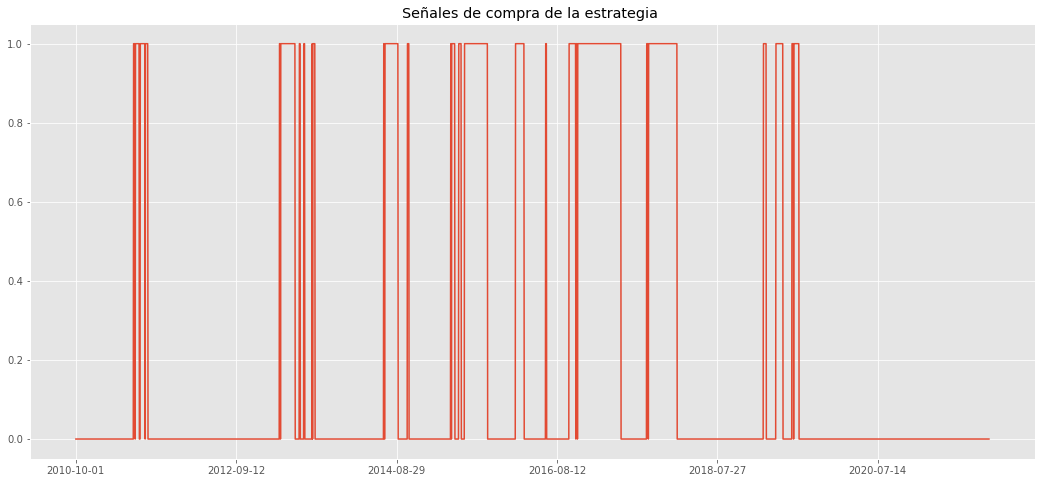

In [17]:
data['Senal'].plot(title = 'Señales de compra de la estrategia ' )
# Ploteando una parte
#data.loc['2010':'2022','Senal'].plot(title = 'Señales Regresión a la media ' +instrumento,xlim=('2010','2022'))

In [18]:
tiempo_final = time() 
 
tiempo_ejecucion = tiempo_final - tiempo_inicial
 
print ('El tiempo de ejecucion fue:',tiempo_ejecucion,"segundos") #En segundos

El tiempo de ejecucion fue: 955.8070044517517 segundos


In [19]:
data.loc['2011-01-04':'2019-11-04']

Date Senal      Price Objetivo ExitReason  Beneficio
2011-01-04  2011-01-04     0     8.6875      NaN        NaN        NaN
2011-01-05  2011-01-05     0     8.6175      NaN        NaN        NaN
2011-01-06  2011-01-06     0     8.6625      NaN        NaN        NaN
2011-01-07  2011-01-07     0    8.44625      NaN        NaN        NaN
2011-01-10  2011-01-10     0    8.35125      NaN        NaN        NaN
...                ...   ...        ...      ...        ...        ...
2019-10-29  2019-10-29     0  18.264999      NaN        NaN        NaN
2019-10-30  2019-10-30     0       18.6      NaN        NaN        NaN
2019-10-31  2019-10-31     0  18.049999      NaN        NaN        NaN
2019-11-01  2019-11-01     0  18.059999      NaN        NaN        NaN
2019-11-04  2019-11-04     0      18.01      NaN        NaN        NaN

[2260 rows x 6 columns]

In [20]:
#Guardamos el resultado del analisis en un pickle
#dff.to_pickle("./primerBack_IBE.pkl")

***3.- Ingeniería de datos para calcular la bondad de la estrategia***

In [21]:

data['Dif_Close'] = data.Price.pct_change()
data['Retornos'] = data.Dif_Close * data.Senal.shift(1)   
data['Capital'] = (data.Retornos + 1).cumprod() * 100
    
rg.StrategyClass.dfLog=data  #Ojo a esta liena, no me cuadra.

#quant_j.salvarExcel(StrategyClass.dfLog, "log"+instrumento)   
#data.to_pickle('almacen')    #df = pd.read_pickle(file_name)

>Para calcular los retornos del sistema, calculamos la diferencia relativativa entre el precio de cierre y el del día anterior. Para posteriormente multiplicarlo por la señal que del día anterior que nos indicaba la posición a tomar (si estaba comprado, sumo beneficio).

In [22]:
data.tail()

Date Senal   Price Objetivo ExitReason  Beneficio  \
2021-11-11  2021-11-11     0   17.98      NaN        NaN        NaN   
2021-11-12  2021-11-12     0   18.02      NaN        NaN        NaN   
2021-11-15  2021-11-15     0  18.055      NaN        NaN        NaN   
2021-11-16  2021-11-16     0  17.975      NaN        NaN        NaN   
2021-11-17  2021-11-17     0  18.035      NaN        NaN        NaN   

            Dif_Close Retornos     Capital  
2021-11-11  -0.003050     -0.0  157.978289  
2021-11-12   0.002225      0.0  157.978289  
2021-11-15   0.001942      0.0  157.978289  
2021-11-16  -0.004431     -0.0  157.978289  
2021-11-17   0.003338      0.0  157.978289

In [23]:
data[60:]

Date Senal    Price Objetivo ExitReason  Beneficio  \
2010-12-27  2010-12-27     0   8.8425      NaN        NaN        NaN   
2010-12-28  2010-12-28     0   8.8225      NaN        NaN        NaN   
2010-12-29  2010-12-29     0     8.85      NaN        NaN        NaN   
2010-12-30  2010-12-30     0      8.8      NaN        NaN        NaN   
2011-01-03  2011-01-03     0  8.64875      NaN        NaN        NaN   
...                ...   ...      ...      ...        ...        ...   
2021-11-11  2021-11-11     0    17.98      NaN        NaN        NaN   
2021-11-12  2021-11-12     0    18.02      NaN        NaN        NaN   
2021-11-15  2021-11-15     0   18.055      NaN        NaN        NaN   
2021-11-16  2021-11-16     0   17.975      NaN        NaN        NaN   
2021-11-17  2021-11-17     0   18.035      NaN        NaN        NaN   

            Dif_Close Retornos     Capital  
2010-12-27  -0.025620     -0.0       100.0  
2010-12-28  -0.002262     -0.0       100.0  
2010-12-29   0.003117      0.0       100.0  
2010-12-30  -0.005650     -0.0       100.0  
2011-01-03  -0.017187     -0.0       100.0  
...               ...      ...         ...  
2021-11-11  -0.003050     -0.0  157.978289  
2021-11-12   0.002225      0.0  157.978289  
2021-11-15   0.001942      0.0  157.978289  
2021-11-16  -0.004431     -0.0  157.978289  
2021-11-17   0.003338      0.0  157.978289  

[2788 rows x 9 columns]

>El capital, por comodidad, lo calcularemos en base 100, es decir como si iniciaramos la inversión con 100 unidades monetarias. Para su calculo arrastramos el producto acumulado de los retornos mas 1, multiplicados como dijimos por 100.

Pero para observar gráficamente la evolución del sistema necesitamos un gráfico con mas información. Para ello definimos una función que nos mostrará un gráfico con la evolución de nuestra estrategia, comparandola con la del activo. En un subgráfico se visualizará el drawdown del sistema, comparado de nuevo con el del activo. Y por útlimo las posiciones que toma el sistema.

In [24]:
def grafico (df):
    estudio = df.copy()
    
    DD_bh, maxDD, maxDD_ini, maxDD_fin = analisis.DrawDown(estudio.Dif_Close[60:], info = False) 
    
    DD, maxDD, maxDD_ini, maxDD_fin = analisis.DrawDown(estudio.Retornos.fillna(0), info = False) 

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(18, 12), gridspec_kw = {'height_ratios':[3, 1, 1]})
    fig.suptitle('Estrategia vs B & H', fontsize=20)

    #Primer plot analiza la evolcuion de una inversion de 100€ en buy&hold y la estrategia)
    ax1.plot(estudio.Capital)
    ax1.plot((estudio.Price) * (100/estudio.Price[1]))
    ax1.set_title('Capital')
    ax1.legend(['Estrategia','Buy & Hold'])

    ax2.plot(DD*100, c='0.5')
    ax2.plot(DD_bh*100, c='y')
    ax2.fill_between(DD.index, 0, DD*100, color='0.7')
    ax2.set_title('Drawdown')
    ax2.legend(['Estrategia','Buy & Hold'])

    ax3.plot(estudio.Senal, c='orange')
    #ax3.fill_between(estudio.index, 0, estudio.Senal*100, color='orange')
    ax3.set_title('Posición')

    plt.show()
    return

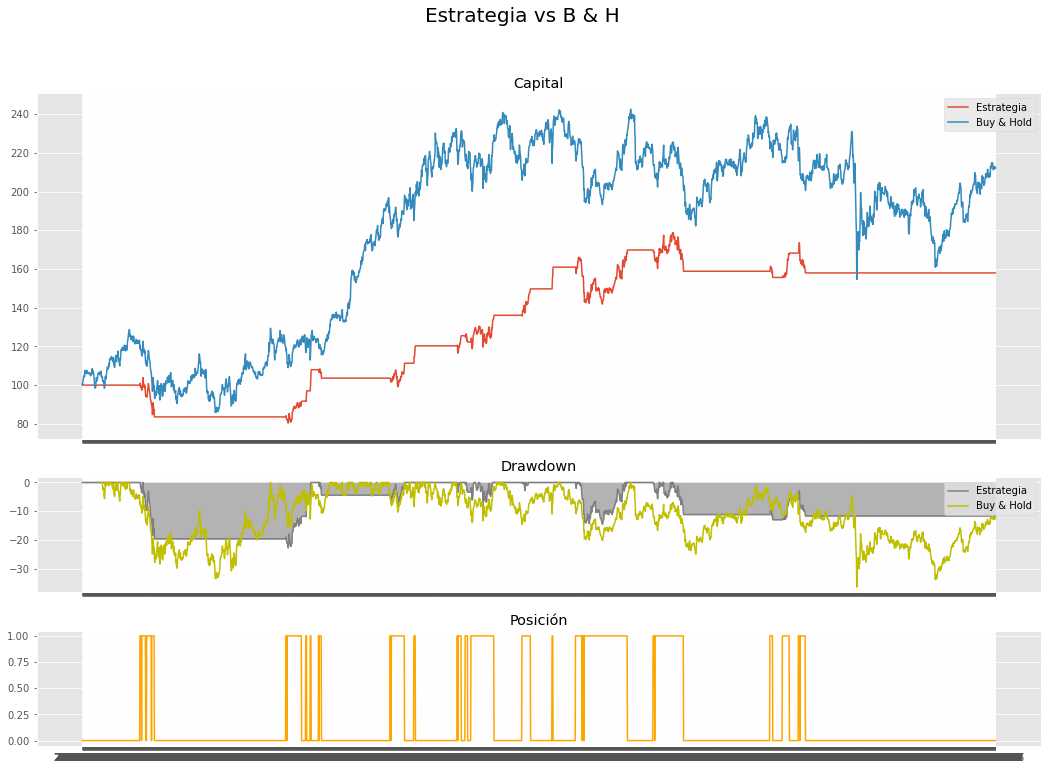

In [25]:
grafico(data)

---

In [26]:
#data[55:70]

---

# ANALISIS DEL SISTEMA

In [27]:
Beneficio_Bruto = data.Capital[-1] - data.Capital[1]
print ('Beneficio Bruto : {:.2f} €  con una inverison de 100€'.format(Beneficio_Bruto))

Beneficio Bruto : 57.98 €  con una inverison de 100€


In [28]:
#Rentabilidad anual compuesta. Calculamos lo que la inversion se ha incrementado cada año con el interes compuesto
CAGR = analisis.CAGR(data.Retornos)
print ('CAGR : {:.2f}%'.format(CAGR * 100))

CAGR : 4.19%


In [29]:
#Ratio calculado restando una rentabilidad segura a nuestra rentabilidad de estrategia y dividido por el riego (=volatilidad)
data.Retornos=data.Retornos.replace(0,np.e)  #Quito los cero (no sepuede hacer logariotmo de cero), pero no se que poner
Sharpe = CAGR / (np.log(data.Retornos + 1).std(skipna=True) * 252 ** 0.5)
print ('Sharpe : {:.3f}'.format(CAGR ))

Sharpe : 0.042


---


# PRUEBA FUERA DE LA MUESTRA

periodo_rapido = 5

periodo_lento = 140

out_sample= qd_data[data.shape[0]:].copy()

out_sample['Dif_Close'] = out_sample.Close.pct_change()
out_sample['Dif_Open'] = out_sample.Close.pct_change()  #era Cloe


out_estr, out_resultado = estrategia_medias (out_sample, periodo_rapido, periodo_lento)


grafico(out_estr)

---